In [1]:
import pandas as pd
file_path = '../MONDO_0004975_associations_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Step 2: Check column names to confirm correct p-value column
print(df.columns)

# Step 3: Filter SNPs with p-value < 1e-8
filtered_df = df[df['pValue'] < 1e-4]

# Step 4: Keep only variantId ending with -A, -T, -C, or -G (exclude -?)
filtered_df = filtered_df[filtered_df['riskAllele'].str.match(r'^rs\d+-[ATCG]$', na=False)]
#convert - to _
filtered_df['riskAllele'] = filtered_df['riskAllele'].str.replace('-', '_')
print(filtered_df['riskAllele'].head())
p_value5_id = filtered_df['riskAllele'].tolist()
# Step 5: Print the first 5 SNPs with p-value < 1e-8
print("SNPs with p-value < 1e-8:")
for snp in p_value5_id:
    print(snp)

Index(['riskAllele', 'pValue', 'pValueAnnotation', 'riskFrequency', 'orValue',
       'beta', 'ci', 'mappedGenes', 'traitName', 'efoTraits', 'bgTraits',
       'accessionId', 'locations', 'pubmedId', 'author'],
      dtype='object')
1     rs8077028_T
2     rs2244526_T
3    rs17022021_T
4     rs1034435_A
5     rs4760243_A
Name: riskAllele, dtype: object
SNPs with p-value < 1e-8:
rs8077028_T
rs2244526_T
rs17022021_T
rs1034435_A
rs4760243_A
rs7260181_T
rs12716755_A
rs3820443_T
rs846858_A
rs5771225_T
rs7313581_T
rs2699450_A
rs6945197_T
rs184992198_T
rs115972394_A
rs73215707_T
rs79926713_T
rs73732514_A
rs62177277_T
rs73681522_A
rs2234017_C
rs147597631_T
rs145848414_A
rs147985478_A
rs116050881_T
rs186542490_A
rs186076999_T
rs141521929_T
rs73865608_A
rs184614511_T
rs193129245_A
rs150061627_T
rs190457471_A
rs141387448_T
rs117760708_T
rs187423924_A
rs181634374_T
rs145228677_C
rs188699384_A
rs148003968_A
rs185867524_A
rs117756856_A
rs184457411_A
rs180751169_T
rs188392327_A
rs192232892_T
rs149839

In [2]:
import pandas as pd


In [3]:
data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\738370358.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_no_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols= lambda x: not x.endswith('.'), nrows=5)


In [4]:
len(data_with_no_filtering.columns)

592538

In [5]:
id_of_pvalue5 = []
for col in data_with_no_filtering.columns:
    if col in p_value5_id:
        print(col, "is in the list")
        id_of_pvalue5.append(col)
print(id_of_pvalue5)


rs4255357_G is in the list
rs2970989_T is in the list
rs1552244_A is in the list
rs17022021_T is in the list
rs9832461_A is in the list
rs17785248_A is in the list
rs4974424_A is in the list
rs1923775_T is in the list
rs1448284_T is in the list
rs10012882_T is in the list
rs13178362_T is in the list
rs29745_A is in the list
rs6882046_A is in the list
rs543844_A is in the list
rs9381563_T is in the list
rs2718058_A is in the list
rs11771145_G is in the list
rs7016182_C is in the list
rs956225_A is in the list
rs474951_T is in the list
rs7155434_A is in the list
rs10498633_G is in the list
rs2456930_G is in the list
rs8049439_T is in the list
rs450674_T is in the list
rs16973424_A is in the list
rs440277_G is in the list
rs8106922_A is in the list
rs5167_T is in the list
['rs4255357_G', 'rs2970989_T', 'rs1552244_A', 'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A', 'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T', 'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs93815

In [6]:
# read the data again with the selected columns and first 6 columns of data and first 5 rows
metadata_cols = ['IID', 'SEX', 'PHENOTYPE',]

# Combine metadata columns with your filtered SNP rsIDs
columns_to_use = metadata_cols + id_of_pvalue5

# Read only those columns (first 5 + selected SNPs) and first 5 rows
data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\990478919.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_with_filtering = pd.read_csv('../adni_full.raw', delim_whitespace=True, usecols=columns_to_use)


In [7]:
#caclulate missing values of every column
missing_values = data_with_filtering.isnull().sum()
# Print the missing values
print("Missing values in each column:")
print(missing_values)
#see the minimum and median and maximum of the data


Missing values in each column:
IID             0
SEX             0
PHENOTYPE       0
rs4255357_G     7
rs2970989_T     0
rs1552244_A     0
rs17022021_T    0
rs9832461_A     0
rs17785248_A    4
rs4974424_A     2
rs1923775_T     0
rs1448284_T     0
rs10012882_T    2
rs13178362_T    1
rs29745_A       1
rs6882046_A     2
rs543844_A      0
rs9381563_T     9
rs2718058_A     1
rs11771145_G    0
rs7016182_C     0
rs956225_A      0
rs474951_T      1
rs7155434_A     2
rs10498633_G    0
rs2456930_G     1
rs8049439_T     0
rs450674_T      0
rs16973424_A    1
rs440277_G      0
rs8106922_A     0
rs5167_T        0
dtype: int64


In [8]:
# Load ADNIMERGE
adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')

# Filter to baseline diagnoses
adni_dx = adni_merge[adni_merge['VISCODE'] == 'bl'][['RID', 'DX']]

# Extract RID from IID if needed (only if IID is like '014_S_0520')
data_with_filtering['RID'] = data_with_filtering['IID'].str.extract(r'_(\d+)$')[0].astype(int)

# Merge DX into your dataset
data_with_filtering = data_with_filtering.merge(adni_dx, on='RID', how='left')

# Drop RID if no longer needed
data_with_filtering.drop(columns=['RID'], inplace=True)

# Check merge result
print("Missing DX labels:", data_with_filtering['DX'].isna().sum())

Missing DX labels: 0


C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\4016535944.py:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_merge = pd.read_csv('../ADNIMERGE_11May2025.csv')


In [9]:
print(data_with_filtering.columns)


Index(['IID', 'SEX', 'PHENOTYPE', 'rs4255357_G', 'rs2970989_T', 'rs1552244_A',
       'rs17022021_T', 'rs9832461_A', 'rs17785248_A', 'rs4974424_A',
       'rs1923775_T', 'rs1448284_T', 'rs10012882_T', 'rs13178362_T',
       'rs29745_A', 'rs6882046_A', 'rs543844_A', 'rs9381563_T', 'rs2718058_A',
       'rs11771145_G', 'rs7016182_C', 'rs956225_A', 'rs474951_T',
       'rs7155434_A', 'rs10498633_G', 'rs2456930_G', 'rs8049439_T',
       'rs450674_T', 'rs16973424_A', 'rs440277_G', 'rs8106922_A', 'rs5167_T',
       'DX'],
      dtype='object')


In [10]:
columns_to_remove = [ 'IID','SEX','PHENOTYPE']  # Adjust the list based on your data

# Drop the specified columns
data_cleaned_with_just_dx_and_snp = data_with_filtering.drop(columns=columns_to_remove)
#convert data_cleaned_with_just_dx_and_snp to file

In [11]:
# Fill missing values with mode for all columns except 'DX'
for column in data_cleaned_with_just_dx_and_snp.columns:
    if column != 'DX':
        mode_value = data_cleaned_with_just_dx_and_snp[column].mode()[0]
        data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned_with_just_dx_and_snp[column].fillna(mode_value, inplace=True)
C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\1545016660.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [12]:
# Map DX values to numerical values
dx_mapping = {'CN': 0, 'MCI': 1, 'Dementia': 2}
data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)

C:\Users\Ayoub-Megdoud\AppData\Local\Temp\ipykernel_14892\3523527163.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_with_just_dx_and_snp['DX'] = data_cleaned_with_just_dx_and_snp['DX'].replace(dx_mapping)


In [13]:
print(data_cleaned_with_just_dx_and_snp['DX'].value_counts())

DX
1    363
0    214
2    180
Name: count, dtype: int64


In [78]:
# data_cleaned_with_just_dx_and_snp.dtypes

In [14]:
#change all float64 columns to int64
for column in data_cleaned_with_just_dx_and_snp.columns:
    if data_cleaned_with_just_dx_and_snp[column].dtype == 'float64':
        data_cleaned_with_just_dx_and_snp[column] = data_cleaned_with_just_dx_and_snp[column].astype('int64')
#save the data_cleaned_with_just_dx_and_snp to a file

In [80]:
# data_cleaned_with_just_dx_and_snp.dtypes 

In [81]:
# Get statistics of the data
# data_cleaned_with_just_dx_and_snp.describe()


In [15]:
# train and test split
from sklearn.model_selection import train_test_split
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

In [19]:
# convert the final data to a csv file
data_cleaned_with_just_dx_and_snp.to_csv('adni_data_cleaned_with_dx_and_snp.csv', index=False)

In [43]:
!pip install ctgan

   ---------------------------------------- 0.0/73.8 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/73.8 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 73.8/73.8 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB 991.0 kB/s eta 0:03:35
   ---------------------------------------- 0.1/212.5 MB 1.1 MB/s eta 0:03:23
   ---------------------------------------- 0.1/212.5 MB 1.1 MB/s eta 0:03:20
   ---------------------------------------- 0.2/212.5 MB 1.1 MB/s eta 0:03:19
   ---------------------------------------- 0.2/212.5 MB 1.1 MB/s eta 0:03:21
   ---------------------------------------- 0.3/212.5 MB 1.0 MB/s eta 0:03:24
   ---------------------------------------- 0.3/212.5 MB 1.0 MB/s eta 0:03:29
   ---------------------------------------- 0.4/212.5 MB 1.0 MB/s eta 0:03:27
   ---------------------------------------- 0.4/212.5 MB 1.0 MB/s eta 0:03:28

In [16]:
pip install xgboost



  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 326.8 kB/s eta 0:07:39
   ---------------------------------------- 0.1/150.0 MB 655.4 kB/s eta 0:03:49
   ---------------------------------------- 0.2/150.0 MB 952.6 kB/s eta 0:02:38
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:17
   ---------------------------------------- 0.3/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.5/150.0 MB 1.3 MB/s eta 0:01:52
   ---------------------------------------- 0.5/150.0 MB 1.4 MB/s eta 0:01:47
   ---------------------------------------- 0.6/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.7/150.0 MB 1.5 MB/s eta 0:01:43
   ---------------------------------------- 0.8/150.0 MB 1.5 MB/s eta 0:01:41
 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    matthews_corrcoef, confusion_matrix, roc_auc_score, recall_score
)

# Define target classes and binarize for multiclass AUC
classes = np.unique(y)
results = []

# Model dictionary with grid parameters
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'),
        'params': {'C': [0.01, 0.1], 'class_weight': [None, 'balanced']}
    },
    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1], 'class_weight': ['balanced']}
    },
    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1], 'gamma': ['scale'], 'class_weight': ['balanced']}
    },
    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {'hidden_layer_sizes': [(64,), (128,)], 'alpha': [0.001]}
    },
    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {'hidden_layer_sizes': [(128, 64)], 'alpha': [0.001], 'learning_rate_init': [0.001]}
    },
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [3], 'scale_pos_weight': [1]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100], 'max_depth': [None], 'class_weight': ['balanced']}
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100], 'learning_rate': [0.1]}
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50], 'learning_rate': [1.0]}
    },
    "HistGradientBoosting": {
        'model': HistGradientBoostingClassifier(),
        'params': {'max_iter': [100], 'learning_rate': [0.1]}
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [5]}
    }
}

# Run loop over random seeds
for seed in range(1, 151):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, config in models.items():
        model = config['model']
        params = config['params']

        grid = GridSearchCV(model, params, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_scaled)

        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test_scaled)
            y_test_bin = label_binarize(y_test, classes=classes)
            try:
                auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
            except:
                auc = None
        else:
            auc = None

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            'Model': name,
            'Seed': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': grid.best_params_
        })

# Final result
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.sort_values(by='MCC', ascending=False, inplace=True)
results_df.sort_values(by='Sensitivity', ascending=False, inplace=True)
results_df.sort_values(by='ROC_AUC', ascending=False, inplace=True)
print(results_df.head(10))


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

                    Model  Seed  Accuracy  BalancedAccuracy        F1  \
1292              XGBoost   118  0.532895          0.429879  0.414290   
1261    Gradient Boosting   115  0.506579          0.425693  0.419432   
1470    Gradient Boosting   134  0.506579          0.419493  0.409946   
303         Random Forest    28  0.506579          0.383284  0.332729   
568     Gradient Boosting    52  0.506579          0.422678  0.415290   
1293        Random Forest   118  0.500000          0.374025  0.316914   
765         Random Forest    70  0.500000          0.384919  0.347166   
171         Random Forest    16  0.500000          0.369161  0.304946   
733     Gradient Boosting    67  0.500000          0.411741  0.399719   
33    Logistic Regression     4  0.500000          0.395983  0.372708   

           MCC  Sensitivity   ROC_AUC  \
1292  0.207164     0.429879  0.604396   
1261  0.172857     0.425693  0.603311   
1470  0.170884     0.419493  0.600957   
303   0.138099     0.383284  0.5

In [17]:
import pandas as pd
import numpy as np
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    matthews_corrcoef, confusion_matrix, roc_auc_score, 
    recall_score, classification_report
)

# Load your data
# Example:
# data_cleaned_with_just_dx_and_snp = pd.read_csv("your_data.csv")
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Define target classes and binarize for multiclass AUC
classes = np.unique(y)
results = []

# Model dictionary with grid parameters
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000, multi_class='ovr'),
        'params': {'C': [0.01, 0.1, 1], 'class_weight': [None, 'balanced']}
    },
    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1], 'class_weight': ['balanced']}
    },
    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}
    },
    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {'hidden_layer_sizes': [(64,), (128,)], 'alpha': [0.0001, 0.001]}
    },
    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {'hidden_layer_sizes': [(128, 64), (128, 64, 32)], 'alpha': [0.0001, 0.001], 'learning_rate_init': [0.001]}
    },
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10], 'class_weight': ['balanced']}
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]}
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [1.0, 0.5]}
    },
    "HistGradientBoosting": {
        'model': HistGradientBoostingClassifier(),
        'params': {'max_iter': [100, 200], 'learning_rate': [0.1, 0.05]}
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
}

# Run loop over random seeds
for seed in range(1, 151):
    print(f"\n==================== Random State = {seed} ====================\n")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    
    print("Original train distribution:", Counter(y_train))
    
    # Apply CTGAN for minority class augmentation
    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    
    # Identify minority class(es)
    class_counts = Counter(y_train)
    min_count = min(class_counts.values())
    
    for class_label, count in class_counts.items():
        if count > min_count:
            # Create synthetic samples for this class to balance it
            minority_df = df_train[df_train['DX'] == class_label].reset_index(drop=True)
            
            ctgan = CTGAN(epochs=300)
            ctgan.fit(minority_df, discrete_columns=[])
            
            # Generate enough samples to balance the class
            synthetic = ctgan.sample(count - min_count)
            if 'DX' not in synthetic.columns:
                raise ValueError("Synthetic data missing 'DX' column!")
            
            X_synth = synthetic.drop(columns='DX')
            y_synth = synthetic['DX']
            
            # Add synthetic samples to training data
            X_train = pd.concat([X_train, X_synth], ignore_index=True)
            y_train = pd.concat([y_train, y_synth], ignore_index=True)
    
    print("Augmented train distribution:", Counter(y_train))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, config in models.items():
        print(f"\n--- {name} ---")
        model = config['model']
        params = config['params']

        grid = GridSearchCV(model, params, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
        grid.fit(X_train_scaled, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_scaled)

        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test_scaled)
            y_test_bin = label_binarize(y_test, classes=classes)
            try:
                auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
            except:
                auc = None
        else:
            auc = None

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            'Model': name,
            'Seed': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': grid.best_params_,
            'ConfusionMatrix': cm
        })
        
        # Print classification report for each model
        print(classification_report(y_test, y_pred, zero_division=0))

# Final result
results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.sort_values(by='MCC', ascending=False, inplace=True)
results_df.sort_values(by='Sensitivity', ascending=False, inplace=True)
results_df.sort_values(by='ROC_AUC', ascending=False, inplace=True)

# Save results to CSV
results_df.to_csv('model_comparison_with_gan_results.csv', index=False)

print("\nTop 10 Models by ROC AUC:")
print(results_df.head(10))


==================== Random State = 1 ====================

Original train distribution: Counter({1: 290, 0: 171, 2: 144})
Augmented train distribution: Counter({1: 436, 0: 198, 2: 144})

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.56      0.12      0.19        43
           1       0.49      0.92      0.64        73
           2       0.20      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.41      0.35      0.29       152
weighted avg       0.44      0.48      0.37       152


--- SVM (Linear) ---
              precision    recall  f1-score   support

           0       0.26      0.28      0.27        43
           1       0.44      0.34      0.38        73
           2       0.20      0.28      0.24        36

    accuracy                           0.31       152
   macro avg       0.30      0.30      0.30       152
weighted avg       0.33      0.31      0.32       152


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:42:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.48      0.68      0.56        73
           2       0.22      0.11      0.15        36

    accuracy                           0.41       152
   macro avg       0.32      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.05      0.08        43
           1       0.49      0.96      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.25      0.34      0.24       152
weighted avg       0.31      0.47      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.16      0.21        43
           1       0.44      0.67      0.53        73
           2       0.12  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.09      0.13        43
           1       0.45      0.73      0.56        73
           2       0.18      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.28      0.30      0.27       152
weighted avg       0.32      0.39      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.45      0.66      0.54        73
           2       0.25      0.17      0.20        36

    accuracy                           0.39       152
   macro avg       0.33      0.32      0.31       152
weighted avg       0.35      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.48      0.74      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:45:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.37      0.33      0.35        43
           1       0.52      0.70      0.59        73
           2       0.13      0.06      0.08        36

    accuracy                           0.44       152
   macro avg       0.34      0.36      0.34       152
weighted avg       0.38      0.44      0.40       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.50      0.95      0.65        73
           2       0.67      0.06      0.10        36

    accuracy                           0.49       152
   macro avg       0.49      0.36      0.29       152
weighted avg       0.48      0.49      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.50      0.77      0.61        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.33      0.34        43
           1       0.49      0.68      0.57        73
           2       0.33      0.08      0.13        36

    accuracy                           0.44       152
   macro avg       0.39      0.36      0.35       152
weighted avg       0.41      0.44      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.49      0.70      0.58        73
           2       0.23      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        43
           1       0.46      0.63      0.53        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.14      0.07      0.09        43
           1       0.49      0.82      0.62        73
           2       0.12      0.03      0.05        36

    accuracy                           0.42       152
   macro avg       0.25      0.31      0.25       152
weighted avg       0.30      0.42      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.13      0.07      0.09        43
           1       0.47      0.77      0.59        73
           2       0.18      0.06      0.09        36

    accuracy                           0.40       152
   macro avg       0.26      0.30      0.25       152
weighted avg       0.31      0.40      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.06      0.02      0.03        43
           1       0.45      0.77      0.57        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.48      0.73      0.58        73
           2       0.22      0.06      0.09        36

    accuracy                           0.40       152
   macro avg       0.30      0.31      0.27       152
weighted avg       0.33      0.40      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.46      0.63      0.53        73
           2       0.20      0.14      0.16        36

    accuracy                           0.37       152
   macro avg       0.28      0.30      0.28       152
weighted avg       0.32      0.37      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.45      0.70      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:56:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.19      0.26        43
           1       0.50      0.79      0.61        73
           2       0.33      0.17      0.22        36

    accuracy                           0.47       152
   macro avg       0.43      0.38      0.37       152
weighted avg       0.44      0.47      0.42       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.67      0.09      0.16        43
           1       0.50      0.92      0.65        73
           2       0.50      0.17      0.25        36

    accuracy                           0.51       152
   macro avg       0.56      0.39      0.35       152
weighted avg       0.55      0.51      0.42       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.45      0.12      0.19        43
           1       0.49      0.86      0.62        73
           2       0.17  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.18      0.07      0.10        43
           1       0.50      0.78      0.61        73
           2       0.15      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.27      0.31      0.27       152
weighted avg       0.32      0.41      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.36      0.21      0.26        43
           1       0.50      0.73      0.60        73
           2       0.36      0.22      0.28        36

    accuracy                           0.46       152
   macro avg       0.41      0.39      0.38       152
weighted avg       0.43      0.46      0.43       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.49      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:00:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.49      0.90      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.31      0.33      0.26       152
weighted avg       0.35      0.46      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.48      0.92      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.25      0.33      0.25       152
weighted avg       0.31      0.46      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.50      0.90      0.64        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.47      0.71      0.57        73
           2       0.29      0.14      0.19        36

    accuracy                           0.41       152
   macro avg       0.34      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.28      0.30        43
           1       0.52      0.67      0.59        73
           2       0.29      0.17      0.21        36

    accuracy                           0.44       152
   macro avg       0.38      0.37      0.37       152
weighted avg       0.41      0.44      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.28      0.30        43
           1       0.48      0.70      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:05:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.24      0.16      0.19        43
           1       0.48      0.74      0.58        73
           2       0.30      0.08      0.13        36

    accuracy                           0.42       152
   macro avg       0.34      0.33      0.30       152
weighted avg       0.37      0.42      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        43
           1       0.48      0.71      0.57        73
           2       0.12      0.03      0.05        36

    accuracy                           0.41       152
   macro avg       0.29      0.32      0.28       152
weighted avg       0.33      0.41      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.50      0.84      0.62        73
           2       0.43  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.14      0.20        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.28      0.33      0.27       152
weighted avg       0.33      0.45      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.49      0.75      0.59        73
           2       0.10      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.26      0.31      0.27       152
weighted avg       0.32      0.41      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.22      0.19      0.20        43
           1       0.47      0.70      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:10:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.48      0.81      0.61        73
           2       0.17      0.06      0.08        36

    accuracy                           0.44       152
   macro avg       0.33      0.33      0.30       152
weighted avg       0.37      0.44      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.02      0.04        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.23      0.33      0.23       152
weighted avg       0.29      0.47      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.47      0.86      0.61        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.49      0.92      0.64        73
           2       0.50      0.08      0.14        36

    accuracy                           0.48       152
   macro avg       0.45      0.36      0.30       152
weighted avg       0.46      0.48      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.50      0.77      0.60        73
           2       0.15      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.32      0.34      0.31       152
weighted avg       0.36      0.43      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.48      0.70      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:15:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.75      0.07      0.13        43
           1       0.49      0.93      0.64        73
           2       0.25      0.06      0.09        36

    accuracy                           0.48       152
   macro avg       0.50      0.35      0.29       152
weighted avg       0.50      0.48      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.15      0.05      0.07        43
           1       0.48      0.84      0.61        73
           2       0.25      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.29      0.32      0.27       152
weighted avg       0.33      0.43      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.49      0.78      0.60        73
           2       0.24  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.05      0.08        43
           1       0.47      0.89      0.62        73
           2       0.29      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.35      0.33      0.26       152
weighted avg       0.37      0.45      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.48      0.62      0.54        73
           2       0.36      0.22      0.28        36

    accuracy                           0.42       152
   macro avg       0.38      0.36      0.36       152
weighted avg       0.40      0.42      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        43
           1       0.53      0.70      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:20:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.50      0.19      0.27        43
           1       0.50      0.92      0.65        73
           2       0.50      0.03      0.05        36

    accuracy                           0.50       152
   macro avg       0.50      0.38      0.32       152
weighted avg       0.50      0.50      0.40       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.49      0.85      0.62        73
           2       0.20      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.34      0.34      0.29       152
weighted avg       0.38      0.45      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        43
           1       0.49      0.75      0.59        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.48      0.71      0.57        73
           2       0.21      0.11      0.15        36

    accuracy                           0.42       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.42      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.34      0.23      0.28        43
           1       0.51      0.75      0.61        73
           2       0.44      0.19      0.27        36

    accuracy                           0.47       152
   macro avg       0.43      0.39      0.39       152
weighted avg       0.45      0.47      0.44       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:24:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.16      0.07      0.10        43
           1       0.46      0.75      0.57        73
           2       0.21      0.08      0.12        36

    accuracy                           0.40       152
   macro avg       0.28      0.30      0.26       152
weighted avg       0.32      0.40      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.47      0.90      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.19      0.31      0.22       152
weighted avg       0.26      0.44      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.48      0.71      0.57        73
           2       0.30  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.43      0.23      0.30        43
           1       0.49      0.74      0.59        73
           2       0.28      0.14      0.19        36

    accuracy                           0.45       152
   macro avg       0.40      0.37      0.36       152
weighted avg       0.42      0.45      0.41       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.47      0.66      0.55        73
           2       0.19      0.08      0.12        36

    accuracy                           0.38       152
   macro avg       0.29      0.30      0.28       152
weighted avg       0.33      0.38      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.50      0.73      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:28:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.48      0.85      0.61        73
           2       0.30      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.34      0.33      0.28       152
weighted avg       0.37      0.45      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.49      0.90      0.63        73
           2       0.12      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.24      0.32      0.24       152
weighted avg       0.30      0.45      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.47      0.88      0.62        73
           2       0.43  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.46      0.79      0.59        73
           2       0.33      0.11      0.17        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.29       152
weighted avg       0.36      0.43      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.48      0.78      0.60        73
           2       0.17      0.06      0.08        36

    accuracy                           0.42       152
   macro avg       0.29      0.32      0.28       152
weighted avg       0.34      0.42      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.50      0.77      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:30:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.13      0.05      0.07        43
           1       0.50      0.92      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.21      0.32      0.24       152
weighted avg       0.28      0.45      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.13      0.05      0.07        43
           1       0.50      0.86      0.63        73
           2       0.27      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.30      0.33      0.28       152
weighted avg       0.34      0.45      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.05      0.07        43
           1       0.50      0.95      0.65        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.52      0.75      0.62        73
           2       0.18      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.29      0.32      0.29       152
weighted avg       0.34      0.41      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        43
           1       0.48      0.78      0.60        73
           2       0.30      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.29       152
weighted avg       0.36      0.43      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.46      0.66      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.44      0.73      0.55        73
           2       0.08      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.26      0.29      0.25       152
weighted avg       0.30      0.39      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.45      0.74      0.56        73
           2       0.07      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.27      0.29      0.25       152
weighted avg       0.31      0.39      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.42      0.60      0.50        73
           2       0.13  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.45      0.63      0.52        73
           2       0.22      0.14      0.17        36

    accuracy                           0.38       152
   macro avg       0.30      0.30      0.29       152
weighted avg       0.33      0.38      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.19      0.21        43
           1       0.42      0.55      0.48        73
           2       0.23      0.14      0.17        36

    accuracy                           0.35       152
   macro avg       0.29      0.29      0.28       152
weighted avg       0.32      0.35      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        43
           1       0.42      0.60      0.50        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.50      0.92      0.64        73
           2       0.17      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.31      0.34      0.27       152
weighted avg       0.35      0.47      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.48      0.95      0.64        73
           2       1.00      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.62      0.35      0.27       152
weighted avg       0.57      0.48      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.50      0.82      0.62        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.21      0.27        43
           1       0.49      0.77      0.60        73
           2       0.29      0.11      0.16        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.34       152
weighted avg       0.41      0.45      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.45      0.67      0.54        73
           2       0.19      0.11      0.14        36

    accuracy                           0.38       152
   macro avg       0.28      0.29      0.27       152
weighted avg       0.31      0.38      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.16      0.20        43
           1       0.50      0.75      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.47      0.77      0.58        73
           2       0.00      0.00      0.00        36

    accuracy                           0.40       152
   macro avg       0.22      0.29      0.24       152
weighted avg       0.28      0.40      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.09      0.05      0.06        43
           1       0.47      0.75      0.58        73
           2       0.36      0.11      0.17        36

    accuracy                           0.40       152
   macro avg       0.31      0.30      0.27       152
weighted avg       0.33      0.40      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.48      0.81      0.60        73
           2       0.14  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.07      0.11        43
           1       0.47      0.88      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.23      0.32      0.24       152
weighted avg       0.29      0.44      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.30      0.29        43
           1       0.44      0.51      0.47        73
           2       0.19      0.11      0.14        36

    accuracy                           0.36       152
   macro avg       0.30      0.31      0.30       152
weighted avg       0.33      0.36      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.20      0.19      0.19        43
           1       0.49      0.68      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.70      0.16      0.26        43
           1       0.51      0.97      0.67        73
           2       0.33      0.03      0.05        36

    accuracy                           0.52       152
   macro avg       0.51      0.39      0.33       152
weighted avg       0.52      0.52      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.09      0.14        43
           1       0.50      0.93      0.65        73
           2       0.25      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.35      0.35      0.28       152
weighted avg       0.39      0.48      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.35      0.28      0.31        43
           1       0.51      0.71      0.59        73
           2       0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.44      0.16      0.24        43
           1       0.49      0.89      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.31      0.35      0.29       152
weighted avg       0.36      0.47      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        43
           1       0.52      0.74      0.61        73
           2       0.37      0.19      0.25        36

    accuracy                           0.49       152
   macro avg       0.45      0.41      0.41       152
weighted avg       0.46      0.49      0.46       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.11      0.07      0.09        43
           1       0.47      0.74      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.50      0.85      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.34      0.35      0.30       152
weighted avg       0.38      0.46      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.60      0.14      0.23        43
           1       0.51      0.97      0.67        73
           2       0.00      0.00      0.00        36

    accuracy                           0.51       152
   macro avg       0.37      0.37      0.30       152
weighted avg       0.41      0.51      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.35      0.16      0.22        43
           1       0.50      0.86      0.64        73
           2       0.29  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.42      0.35      0.38        43
           1       0.51      0.75      0.61        73
           2       0.50      0.11      0.18        36

    accuracy                           0.49       152
   macro avg       0.48      0.40      0.39       152
weighted avg       0.48      0.49      0.44       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.34      0.26      0.29        43
           1       0.51      0.75      0.61        73
           2       0.15      0.06      0.08        36

    accuracy                           0.45       152
   macro avg       0.34      0.35      0.33       152
weighted avg       0.38      0.45      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.52      0.82      0.63        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.44      0.66      0.53        73
           2       0.23      0.08      0.12        36

    accuracy                           0.38       152
   macro avg       0.29      0.29      0.27       152
weighted avg       0.32      0.38      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.12      0.07      0.09        43
           1       0.47      0.81      0.60        73
           2       0.67      0.06      0.10        36

    accuracy                           0.42       152
   macro avg       0.42      0.31      0.26       152
weighted avg       0.42      0.42      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.16      0.19        43
           1       0.48      0.70      0.57        73
           2       0.50  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.16      0.21        43
           1       0.48      0.77      0.59        73
           2       0.36      0.11      0.17        36

    accuracy                           0.44       152
   macro avg       0.38      0.35      0.32       152
weighted avg       0.40      0.44      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.17      0.16      0.17        43
           1       0.45      0.60      0.51        73
           2       0.38      0.14      0.20        36

    accuracy                           0.37       152
   macro avg       0.33      0.30      0.30       152
weighted avg       0.36      0.37      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.21      0.22        43
           1       0.50      0.64      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.47      0.77      0.58        73
           2       0.26      0.14      0.18        36

    accuracy                           0.42       152
   macro avg       0.32      0.33      0.29       152
weighted avg       0.35      0.42      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.48      0.84      0.61        73
           2       0.25      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.36      0.34      0.30       152
weighted avg       0.39      0.45      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.08      0.02      0.04        43
           1       0.48      0.81      0.60        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.49      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.16      0.32      0.21       152
weighted avg       0.23      0.45      0.31       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.48      0.64      0.55        73
           2       0.15      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.30       152
weighted avg       0.34      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.23      0.24        43
           1       0.48      0.66      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:50:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.48      0.79      0.60        73
           2       0.38      0.08      0.14        36

    accuracy                           0.45       152
   macro avg       0.40      0.35      0.33       152
weighted avg       0.42      0.45      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.17      0.05      0.07        43
           1       0.47      0.90      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.21      0.32      0.23       152
weighted avg       0.28      0.45      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.30      0.31        43
           1       0.52      0.70      0.59        73
           2       0.18  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.26      0.31        43
           1       0.50      0.77      0.61        73
           2       0.27      0.08      0.13        36

    accuracy                           0.46       152
   macro avg       0.38      0.37      0.35       152
weighted avg       0.41      0.46      0.41       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.28      0.28        43
           1       0.49      0.67      0.57        73
           2       0.09      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.29      0.33      0.30       152
weighted avg       0.34      0.41      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        43
           1       0.51      0.70      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.46      0.78      0.58        73
           2       0.00      0.00      0.00        36

    accuracy                           0.41       152
   macro avg       0.25      0.30      0.25       152
weighted avg       0.30      0.41      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.09      0.13        43
           1       0.48      0.79      0.60        73
           2       0.18      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.29      0.31      0.27       152
weighted avg       0.33      0.42      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.47      0.71      0.57        73
           2       0.13  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.05      0.07        43
           1       0.47      0.86      0.61        73
           2       0.17      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.27      0.31      0.24       152
weighted avg       0.31      0.43      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.48      0.67      0.56        73
           2       0.15      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.30       152
weighted avg       0.34      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        43
           1       0.45      0.66      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:58:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.49      0.85      0.62        73
           2       0.25      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.33      0.33      0.28       152
weighted avg       0.36      0.45      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.02      0.04        43
           1       0.48      0.97      0.64        73
           2       1.00      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.60      0.34      0.25       152
weighted avg       0.56      0.48      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.51      0.89      0.65        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.14      0.19        43
           1       0.47      0.85      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.25      0.33      0.27       152
weighted avg       0.31      0.45      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.49      0.75      0.59        73
           2       0.44      0.11      0.18        36

    accuracy                           0.44       152
   macro avg       0.40      0.35      0.33       152
weighted avg       0.41      0.44      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.33      0.29        43
           1       0.48      0.52      0.50        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.49      0.88      0.63        73
           2       0.33      0.06      0.10        36

    accuracy                           0.45       152
   macro avg       0.34      0.33      0.28       152
weighted avg       0.37      0.45      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.49      0.77      0.60        73
           2       0.15      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.32      0.34      0.31       152
weighted avg       0.36      0.43      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.48      0.88      0.62        73
           2       0.17  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.49      0.73      0.58        73
           2       0.26      0.14      0.18        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.29       152
weighted avg       0.34      0.41      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.47      0.67      0.55        73
           2       0.24      0.11      0.15        36

    accuracy                           0.40       152
   macro avg       0.32      0.32      0.31       152
weighted avg       0.36      0.40      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.51      0.81      0.63        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.47      0.74      0.57        73
           2       0.50      0.08      0.14        36

    accuracy                           0.42       152
   macro avg       0.40      0.33      0.30       152
weighted avg       0.41      0.42      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.47      0.90      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.25      0.32      0.24       152
weighted avg       0.31      0.45      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.45      0.74      0.56        73
           2       0.57  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.79      0.58        73
           2       1.00      0.06      0.11        36

    accuracy                           0.42       152
   macro avg       0.54      0.31      0.27       152
weighted avg       0.51      0.42      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.15      0.14      0.14        43
           1       0.46      0.59      0.51        73
           2       0.17      0.08      0.11        36

    accuracy                           0.34       152
   macro avg       0.26      0.27      0.26       152
weighted avg       0.30      0.34      0.31       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        43
           1       0.53      0.71      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:10:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.49      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.26      0.34      0.25       152
weighted avg       0.32      0.47      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.48      0.93      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.20      0.32      0.22       152
weighted avg       0.26      0.45      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.50      0.89      0.64        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.09      0.13        43
           1       0.48      0.85      0.61        73
           2       0.75      0.08      0.15        36

    accuracy                           0.45       152
   macro avg       0.48      0.34      0.30       152
weighted avg       0.47      0.45      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.50      0.70      0.58        73
           2       0.31      0.11      0.16        36

    accuracy                           0.43       152
   macro avg       0.37      0.36      0.34       152
weighted avg       0.40      0.43      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.48      0.77      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.17      0.07      0.10        43
           1       0.49      0.82      0.61        73
           2       0.18      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.28      0.32      0.27       152
weighted avg       0.32      0.43      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.10      0.05      0.06        43
           1       0.49      0.75      0.59        73
           2       0.22      0.11      0.15        36

    accuracy                           0.40       152
   macro avg       0.27      0.30      0.27       152
weighted avg       0.31      0.40      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.50      0.77      0.61        73
           2       0.11  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.47      0.74      0.57        73
           2       0.40      0.11      0.17        36

    accuracy                           0.42       152
   macro avg       0.36      0.33      0.31       152
weighted avg       0.38      0.42      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.50      0.67      0.57        73
           2       0.27      0.17      0.21        36

    accuracy                           0.42       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.38      0.42      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        43
           1       0.49      0.67      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:18:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.30      0.16      0.21        43
           1       0.48      0.82      0.61        73
           2       0.40      0.06      0.10        36

    accuracy                           0.45       152
   macro avg       0.40      0.35      0.31       152
weighted avg       0.41      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.05      0.08        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.24      0.33      0.24       152
weighted avg       0.30      0.47      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.47      0.77      0.59        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.34      0.23      0.28        43
           1       0.50      0.75      0.60        73
           2       0.25      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.36      0.36      0.33       152
weighted avg       0.39      0.45      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.48      0.67      0.56        73
           2       0.14      0.06      0.08        36

    accuracy                           0.39       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.46      0.74      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:21:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.17      0.16      0.17        43
           1       0.48      0.70      0.57        73
           2       0.50      0.06      0.10        36

    accuracy                           0.39       152
   macro avg       0.38      0.31      0.28       152
weighted avg       0.40      0.39      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.50      0.86      0.63        73
           2       0.25      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.36      0.35      0.30       152
weighted avg       0.39      0.47      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.49      0.79      0.61        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.48      0.78      0.60        73
           2       0.14      0.03      0.05        36

    accuracy                           0.41       152
   macro avg       0.27      0.31      0.26       152
weighted avg       0.32      0.41      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.28      0.29        43
           1       0.50      0.68      0.57        73
           2       0.40      0.11      0.17        36

    accuracy                           0.43       152
   macro avg       0.40      0.36      0.34       152
weighted avg       0.42      0.43      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.48      0.70      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:25:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.16      0.24        43
           1       0.48      0.89      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.31      0.35      0.29       152
weighted avg       0.36      0.47      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.08      0.02      0.04        43
           1       0.47      0.84      0.60        73
           2       0.22      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.26      0.30      0.24       152
weighted avg       0.30      0.42      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.39      0.21      0.27        43
           1       0.47      0.74      0.58        73
           2       0.13  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.21      0.26        43
           1       0.46      0.70      0.56        73
           2       0.06      0.03      0.04        36

    accuracy                           0.40       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.34      0.40      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.30      0.30        43
           1       0.45      0.58      0.50        73
           2       0.15      0.06      0.08        36

    accuracy                           0.38       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.33      0.38      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.49      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:29:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.49      0.93      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.25      0.33      0.25       152
weighted avg       0.31      0.47      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.49      0.93      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.25      0.33      0.25       152
weighted avg       0.30      0.47      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.09      0.14        43
           1       0.47      0.86      0.61        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.34      0.28      0.31        43
           1       0.50      0.74      0.60        73
           2       0.22      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.36      0.36      0.33       152
weighted avg       0.39      0.45      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.52      0.77      0.62        73
           2       0.38      0.14      0.20        36

    accuracy                           0.46       152
   macro avg       0.40      0.37      0.36       152
weighted avg       0.42      0.46      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.35      0.30        43
           1       0.47      0.55      0.51        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:32:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.20      0.12      0.15        43
           1       0.46      0.70      0.55        73
           2       0.25      0.11      0.15        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.12      0.05      0.07        43
           1       0.46      0.79      0.58        73
           2       0.44      0.11      0.18        36

    accuracy                           0.42       152
   macro avg       0.34      0.32      0.28       152
weighted avg       0.36      0.42      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.19      0.07      0.10        43
           1       0.46      0.82      0.59        73
           2       0.50  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.18      0.09      0.12        43
           1       0.48      0.79      0.59        73
           2       0.38      0.08      0.14        36

    accuracy                           0.43       152
   macro avg       0.34      0.32      0.28       152
weighted avg       0.37      0.43      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.48      0.68      0.56        73
           2       0.25      0.11      0.15        36

    accuracy                           0.41       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.12      0.09      0.11        43
           1       0.45      0.70      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.48      0.89      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.24      0.32      0.24       152
weighted avg       0.30      0.45      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.29      0.34      0.25       152
weighted avg       0.34      0.47      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.48      0.75      0.59        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.39      0.30      0.34        43
           1       0.49      0.68      0.57        73
           2       0.19      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.36      0.36      0.34       152
weighted avg       0.39      0.43      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        43
           1       0.48      0.60      0.54        73
           2       0.19      0.11      0.14        36

    accuracy                           0.38       152
   macro avg       0.31      0.32      0.31       152
weighted avg       0.35      0.38      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.21      0.25        43
           1       0.48      0.74      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:40:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.11      0.05      0.07        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.19      0.30      0.23       152
weighted avg       0.26      0.43      0.31       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.46      0.70      0.55        73
           2       0.27      0.08      0.13        36

    accuracy                           0.39       152
   macro avg       0.31      0.31      0.28       152
weighted avg       0.34      0.39      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.05      0.02      0.03        43
           1       0.46      0.79      0.58        73
           2       0.17  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.46      0.67      0.54        73
           2       0.19      0.08      0.12        36

    accuracy                           0.38       152
   macro avg       0.28      0.30      0.28       152
weighted avg       0.32      0.38      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.19      0.19        43
           1       0.47      0.59      0.52        73
           2       0.26      0.14      0.18        36

    accuracy                           0.37       152
   macro avg       0.31      0.30      0.30       152
weighted avg       0.34      0.37      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.28        43
           1       0.49      0.63      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:44:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.15      0.05      0.07        43
           1       0.48      0.90      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.21      0.32      0.23       152
weighted avg       0.27      0.45      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.14      0.16        43
           1       0.49      0.75      0.59        73
           2       0.22      0.06      0.09        36

    accuracy                           0.41       152
   macro avg       0.30      0.32      0.28       152
weighted avg       0.34      0.41      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.49      0.86      0.63        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.47      0.78      0.59        73
           2       0.22      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.30      0.32      0.28       152
weighted avg       0.34      0.42      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        43
           1       0.52      0.66      0.58        73
           2       0.27      0.17      0.21        36

    accuracy                           0.42       152
   macro avg       0.35      0.35      0.35       152
weighted avg       0.39      0.42      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.28        43
           1       0.56      0.74      0.64        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:49:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.37      0.16      0.23        43
           1       0.48      0.82      0.61        73
           2       0.33      0.08      0.13        36

    accuracy                           0.46       152
   macro avg       0.40      0.36      0.32       152
weighted avg       0.42      0.46      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.45      0.12      0.19        43
           1       0.48      0.82      0.60        73
           2       0.20      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.38      0.34      0.30       152
weighted avg       0.40      0.45      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.48      0.78      0.60        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.46      0.78      0.58        73
           2       0.36      0.11      0.17        36

    accuracy                           0.43       152
   macro avg       0.35      0.33      0.29       152
weighted avg       0.37      0.43      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        43
           1       0.51      0.74      0.60        73
           2       0.25      0.11      0.15        36

    accuracy                           0.46       152
   macro avg       0.39      0.38      0.36       152
weighted avg       0.42      0.46      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.16      0.21        43
           1       0.46      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:52:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.12      0.07      0.09        43
           1       0.46      0.66      0.54        73
           2       0.18      0.11      0.14        36

    accuracy                           0.36       152
   macro avg       0.25      0.28      0.26       152
weighted avg       0.30      0.36      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.47      0.79      0.59        73
           2       0.43      0.08      0.14        36

    accuracy                           0.44       152
   macro avg       0.39      0.34      0.31       152
weighted avg       0.41      0.44      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.46      0.70      0.55        73
           2       0.21  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.04      0.02      0.03        43
           1       0.46      0.73      0.56        73
           2       0.40      0.11      0.17        36

    accuracy                           0.38       152
   macro avg       0.30      0.29      0.26       152
weighted avg       0.33      0.38      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        43
           1       0.44      0.55      0.49        73
           2       0.26      0.17      0.20        36

    accuracy                           0.36       152
   macro avg       0.30      0.30      0.30       152
weighted avg       0.33      0.36      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        43
           1       0.46      0.67      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:55:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.26      0.29        43
           1       0.47      0.74      0.58        73
           2       0.20      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.34      0.34      0.31       152
weighted avg       0.37      0.43      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.43      0.68      0.53        73
           2       0.25      0.06      0.09        36

    accuracy                           0.38       152
   macro avg       0.29      0.29      0.25       152
weighted avg       0.32      0.38      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        43
           1       0.49      0.71      0.58        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.16      0.21        43
           1       0.48      0.82      0.61        73
           2       0.33      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.37      0.34      0.29       152
weighted avg       0.39      0.45      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.30      0.28        43
           1       0.45      0.52      0.48        73
           2       0.19      0.08      0.12        36

    accuracy                           0.36       152
   macro avg       0.30      0.30      0.29       152
weighted avg       0.33      0.36      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        43
           1       0.44      0.60      0.51        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:58:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.50      0.93      0.65        73
           2       0.50      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.40      0.34      0.27       152
weighted avg       0.42      0.47      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.09      0.15        43
           1       0.48      0.92      0.63        73
           2       1.00      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.61      0.35      0.28       152
weighted avg       0.56      0.47      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.50      0.89      0.64        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.16      0.20        43
           1       0.49      0.82      0.62        73
           2       0.33      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.36      0.34      0.29       152
weighted avg       0.39      0.45      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.39      0.28      0.32        43
           1       0.51      0.77      0.62        73
           2       0.33      0.11      0.17        36

    accuracy                           0.47       152
   macro avg       0.41      0.39      0.37       152
weighted avg       0.44      0.47      0.43       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.21      0.25        43
           1       0.50      0.78      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.48      0.82      0.60        73
           2       0.43      0.08      0.14        36

    accuracy                           0.45       152
   macro avg       0.41      0.35      0.31       152
weighted avg       0.42      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.49      0.84      0.62        73
           2       0.40      0.11      0.17        36

    accuracy                           0.46       152
   macro avg       0.39      0.35      0.32       152
weighted avg       0.41      0.46      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.47      0.85      0.61        73
           2       0.40  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.49      0.70      0.57        73
           2       0.41      0.19      0.26        36

    accuracy                           0.43       152
   macro avg       0.39      0.36      0.35       152
weighted avg       0.41      0.43      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.16      0.19        43
           1       0.49      0.75      0.59        73
           2       0.36      0.11      0.17        36

    accuracy                           0.43       152
   macro avg       0.37      0.34      0.32       152
weighted avg       0.39      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.51      0.74      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.50      0.81      0.61        73
           2       0.55      0.17      0.26        36

    accuracy                           0.47       152
   macro avg       0.44      0.37      0.35       152
weighted avg       0.44      0.47      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.46      0.74      0.57        73
           2       0.00      0.00      0.00        36

    accuracy                           0.39       152
   macro avg       0.23      0.29      0.25       152
weighted avg       0.29      0.39      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.33      0.21      0.26        43
           1       0.52      0.77      0.62        73
           2       0.41  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.47      0.73      0.57        73
           2       0.17      0.06      0.08        36

    accuracy                           0.40       152
   macro avg       0.29      0.31      0.27       152
weighted avg       0.33      0.40      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.49      0.71      0.58        73
           2       0.13      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.30      0.33      0.30       152
weighted avg       0.35      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:08:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.16      0.09      0.12        43
           1       0.48      0.81      0.61        73
           2       0.60      0.08      0.15        36

    accuracy                           0.43       152
   macro avg       0.41      0.33      0.29       152
weighted avg       0.42      0.43      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.51      0.84      0.63        73
           2       0.30      0.08      0.13        36

    accuracy                           0.47       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.41      0.47      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        43
           1       0.47      0.68      0.56        73
           2       0.29  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.50      0.74      0.59        73
           2       0.14      0.06      0.08        36

    accuracy                           0.42       152
   macro avg       0.30      0.33      0.30       152
weighted avg       0.35      0.42      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.47      0.70      0.56        73
           2       0.25      0.08      0.12        36

    accuracy                           0.42       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.42      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.30      0.28        43
           1       0.46      0.52      0.49        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:12:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.49      0.93      0.64        73
           2       0.33      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.35      0.34      0.26       152
weighted avg       0.38      0.47      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.50      0.93      0.65        73
           2       0.14      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.32      0.34      0.27       152
weighted avg       0.36      0.47      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.12      0.05      0.07        43
           1       0.49      0.86      0.63        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.05      0.07        43
           1       0.49      0.93      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.22      0.33      0.24       152
weighted avg       0.28      0.46      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.16      0.12      0.13        43
           1       0.49      0.67      0.57        73
           2       0.30      0.17      0.21        36

    accuracy                           0.39       152
   macro avg       0.32      0.32      0.30       152
weighted avg       0.35      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.46      0.71      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:18:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.50      0.77      0.61        73
           2       0.11      0.03      0.04        36

    accuracy                           0.44       152
   macro avg       0.31      0.34      0.31       152
weighted avg       0.36      0.44      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.51      0.85      0.64        73
           2       0.40      0.11      0.17        36

    accuracy                           0.47       152
   macro avg       0.39      0.36      0.32       152
weighted avg       0.41      0.47      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.52      0.75      0.62        73
           2       0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.33      0.34        43
           1       0.50      0.68      0.58        73
           2       0.17      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.34      0.36      0.33       152
weighted avg       0.38      0.43      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        43
           1       0.49      0.63      0.55        73
           2       0.20      0.14      0.16        36

    accuracy                           0.40       152
   macro avg       0.33      0.33      0.33       152
weighted avg       0.37      0.40      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        43
           1       0.50      0.82      0.62        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:21:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.24      0.32      0.25       152
weighted avg       0.30      0.44      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.48      0.90      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.25      0.32      0.25       152
weighted avg       0.31      0.45      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.48      0.77      0.59        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.07      0.02      0.03        43
           1       0.44      0.81      0.57        73
           2       0.33      0.03      0.05        36

    accuracy                           0.40       152
   macro avg       0.28      0.29      0.22       152
weighted avg       0.31      0.40      0.30       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.49      0.66      0.56        73
           2       0.16      0.08      0.11        36

    accuracy                           0.40       152
   macro avg       0.31      0.32      0.31       152
weighted avg       0.35      0.40      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        43
           1       0.49      0.64      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.48      0.82      0.61        73
           2       0.29      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.32      0.32      0.28       152
weighted avg       0.35      0.43      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.19      0.07      0.10        43
           1       0.47      0.84      0.60        73
           2       0.17      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.27      0.31      0.25       152
weighted avg       0.32      0.43      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.48      0.73      0.58        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.45      0.67      0.54        73
           2       0.25      0.08      0.12        36

    accuracy                           0.39       152
   macro avg       0.31      0.31      0.28       152
weighted avg       0.34      0.39      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        43
           1       0.47      0.64      0.54        73
           2       0.29      0.17      0.21        36

    accuracy                           0.41       152
   macro avg       0.36      0.35      0.34       152
weighted avg       0.39      0.41      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.45      0.68      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:28:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.18      0.09      0.12        43
           1       0.48      0.79      0.59        73
           2       0.38      0.08      0.14        36

    accuracy                           0.43       152
   macro avg       0.34      0.32      0.28       152
weighted avg       0.37      0.43      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.48      0.95      0.64        73
           2       1.00      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.54      0.33      0.24       152
weighted avg       0.50      0.47      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.48      0.75      0.59        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.16      0.17        43
           1       0.47      0.63      0.54        73
           2       0.33      0.17      0.22        36

    accuracy                           0.39       152
   macro avg       0.33      0.32      0.31       152
weighted avg       0.36      0.39      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        43
           1       0.53      0.68      0.60        73
           2       0.44      0.19      0.27        36

    accuracy                           0.47       152
   macro avg       0.43      0.40      0.40       152
weighted avg       0.45      0.47      0.44       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.44      0.67      0.53        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:30:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.08      0.02      0.04        43
           1       0.45      0.82      0.58        73
           2       0.20      0.03      0.05        36

    accuracy                           0.41       152
   macro avg       0.24      0.29      0.22       152
weighted avg       0.28      0.41      0.30       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.19      0.07      0.10        43
           1       0.46      0.81      0.59        73
           2       0.22      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.29      0.31      0.26       152
weighted avg       0.33      0.42      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.07      0.10        43
           1       0.48      0.85      0.62        73
           2       0.50  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.54      0.79      0.64        73
           2       0.35      0.17      0.23        36

    accuracy                           0.47       152
   macro avg       0.40      0.38      0.37       152
weighted avg       0.43      0.47      0.43       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.10      0.07      0.08        43
           1       0.46      0.67      0.54        73
           2       0.33      0.14      0.20        36

    accuracy                           0.38       152
   macro avg       0.30      0.29      0.27       152
weighted avg       0.33      0.38      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.40      0.36        43
           1       0.45      0.48      0.47        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.50      0.81      0.62        73
           2       0.38      0.14      0.20        36

    accuracy                           0.45       152
   macro avg       0.36      0.35      0.32       152
weighted avg       0.39      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.51      0.88      0.65        73
           2       0.60      0.08      0.15        36

    accuracy                           0.47       152
   macro avg       0.45      0.36      0.32       152
weighted avg       0.45      0.47      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.05      0.07        43
           1       0.50      0.89      0.64        73
           2       0.42  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.70      0.16      0.26        43
           1       0.51      0.97      0.67        73
           2       0.33      0.03      0.05        36

    accuracy                           0.52       152
   macro avg       0.51      0.39      0.33       152
weighted avg       0.52      0.52      0.41       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.51      0.70      0.59        73
           2       0.29      0.14      0.19        36

    accuracy                           0.43       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.39      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.49      0.73      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.15      0.05      0.07        43
           1       0.48      0.88      0.62        73
           2       0.29      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.31      0.33      0.26       152
weighted avg       0.34      0.45      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.24      0.33      0.23       152
weighted avg       0.30      0.47      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.21      0.25        43
           1       0.53      0.75      0.62        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.50      0.86      0.64        73
           2       0.12      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.30      0.34      0.28       152
weighted avg       0.35      0.45      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        43
           1       0.53      0.73      0.61        73
           2       0.30      0.17      0.21        36

    accuracy                           0.44       152
   macro avg       0.36      0.36      0.35       152
weighted avg       0.40      0.44      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        43
           1       0.51      0.77      0.62        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.36      0.19      0.25        43
           1       0.49      0.84      0.62        73
           2       0.17      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.34      0.35      0.30       152
weighted avg       0.38      0.46      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.35      0.14      0.20        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.28      0.33      0.27       152
weighted avg       0.33      0.45      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.24      0.16      0.19        43
           1       0.49      0.77      0.60        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.21      0.24        43
           1       0.50      0.77      0.61        73
           2       0.25      0.06      0.09        36

    accuracy                           0.44       152
   macro avg       0.34      0.34      0.31       152
weighted avg       0.38      0.44      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.11      0.09      0.10        43
           1       0.47      0.67      0.55        73
           2       0.00      0.00      0.00        36

    accuracy                           0.35       152
   macro avg       0.19      0.25      0.22       152
weighted avg       0.26      0.35      0.29       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        43
           1       0.52      0.73      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.19      0.24        43
           1       0.49      0.81      0.61        73
           2       0.33      0.06      0.10        36

    accuracy                           0.45       152
   macro avg       0.38      0.35      0.31       152
weighted avg       0.40      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.09      0.14        43
           1       0.47      0.90      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.26      0.33      0.26       152
weighted avg       0.32      0.46      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.47      0.77      0.59        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.48      0.86      0.62        73
           2       0.33      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.36      0.34      0.28       152
weighted avg       0.39      0.45      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.50      0.67      0.57        73
           2       0.20      0.11      0.14        36

    accuracy                           0.41       152
   macro avg       0.33      0.34      0.33       152
weighted avg       0.37      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.21      0.24        43
           1       0.48      0.67      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:49:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.37      0.16      0.23        43
           1       0.49      0.84      0.62        73
           2       0.38      0.08      0.14        36

    accuracy                           0.47       152
   macro avg       0.41      0.36      0.33       152
weighted avg       0.43      0.47      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.48      0.93      0.63        73
           2       1.00      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.53      0.33      0.24       152
weighted avg       0.50      0.46      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.42      0.40      0.41        43
           1       0.53      0.67      0.59        73
           2       0.32  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.12      0.19        43
           1       0.48      0.89      0.62        73
           2       0.17      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.37      0.34      0.29       152
weighted avg       0.40      0.47      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        43
           1       0.50      0.73      0.60        73
           2       0.19      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.34      0.35      0.33       152
weighted avg       0.38      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        43
           1       0.49      0.71      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.48      0.88      0.62        73
           2       0.20      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.29      0.32      0.26       152
weighted avg       0.34      0.45      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.05      0.08        43
           1       0.46      0.90      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.24      0.32      0.23       152
weighted avg       0.29      0.45      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.08      0.02      0.04        43
           1       0.49      0.86      0.62        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.47      0.81      0.60        73
           2       0.10      0.03      0.04        36

    accuracy                           0.42       152
   macro avg       0.27      0.31      0.26       152
weighted avg       0.32      0.42      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.51      0.73      0.60        73
           2       0.25      0.17      0.20        36

    accuracy                           0.43       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.39      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.40      0.34        43
           1       0.46      0.53      0.50        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.48      0.70      0.57        73
           2       0.26      0.14      0.18        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.26      0.14      0.18        43
           1       0.47      0.77      0.59        73
           2       0.09      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.28      0.31      0.27       152
weighted avg       0.32      0.41      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.52      0.75      0.62        73
           2       0.28  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.48      0.85      0.62        73
           2       0.14      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.31      0.33      0.28       152
weighted avg       0.35      0.45      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.51      0.71      0.60        73
           2       0.25      0.17      0.20        36

    accuracy                           0.41       152
   macro avg       0.30      0.32      0.30       152
weighted avg       0.35      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        43
           1       0.47      0.66      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.29      0.19      0.23        43
           1       0.49      0.73      0.58        73
           2       0.13      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.30      0.32      0.30       152
weighted avg       0.35      0.41      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.02      0.04        43
           1       0.47      0.95      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.22      0.32      0.22       152
weighted avg       0.28      0.46      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.09      0.12        43
           1       0.45      0.74      0.56        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.46      0.77      0.58        73
           2       0.33      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.36      0.33      0.30       152
weighted avg       0.38      0.43      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.16      0.12      0.14        43
           1       0.44      0.64      0.53        73
           2       0.13      0.06      0.08        36

    accuracy                           0.36       152
   macro avg       0.25      0.27      0.25       152
weighted avg       0.29      0.36      0.31       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.18      0.16      0.17        43
           1       0.45      0.67      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.48      0.79      0.60        73
           2       0.45      0.14      0.21        36

    accuracy                           0.44       152
   macro avg       0.38      0.34      0.31       152
weighted avg       0.39      0.44      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.19      0.07      0.10        43
           1       0.45      0.82      0.59        73
           2       0.25      0.03      0.05        36

    accuracy                           0.42       152
   macro avg       0.30      0.31      0.25       152
weighted avg       0.33      0.42      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.48      0.77      0.59        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.48      0.78      0.59        73
           2       0.29      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.29       152
weighted avg       0.36      0.43      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.50      0.74      0.60        73
           2       0.27      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.35      0.34      0.32       152
weighted avg       0.38      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        43
           1       0.50      0.78      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:07:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.53      0.19      0.28        43
           1       0.50      0.90      0.64        73
           2       0.60      0.08      0.15        36

    accuracy                           0.51       152
   macro avg       0.54      0.39      0.36       152
weighted avg       0.53      0.51      0.42       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.49      0.79      0.60        73
           2       0.27      0.08      0.13        36

    accuracy                           0.46       152
   macro avg       0.39      0.36      0.34       152
weighted avg       0.41      0.46      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.50      0.86      0.64        73
           2       0.50  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.51      0.90      0.65        73
           2       0.67      0.06      0.10        36

    accuracy                           0.49       152
   macro avg       0.50      0.37      0.32       152
weighted avg       0.49      0.49      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        43
           1       0.51      0.67      0.58        73
           2       0.43      0.17      0.24        36

    accuracy                           0.45       152
   macro avg       0.42      0.38      0.38       152
weighted avg       0.43      0.45      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.23      0.24        43
           1       0.48      0.64      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:11:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.10      0.05      0.06        43
           1       0.45      0.78      0.57        73
           2       0.20      0.03      0.05        36

    accuracy                           0.39       152
   macro avg       0.25      0.29      0.23       152
weighted avg       0.29      0.39      0.30       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.14      0.07      0.09        43
           1       0.42      0.73      0.54        73
           2       0.17      0.03      0.05        36

    accuracy                           0.38       152
   macro avg       0.24      0.27      0.23       152
weighted avg       0.28      0.38      0.29       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.45      0.68      0.54        73
           2       0.40  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.75      0.57        73
           2       0.25      0.06      0.09        36

    accuracy                           0.40       152
   macro avg       0.29      0.30      0.26       152
weighted avg       0.33      0.40      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.45      0.67      0.54        73
           2       0.25      0.11      0.15        36

    accuracy                           0.39       152
   macro avg       0.31      0.31      0.29       152
weighted avg       0.34      0.39      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.12      0.09      0.11        43
           1       0.43      0.67      0.52        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.46      0.74      0.57        73
           2       0.00      0.00      0.00        36

    accuracy                           0.39       152
   macro avg       0.23      0.29      0.25       152
weighted avg       0.28      0.39      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.48      0.75      0.59        73
           2       0.20      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.31      0.32      0.29       152
weighted avg       0.35      0.42      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.13      0.09      0.11        43
           1       0.43      0.66      0.52        73
           2       0.18  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.47      0.60      0.53        73
           2       0.28      0.19      0.23        36

    accuracy                           0.39       152
   macro avg       0.33      0.33      0.32       152
weighted avg       0.36      0.39      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        43
           1       0.42      0.59      0.49        73
           2       0.54      0.19      0.29        36

    accuracy                           0.36       152
   macro avg       0.36      0.30      0.30       152
weighted avg       0.37      0.36      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.49      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:18:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.50      0.88      0.64        73
           2       0.17      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.36      0.36      0.32       152
weighted avg       0.40      0.48      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        43
           1       0.51      0.96      0.67        73
           2       1.00      0.06      0.11        36

    accuracy                           0.51       152
   macro avg       0.63      0.38      0.32       152
weighted avg       0.59      0.51      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.50      0.82      0.62        73
           2       0.17  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.48      0.86      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.25      0.33      0.26       152
weighted avg       0.31      0.45      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.55      0.74      0.63        73
           2       0.41      0.19      0.26        36

    accuracy                           0.47       152
   macro avg       0.42      0.40      0.39       152
weighted avg       0.45      0.47      0.44       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.28        43
           1       0.48      0.64      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:21:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.50      0.73      0.59        73
           2       0.30      0.08      0.13        36

    accuracy                           0.44       152
   macro avg       0.37      0.36      0.33       152
weighted avg       0.40      0.44      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.50      0.09      0.16        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.48       152
   macro avg       0.33      0.35      0.27       152
weighted avg       0.37      0.48      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        43
           1       0.50      0.77      0.60        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.09      0.13        43
           1       0.47      0.81      0.60        73
           2       0.29      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.32      0.32      0.27       152
weighted avg       0.35      0.43      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.19      0.23        43
           1       0.48      0.77      0.59        73
           2       0.57      0.11      0.19        36

    accuracy                           0.45       152
   macro avg       0.45      0.35      0.33       152
weighted avg       0.45      0.45      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.43      0.21      0.28        43
           1       0.52      0.86      0.65        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.26      0.14      0.18        43
           1       0.49      0.78      0.60        73
           2       0.25      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.30       152
weighted avg       0.37      0.43      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.46      0.84      0.60        73
           2       0.17      0.03      0.05        36

    accuracy                           0.42       152
   macro avg       0.26      0.30      0.24       152
weighted avg       0.30      0.42      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.48      0.88      0.62        73
           2       0.30  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.21      0.26        43
           1       0.50      0.74      0.60        73
           2       0.22      0.11      0.15        36

    accuracy                           0.44       152
   macro avg       0.36      0.35      0.34       152
weighted avg       0.39      0.44      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.35      0.28      0.31        43
           1       0.49      0.68      0.57        73
           2       0.19      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.34      0.35      0.33       152
weighted avg       0.38      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.47      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:27:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.50      0.75      0.60        73
           2       0.23      0.08      0.12        36

    accuracy                           0.44       152
   macro avg       0.35      0.35      0.32       152
weighted avg       0.38      0.44      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.56      0.12      0.19        43
           1       0.50      0.96      0.65        73
           2       0.50      0.03      0.05        36

    accuracy                           0.50       152
   macro avg       0.52      0.37      0.30       152
weighted avg       0.51      0.50      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.49      0.75      0.59        73
           2       0.18  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.52      0.75      0.61        73
           2       0.21      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.35      0.36      0.33       152
weighted avg       0.39      0.45      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.47      0.44      0.46        43
           1       0.60      0.77      0.67        73
           2       0.39      0.19      0.26        36

    accuracy                           0.54       152
   macro avg       0.49      0.47      0.46       152
weighted avg       0.51      0.54      0.51       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.38      0.47      0.42        43
           1       0.52      0.64      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:30:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.50      0.81      0.62        73
           2       0.29      0.11      0.16        36

    accuracy                           0.45       152
   macro avg       0.35      0.35      0.31       152
weighted avg       0.38      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.49      0.93      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.23      0.33      0.24       152
weighted avg       0.29      0.46      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.09      0.12        43
           1       0.48      0.74      0.58        73
           2       0.22  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.46      0.71      0.56        73
           2       0.08      0.03      0.04        36

    accuracy                           0.38       152
   macro avg       0.24      0.29      0.25       152
weighted avg       0.29      0.38      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.48      0.63      0.54        73
           2       0.13      0.08      0.10        36

    accuracy                           0.37       152
   macro avg       0.27      0.29      0.28       152
weighted avg       0.32      0.37      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.26      0.29        43
           1       0.50      0.70      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:33:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.47      0.78      0.59        73
           2       0.25      0.03      0.05        36

    accuracy                           0.42       152
   macro avg       0.31      0.32      0.27       152
weighted avg       0.35      0.42      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.46      0.71      0.56        73
           2       0.25      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.32      0.32      0.29       152
weighted avg       0.35      0.41      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        43
           1       0.49      0.75      0.59        73
           2       0.29  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.50      0.90      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.27      0.35      0.28       152
weighted avg       0.33      0.47      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.16      0.17        43
           1       0.49      0.67      0.56        73
           2       0.29      0.11      0.16        36

    accuracy                           0.39       152
   macro avg       0.32      0.32      0.30       152
weighted avg       0.35      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.19      0.16      0.18        43
           1       0.43      0.63      0.51        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:36:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.48      0.77      0.59        73
           2       0.11      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.26      0.30      0.26       152
weighted avg       0.31      0.41      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.18      0.09      0.12        43
           1       0.46      0.78      0.58        73
           2       0.20      0.03      0.05        36

    accuracy                           0.41       152
   macro avg       0.28      0.30      0.25       152
weighted avg       0.32      0.41      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.49      0.71      0.58        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.47      0.74      0.57        73
           2       0.33      0.08      0.13        36

    accuracy                           0.41       152
   macro avg       0.34      0.32      0.29       152
weighted avg       0.37      0.41      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.47      0.70      0.56        73
           2       0.17      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.28      0.30      0.27       152
weighted avg       0.32      0.39      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.43      0.66      0.52        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.14      0.18        43
           1       0.50      0.82      0.62        73
           2       0.22      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.33      0.34      0.30       152
weighted avg       0.37      0.45      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.09      0.14        43
           1       0.51      0.93      0.66        73
           2       0.20      0.03      0.05        36

    accuracy                           0.48       152
   macro avg       0.34      0.35      0.28       152
weighted avg       0.38      0.48      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.50      0.79      0.62        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.21      0.20        43
           1       0.47      0.62      0.53        73
           2       0.10      0.03      0.04        36

    accuracy                           0.36       152
   macro avg       0.25      0.28      0.26       152
weighted avg       0.30      0.36      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.21      0.22        43
           1       0.52      0.73      0.61        73
           2       0.31      0.11      0.16        36

    accuracy                           0.43       152
   macro avg       0.36      0.35      0.33       152
weighted avg       0.39      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.49      0.77      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.49      0.93      0.64        73
           2       0.33      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.37      0.34      0.27       152
weighted avg       0.40      0.47      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.49      0.79      0.61        73
           2       0.38      0.17      0.23        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.40      0.45      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.49      0.86      0.63        73
           2       0.30  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.40      0.09      0.15        43
           1       0.48      0.90      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.36      0.34      0.28       152
weighted avg       0.39      0.47      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        43
           1       0.50      0.67      0.57        73
           2       0.11      0.06      0.07        36

    accuracy                           0.39       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.34      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.21      0.25        43
           1       0.48      0.71      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:43:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.09      0.15        43
           1       0.47      0.88      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.27      0.32      0.25       152
weighted avg       0.32      0.45      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.47      0.75      0.58        73
           2       0.29      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.35      0.33      0.30       152
weighted avg       0.37      0.43      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.53      0.81      0.64        73
           2       0.28  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.38      0.14      0.20        43
           1       0.47      0.85      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.28      0.33      0.27       152
weighted avg       0.33      0.45      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.50      0.71      0.59        73
           2       0.33      0.19      0.25        36

    accuracy                           0.43       152
   macro avg       0.36      0.36      0.34       152
weighted avg       0.39      0.43      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.47      0.70      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.14      0.20        43
           1       0.50      0.86      0.63        73
           2       0.56      0.14      0.22        36

    accuracy                           0.49       152
   macro avg       0.47      0.38      0.35       152
weighted avg       0.47      0.49      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.40      0.05      0.08        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.29      0.34      0.24       152
weighted avg       0.34      0.47      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.14      0.18        43
           1       0.49      0.77      0.60        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.20      0.32      0.23       152
weighted avg       0.27      0.46      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.19      0.21        43
           1       0.46      0.64      0.54        73
           2       0.20      0.08      0.12        36

    accuracy                           0.38       152
   macro avg       0.30      0.30      0.29       152
weighted avg       0.33      0.38      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.49      0.70      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.48      0.90      0.63        73
           2       0.29      0.06      0.09        36

    accuracy                           0.47       152
   macro avg       0.38      0.34      0.28       152
weighted avg       0.41      0.47      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.48      0.93      0.64        73
           2       0.50      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.44      0.34      0.27       152
weighted avg       0.44      0.47      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.47      0.84      0.60        73
           2       0.13  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.50      0.84      0.63        73
           2       0.08      0.03      0.04        36

    accuracy                           0.45       152
   macro avg       0.30      0.33      0.29       152
weighted avg       0.35      0.45      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.16      0.20        43
           1       0.51      0.74      0.61        73
           2       0.19      0.11      0.14        36

    accuracy                           0.43       152
   macro avg       0.32      0.34      0.32       152
weighted avg       0.37      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.48      0.77      0.59        73
           2       0.33      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.35      0.33      0.30       152
weighted avg       0.37      0.43      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.14      0.20        43
           1       0.49      0.88      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.35      0.35      0.29       152
weighted avg       0.39      0.47      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.78      0.58        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      0.07      0.10        43
           1       0.47      0.85      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.21      0.31      0.23       152
weighted avg       0.27      0.43      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.48      0.68      0.56        73
           2       0.21      0.11      0.15        36

    accuracy                           0.42       152
   macro avg       0.35      0.34      0.33       152
weighted avg       0.38      0.42      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.46      0.64      0.53        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:53:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.47      0.73      0.57        73
           2       0.09      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.29      0.32      0.29       152
weighted avg       0.34      0.41      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.49      0.90      0.63        73
           2       0.67      0.06      0.10        36

    accuracy                           0.47       152
   macro avg       0.48      0.35      0.29       152
weighted avg       0.47      0.47      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        43
           1       0.49      0.75      0.59        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.28      0.29        43
           1       0.47      0.64      0.54        73
           2       0.08      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.29      0.32      0.29       152
weighted avg       0.33      0.39      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.30      0.21      0.25        43
           1       0.47      0.66      0.55        73
           2       0.26      0.14      0.18        36

    accuracy                           0.41       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.47      0.70      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.50      0.77      0.61        73
           2       0.15      0.06      0.08        36

    accuracy                           0.44       152
   macro avg       0.33      0.34      0.31       152
weighted avg       0.37      0.44      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.09      0.15        43
           1       0.49      0.88      0.63        73
           2       0.20      0.06      0.09        36

    accuracy                           0.46       152
   macro avg       0.34      0.34      0.29       152
weighted avg       0.38      0.46      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.50      0.81      0.62        73
           2       0.17  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.28      0.30        43
           1       0.52      0.67      0.58        73
           2       0.14      0.08      0.11        36

    accuracy                           0.42       152
   macro avg       0.33      0.34      0.33       152
weighted avg       0.38      0.42      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.21      0.23        43
           1       0.49      0.67      0.56        73
           2       0.21      0.08      0.12        36

    accuracy                           0.40       152
   macro avg       0.31      0.32      0.30       152
weighted avg       0.35      0.40      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.46      0.70      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.48      0.79      0.60        73
           2       0.40      0.06      0.10        36

    accuracy                           0.42       152
   macro avg       0.34      0.31      0.27       152
weighted avg       0.37      0.42      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.26      0.33      0.26       152
weighted avg       0.31      0.45      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.48      0.75      0.59        73
           2       0.45  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.16      0.20        43
           1       0.49      0.75      0.59        73
           2       0.25      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.31       152
weighted avg       0.37      0.43      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.22      0.16      0.19        43
           1       0.50      0.71      0.58        73
           2       0.27      0.11      0.16        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.23      0.23        43
           1       0.46      0.64      0.53        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:01:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.49      0.75      0.59        73
           2       0.25      0.08      0.12        36

    accuracy                           0.44       152
   macro avg       0.35      0.35      0.32       152
weighted avg       0.39      0.44      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.47      0.93      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.16      0.31      0.21       152
weighted avg       0.23      0.45      0.30       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.48      0.73      0.58        73
           2       0.29  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.26      0.27        43
           1       0.49      0.67      0.56        73
           2       0.15      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.31      0.33      0.31       152
weighted avg       0.35      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.16      0.21        43
           1       0.48      0.77      0.59        73
           2       0.36      0.11      0.17        36

    accuracy                           0.44       152
   macro avg       0.38      0.35      0.32       152
weighted avg       0.40      0.44      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.29      0.14      0.19        43
           1       0.50      0.82      0.62        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.40      0.14      0.21        43
           1       0.50      0.86      0.63        73
           2       0.55      0.17      0.26        36

    accuracy                           0.49       152
   macro avg       0.48      0.39      0.37       152
weighted avg       0.48      0.49      0.42       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.51      0.88      0.65        73
           2       0.27      0.08      0.13        36

    accuracy                           0.47       152
   macro avg       0.37      0.36      0.31       152
weighted avg       0.40      0.47      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.51      0.82      0.63        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.49      0.79      0.61        73
           2       0.33      0.14      0.20        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.40      0.45      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.39      0.26      0.31        43
           1       0.54      0.81      0.65        73
           2       0.33      0.14      0.20        36

    accuracy                           0.49       152
   macro avg       0.42      0.40      0.38       152
weighted avg       0.45      0.49      0.45       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.36      0.21      0.26        43
           1       0.49      0.81      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.46      0.88      0.61        73
           2       0.20      0.03      0.05        36

    accuracy                           0.44       152
   macro avg       0.30      0.32      0.24       152
weighted avg       0.33      0.44      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.49      0.81      0.61        73
           2       0.20      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.31      0.33      0.28       152
weighted avg       0.35      0.43      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.46      0.81      0.58        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.08      0.02      0.04        43
           1       0.46      0.86      0.60        73
           2       0.67      0.06      0.10        36

    accuracy                           0.43       152
   macro avg       0.40      0.31      0.25       152
weighted avg       0.40      0.43      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.23      0.24        43
           1       0.47      0.60      0.53        73
           2       0.16      0.08      0.11        36

    accuracy                           0.38       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.33      0.38      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.39      0.28      0.32        43
           1       0.47      0.75      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:09:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.21      0.26        43
           1       0.49      0.79      0.61        73
           2       0.29      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.37      0.35      0.32       152
weighted avg       0.40      0.45      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.75      0.57        73
           2       0.22      0.06      0.09        36

    accuracy                           0.40       152
   macro avg       0.28      0.30      0.26       152
weighted avg       0.32      0.40      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.43      0.23      0.30        43
           1       0.50      0.88      0.64        73
           2       1.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.19      0.20        43
           1       0.48      0.63      0.54        73
           2       0.32      0.17      0.22        36

    accuracy                           0.39       152
   macro avg       0.34      0.33      0.32       152
weighted avg       0.37      0.39      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.50      0.74      0.60        73
           2       0.30      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.35      0.34      0.32       152
weighted avg       0.39      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.42      0.37        43
           1       0.44      0.44      0.44        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.46      0.70      0.56        73
           2       0.31      0.11      0.16        36

    accuracy                           0.40       152
   macro avg       0.33      0.32      0.30       152
weighted avg       0.35      0.40      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.24      0.09      0.13        43
           1       0.50      0.90      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.25      0.33      0.26       152
weighted avg       0.31      0.46      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        43
           1       0.47      0.73      0.57        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.47      0.81      0.60        73
           2       0.08      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.25      0.30      0.25       152
weighted avg       0.31      0.41      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.48      0.70      0.57        73
           2       0.33      0.17      0.22        36

    accuracy                           0.41       152
   macro avg       0.34      0.33      0.32       152
weighted avg       0.37      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.53      0.77      0.63        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.49      0.81      0.61        73
           2       0.33      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.38      0.35      0.32       152
weighted avg       0.40      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.47      0.90      0.62        73
           2       0.50      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.36      0.32      0.24       152
weighted avg       0.37      0.45      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.45      0.74      0.56        73
           2       0.11  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.09      0.14        43
           1       0.46      0.85      0.59        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.24      0.31      0.24       152
weighted avg       0.29      0.43      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.49      0.73      0.59        73
           2       0.40      0.17      0.24        36

    accuracy                           0.44       152
   macro avg       0.39      0.36      0.35       152
weighted avg       0.41      0.44      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        43
           1       0.49      0.73      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:16:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.47      0.77      0.59        73
           2       0.55      0.17      0.26        36

    accuracy                           0.44       152
   macro avg       0.41      0.35      0.33       152
weighted avg       0.42      0.44      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.18      0.05      0.07        43
           1       0.46      0.89      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.21      0.31      0.23       152
weighted avg       0.27      0.44      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.16      0.21        43
           1       0.47      0.77      0.58        73
           2       0.44  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.47      0.67      0.55        73
           2       0.29      0.14      0.19        36

    accuracy                           0.39       152
   macro avg       0.32      0.32      0.30       152
weighted avg       0.35      0.39      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        43
           1       0.48      0.66      0.55        73
           2       0.31      0.14      0.19        36

    accuracy                           0.41       152
   macro avg       0.35      0.34      0.33       152
weighted avg       0.38      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        43
           1       0.46      0.71      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.51      0.79      0.62        73
           2       0.30      0.08      0.13        36

    accuracy                           0.47       152
   macro avg       0.39      0.37      0.34       152
weighted avg       0.42      0.47      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.50      0.82      0.62        73
           2       0.22      0.06      0.09        36

    accuracy                           0.47       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.41      0.47      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        43
           1       0.50      0.75      0.60        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.36      0.19      0.25        43
           1       0.50      0.86      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.29      0.35      0.29       152
weighted avg       0.34      0.47      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.26      0.29        43
           1       0.49      0.67      0.56        73
           2       0.24      0.11      0.15        36

    accuracy                           0.42       152
   macro avg       0.35      0.35      0.33       152
weighted avg       0.38      0.42      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.45      0.67      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.50      0.90      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.27      0.34      0.27       152
weighted avg       0.33      0.47      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.48      0.82      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.26      0.31      0.26       152
weighted avg       0.31      0.43      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.12      0.05      0.07        43
           1       0.46      0.81      0.59        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.48      0.74      0.58        73
           2       0.25      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.30      0.31      0.28       152
weighted avg       0.34      0.41      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.50      0.71      0.58        73
           2       0.12      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.29      0.32      0.29       152
weighted avg       0.34      0.41      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.49      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.48      0.92      0.63        73
           2       0.50      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.44      0.34      0.26       152
weighted avg       0.44      0.47      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.16      0.07      0.10        43
           1       0.47      0.82      0.59        73
           2       0.50      0.06      0.10        36

    accuracy                           0.43       152
   macro avg       0.37      0.32      0.26       152
weighted avg       0.39      0.43      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.07      0.10        43
           1       0.49      0.77      0.60        73
           2       0.45  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.47      0.70      0.56        73
           2       0.20      0.08      0.12        36

    accuracy                           0.40       152
   macro avg       0.31      0.31      0.29       152
weighted avg       0.34      0.40      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.46      0.68      0.55        73
           2       0.15      0.06      0.08        36

    accuracy                           0.38       152
   macro avg       0.26      0.29      0.26       152
weighted avg       0.30      0.38      0.32       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.18      0.19      0.18        43
           1       0.44      0.62      0.51        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:27:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.46      0.78      0.58        73
           2       0.00      0.00      0.00        36

    accuracy                           0.41       152
   macro avg       0.22      0.30      0.24       152
weighted avg       0.28      0.41      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.50      0.82      0.62        73
           2       0.17      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.32      0.35      0.30       152
weighted avg       0.37      0.45      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.47      0.86      0.61        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.48      0.79      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.42       152
   macro avg       0.24      0.31      0.26       152
weighted avg       0.30      0.42      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.45      0.64      0.53        73
           2       0.00      0.00      0.00        36

    accuracy                           0.38       152
   macro avg       0.25      0.29      0.26       152
weighted avg       0.30      0.38      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.47      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:29:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.05      0.08        43
           1       0.48      0.92      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.24      0.32      0.24       152
weighted avg       0.30      0.45      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.46      0.82      0.59        73
           2       0.25      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.28      0.31      0.25       152
weighted avg       0.32      0.42      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.50      0.84      0.63        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.46      0.68      0.55        73
           2       0.18      0.08      0.11        36

    accuracy                           0.38       152
   macro avg       0.28      0.29      0.27       152
weighted avg       0.32      0.38      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.35      0.26      0.30        43
           1       0.50      0.73      0.59        73
           2       0.13      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.33      0.35      0.32       152
weighted avg       0.37      0.43      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.22      0.21      0.21        43
           1       0.46      0.59      0.52        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:32:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.09      0.15        43
           1       0.50      0.93      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.28      0.34      0.27       152
weighted avg       0.33      0.47      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.26      0.14      0.18        43
           1       0.47      0.78      0.58        73
           2       0.29      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.34      0.33      0.29       152
weighted avg       0.37      0.43      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.50      0.88      0.64        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.47      0.75      0.58        73
           2       0.09      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.28      0.31      0.28       152
weighted avg       0.33      0.41      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.15      0.12      0.13        43
           1       0.46      0.67      0.54        73
           2       0.17      0.06      0.08        36

    accuracy                           0.37       152
   macro avg       0.26      0.28      0.25       152
weighted avg       0.30      0.37      0.32       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.26      0.25        43
           1       0.48      0.63      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:34:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.16      0.22        43
           1       0.49      0.82      0.62        73
           2       0.10      0.03      0.04        36

    accuracy                           0.45       152
   macro avg       0.31      0.34      0.29       152
weighted avg       0.36      0.45      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.46      0.14      0.21        43
           1       0.50      0.85      0.63        73
           2       0.27      0.11      0.16        36

    accuracy                           0.47       152
   macro avg       0.41      0.37      0.33       152
weighted avg       0.43      0.47      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.50      0.70      0.59        73
           2       0.30  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.48      0.82      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.26      0.31      0.26       152
weighted avg       0.32      0.43      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.48      0.67      0.56        73
           2       0.28      0.14      0.19        36

    accuracy                           0.41       152
   macro avg       0.35      0.34      0.33       152
weighted avg       0.38      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.34      0.23      0.28        43
           1       0.46      0.68      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.05      0.08        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.24      0.33      0.24       152
weighted avg       0.30      0.47      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.48      0.78      0.59        73
           2       0.25      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.32      0.33      0.29       152
weighted avg       0.36      0.43      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.48      0.81      0.61        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.15      0.09      0.12        43
           1       0.44      0.75      0.56        73
           2       0.00      0.00      0.00        36

    accuracy                           0.39       152
   macro avg       0.20      0.28      0.22       152
weighted avg       0.26      0.39      0.30       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.44      0.63      0.52        73
           2       0.20      0.08      0.12        36

    accuracy                           0.37       152
   macro avg       0.28      0.29      0.27       152
weighted avg       0.32      0.37      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.49      0.75      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:39:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.45      0.77      0.57        73
           2       0.33      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.37      0.33      0.30       152
weighted avg       0.39      0.43      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.05      0.06        43
           1       0.43      0.74      0.54        73
           2       0.29      0.06      0.09        36

    accuracy                           0.38       152
   macro avg       0.27      0.28      0.23       152
weighted avg       0.30      0.38      0.30       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.40      0.14      0.21        43
           1       0.45      0.79      0.57        73
           2       0.12  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.35      0.21      0.26        43
           1       0.46      0.71      0.56        73
           2       0.23      0.08      0.12        36

    accuracy                           0.42       152
   macro avg       0.35      0.33      0.31       152
weighted avg       0.37      0.42      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.35      0.30      0.33        43
           1       0.48      0.63      0.55        73
           2       0.20      0.11      0.14        36

    accuracy                           0.41       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.38      0.41      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.45      0.67      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.44      0.73      0.55        73
           2       0.50      0.06      0.10        36

    accuracy                           0.41       152
   macro avg       0.40      0.31      0.28       152
weighted avg       0.40      0.41      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.48      0.82      0.61        73
           2       0.33      0.06      0.10        36

    accuracy                           0.44       152
   macro avg       0.35      0.33      0.29       152
weighted avg       0.38      0.44      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        43
           1       0.47      0.62      0.53        73
           2       0.36  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.45      0.74      0.56        73
           2       0.20      0.03      0.05        36

    accuracy                           0.39       152
   macro avg       0.27      0.29      0.24       152
weighted avg       0.31      0.39      0.31       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.37      0.23      0.29        43
           1       0.49      0.75      0.59        73
           2       0.46      0.17      0.24        36

    accuracy                           0.47       152
   macro avg       0.44      0.38      0.38       152
weighted avg       0.45      0.47      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.23      0.24        43
           1       0.45      0.66      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:45:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.47      0.73      0.57        73
           2       0.45      0.14      0.21        36

    accuracy                           0.44       152
   macro avg       0.42      0.36      0.35       152
weighted avg       0.42      0.44      0.40       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.46      0.84      0.60        73
           2       0.17      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.30      0.32      0.26       152
weighted avg       0.34      0.43      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.49      0.73      0.58        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.49      0.64      0.56        73
           2       0.30      0.19      0.24        36

    accuracy                           0.41       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.38      0.41      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.23      0.25        43
           1       0.47      0.62      0.53        73
           2       0.39      0.19      0.26        36

    accuracy                           0.41       152
   macro avg       0.37      0.35      0.35       152
weighted avg       0.39      0.41      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.47      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.19      0.26        43
           1       0.51      0.89      0.65        73
           2       0.33      0.06      0.10        36

    accuracy                           0.49       152
   macro avg       0.43      0.38      0.33       152
weighted avg       0.45      0.49      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.46      0.90      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.19      0.31      0.22       152
weighted avg       0.25      0.44      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.48      0.74      0.58        73
           2       0.12  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.14      0.18        43
           1       0.48      0.75      0.59        73
           2       0.29      0.11      0.16        36

    accuracy                           0.43       152
   macro avg       0.34      0.33      0.31       152
weighted avg       0.37      0.43      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.51      0.75      0.61        73
           2       0.23      0.08      0.12        36

    accuracy                           0.44       152
   macro avg       0.34      0.35      0.32       152
weighted avg       0.38      0.44      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:50:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.40      0.09      0.15        43
           1       0.49      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.48       152
   macro avg       0.30      0.35      0.26       152
weighted avg       0.35      0.48      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.41      0.16      0.23        43
           1       0.50      0.89      0.64        73
           2       0.40      0.06      0.10        36

    accuracy                           0.49       152
   macro avg       0.44      0.37      0.32       152
weighted avg       0.45      0.49      0.40       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.49      0.81      0.61        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.47      0.66      0.55        73
           2       0.16      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        43
           1       0.49      0.75      0.59        73
           2       0.40      0.11      0.17        36

    accuracy                           0.47       152
   macro avg       0.43      0.38      0.37       152
weighted avg       0.44      0.47      0.42       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.37      0.32        43
           1       0.43      0.45      0.44        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:52:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.39      0.21      0.27        43
           1       0.51      0.81      0.62        73
           2       0.31      0.11      0.16        36

    accuracy                           0.47       152
   macro avg       0.40      0.38      0.35       152
weighted avg       0.43      0.47      0.42       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.13      0.05      0.07        43
           1       0.46      0.86      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.20      0.30      0.22       152
weighted avg       0.26      0.43      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        43
           1       0.49      0.67      0.57        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.19      0.21        43
           1       0.45      0.63      0.52        73
           2       0.24      0.11      0.15        36

    accuracy                           0.38       152
   macro avg       0.31      0.31      0.30       152
weighted avg       0.34      0.38      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.19      0.21        43
           1       0.51      0.64      0.57        73
           2       0.29      0.19      0.23        36

    accuracy                           0.41       152
   macro avg       0.34      0.34      0.33       152
weighted avg       0.38      0.41      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        43
           1       0.48      0.66      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.45      0.74      0.56        73
           2       0.25      0.08      0.12        36

    accuracy                           0.40       152
   macro avg       0.30      0.31      0.27       152
weighted avg       0.33      0.40      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.48      0.93      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.16      0.31      0.21       152
weighted avg       0.23      0.45      0.30       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.37      0.16      0.23        43
           1       0.49      0.78      0.60        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.46      0.66      0.54        73
           2       0.12      0.06      0.08        36

    accuracy                           0.39       152
   macro avg       0.29      0.31      0.29       152
weighted avg       0.33      0.39      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.34      0.28      0.31        43
           1       0.44      0.55      0.49        73
           2       0.19      0.14      0.16        36

    accuracy                           0.38       152
   macro avg       0.32      0.32      0.32       152
weighted avg       0.35      0.38      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.29      0.42      0.34        43
           1       0.42      0.38      0.40        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:57:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.14      0.09      0.11        43
           1       0.47      0.62      0.53        73
           2       0.21      0.17      0.19        36

    accuracy                           0.36       152
   macro avg       0.28      0.29      0.28       152
weighted avg       0.32      0.36      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.47      0.92      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.24      0.31      0.22       152
weighted avg       0.29      0.45      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        43
           1       0.49      0.67      0.56        73
           2       0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.16      0.20        43
           1       0.47      0.68      0.56        73
           2       0.28      0.14      0.19        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.46      0.59      0.51        73
           2       0.17      0.14      0.15        36

    accuracy                           0.36       152
   macro avg       0.28      0.29      0.28       152
weighted avg       0.32      0.36      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.25      0.30      0.28        43
           1       0.44      0.49      0.47        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:00:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.49      0.90      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.25      0.32      0.25       152
weighted avg       0.30      0.45      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.49      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.27      0.34      0.25       152
weighted avg       0.33      0.47      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.19      0.07      0.10        43
           1       0.47      0.82      0.60        73
           2       0.11  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.09      0.13        43
           1       0.50      0.81      0.62        73
           2       0.18      0.08      0.11        36

    accuracy                           0.43       152
   macro avg       0.30      0.33      0.29       152
weighted avg       0.35      0.43      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.52      0.68      0.59        73
           2       0.17      0.11      0.13        36

    accuracy                           0.41       152
   macro avg       0.32      0.34      0.32       152
weighted avg       0.37      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.22      0.23      0.22        43
           1       0.46      0.62      0.53        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.48      0.85      0.61        73
           2       0.29      0.06      0.09        36

    accuracy                           0.44       152
   macro avg       0.32      0.32      0.27       152
weighted avg       0.35      0.44      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.49      0.90      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.27      0.34      0.27       152
weighted avg       0.32      0.47      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.47      0.90      0.62        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.47      0.90      0.62        73
           2       1.00      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.57      0.33      0.26       152
weighted avg       0.54      0.46      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.50      0.79      0.62        73
           2       0.29      0.06      0.09        36

    accuracy                           0.44       152
   macro avg       0.34      0.34      0.30       152
weighted avg       0.38      0.44      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.47      0.77      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.16      0.22        43
           1       0.50      0.81      0.61        73
           2       0.15      0.06      0.08        36

    accuracy                           0.45       152
   macro avg       0.33      0.34      0.31       152
weighted avg       0.37      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.49      0.81      0.61        73
           2       0.44      0.19      0.27        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.39      0.45      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.51      0.88      0.64        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.50      0.81      0.62        73
           2       0.33      0.14      0.20        36

    accuracy                           0.45       152
   macro avg       0.37      0.35      0.33       152
weighted avg       0.39      0.45      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.19      0.23        43
           1       0.49      0.68      0.57        73
           2       0.24      0.14      0.18        36

    accuracy                           0.41       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.50      0.75      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:07:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.49      0.88      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.33      0.34      0.28       152
weighted avg       0.37      0.46      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.13      0.07      0.09        43
           1       0.47      0.74      0.58        73
           2       0.33      0.14      0.20        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.29       152
weighted avg       0.34      0.41      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.50      0.82      0.62        73
           2       0.23  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.46      0.79      0.58        73
           2       0.00      0.00      0.00        36

    accuracy                           0.41       152
   macro avg       0.23      0.30      0.25       152
weighted avg       0.29      0.41      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.49      0.74      0.59        73
           2       0.25      0.14      0.18        36

    accuracy                           0.43       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.32      0.23      0.27        43
           1       0.50      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.49      0.77      0.60        73
           2       0.44      0.19      0.27        36

    accuracy                           0.46       152
   macro avg       0.42      0.37      0.36       152
weighted avg       0.43      0.46      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.09      0.13        43
           1       0.47      0.78      0.59        73
           2       0.42      0.14      0.21        36

    accuracy                           0.43       152
   macro avg       0.36      0.34      0.31       152
weighted avg       0.38      0.43      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.40      0.14      0.21        43
           1       0.45      0.75      0.57        73
           2       0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.46      0.66      0.54        73
           2       0.08      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.28      0.31      0.28       152
weighted avg       0.32      0.39      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.47      0.66      0.55        73
           2       0.33      0.17      0.22        36

    accuracy                           0.41       152
   macro avg       0.36      0.34      0.34       152
weighted avg       0.38      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        43
           1       0.47      0.63      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.45      0.73      0.55        73
           2       0.33      0.06      0.10        36

    accuracy                           0.41       152
   macro avg       0.34      0.31      0.28       152
weighted avg       0.37      0.41      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.45      0.75      0.57        73
           2       0.38      0.08      0.14        36

    accuracy                           0.41       152
   macro avg       0.33      0.31      0.27       152
weighted avg       0.36      0.41      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.46      0.71      0.56        73
           2       0.30  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.46      0.81      0.59        73
           2       0.00      0.00      0.00        36

    accuracy                           0.42       152
   macro avg       0.23      0.31      0.25       152
weighted avg       0.29      0.42      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        43
           1       0.52      0.70      0.60        73
           2       0.22      0.11      0.15        36

    accuracy                           0.44       152
   macro avg       0.36      0.36      0.35       152
weighted avg       0.40      0.44      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        43
           1       0.49      0.66      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.48      0.68      0.56        73
           2       0.15      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.32      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.37      0.16      0.23        43
           1       0.48      0.78      0.60        73
           2       0.27      0.11      0.16        36

    accuracy                           0.45       152
   macro avg       0.37      0.35      0.33       152
weighted avg       0.40      0.45      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.36      0.21      0.26        43
           1       0.49      0.71      0.58        73
           2       0.10  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.45      0.63      0.52        73
           2       0.20      0.11      0.14        36

    accuracy                           0.37       152
   macro avg       0.28      0.29      0.28       152
weighted avg       0.32      0.37      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.26      0.29        43
           1       0.44      0.60      0.51        73
           2       0.28      0.14      0.19        36

    accuracy                           0.39       152
   macro avg       0.35      0.33      0.33       152
weighted avg       0.37      0.39      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        43
           1       0.46      0.66      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.48      0.79      0.60        73
           2       0.27      0.11      0.16        36

    accuracy                           0.44       152
   macro avg       0.35      0.34      0.31       152
weighted avg       0.38      0.44      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.48      0.93      0.64        73
           2       0.33      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.40      0.34      0.27       152
weighted avg       0.42      0.47      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        43
           1       0.50      0.78      0.61        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.16      0.21        43
           1       0.50      0.74      0.59        73
           2       0.39      0.19      0.26        36

    accuracy                           0.45       152
   macro avg       0.39      0.37      0.35       152
weighted avg       0.41      0.45      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.53      0.75      0.62        73
           2       0.48      0.28      0.35        36

    accuracy                           0.49       152
   macro avg       0.46      0.42      0.42       152
weighted avg       0.47      0.49      0.46       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        43
           1       0.47      0.68      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:20:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.38      0.14      0.20        43
           1       0.51      0.92      0.66        73
           2       0.20      0.03      0.05        36

    accuracy                           0.49       152
   macro avg       0.36      0.36      0.30       152
weighted avg       0.40      0.49      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.40      0.05      0.08        43
           1       0.49      0.97      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.48       152
   macro avg       0.30      0.34      0.24       152
weighted avg       0.35      0.48      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.49      0.90      0.63        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.50      0.77      0.61        73
           2       0.44      0.22      0.30        36

    accuracy                           0.45       152
   macro avg       0.39      0.37      0.35       152
weighted avg       0.41      0.45      0.41       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.12      0.14        43
           1       0.49      0.73      0.59        73
           2       0.06      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.24      0.29      0.26       152
weighted avg       0.30      0.39      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.48      0.75      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.48      0.68      0.56        73
           2       0.13      0.06      0.08        36

    accuracy                           0.39       152
   macro avg       0.28      0.30      0.28       152
weighted avg       0.32      0.39      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.48      0.84      0.61        73
           2       0.17      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.26      0.31      0.26       152
weighted avg       0.31      0.43      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.50      0.70      0.58        73
           2       0.28  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.49      0.90      0.63        73
           2       0.14      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.28      0.33      0.25       152
weighted avg       0.33      0.45      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.18      0.14      0.16        43
           1       0.46      0.62      0.53        73
           2       0.15      0.08      0.11        36

    accuracy                           0.36       152
   macro avg       0.26      0.28      0.26       152
weighted avg       0.31      0.36      0.32       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.28      0.27        43
           1       0.49      0.63      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.29      0.14      0.19        43
           1       0.49      0.79      0.61        73
           2       0.23      0.08      0.12        36

    accuracy                           0.44       152
   macro avg       0.34      0.34      0.31       152
weighted avg       0.37      0.44      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        43
           1       0.48      0.90      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.34      0.33      0.26       152
weighted avg       0.37      0.46      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.47      0.89      0.61        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.47      0.82      0.60        73
           2       0.20      0.03      0.05        36

    accuracy                           0.44       152
   macro avg       0.32      0.33      0.28       152
weighted avg       0.36      0.44      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.16      0.20        43
           1       0.50      0.73      0.59        73
           2       0.16      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.30       152
weighted avg       0.35      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.41      0.28      0.33        43
           1       0.51      0.79      0.62        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:28:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.48      0.81      0.60        73
           2       0.09      0.03      0.04        36

    accuracy                           0.43       152
   macro avg       0.30      0.33      0.28       152
weighted avg       0.35      0.43      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.46      0.78      0.58        73
           2       0.09      0.03      0.04        36

    accuracy                           0.41       152
   macro avg       0.28      0.31      0.26       152
weighted avg       0.33      0.41      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.47      0.77      0.58        73
           2       0.14  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.34      0.23      0.28        43
           1       0.47      0.68      0.56        73
           2       0.19      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.32       152
weighted avg       0.37      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.45      0.63      0.52        73
           2       0.12      0.06      0.08        36

    accuracy                           0.36       152
   macro avg       0.25      0.28      0.25       152
weighted avg       0.30      0.36      0.31       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.49      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:30:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.47      0.88      0.61        73
           2       0.50      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.42      0.33      0.27       152
weighted avg       0.43      0.45      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.22      0.05      0.08        43
           1       0.46      0.89      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.23      0.31      0.23       152
weighted avg       0.28      0.44      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.16      0.21        43
           1       0.48      0.75      0.59        73
           2       0.23  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.09      0.13        43
           1       0.47      0.82      0.60        73
           2       0.50      0.06      0.10        36

    accuracy                           0.43       152
   macro avg       0.39      0.32      0.27       152
weighted avg       0.40      0.43      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.49      0.68      0.57        73
           2       0.25      0.14      0.18        36

    accuracy                           0.41       152
   macro avg       0.32      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        43
           1       0.50      0.68      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.48      0.75      0.59        73
           2       0.33      0.11      0.17        36

    accuracy                           0.43       152
   macro avg       0.35      0.33      0.31       152
weighted avg       0.38      0.43      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.24      0.33      0.23       152
weighted avg       0.30      0.47      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.46      0.81      0.59        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.47      0.81      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.42       152
   macro avg       0.23      0.31      0.25       152
weighted avg       0.29      0.42      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        43
           1       0.47      0.66      0.55        73
           2       0.17      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.47      0.71      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:36:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.50      0.75      0.60        73
           2       0.56      0.25      0.35        36

    accuracy                           0.47       152
   macro avg       0.45      0.40      0.39       152
weighted avg       0.46      0.47      0.44       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.49      0.75      0.59        73
           2       0.38      0.17      0.23        36

    accuracy                           0.45       152
   macro avg       0.40      0.37      0.35       152
weighted avg       0.42      0.45      0.41       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.23      0.25        43
           1       0.55      0.66      0.60        73
           2       0.42  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.21      0.23        43
           1       0.51      0.67      0.58        73
           2       0.40      0.22      0.29        36

    accuracy                           0.43       152
   macro avg       0.39      0.37      0.36       152
weighted avg       0.41      0.43      0.41       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.49      0.66      0.56        73
           2       0.29      0.19      0.23        36

    accuracy                           0.42       152
   macro avg       0.36      0.35      0.35       152
weighted avg       0.39      0.42      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.29      0.37      0.32        43
           1       0.45      0.49      0.47        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:38:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.27      0.14      0.18        43
           1       0.48      0.82      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.25      0.32      0.26       152
weighted avg       0.31      0.43      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.18      0.05      0.07        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.22      0.30      0.23       152
weighted avg       0.28      0.43      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.47      0.74      0.57        73
           2       0.10  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.12      0.15        43
           1       0.46      0.73      0.57        73
           2       0.00      0.00      0.00        36

    accuracy                           0.38       152
   macro avg       0.23      0.28      0.24       152
weighted avg       0.28      0.38      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.50      0.67      0.57        73
           2       0.15      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.31      0.33      0.31       152
weighted avg       0.36      0.41      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.18      0.14      0.16        43
           1       0.46      0.68      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:41:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.50      0.93      0.65        73
           2       0.00      0.00      0.00        36

    accuracy                           0.48       152
   macro avg       0.28      0.35      0.27       152
weighted avg       0.33      0.48      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.50      0.93      0.65        73
           2       0.67      0.11      0.19        36

    accuracy                           0.49       152
   macro avg       0.46      0.36      0.31       152
weighted avg       0.45      0.49      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.52      0.78      0.63        73
           2       0.50  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.51      0.79      0.62        73
           2       0.36      0.14      0.20        36

    accuracy                           0.44       152
   macro avg       0.34      0.34      0.31       152
weighted avg       0.38      0.44      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.56      0.84      0.67        73
           2       0.36      0.11      0.17        36

    accuracy                           0.49       152
   macro avg       0.41      0.39      0.37       152
weighted avg       0.44      0.49      0.44       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.23      0.25        43
           1       0.53      0.79      0.64        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.50      0.84      0.63        73
           2       0.23      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.34      0.35      0.31       152
weighted avg       0.38      0.45      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.45      0.74      0.56        73
           2       0.24      0.11      0.15        36

    accuracy                           0.40       152
   macro avg       0.30      0.31      0.27       152
weighted avg       0.33      0.40      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.50      0.77      0.61        73
           2       0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.09      0.15        43
           1       0.49      0.89      0.63        73
           2       0.33      0.06      0.10        36

    accuracy                           0.47       152
   macro avg       0.38      0.35      0.29       152
weighted avg       0.41      0.47      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.46      0.62      0.53        73
           2       0.19      0.11      0.14        36

    accuracy                           0.37       152
   macro avg       0.29      0.30      0.28       152
weighted avg       0.33      0.37      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.35      0.16      0.22        43
           1       0.47      0.74      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.09      0.13        43
           1       0.48      0.85      0.61        73
           2       0.25      0.03      0.05        36

    accuracy                           0.44       152
   macro avg       0.32      0.32      0.26       152
weighted avg       0.35      0.44      0.34       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        43
           1       0.48      0.96      0.64        73
           2       1.00      0.03      0.05        36

    accuracy                           0.49       152
   macro avg       0.66      0.35      0.27       152
weighted avg       0.61      0.49      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.16      0.12      0.13        43
           1       0.46      0.70      0.55        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.49      0.85      0.62        73
           2       0.33      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.36      0.34      0.30       152
weighted avg       0.38      0.45      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.19      0.22        43
           1       0.49      0.71      0.58        73
           2       0.43      0.17      0.24        36

    accuracy                           0.43       152
   macro avg       0.39      0.36      0.34       152
weighted avg       0.41      0.43      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.11        43
           1       0.46      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.43      0.14      0.21        43
           1       0.51      0.96      0.66        73
           2       0.00      0.00      0.00        36

    accuracy                           0.50       152
   macro avg       0.31      0.37      0.29       152
weighted avg       0.36      0.50      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.35      0.14      0.20        43
           1       0.49      0.88      0.63        73
           2       0.20      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.35      0.35      0.29       152
weighted avg       0.38      0.47      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.38      0.14      0.20        43
           1       0.51      0.93      0.66        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.14      0.17        43
           1       0.49      0.77      0.60        73
           2       0.27      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.33      0.33      0.30       152
weighted avg       0.36      0.43      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        43
           1       0.52      0.78      0.62        73
           2       0.19      0.08      0.12        36

    accuracy                           0.46       152
   macro avg       0.36      0.37      0.34       152
weighted avg       0.40      0.46      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.50      0.86      0.64        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:51:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.30      0.21      0.25        43
           1       0.47      0.67      0.55        73
           2       0.22      0.11      0.15        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.32       152
weighted avg       0.36      0.41      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.17      0.07      0.10        43
           1       0.46      0.79      0.58        73
           2       0.38      0.08      0.14        36

    accuracy                           0.42       152
   macro avg       0.33      0.32      0.27       152
weighted avg       0.36      0.42      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.12        43
           1       0.44      0.70      0.54        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.39      0.16      0.23        43
           1       0.50      0.85      0.63        73
           2       0.33      0.08      0.13        36

    accuracy                           0.47       152
   macro avg       0.41      0.37      0.33       152
weighted avg       0.43      0.47      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.23      0.24        43
           1       0.46      0.60      0.52        73
           2       0.22      0.11      0.15        36

    accuracy                           0.38       152
   macro avg       0.31      0.32      0.31       152
weighted avg       0.35      0.38      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.22      0.23      0.23        43
           1       0.46      0.60      0.52        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:53:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.26      0.29        43
           1       0.50      0.74      0.60        73
           2       0.40      0.11      0.17        36

    accuracy                           0.45       152
   macro avg       0.41      0.37      0.35       152
weighted avg       0.43      0.45      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.49      0.86      0.62        73
           2       0.23      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.34      0.34      0.29       152
weighted avg       0.37      0.45      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.28      0.23      0.25        43
           1       0.48      0.71      0.57        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.23      0.26        43
           1       0.50      0.70      0.59        73
           2       0.28      0.14      0.19        36

    accuracy                           0.43       152
   macro avg       0.36      0.36      0.34       152
weighted avg       0.39      0.43      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.23      0.26        43
           1       0.51      0.71      0.59        73
           2       0.38      0.17      0.23        36

    accuracy                           0.45       152
   macro avg       0.39      0.37      0.36       152
weighted avg       0.42      0.45      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.46      0.28      0.35        43
           1       0.52      0.81      0.63        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.48      0.73      0.58        73
           2       0.17      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.29       152
weighted avg       0.35      0.41      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.26      0.14      0.18        43
           1       0.47      0.77      0.58        73
           2       0.33      0.08      0.13        36

    accuracy                           0.43       152
   macro avg       0.35      0.33      0.30       152
weighted avg       0.38      0.43      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.26      0.16      0.20        43
           1       0.48      0.77      0.59        73
           2       0.22  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.48      0.67      0.56        73
           2       0.32      0.17      0.22        36

    accuracy                           0.41       152
   macro avg       0.35      0.34      0.33       152
weighted avg       0.38      0.41      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.28      0.26      0.27        43
           1       0.47      0.67      0.55        73
           2       0.50      0.11      0.18        36

    accuracy                           0.42       152
   macro avg       0.42      0.35      0.33       152
weighted avg       0.42      0.42      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:58:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.45      0.74      0.56        73
           2       0.29      0.06      0.09        36

    accuracy                           0.39       152
   macro avg       0.30      0.30      0.26       152
weighted avg       0.33      0.39      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.47      0.93      0.62        73
           2       1.00      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.49      0.32      0.23       152
weighted avg       0.46      0.45      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.15      0.09      0.12        43
           1       0.46      0.67      0.54        73
           2       0.26  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.44      0.60      0.51        73
           2       0.18      0.11      0.14        36

    accuracy                           0.36       152
   macro avg       0.29      0.29      0.28       152
weighted avg       0.32      0.36      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.52      0.68      0.59        73
           2       0.27      0.19      0.23        36

    accuracy                           0.41       152
   macro avg       0.33      0.34      0.33       152
weighted avg       0.37      0.41      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.34      0.30      0.32        43
           1       0.51      0.77      0.62        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:01:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.50      0.85      0.63        73
           2       0.14      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.29      0.33      0.28       152
weighted avg       0.34      0.45      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.19      0.09      0.12        43
           1       0.48      0.79      0.60        73
           2       0.18      0.06      0.09        36

    accuracy                           0.42       152
   macro avg       0.29      0.31      0.27       152
weighted avg       0.33      0.42      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        43
           1       0.50      0.81      0.62        73
           2       0.09  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.06      0.02      0.03        43
           1       0.46      0.85      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.41       152
   macro avg       0.17      0.29      0.21       152
weighted avg       0.24      0.41      0.30       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.19      0.23        43
           1       0.49      0.70      0.57        73
           2       0.16      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.30       152
weighted avg       0.35      0.41      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        43
           1       0.48      0.70      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.26      0.14      0.18        43
           1       0.48      0.77      0.59        73
           2       0.38      0.14      0.20        36

    accuracy                           0.44       152
   macro avg       0.38      0.35      0.33       152
weighted avg       0.40      0.44      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.22      0.14      0.17        43
           1       0.47      0.74      0.57        73
           2       0.10      0.03      0.04        36

    accuracy                           0.40       152
   macro avg       0.26      0.30      0.26       152
weighted avg       0.31      0.40      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.48      0.81      0.60        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.12      0.05      0.07        43
           1       0.47      0.86      0.61        73
           2       1.00      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.53      0.31      0.24       152
weighted avg       0.50      0.43      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        43
           1       0.45      0.58      0.50        73
           2       0.19      0.08      0.12        36

    accuracy                           0.37       152
   macro avg       0.30      0.30      0.29       152
weighted avg       0.33      0.37      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.30      0.31        43
           1       0.48      0.60      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.46      0.62      0.53        73
           2       0.15      0.11      0.13        36

    accuracy                           0.36       152
   macro avg       0.26      0.28      0.27       152
weighted avg       0.31      0.36      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.48      0.85      0.62        73
           2       0.30      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.36      0.34      0.30       152
weighted avg       0.38      0.45      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        43
           1       0.51      0.71      0.60        73
           2       0.32  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.44      0.26      0.32        43
           1       0.52      0.70      0.59        73
           2       0.21      0.17      0.19        36

    accuracy                           0.45       152
   macro avg       0.39      0.37      0.37       152
weighted avg       0.42      0.45      0.42       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.16      0.20        43
           1       0.51      0.75      0.61        73
           2       0.33      0.17      0.22        36

    accuracy                           0.45       152
   macro avg       0.37      0.36      0.34       152
weighted avg       0.40      0.45      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.19      0.21        43
           1       0.47      0.68      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:09:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.16      0.24        43
           1       0.50      0.89      0.64        73
           2       0.57      0.11      0.19        36

    accuracy                           0.50       152
   macro avg       0.50      0.39      0.36       152
weighted avg       0.50      0.50      0.42       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.48      0.95      0.64        73
           2       0.25      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.24      0.32      0.23       152
weighted avg       0.29      0.46      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.50      0.16      0.25        43
           1       0.52      0.93      0.67        73
           2       0.43  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.40      0.09      0.15        43
           1       0.49      0.93      0.64        73
           2       0.75      0.08      0.15        36

    accuracy                           0.49       152
   macro avg       0.55      0.37      0.32       152
weighted avg       0.53      0.49      0.39       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.50      0.79      0.62        73
           2       0.29      0.14      0.19        36

    accuracy                           0.45       152
   macro avg       0.35      0.35      0.32       152
weighted avg       0.38      0.45      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        43
           1       0.48      0.73      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:11:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.80      0.09      0.17        43
           1       0.50      0.99      0.66        73
           2       0.50      0.03      0.05        36

    accuracy                           0.51       152
   macro avg       0.60      0.37      0.29       152
weighted avg       0.58      0.51      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.14      0.20        43
           1       0.49      0.82      0.62        73
           2       0.21      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.36      0.35      0.31       152
weighted avg       0.39      0.45      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.75      0.14      0.24        43
           1       0.51      0.93      0.66        73
           2       0.10  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.46      0.14      0.21        43
           1       0.47      0.88      0.62        73
           2       0.25      0.03      0.05        36

    accuracy                           0.47       152
   macro avg       0.40      0.35      0.29       152
weighted avg       0.42      0.47      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.52      0.70      0.59        73
           2       0.32      0.19      0.24        36

    accuracy                           0.43       152
   macro avg       0.35      0.35      0.34       152
weighted avg       0.39      0.43      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        43
           1       0.46      0.66      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.22      0.09      0.13        43
           1       0.48      0.82      0.61        73
           2       0.33      0.08      0.13        36

    accuracy                           0.44       152
   macro avg       0.35      0.33      0.29       152
weighted avg       0.37      0.44      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.06      0.02      0.03        43
           1       0.47      0.88      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.43       152
   macro avg       0.18      0.30      0.22       152
weighted avg       0.25      0.43      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.10      0.02      0.04        43
           1       0.49      0.89      0.63        73
           2       0.38  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.49      0.84      0.62        73
           2       0.27      0.08      0.13        36

    accuracy                           0.45       152
   macro avg       0.36      0.35      0.30       152
weighted avg       0.39      0.45      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.22      0.16      0.19        43
           1       0.50      0.68      0.58        73
           2       0.35      0.19      0.25        36

    accuracy                           0.42       152
   macro avg       0.36      0.35      0.34       152
weighted avg       0.38      0.42      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.50      0.70      0.58        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:16:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.47      0.90      0.62        73
           2       0.33      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.31      0.32      0.24       152
weighted avg       0.34      0.45      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.47      0.88      0.62        73
           2       0.43      0.08      0.14        36

    accuracy                           0.44       152
   macro avg       0.30      0.32      0.25       152
weighted avg       0.33      0.44      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.05      0.08        43
           1       0.48      0.92      0.63        73
           2       0.33  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.14      0.20        43
           1       0.49      0.86      0.63        73
           2       0.17      0.03      0.05        36

    accuracy                           0.46       152
   macro avg       0.33      0.34      0.29       152
weighted avg       0.37      0.46      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.49      0.77      0.60        73
           2       0.38      0.08      0.14        36

    accuracy                           0.42       152
   macro avg       0.34      0.32      0.29       152
weighted avg       0.37      0.42      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.45      0.75      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.18      0.05      0.07        43
           1       0.47      0.90      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.22      0.32      0.23       152
weighted avg       0.28      0.45      0.32       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        43
           1       0.48      0.84      0.61        73
           2       0.25      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.34      0.33      0.28       152
weighted avg       0.37      0.45      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.31      0.09      0.14        43
           1       0.47      0.86      0.61        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.48      0.66      0.55        73
           2       0.19      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.33      0.33      0.32       152
weighted avg       0.36      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.39      0.33      0.35        43
           1       0.47      0.67      0.55        73
           2       0.18      0.06      0.09        36

    accuracy                           0.43       152
   macro avg       0.35      0.35      0.33       152
weighted avg       0.38      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.41      0.42      0.41        43
           1       0.53      0.67      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:21:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.14      0.07      0.09        43
           1       0.42      0.66      0.52        73
           2       0.12      0.06      0.08        36

    accuracy                           0.35       152
   macro avg       0.23      0.26      0.23       152
weighted avg       0.27      0.35      0.29       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.24      0.12      0.16        43
           1       0.46      0.73      0.56        73
           2       0.13      0.06      0.08        36

    accuracy                           0.39       152
   macro avg       0.28      0.30      0.27       152
weighted avg       0.32      0.39      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.13      0.05      0.07        43
           1       0.45      0.77      0.57        73
           2       0.25  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.43      0.73      0.54        73
           2       0.08      0.03      0.04        36

    accuracy                           0.39       152
   macro avg       0.28      0.29      0.25       152
weighted avg       0.32      0.39      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.16      0.19        43
           1       0.43      0.62      0.51        73
           2       0.21      0.11      0.15        36

    accuracy                           0.37       152
   macro avg       0.29      0.30      0.28       152
weighted avg       0.33      0.37      0.33       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.26      0.28        43
           1       0.50      0.74      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:24:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.16      0.22        43
           1       0.49      0.77      0.60        73
           2       0.19      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.33      0.34      0.31       152
weighted avg       0.37      0.43      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.18      0.07      0.10        43
           1       0.49      0.84      0.62        73
           2       0.27      0.08      0.13        36

    accuracy                           0.44       152
   macro avg       0.31      0.33      0.28       152
weighted avg       0.35      0.44      0.36       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.47      0.74      0.57        73
           2       0.06  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.16      0.07      0.10        43
           1       0.52      0.82      0.63        73
           2       0.29      0.14      0.19        36

    accuracy                           0.45       152
   macro avg       0.32      0.34      0.31       152
weighted avg       0.36      0.45      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.22      0.16      0.19        43
           1       0.48      0.66      0.55        73
           2       0.21      0.11      0.15        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.26      0.33      0.29        43
           1       0.48      0.51      0.49        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:26:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.46      0.85      0.60        73
           2       0.00      0.00      0.00        36

    accuracy                           0.42       152
   macro avg       0.20      0.30      0.22       152
weighted avg       0.26      0.42      0.31       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.48      0.97      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.16      0.32      0.21       152
weighted avg       0.23      0.47      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.14      0.05      0.07        43
           1       0.47      0.85      0.61        73
           2       0.14  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.07      0.11        43
           1       0.48      0.88      0.62        73
           2       0.40      0.06      0.10        36

    accuracy                           0.45       152
   macro avg       0.37      0.33      0.27       152
weighted avg       0.39      0.45      0.35       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.14      0.18        43
           1       0.51      0.79      0.62        73
           2       0.38      0.14      0.20        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.33       152
weighted avg       0.40      0.45      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.51      0.84      0.63        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.49      0.89      0.63        73
           2       0.56      0.14      0.22        36

    accuracy                           0.48       152
   macro avg       0.44      0.37      0.32       152
weighted avg       0.45      0.48      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.05      0.08        43
           1       0.51      0.93      0.66        73
           2       0.42      0.14      0.21        36

    accuracy                           0.49       152
   macro avg       0.42      0.37      0.32       152
weighted avg       0.44      0.49      0.39       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        43
           1       0.47      0.86      0.61        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.49      0.78      0.60        73
           2       0.19      0.08      0.12        36

    accuracy                           0.43       152
   macro avg       0.31      0.33      0.29       152
weighted avg       0.35      0.43      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.47      0.63      0.54        73
           2       0.31      0.22      0.26        36

    accuracy                           0.39       152
   macro avg       0.32      0.32      0.31       152
weighted avg       0.35      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.22      0.23      0.23        43
           1       0.45      0.55      0.50        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:32:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.45      0.75      0.57        73
           2       0.23      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.32      0.32      0.28       152
weighted avg       0.35      0.41      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.52      0.84      0.64        73
           2       0.33      0.11      0.17        36

    accuracy                           0.49       152
   macro avg       0.42      0.39      0.36       152
weighted avg       0.44      0.49      0.42       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        43
           1       0.46      0.78      0.58        73
           2       0.15  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.46      0.84      0.60        73
           2       0.17      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.30      0.32      0.26       152
weighted avg       0.34      0.43      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        43
           1       0.54      0.71      0.61        73
           2       0.25      0.17      0.20        36

    accuracy                           0.44       152
   macro avg       0.36      0.36      0.35       152
weighted avg       0.40      0.44      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.48      0.35      0.41        43
           1       0.50      0.77      0.61        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:34:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.36      0.21      0.26        43
           1       0.48      0.75      0.59        73
           2       0.15      0.06      0.08        36

    accuracy                           0.43       152
   macro avg       0.33      0.34      0.31       152
weighted avg       0.37      0.43      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.47      0.92      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.19      0.31      0.22       152
weighted avg       0.26      0.45      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.48      0.81      0.61        73
           2       0.18  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.51      0.89      0.65        73
           2       0.17      0.03      0.05        36

    accuracy                           0.49       152
   macro avg       0.37      0.37      0.32       152
weighted avg       0.40      0.49      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.47      0.67      0.55        73
           2       0.12      0.06      0.08        36

    accuracy                           0.38       152
   macro avg       0.27      0.30      0.27       152
weighted avg       0.32      0.38      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.20      0.14      0.16        43
           1       0.46      0.70      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.49      0.75      0.59        73
           2       0.20      0.06      0.09        36

    accuracy                           0.41       152
   macro avg       0.30      0.32      0.28       152
weighted avg       0.34      0.41      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.31      0.12      0.17        43
           1       0.50      0.86      0.63        73
           2       0.30      0.08      0.13        36

    accuracy                           0.47       152
   macro avg       0.37      0.35      0.31       152
weighted avg       0.40      0.47      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.49      0.79      0.60        73
           2       0.40  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.15      0.05      0.07        43
           1       0.48      0.88      0.62        73
           2       0.20      0.03      0.05        36

    accuracy                           0.44       152
   macro avg       0.28      0.32      0.25       152
weighted avg       0.32      0.44      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.21      0.16      0.18        43
           1       0.54      0.71      0.61        73
           2       0.36      0.22      0.28        36

    accuracy                           0.44       152
   macro avg       0.37      0.37      0.36       152
weighted avg       0.40      0.44      0.41       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.25      0.16      0.20        43
           1       0.47      0.74      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:39:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.26      0.30        43
           1       0.50      0.77      0.60        73
           2       0.38      0.08      0.14        36

    accuracy                           0.46       152
   macro avg       0.41      0.37      0.35       152
weighted avg       0.43      0.46      0.41       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.47      0.74      0.57        73
           2       0.38      0.08      0.14        36

    accuracy                           0.43       152
   macro avg       0.39      0.34      0.32       152
weighted avg       0.40      0.43      0.38       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        43
           1       0.48      0.70      0.57        73
           2       0.00  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.36      0.21      0.26        43
           1       0.49      0.77      0.60        73
           2       0.08      0.03      0.04        36

    accuracy                           0.43       152
   macro avg       0.31      0.33      0.30       152
weighted avg       0.36      0.43      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.28      0.27        43
           1       0.46      0.56      0.50        73
           2       0.18      0.08      0.11        36

    accuracy                           0.37       152
   macro avg       0.30      0.31      0.30       152
weighted avg       0.34      0.37      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        43
           1       0.48      0.67      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:42:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.40      0.28      0.33        43
           1       0.48      0.67      0.56        73
           2       0.21      0.11      0.15        36

    accuracy                           0.43       152
   macro avg       0.36      0.35      0.34       152
weighted avg       0.39      0.43      0.39       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.38      0.12      0.18        43
           1       0.47      0.88      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.29      0.33      0.26       152
weighted avg       0.33      0.45      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.44      0.28      0.34        43
           1       0.50      0.75      0.60        73
           2       0.27  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.40      0.33      0.36        43
           1       0.43      0.59      0.50        73
           2       0.11      0.06      0.07        36

    accuracy                           0.39       152
   macro avg       0.32      0.32      0.31       152
weighted avg       0.35      0.39      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.41      0.26      0.31        43
           1       0.46      0.70      0.55        73
           2       0.14      0.06      0.08        36

    accuracy                           0.42       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.42      0.37       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.46      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.50      0.73      0.60        73
           2       0.31      0.14      0.19        36

    accuracy                           0.42       152
   macro avg       0.34      0.33      0.32       152
weighted avg       0.37      0.42      0.38       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.48      0.90      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.26      0.33      0.26       152
weighted avg       0.31      0.46      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        43
           1       0.48      0.77      0.59        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.22      0.09      0.13        43
           1       0.50      0.85      0.63        73
           2       0.18      0.06      0.09        36

    accuracy                           0.45       152
   macro avg       0.30      0.33      0.28       152
weighted avg       0.35      0.45      0.36       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.12      0.12      0.12        43
           1       0.44      0.59      0.51        73
           2       0.33      0.14      0.20        36

    accuracy                           0.35       152
   macro avg       0.30      0.28      0.27       152
weighted avg       0.33      0.35      0.32       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        43
           1       0.46      0.74      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.38      0.21      0.27        43
           1       0.49      0.75      0.59        73
           2       0.27      0.11      0.16        36

    accuracy                           0.45       152
   macro avg       0.38      0.36      0.34       152
weighted avg       0.40      0.45      0.40       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.48      0.82      0.61        73
           2       0.14      0.03      0.05        36

    accuracy                           0.43       152
   macro avg       0.29      0.32      0.27       152
weighted avg       0.34      0.43      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.50      0.77      0.60        73
           2       0.18  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.31      0.19      0.23        43
           1       0.48      0.71      0.57        73
           2       0.22      0.11      0.15        36

    accuracy                           0.42       152
   macro avg       0.34      0.34      0.32       152
weighted avg       0.37      0.42      0.38       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.40      0.19      0.25        43
           1       0.50      0.75      0.60        73
           2       0.14      0.08      0.11        36

    accuracy                           0.43       152
   macro avg       0.35      0.34      0.32       152
weighted avg       0.38      0.43      0.38       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        43
           1       0.50      0.73      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:49:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.40      0.09      0.15        43
           1       0.49      0.92      0.64        73
           2       0.67      0.11      0.19        36

    accuracy                           0.49       152
   macro avg       0.52      0.37      0.33       152
weighted avg       0.51      0.49      0.40       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.50      0.86      0.63        73
           2       0.18      0.06      0.09        36

    accuracy                           0.46       152
   macro avg       0.34      0.34      0.30       152
weighted avg       0.38      0.46      0.37       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.09      0.14        43
           1       0.50      0.85      0.63        73
           2       0.36  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.47      0.89      0.62        73
           2       0.25      0.03      0.05        36

    accuracy                           0.45       152
   macro avg       0.34      0.33      0.26       152
weighted avg       0.37      0.45      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.35      0.16      0.22        43
           1       0.51      0.81      0.62        73
           2       0.25      0.11      0.15        36

    accuracy                           0.46       152
   macro avg       0.37      0.36      0.33       152
weighted avg       0.40      0.46      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.39      0.30      0.34        43
           1       0.51      0.73      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:52:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.09      0.15        43
           1       0.49      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.48       152
   macro avg       0.31      0.35      0.27       152
weighted avg       0.36      0.48      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.12      0.02      0.04        43
           1       0.48      0.92      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.20      0.31      0.22       152
weighted avg       0.26      0.45      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.30      0.07      0.11        43
           1       0.49      0.92      0.64        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.20      0.02      0.04        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.23      0.33      0.23       152
weighted avg       0.29      0.47      0.32       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.27      0.21      0.24        43
           1       0.46      0.64      0.53        73
           2       0.25      0.11      0.15        36

    accuracy                           0.39       152
   macro avg       0.33      0.32      0.31       152
weighted avg       0.36      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.27      0.16      0.20        43
           1       0.45      0.68      0.54        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:54:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.17      0.07      0.10        43
           1       0.46      0.77      0.58        73
           2       0.23      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.29      0.31      0.27       152
weighted avg       0.32      0.41      0.33       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        43
           1       0.46      0.78      0.58        73
           2       0.12      0.06      0.08        36

    accuracy                           0.41       152
   macro avg       0.28      0.30      0.25       152
weighted avg       0.32      0.41      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.68      0.55        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.47      0.92      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.16      0.31      0.21       152
weighted avg       0.23      0.44      0.30       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        43
           1       0.47      0.67      0.55        73
           2       0.26      0.14      0.18        36

    accuracy                           0.39       152
   macro avg       0.30      0.31      0.29       152
weighted avg       0.34      0.39      0.35       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.42      0.30      0.35        43
           1       0.51      0.70      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:57:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.34      0.23      0.28        43
           1       0.49      0.71      0.58        73
           2       0.47      0.22      0.30        36

    accuracy                           0.46       152
   macro avg       0.44      0.39      0.39       152
weighted avg       0.44      0.46      0.43       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.67      0.05      0.09        43
           1       0.49      0.99      0.65        73
           2       0.50      0.03      0.05        36

    accuracy                           0.49       152
   macro avg       0.55      0.35      0.26       152
weighted avg       0.54      0.49      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.48      0.23      0.31        43
           1       0.50      0.82      0.62        73
           2       0.55  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.48      0.66      0.55        73
           2       0.44      0.22      0.30        36

    accuracy                           0.43       152
   macro avg       0.40      0.36      0.36       152
weighted avg       0.41      0.43      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.34      0.30      0.32        43
           1       0.47      0.60      0.53        73
           2       0.30      0.17      0.21        36

    accuracy                           0.41       152
   macro avg       0.37      0.36      0.35       152
weighted avg       0.39      0.41      0.39       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.28      0.23      0.25        43
           1       0.50      0.73      0.59        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:59:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.38      0.19      0.25        43
           1       0.52      0.81      0.63        73
           2       0.35      0.17      0.23        36

    accuracy                           0.48       152
   macro avg       0.42      0.39      0.37       152
weighted avg       0.44      0.48      0.43       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.47      0.95      0.63        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.24      0.32      0.22       152
weighted avg       0.30      0.46      0.31       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.35      0.19      0.24        43
           1       0.50      0.78      0.61        73
           2       0.20  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.23      0.12      0.15        43
           1       0.47      0.74      0.58        73
           2       0.12      0.06      0.08        36

    accuracy                           0.40       152
   macro avg       0.28      0.30      0.27       152
weighted avg       0.32      0.40      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.23      0.27        43
           1       0.49      0.71      0.58        73
           2       0.36      0.14      0.20        36

    accuracy                           0.44       152
   macro avg       0.39      0.36      0.35       152
weighted avg       0.41      0.44      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.17      0.09      0.12        43
           1       0.46      0.73      0.56        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:02:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.28      0.19      0.22        43
           1       0.47      0.73      0.57        73
           2       0.20      0.06      0.09        36

    accuracy                           0.41       152
   macro avg       0.31      0.32      0.29       152
weighted avg       0.35      0.41      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.26      0.12      0.16        43
           1       0.48      0.78      0.59        73
           2       0.14      0.06      0.08        36

    accuracy                           0.42       152
   macro avg       0.30      0.32      0.28       152
weighted avg       0.34      0.42      0.35       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        43
           1       0.53      0.70      0.60        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.19      0.23        43
           1       0.47      0.71      0.57        73
           2       0.20      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.32      0.33      0.30       152
weighted avg       0.36      0.41      0.37       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.24      0.21      0.23        43
           1       0.47      0.64      0.54        73
           2       0.13      0.06      0.08        36

    accuracy                           0.38       152
   macro avg       0.28      0.30      0.28       152
weighted avg       0.33      0.38      0.34       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        43
           1       0.47      0.67      0.55        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:04:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.32      0.14      0.19        43
           1       0.47      0.74      0.58        73
           2       0.16      0.08      0.11        36

    accuracy                           0.41       152
   macro avg       0.32      0.32      0.29       152
weighted avg       0.35      0.41      0.36       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.33      0.05      0.08        43
           1       0.48      0.96      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.47       152
   macro avg       0.27      0.34      0.24       152
weighted avg       0.33      0.47      0.33       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.27      0.09      0.14        43
           1       0.47      0.78      0.59        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.25      0.12      0.16        43
           1       0.46      0.73      0.56        73
           2       0.19      0.08      0.12        36

    accuracy                           0.40       152
   macro avg       0.30      0.31      0.28       152
weighted avg       0.33      0.40      0.34       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.31      0.28      0.29        43
           1       0.47      0.60      0.53        73
           2       0.16      0.08      0.11        36

    accuracy                           0.39       152
   macro avg       0.31      0.32      0.31       152
weighted avg       0.35      0.39      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.21      0.12      0.15        43
           1       0.47      0.73      0.57        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.11      0.05      0.07        43
           1       0.50      0.82      0.62        73
           2       0.40      0.17      0.24        36

    accuracy                           0.45       152
   macro avg       0.34      0.35      0.31       152
weighted avg       0.37      0.45      0.37       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.14      0.02      0.04        43
           1       0.48      0.95      0.64        73
           2       0.00      0.00      0.00        36

    accuracy                           0.46       152
   macro avg       0.21      0.32      0.23       152
weighted avg       0.27      0.46      0.32       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.18      0.07      0.10        43
           1       0.52      0.86      0.65        73
           2       0.31  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.30      0.21      0.25        43
           1       0.51      0.73      0.60        73
           2       0.26      0.14      0.18        36

    accuracy                           0.44       152
   macro avg       0.36      0.36      0.34       152
weighted avg       0.39      0.44      0.40       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.52      0.78      0.62        73
           2       0.21      0.08      0.12        36

    accuracy                           0.45       152
   macro avg       0.35      0.36      0.33       152
weighted avg       0.39      0.45      0.40       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.12      0.07      0.09        43
           1       0.49      0.78      0.60        73
           2    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.12      0.17        43
           1       0.48      0.88      0.62        73
           2       0.00      0.00      0.00        36

    accuracy                           0.45       152
   macro avg       0.27      0.33      0.26       152
weighted avg       0.32      0.45      0.35       152


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.28      0.12      0.16        43
           1       0.45      0.75      0.56        73
           2       0.18      0.06      0.09        36

    accuracy                           0.41       152
   macro avg       0.30      0.31      0.27       152
weighted avg       0.34      0.41      0.34       152


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        43
           1       0.47      0.81      0.59        73
           2       0.11  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.29      0.09      0.14        43
           1       0.47      0.86      0.61        73
           2       0.00      0.00      0.00        36

    accuracy                           0.44       152
   macro avg       0.25      0.32      0.25       152
weighted avg       0.31      0.44      0.33       152


--- HistGradientBoosting ---
              precision    recall  f1-score   support

           0       0.32      0.21      0.25        43
           1       0.46      0.68      0.55        73
           2       0.19      0.08      0.12        36

    accuracy                           0.41       152
   macro avg       0.32      0.33      0.31       152
weighted avg       0.36      0.41      0.36       152


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.36      0.23      0.28        43
           1       0.46      0.71      0.56        73
           2    

In [18]:
# read the results and print the top 10 models by ROC AUC
results_df = pd.read_csv('model_comparison_with_gan_results.csv')

In [18]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)

# Load your data
# Example:
# data_cleaned_with_just_dx_and_snp = pd.read_csv("your_data.csv")
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Define random states
random_states = [66, 20, 87, 141, 69, 87, 90, 66, 20]

# Define models and hyperparameters
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'class_weight': [None, 'balanced']}
    },
    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1, 10], 'class_weight': ['balanced']}
    },
    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}
    },
    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(64,), (128,)],
            'alpha': [0.0001, 0.001]
        }
    },
    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {
            'hidden_layer_sizes': [(128, 64), (128, 64, 32)],
            'alpha': [0.0001, 0.0005],
            'learning_rate_init': [0.001, 0.0005]
        }
    },
    "MLP (Very Deep)": {
        'model': MLPClassifier(max_iter=2000),
        'params': {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'alpha': [0.0001],
            'learning_rate_init': [0.0005]
        }
    },
    # add model of deep learning
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5],
            'scale_pos_weight': [1, 2]
        }
    },
   
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'class_weight': ['balanced']
        }
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05]
        }
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [1.0, 0.5]
        }
    },
    "HistGradientBoosting": {
        'model': HistGradientBoostingClassifier(),
        'params': {
            'max_iter': [100, 200],
            'learning_rate': [0.1, 0.05]
        }
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
    
}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            decision = model.decision_function(X_val)
            y_val_proba = (decision - decision.min()) / (decision.max() - decision.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred, pos_label=1))
        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy:   {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:      {sum(f1s)/len(f1s):.4f}")
    print(f"CV Sensitivity (Recall):{sum(recalls)/len(recalls):.4f}")
    print(f"CV MCC:                 {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:       {sum(aucs)/len(aucs):.4f}")

    # Final evaluation
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        decision = model.decision_function(X_test)
        y_test_proba = (decision - decision.min()) / (decision.max() - decision.min())
    else:
        y_test_proba = None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:      {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Loop over specified random states
for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    for name, info in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(info['model'], (RandomForestClassifier, GradientBoostingClassifier,
                                             AdaBoostClassifier, HistGradientBoostingClassifier,XGBClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled

        grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_tr, y_aug)
        best_model = grid.best_estimator_

        evaluate_model(best_model, X_tr, y_aug, X_te, y_test)



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:            0.6315
CV Balanced Accuracy:   0.5804
CV F1 Macro Score:      0.5763
CV Sensitivity (Recall):0.3581
CV MCC:                 0.1767
CV ROC AUC Score:       0.6368

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4981
F1 Macro Score:      0.4968
Sensitivity (Recall):0.1944
MCC:                 -0.0041
ROC AUC Score:       0.5680
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.66       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.66      0.65       152


--- SVM (Linear) ---
CV Accuracy:            0.

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6247
CV Balanced Accuracy:   0.6411
CV F1 Macro Score:      0.6209
CV Sensitivity (Recall):0.7117
CV MCC:                 0.2774
CV ROC AUC Score:       0.7035


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Test Performance ---
Accuracy:            0.5263
Balanced Accuracy:   0.5172
F1 Macro Score:      0.4830
Sensitivity (Recall):0.5000
MCC:                 0.0294
ROC AUC Score:       0.4861
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       116
           1       0.25      0.50      0.33        36

    accuracy                           0.53       152
   macro avg       0.51      0.52      0.48       152
weighted avg       0.65      0.53      0.56       152


--- Random Forest ---
CV Accuracy:            0.6675
CV Balanced Accuracy:   0.6212
CV F1 Macro Score:      0.6225
CV Sensitivity (Recall):0.4204
CV MCC:                 0.2664
CV ROC AUC Score:       0.7098

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5120
F1 Macro Score:      0.5118
Sensitivity (Recall):0.2222
MCC:                 0.0253
ROC AUC Score:       0.5383
Classification Report:
              prec

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6942
CV Balanced Accuracy:   0.6482
CV F1 Macro Score:      0.6512
CV Sensitivity (Recall):0.4482
CV MCC:                 0.3266
CV ROC AUC Score:       0.7147


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4875
F1 Macro Score:      0.4809
Sensitivity (Recall):0.1389
MCC:                 -0.0290
ROC AUC Score:       0.5108
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.21      0.14      0.17        36

    accuracy                           0.67       152
   macro avg       0.48      0.49      0.48       152
weighted avg       0.63      0.67      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.6368
CV Balanced Accuracy:   0.5963
CV F1 Macro Score:      0.5968
CV Sensitivity (Recall):0.4204
CV MCC:                 0.2060
CV ROC AUC Score:       0.6590

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5259
F1 Macro Score:      0.5264
Sensitivity (Recall):0.2500
MCC:                 0.0539
ROC AUC Score:       0.5170
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6342
CV Balanced Accuracy:   0.6508
CV F1 Macro Score:      0.6310
CV Sensitivity (Recall):0.7221
CV MCC:                 0.2957
CV ROC AUC Score:       0.7030

--- Final Test Performance ---
Accuracy:            0.5592
Balanced Accuracy:   0.5580
F1 Macro Score:      0.5169
Sensitivity (Recall):0.5556
MCC:                 0.0988
ROC AUC Score:       0.5718
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       116
           1       0.28      0.56      0.37        36

    accuracy                           0.56       152
   macro avg       0.54      0.56      0.52       152
weighted avg       0.68      0.56      0.59       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:12:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.6582
CV Balanced Accuracy:   0.5961
CV F1 Macro Score:      0.5890
CV Sensitivity (Recall):0.3267
CV MCC:                 0.2289
CV ROC AUC Score:       0.6677

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.4856
F1 Macro Score:      0.4664
Sensitivity (Recall):0.0833
MCC:                 -0.0398
ROC AUC Score:       0.5354
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       116
           1       0.19      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.47      0.49      0.47       152
weighted avg       0.62      0.70      0.65       152


--- Gradient Boosting ---
CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6412
CV F1 Macro Score:      0.6436
CV Sensitivity (Recall):0.4863
CV MCC:                 0.2970
CV ROC AUC Score:       0.7171

--- Final Test Performance ---
Accuracy:         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6809
CV Balanced Accuracy:   0.6424
CV F1 Macro Score:      0.6453
CV Sensitivity (Recall):0.4757
CV MCC:                 0.3036
CV ROC AUC Score:       0.7036


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5441
F1 Macro Score:      0.5454
Sensitivity (Recall):0.2778
MCC:                 0.0919
ROC AUC Score:       0.6097
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       116
           1       0.31      0.28      0.29        36

    accuracy                           0.68       152
   macro avg       0.55      0.54      0.55       152
weighted avg       0.67      0.68      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6475
CV Balanced Accuracy:   0.6083
CV F1 Macro Score:      0.6085
CV Sensitivity (Recall):0.4377
CV MCC:                 0.2291
CV ROC AUC Score:       0.6728

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4737
F1 Macro Score:      0.4637
Sensitivity (Recall):0.1111
MCC:                 -0.0625
ROC AUC Score:       0.4871
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6849
CV Balanced Accuracy:   0.6522
CV F1 Macro Score:      0.6554
CV Sensitivity (Recall):0.5105
CV MCC:                 0.3191
CV ROC AUC Score:       0.7088

--- Final Test Performance ---
Accuracy:            0.5724
Balanced Accuracy:   0.4804
F1 Macro Score:      0.4767
Sensitivity (Recall):0.3056
MCC:                 -0.0354
ROC AUC Score:       0.4864
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       116
           1       0.22      0.31      0.25        36

    accuracy                           0.57       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.63      0.57      0.59       152


--- Random Forest ---
CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6590
CV F1 Macro Score:      0.6632
CV Sensitivity (Recall):0.4721
CV MCC:                 0.3490
CV ROC AUC Score:       0.7312

--- Final Test Performance ---
Accuracy:            0

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6599
CV F1 Macro Score:      0.6636
CV Sensitivity (Recall):0.5000
CV MCC:                 0.3406
CV ROC AUC Score:       0.7220


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5855
Balanced Accuracy:   0.4219
F1 Macro Score:      0.4211
Sensitivity (Recall):0.1111
MCC:                 -0.1577
ROC AUC Score:       0.4535
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       116
           1       0.11      0.11      0.11        36

    accuracy                           0.59       152
   macro avg       0.42      0.42      0.42       152
weighted avg       0.58      0.59      0.58       152


--- HistGradientBoosting ---
CV Accuracy:            0.6569
CV Balanced Accuracy:   0.6177
CV F1 Macro Score:      0.6198
CV Sensitivity (Recall):0.4479
CV MCC:                 0.2496
CV ROC AUC Score:       0.6799

--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.5340
F1 Macro Score:      0.5277
Sensitivity (Recall):0.3611
MCC:                 0.0626
ROC AUC Score:       0.4746
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6823
CV Balanced Accuracy:   0.6893
CV F1 Macro Score:      0.6765
CV Sensitivity (Recall):0.7191
CV MCC:                 0.3699
CV ROC AUC Score:       0.7457

--- Final Test Performance ---
Accuracy:            0.5855
Balanced Accuracy:   0.5943
F1 Macro Score:      0.5457
Sensitivity (Recall):0.6111
MCC:                 0.1608
ROC AUC Score:       0.5888
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:18:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.83      0.58      0.68       116
           1       0.31      0.61      0.41        36

    accuracy                           0.59       152
   macro avg       0.57      0.59      0.55       152
weighted avg       0.70      0.59      0.62       152


--- Random Forest ---
CV Accuracy:            0.7156
CV Balanced Accuracy:   0.6778
CV F1 Macro Score:      0.6828
CV Sensitivity (Recall):0.5140
CV MCC:                 0.3798
CV ROC AUC Score:       0.7410

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5824
F1 Macro Score:      0.5789
Sensitivity (Recall):0.3889
MCC:                 0.1591
ROC AUC Score:       0.5512
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       116
           1       0.35      0.39      0.37        36

    accuracy                           0.68       152
   macro avg       0.58

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7223
CV Balanced Accuracy:   0.6780
CV F1 Macro Score:      0.6837
CV Sensitivity (Recall):0.4861
CV MCC:                 0.3934
CV ROC AUC Score:       0.7550

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5302
F1 Macro Score:      0.5310
Sensitivity (Recall):0.2500
MCC:                 0.0637
ROC AUC Score:       0.5673
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       116
           1       0.29      0.25      0.27        36

    accuracy                           0.68       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.68      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6982
CV Balanced Accuracy:   0.6656
CV F1 Macro Score:      0.6693
CV Sensitivity (Recall):0.5244
CV MCC:                 0.3452
CV ROC AUC Score:       0.7336

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5417
F1 Macro Score:      0.5391
Sensitivity (Recall):0.3333
MCC:                 0.0798
ROC AUC Score:       0.5350
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       116
           1       0.29      0.33      0.31        36

    accuracy                           0.65       152
   macro avg       0.54      0.54      0.54       152
weighted avg       0.67      0.65      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6502
CV Balanced Accuracy:   0.6298
CV F1 Macro Score:      0.6287
CV Sensitivity (Recall):0.5416
CV MCC:                 0.2591
CV ROC AUC Score:       0.6682

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:20:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.5821
CV Balanced Accuracy:   0.5891
CV F1 Macro Score:      0.5758
CV Sensitivity (Recall):0.6206
CV MCC:                 0.1747
CV ROC AUC Score:       0.6651

--- Final Test Performance ---
Accuracy:            0.5066
Balanced Accuracy:   0.4660
F1 Macro Score:      0.4494
Sensitivity (Recall):0.3889
MCC:                 -0.0582
ROC AUC Score:       0.4423
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.54      0.63       116
           1       0.21      0.39      0.27        36

    accuracy                           0.51       152
   macro avg       0.48      0.47      0.45       152
weighted avg       0.62      0.51      0.54       152


--- Random Forest ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6186
CV F1 Macro Score:      0.6197
CV Sensitivity (Recall):0.4474
CV MCC:                 0.2507
CV ROC AUC Score:       0.6665

--- Final Test Performance ---
Accuracy:            0

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6689
CV Balanced Accuracy:   0.6195
CV F1 Macro Score:      0.6208
CV Sensitivity (Recall):0.4060
CV MCC:                 0.2680
CV ROC AUC Score:       0.6961


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4234
F1 Macro Score:      0.4034
Sensitivity (Recall):0.0278
MCC:                 -0.1852
ROC AUC Score:       0.4535
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       116
           1       0.05      0.03      0.03        36

    accuracy                           0.63       152
   macro avg       0.39      0.42      0.40       152
weighted avg       0.57      0.63      0.60       152


--- HistGradientBoosting ---
CV Accuracy:            0.6089
CV Balanced Accuracy:   0.5727
CV F1 Macro Score:      0.5726
CV Sensitivity (Recall):0.4165
CV MCC:                 0.1536
CV ROC AUC Score:       0.6197

--- Final Test Performance ---
Accuracy:            0.5395
Balanced Accuracy:   0.4109
F1 Macro Score:      0.4155
Sensitivity (Recall):0.1667
MCC:                 -0.1649
ROC AUC Score:       0.4025
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6636
CV Balanced Accuracy:   0.6688
CV F1 Macro Score:      0.6573
CV Sensitivity (Recall):0.6910
CV MCC:                 0.3293
CV ROC AUC Score:       0.7285

--- Final Test Performance ---
Accuracy:            0.5066
Balanced Accuracy:   0.4373
F1 Macro Score:      0.4322
Sensitivity (Recall):0.3056
MCC:                 -0.1088
ROC AUC Score:       0.4468
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.73      0.57      0.64       116
           1       0.18      0.31      0.23        36

    accuracy                           0.51       152
   macro avg       0.45      0.44      0.43       152
weighted avg       0.60      0.51      0.54       152


--- Random Forest ---
CV Accuracy:            0.6809
CV Balanced Accuracy:   0.6202
CV F1 Macro Score:      0.6172
CV Sensitivity (Recall):0.3576
CV MCC:                 0.2889
CV ROC AUC Score:       0.7130

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.4866
F1 Macro Score:      0.4747
Sensitivity (Recall):0.1111
MCC:                 -0.0337
ROC AUC Score:       0.4862
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.20      0.11      0.14        36

    accuracy                           0.68       152
   macro avg       0.4

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6982
CV Balanced Accuracy:   0.6540
CV F1 Macro Score:      0.6578
CV Sensitivity (Recall):0.4619
CV MCC:                 0.3370
CV ROC AUC Score:       0.7337

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5005
F1 Macro Score:      0.4926
Sensitivity (Recall):0.1389
MCC:                 0.0012
ROC AUC Score:       0.4813
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24      0.14      0.18        36

    accuracy                           0.69       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.69      0.66       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6729
CV Balanced Accuracy:   0.6313
CV F1 Macro Score:      0.6324
CV Sensitivity (Recall):0.4514
CV MCC:                 0.2803
CV ROC AUC Score:       0.7064

--- Final Test Performance ---
Accuracy:            0.5724
Balanced Accuracy:   0.4229
F1 Macro Score:      0.4247
Sensitivity (Recall):0.1389
MCC:                 -0.1501
ROC AUC Score:       0.4377
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       116
           1       0.13      0.14      0.13        36

    accuracy                           0.57       152
   macro avg       0.43      0.42      0.42       152
weighted avg       0.58      0.57      0.58       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6222
CV Balanced Accuracy:   0.6187
CV F1 Macro Score:      0.6118
CV Sensitivity (Recall):0.6040
CV MCC:                 0.2325
CV ROC AUC Score:       0.6462

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6049
CV Balanced Accuracy:   0.6251
CV F1 Macro Score:      0.6031
CV Sensitivity (Recall):0.7122
CV MCC:                 0.2458
CV ROC AUC Score:       0.6767

--- Final Test Performance ---
Accuracy:            0.5197
Balanced Accuracy:   0.5417
F1 Macro Score:      0.4895
Sensitivity (Recall):0.5833
MCC:                 0.0709
ROC AUC Score:       0.5242
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.50      0.61       116
           1       0.27      0.58      0.37        36

    accuracy                           0.52       152
   macro avg       0.53      0.54      0.49       152
weighted avg       0.67      0.52      0.55       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:26:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6405
CV F1 Macro Score:      0.6431
CV Sensitivity (Recall):0.4829
CV MCC:                 0.2953
CV ROC AUC Score:       0.6950

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5034
F1 Macro Score:      0.5032
Sensitivity (Recall):0.2222
MCC:                 0.0069
ROC AUC Score:       0.5287
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.24      0.22      0.23        36

    accuracy                           0.65       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.65      0.65       152


--- Gradient Boosting ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6312
CV F1 Macro Score:      0.6334
CV Sensitivity (Recall):0.4619
CV MCC:                 0.2807
CV ROC AUC Score:       0.6804

--- Final Test Performance ---
Accuracy:          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6523
CV F1 Macro Score:      0.6552
CV Sensitivity (Recall):0.4760
CV MCC:                 0.3273
CV ROC AUC Score:       0.7098

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4885
F1 Macro Score:      0.4854
Sensitivity (Recall):0.1667
MCC:                 -0.0252
ROC AUC Score:       0.5271
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       116
           1       0.21      0.17      0.19        36

    accuracy                           0.66       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.66      0.64       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6355
CV Balanced Accuracy:   0.5958
CV F1 Macro Score:      0.5969
CV Sensitivity (Recall):0.4236
CV MCC:                 0.2030
CV ROC AUC Score:       0.6596

--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.5053
F1 Macro Score:      0.5043
Sensitivity (Recall):0.2778
MCC:                 0.0101
ROC AUC Score:       0.5369
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       116
           1       0.24      0.28      0.26        36

    accuracy                           0.62       152
   macro avg       0.50      0.51      0.50       152
weighted avg       0.64      0.62      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5621
CV Balanced Accuracy:   0.5357
CV F1 Macro Score:      0.5345
CV Sensitivity (Recall):0.4206
CV MCC:                 0.0708
CV ROC AUC Score:       0.5553

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6528
CV Balanced Accuracy:   0.6606
CV F1 Macro Score:      0.6478
CV Sensitivity (Recall):0.6943
CV MCC:                 0.3132
CV ROC AUC Score:       0.7297

--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.5637
F1 Macro Score:      0.5430
Sensitivity (Recall):0.4722
MCC:                 0.1119
ROC AUC Score:       0.5601
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       116
           1       0.30      0.47      0.37        36

    accuracy                           0.61       152
   macro avg       0.55      0.56      0.54       152
weighted avg       0.68      0.61      0.64       152


--- Random Forest ---
CV Accuracy:            0.7155
CV Balanced Accuracy:   0.6751
CV F1 Macro Score:      0.6808
CV Sensitivity (Recall):0.4999
CV MCC:                 0.3789
CV ROC AUC Score:       0.7401

--- Final Test Performance ---
Accuracy:            0.

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7075
CV Balanced Accuracy:   0.6582
CV F1 Macro Score:      0.6620
CV Sensitivity (Recall):0.4444
CV MCC:                 0.3601
CV ROC AUC Score:       0.7319

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5168
F1 Macro Score:      0.5012
Sensitivity (Recall):0.1111
MCC:                 0.0510
ROC AUC Score:       0.5400
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       116
           1       0.31      0.11      0.16        36

    accuracy                           0.73       152
   macro avg       0.54      0.52      0.50       152
weighted avg       0.66      0.73      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6982
CV Balanced Accuracy:   0.6636
CV F1 Macro Score:      0.6680
CV Sensitivity (Recall):0.5140
CV MCC:                 0.3450
CV ROC AUC Score:       0.7240

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6168
CV Balanced Accuracy:   0.6236
CV F1 Macro Score:      0.6114
CV Sensitivity (Recall):0.6528
CV MCC:                 0.2408
CV ROC AUC Score:       0.6815

--- Final Test Performance ---
Accuracy:            0.5987
Balanced Accuracy:   0.6125
F1 Macro Score:      0.5601
Sensitivity (Recall):0.6389
MCC:                 0.1918
ROC AUC Score:       0.6463
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.84      0.59      0.69       116
           1       0.32      0.64      0.43        36

    accuracy                           0.60       152
   macro avg       0.58      0.61      0.56       152
weighted avg       0.72      0.60      0.63       152


--- Random Forest ---
CV Accuracy:            0.6755
CV Balanced Accuracy:   0.6360
CV F1 Macro Score:      0.6388
CV Sensitivity (Recall):0.4650
CV MCC:                 0.2895
CV ROC AUC Score:       0.6874

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5335
F1 Macro Score:      0.5340
Sensitivity (Recall):0.2222
MCC:                 0.0757
ROC AUC Score:       0.5927
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.31      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.54

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6956
CV Balanced Accuracy:   0.6531
CV F1 Macro Score:      0.6571
CV Sensitivity (Recall):0.4688
CV MCC:                 0.3316
CV ROC AUC Score:       0.7053


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5431
F1 Macro Score:      0.5448
Sensitivity (Recall):0.2500
MCC:                 0.0945
ROC AUC Score:       0.6013
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.32      0.25      0.28        36

    accuracy                           0.70       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.70      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6342
CV Balanced Accuracy:   0.5953
CV F1 Macro Score:      0.5960
CV Sensitivity (Recall):0.4270
CV MCC:                 0.2014
CV ROC AUC Score:       0.6484

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4938
F1 Macro Score:      0.4927
Sensitivity (Recall):0.1944
MCC:                 -0.0131
ROC AUC Score:       0.5716
Classification Report:
          

In [20]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)

# Features and labels
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Selected seeds for splitting
random_states = [66, 20, 87, 141, 69, 87, 90, 66, 20]

# Model definitions
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced']}
    },
    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1, 10], 'class_weight': ['balanced']}
    },
    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}
    },
    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {'hidden_layer_sizes': [(64,), (128,)], 'alpha': [0.0001, 0.001]}
    },
    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {'hidden_layer_sizes': [(128, 64), (128, 64, 32)], 'alpha': [0.0001, 0.0005], 'learning_rate_init': [0.001, 0.0005]}
    },
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5], 'scale_pos_weight': [1, 2]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10], 'class_weight': ['balanced']}
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.05]}
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [1.0, 0.5]}
    },
    "HistGradientBoosting": {
        'model': HistGradientBoostingClassifier(),
        'params': {'max_iter': [100, 200], 'learning_rate': [0.1, 0.05]}
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            dec = model.decision_function(X_val)
            y_val_proba = (dec - dec.min()) / (dec.max() - dec.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred))
        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy:   {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:      {sum(f1s)/len(f1s):.4f}")
    print(f"CV Sensitivity (Recall):{sum(recalls)/len(recalls):.4f}")
    print(f"CV MCC:                 {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:       {sum(aucs)/len(aucs):.4f}")

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:      {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_test_pred):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Run loop for each random state
for seed in random_states:
    print(f"\n==================== Random State = {seed} ====================\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)
    print("Train distribution before augmentation:", Counter(y_train))

    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    for name, info in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(info['model'], (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, XGBClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled

        grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_tr, y_aug)
        best_model = grid.best_estimator_

        evaluate_model(best_model, X_tr, y_aug, X_te, y_test)



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:            0.6555
CV Balanced Accuracy:   0.6119
CV F1 Macro Score:      0.6127
CV Sensitivity (Recall):0.4235
CV MCC:                 0.2407
CV ROC AUC Score:       0.6638

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5101
F1 Macro Score:      0.5058
Sensitivity (Recall):0.1667
MCC:                 0.0239
ROC AUC Score:       0.5249
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.26      0.17      0.20        36

    accuracy                           0.69       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.69      0.66       152


--- SVM (Linear) ---
CV Accuracy:            0.5

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:16:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6340
CV Balanced Accuracy:   0.6460
CV F1 Macro Score:      0.6303
CV Sensitivity (Recall):0.6977
CV MCC:                 0.2848
CV ROC AUC Score:       0.7171

--- Final Test Performance ---
Accuracy:            0.4803
Balanced Accuracy:   0.4583
F1 Macro Score:      0.4351
Sensitivity (Recall):0.4167
MCC:                 -0.0709
ROC AUC Score:       0.4935
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59       116
           1       0.21      0.42      0.28        36

    accuracy                           0.48       152
   macro avg       0.47      0.46      0.44       152
weighted avg       0.61      0.48      0.52       152


--- Random Forest ---
CV Accuracy:            0.6942
CV Balanced Accuracy:   0.6656
CV F1 Macro Score:      0.6672
CV Sensitivity (Recall):0.5418
CV MCC:                 0.3432
CV ROC AUC Score:       0.7249

--- Final Test Performance ---
Accuracy:            0

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7210
CV Balanced Accuracy:   0.6776
CV F1 Macro Score:      0.6824
CV Sensitivity (Recall):0.4898
CV MCC:                 0.3881
CV ROC AUC Score:       0.7248


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5316
F1 Macro Score:      0.5271
Sensitivity (Recall):0.1667
MCC:                 0.0832
ROC AUC Score:       0.5108
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---
CV Accuracy:            0.6742
CV Balanced Accuracy:   0.6461
CV F1 Macro Score:      0.6472
CV Sensitivity (Recall):0.5244
CV MCC:                 0.3011
CV ROC AUC Score:       0.6947

--- Final Test Performance ---
Accuracy:            0.6184
Balanced Accuracy:   0.4435
F1 Macro Score:      0.4388
Sensitivity (Recall):0.1111
MCC:                 -0.1207
ROC AUC Score:       0.4227
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6129
CV Balanced Accuracy:   0.6217
CV F1 Macro Score:      0.6083
CV Sensitivity (Recall):0.6596
CV MCC:                 0.2372
CV ROC AUC Score:       0.6885

--- Final Test Performance ---
Accuracy:            0.5461
Balanced Accuracy:   0.5110
F1 Macro Score:      0.4885
Sensitivity (Recall):0.4444
MCC:                 0.0189
ROC AUC Score:       0.5290
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       116
           1       0.25      0.44      0.32        36

    accuracy                           0.55       152
   macro avg       0.51      0.51      0.49       152
weighted avg       0.65      0.55      0.58       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6339
CV F1 Macro Score:      0.6300
CV Sensitivity (Recall):0.3503
CV MCC:                 0.3343
CV ROC AUC Score:       0.6907

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.4899
F1 Macro Score:      0.4699
Sensitivity (Recall):0.0833
MCC:                 -0.0287
ROC AUC Score:       0.5382
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       116
           1       0.20      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.70      0.66       152


--- Gradient Boosting ---
CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6451
CV F1 Macro Score:      0.6472
CV Sensitivity (Recall):0.4442
CV MCC:                 0.3183
CV ROC AUC Score:       0.7017

--- Final Test Performance ---
Accuracy:         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7182
CV Balanced Accuracy:   0.6622
CV F1 Macro Score:      0.6657
CV Sensitivity (Recall):0.4198
CV MCC:                 0.3802
CV ROC AUC Score:       0.7254

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5211
F1 Macro Score:      0.5052
Sensitivity (Recall):0.1111
MCC:                 0.0664
ROC AUC Score:       0.5570
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       116
           1       0.33      0.11      0.17        36

    accuracy                           0.74       152
   macro avg       0.55      0.52      0.51       152
weighted avg       0.67      0.74      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6382
CV Balanced Accuracy:   0.6011
CV F1 Macro Score:      0.6021
CV Sensitivity (Recall):0.4409
CV MCC:                 0.2108
CV ROC AUC Score:       0.6514

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6595
CV Balanced Accuracy:   0.6698
CV F1 Macro Score:      0.6546
CV Sensitivity (Recall):0.7149
CV MCC:                 0.3315
CV ROC AUC Score:       0.7442

--- Final Test Performance ---
Accuracy:            0.5724
Balanced Accuracy:   0.5570
F1 Macro Score:      0.5228
Sensitivity (Recall):0.5278
MCC:                 0.0976
ROC AUC Score:       0.5230
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       116
           1       0.28      0.53      0.37        36

    accuracy                           0.57       152
   macro avg       0.54      0.56      0.52       152
weighted avg       0.68      0.57      0.60       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.7050
CV Balanced Accuracy:   0.6516
CV F1 Macro Score:      0.6544
CV Sensitivity (Recall):0.4204
CV MCC:                 0.3486
CV ROC AUC Score:       0.7254

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4780
F1 Macro Score:      0.4673
Sensitivity (Recall):0.1111
MCC:                 -0.0532
ROC AUC Score:       0.5388
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       116
           1       0.18      0.11      0.14        36

    accuracy                           0.67       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.62      0.67      0.64       152


--- Gradient Boosting ---
CV Accuracy:            0.7169
CV Balanced Accuracy:   0.6833
CV F1 Macro Score:      0.6882
CV Sensitivity (Recall):0.5381
CV MCC:                 0.3850
CV ROC AUC Score:       0.7525

--- Final Test Performance ---
Accuracy:         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7183
CV Balanced Accuracy:   0.6817
CV F1 Macro Score:      0.6863
CV Sensitivity (Recall):0.5240
CV MCC:                 0.3867
CV ROC AUC Score:       0.7542


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4842
F1 Macro Score:      0.4814
Sensitivity (Recall):0.1667
MCC:                 -0.0342
ROC AUC Score:       0.5129
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       116
           1       0.21      0.17      0.18        36

    accuracy                           0.65       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.63      0.65      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6902
CV Balanced Accuracy:   0.6577
CV F1 Macro Score:      0.6608
CV Sensitivity (Recall):0.5172
CV MCC:                 0.3286
CV ROC AUC Score:       0.7112

--- Final Test Performance ---
Accuracy:            0.5987
Balanced Accuracy:   0.4976
F1 Macro Score:      0.4945
Sensitivity (Recall):0.3056
MCC:                 -0.0044
ROC AUC Score:       0.4950
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6088
CV Balanced Accuracy:   0.6224
CV F1 Macro Score:      0.6053
CV Sensitivity (Recall):0.6809
CV MCC:                 0.2395
CV ROC AUC Score:       0.6824

--- Final Test Performance ---
Accuracy:            0.5132
Balanced Accuracy:   0.4703
F1 Macro Score:      0.4541
Sensitivity (Recall):0.3889
MCC:                 -0.0509
ROC AUC Score:       0.4703
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       116
           1       0.21      0.39      0.27        36

    accuracy                           0.51       152
   macro avg       0.48      0.47      0.45       152
weighted avg       0.62      0.51      0.55       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:23:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.6662
CV Balanced Accuracy:   0.6219
CV F1 Macro Score:      0.6213
CV Sensitivity (Recall):0.4305
CV MCC:                 0.2636
CV ROC AUC Score:       0.6838

--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.4262
F1 Macro Score:      0.4247
Sensitivity (Recall):0.1111
MCC:                 -0.1505
ROC AUC Score:       0.4995
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       116
           1       0.12      0.11      0.11        36

    accuracy                           0.59       152
   macro avg       0.42      0.43      0.42       152
weighted avg       0.58      0.59      0.59       152


--- Gradient Boosting ---
CV Accuracy:            0.6782
CV Balanced Accuracy:   0.6318
CV F1 Macro Score:      0.6327
CV Sensitivity (Recall):0.4306
CV MCC:                 0.2876
CV ROC AUC Score:       0.7050

--- Final Test Performance ---
Accuracy:         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6903
CV Balanced Accuracy:   0.6573
CV F1 Macro Score:      0.6589
CV Sensitivity (Recall):0.5140
CV MCC:                 0.3292
CV ROC AUC Score:       0.7309


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6053
Balanced Accuracy:   0.4540
F1 Macro Score:      0.4540
Sensitivity (Recall):0.1667
MCC:                 -0.0920
ROC AUC Score:       0.4432
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       116
           1       0.17      0.17      0.17        36

    accuracy                           0.61       152
   macro avg       0.45      0.45      0.45       152
weighted avg       0.61      0.61      0.61       152


--- HistGradientBoosting ---
CV Accuracy:            0.6328
CV Balanced Accuracy:   0.5917
CV F1 Macro Score:      0.5901
CV Sensitivity (Recall):0.4135
CV MCC:                 0.1920
CV ROC AUC Score:       0.6610

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4947
F1 Macro Score:      0.4947
Sensitivity (Recall):0.2222
MCC:                 -0.0106
ROC AUC Score:       0.5132
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6636
CV Balanced Accuracy:   0.6680
CV F1 Macro Score:      0.6562
CV Sensitivity (Recall):0.6874
CV MCC:                 0.3296
CV ROC AUC Score:       0.7503

--- Final Test Performance ---
Accuracy:            0.5526
Balanced Accuracy:   0.5057
F1 Macro Score:      0.4880
Sensitivity (Recall):0.4167
MCC:                 0.0099
ROC AUC Score:       0.4844
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       116
           1       0.24      0.42      0.31        36

    accuracy                           0.55       152
   macro avg       0.50      0.51      0.49       152
weighted avg       0.64      0.55      0.58       152


--- Random Forest ---
CV Accuracy:            0.6849
CV Balanced Accuracy:   0.6405
CV F1 Macro Score:      0.6405
CV Sensitivity (Recall):0.4479
CV MCC:                 0.3113
CV ROC AUC Score:       0.7294

--- Final Test Performance ---
Accuracy:            0.

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7276
CV Balanced Accuracy:   0.6796
CV F1 Macro Score:      0.6841
CV Sensitivity (Recall):0.4719
CV MCC:                 0.4050
CV ROC AUC Score:       0.7490

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4641
F1 Macro Score:      0.4494
Sensitivity (Recall):0.0833
MCC:                 -0.0885
ROC AUC Score:       0.4655
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.14      0.08      0.11        36

    accuracy                           0.66       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.60      0.66      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6808
CV Balanced Accuracy:   0.6456
CV F1 Macro Score:      0.6455
CV Sensitivity (Recall):0.4929
CV MCC:                 0.3064
CV ROC AUC Score:       0.7194

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4981
F1 Macro Score:      0.4968
Sensitivity (Recall):0.1944
MCC:                 -0.0041
ROC AUC Score:       0.4983
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.66       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.66      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6689
CV Balanced Accuracy:   0.6403
CV F1 Macro Score:      0.6419
CV Sensitivity (Recall):0.5171
CV MCC:                 0.2866
CV ROC AUC Score:       0.6641

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:27:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:27:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6837
CV Balanced Accuracy:   0.6375
CV F1 Macro Score:      0.6404
CV Sensitivity (Recall):0.4377
CV MCC:                 0.3041
CV ROC AUC Score:       0.7105

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4425
F1 Macro Score:      0.4327
Sensitivity (Recall):0.0833
MCC:                 -0.1298
ROC AUC Score:       0.4140
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       116
           1       0.12      0.08      0.10        36

    accuracy                           0.63       152
   macro avg       0.43      0.44      0.43       152
weighted avg       0.59      0.63      0.61       152


--- Random Forest ---
CV Accuracy:            0.6876
CV Balanced Accuracy:   0.6230
CV F1 Macro Score:      0.6190
CV Sensitivity (Recall):0.3436
CV MCC:                 0.3096
CV ROC AUC Score:       0.7115

--- Final Test Performance ---
Accuracy:            0

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6380
CV F1 Macro Score:      0.6407
CV Sensitivity (Recall):0.4583
CV MCC:                 0.2976
CV ROC AUC Score:       0.7268


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.4071
F1 Macro Score:      0.4001
Sensitivity (Recall):0.0556
MCC:                 -0.1985
ROC AUC Score:       0.4385
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       116
           1       0.07      0.06      0.06        36

    accuracy                           0.59       152
   macro avg       0.39      0.41      0.40       152
weighted avg       0.57      0.59      0.58       152


--- HistGradientBoosting ---
CV Accuracy:            0.6569
CV Balanced Accuracy:   0.6208
CV F1 Macro Score:      0.6231
CV Sensitivity (Recall):0.4652
CV MCC:                 0.2540
CV ROC AUC Score:       0.6868

--- Final Test Performance ---
Accuracy:            0.5987
Balanced Accuracy:   0.4593
F1 Macro Score:      0.4601
Sensitivity (Recall):0.1944
MCC:                 -0.0793
ROC AUC Score:       0.4648
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6008
CV Balanced Accuracy:   0.6184
CV F1 Macro Score:      0.5989
CV Sensitivity (Recall):0.6945
CV MCC:                 0.2319
CV ROC AUC Score:       0.6865

--- Final Test Performance ---
Accuracy:            0.5329
Balanced Accuracy:   0.5311
F1 Macro Score:      0.4923
Sensitivity (Recall):0.5278
MCC:                 0.0530
ROC AUC Score:       0.5498
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.64       116
           1       0.26      0.53      0.35        36

    accuracy                           0.53       152
   macro avg       0.52      0.53      0.49       152
weighted avg       0.66      0.53      0.57       152


--- Random Forest ---
CV Accuracy:            0.6623
CV Balanced Accuracy:   0.6195
CV F1 Macro Score:      0.6211
CV Sensitivity (Recall):0.4343
CV MCC:                 0.2573
CV ROC AUC Score:       0.6816

--- Final Test Performance ---
Accuracy:            0.

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6890
CV Balanced Accuracy:   0.6315
CV F1 Macro Score:      0.6289
CV Sensitivity (Recall):0.3823
CV MCC:                 0.3071
CV ROC AUC Score:       0.6969


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7566
Balanced Accuracy:   0.5627
F1 Macro Score:      0.5641
Sensitivity (Recall):0.1944
MCC:                 0.1789
ROC AUC Score:       0.5632
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       116
           1       0.47      0.19      0.27        36

    accuracy                           0.76       152
   macro avg       0.63      0.56      0.56       152
weighted avg       0.71      0.76      0.72       152


--- HistGradientBoosting ---
CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6213
CV F1 Macro Score:      0.6226
CV Sensitivity (Recall):0.4551
CV MCC:                 0.2565
CV ROC AUC Score:       0.6857

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5484
F1 Macro Score:      0.5501
Sensitivity (Recall):0.2778
MCC:                 0.1021
ROC AUC Score:       0.5675
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6488
CV Balanced Accuracy:   0.6497
CV F1 Macro Score:      0.6407
CV Sensitivity (Recall):0.6531
CV MCC:                 0.2926
CV ROC AUC Score:       0.7168

--- Final Test Performance ---
Accuracy:            0.5329
Balanced Accuracy:   0.5024
F1 Macro Score:      0.4787
Sensitivity (Recall):0.4444
MCC:                 0.0041
ROC AUC Score:       0.5117
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65       116
           1       0.24      0.44      0.31        36

    accuracy                           0.53       152
   macro avg       0.50      0.50      0.48       152
weighted avg       0.64      0.53      0.57       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6659
CV F1 Macro Score:      0.6708
CV Sensitivity (Recall):0.4794
CV MCC:                 0.3616
CV ROC AUC Score:       0.7189

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5067
F1 Macro Score:      0.5052
Sensitivity (Recall):0.1944
MCC:                 0.0147
ROC AUC Score:       0.5345
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       116
           1       0.25      0.19      0.22        36

    accuracy                           0.67       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.64      0.67      0.66       152


--- Gradient Boosting ---
CV Accuracy:            0.6955
CV Balanced Accuracy:   0.6661
CV F1 Macro Score:      0.6699
CV Sensitivity (Recall):0.5384
CV MCC:                 0.3458
CV ROC AUC Score:       0.7141

--- Final Test Performance ---
Accuracy:          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7063
CV Balanced Accuracy:   0.6669
CV F1 Macro Score:      0.6712
CV Sensitivity (Recall):0.4966
CV MCC:                 0.3589
CV ROC AUC Score:       0.7179


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5057
F1 Macro Score:      0.5016
Sensitivity (Recall):0.1667
MCC:                 0.0134
ROC AUC Score:       0.5455
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.25      0.17      0.20        36

    accuracy                           0.68       152
   macro avg       0.51      0.51      0.50       152
weighted avg       0.64      0.68      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6849
CV Balanced Accuracy:   0.6469
CV F1 Macro Score:      0.6501
CV Sensitivity (Recall):0.4826
CV MCC:                 0.3118
CV ROC AUC Score:       0.7015

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5354
F1 Macro Score:      0.5360
Sensitivity (Recall):0.2778
MCC:                 0.0723
ROC AUC Score:       0.5606
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

CV Accuracy:            0.6515
CV Balanced Accuracy:   0.6589
CV F1 Macro Score:      0.6459
CV Sensitivity (Recall):0.6907
CV MCC:                 0.3101
CV ROC AUC Score:       0.7339

--- Final Test Performance ---
Accuracy:            0.6053
Balanced Accuracy:   0.5498
F1 Macro Score:      0.5324
Sensitivity (Recall):0.4444
MCC:                 0.0878
ROC AUC Score:       0.5611
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       116
           1       0.29      0.44      0.35        36

    accuracy                           0.61       152
   macro avg       0.54      0.55      0.53       152
weighted avg       0.67      0.61      0.63       152


--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CV Accuracy:            0.7169
CV Balanced Accuracy:   0.6607
CV F1 Macro Score:      0.6626
CV Sensitivity (Recall):0.4169
CV MCC:                 0.3786
CV ROC AUC Score:       0.7352

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.4526
F1 Macro Score:      0.4086
Sensitivity (Recall):0.0000
MCC:                 -0.1556
ROC AUC Score:       0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       116
           1       0.00      0.00      0.00        36

    accuracy                           0.69       152
   macro avg       0.37      0.45      0.41       152
weighted avg       0.57      0.69      0.62       152


--- Gradient Boosting ---
CV Accuracy:            0.7022
CV Balanced Accuracy:   0.6623
CV F1 Macro Score:      0.6664
CV Sensitivity (Recall):0.4895
CV MCC:                 0.3482
CV ROC AUC Score:       0.7433

--- Final Test Performance ---
Accuracy:         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7102
CV Balanced Accuracy:   0.6631
CV F1 Macro Score:      0.6670
CV Sensitivity (Recall):0.4584
CV MCC:                 0.3633
CV ROC AUC Score:       0.7243

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.4899
F1 Macro Score:      0.4699
Sensitivity (Recall):0.0833
MCC:                 -0.0287
ROC AUC Score:       0.5426
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       116
           1       0.20      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.70      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6915
CV Balanced Accuracy:   0.6583
CV F1 Macro Score:      0.6608
CV Sensitivity (Recall):0.5140
CV MCC:                 0.3299
CV ROC AUC Score:       0.7300

--- Final Test Performance ---
Accuracy:      

In [18]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)

# Load your data
# Example:
# data_cleaned_with_just_dx_and_snp = pd.read_csv("your_data.csv")
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Define models and hyperparameters
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'class_weight': [None, 'balanced']}
    },
    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1, 10], 'class_weight': ['balanced']}
    },
    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}
    },
    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(64,), (128,)],
            'alpha': [0.0001, 0.001]
        }
    },
    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {
            'hidden_layer_sizes': [(128, 64), (128, 64, 32)],
            'alpha': [0.0001, 0.0005],
            'learning_rate_init': [0.001, 0.0005]
        }
    },
    "MLP (Very Deep)": {
        'model': MLPClassifier(max_iter=2000),
        'params': {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'alpha': [0.0001],
            'learning_rate_init': [0.0005]
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'class_weight': ['balanced']
        }
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05]
        }
    },
    "AdaBoost": {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [1.0, 0.5]
        }
    },
    "HistGradientBoosting": {
        'model': HistGradientBoostingClassifier(),
        'params': {
            'max_iter': [100, 200],
            'learning_rate': [0.1, 0.05]
        }
    },
    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            decision = model.decision_function(X_val)
            y_val_proba = (decision - decision.min()) / (decision.max() - decision.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred, pos_label=1))
        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy:   {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:      {sum(f1s)/len(f1s):.4f}")
    print(f"CV Sensitivity (Recall):{sum(recalls)/len(recalls):.4f}")
    print(f"CV MCC:                 {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:       {sum(aucs)/len(aucs):.4f}")

    # Final evaluation
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        decision = model.decision_function(X_test)
        y_test_proba = (decision - decision.min()) / (decision.max() - decision.min())
    else:
        y_test_proba = None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:      {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))


# Loop over seeds
for seed in range(1, 151):
    print(f"\n==================== Random State = {seed} ====================\n")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    # Augment data with CTGAN
    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Scale data
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, info in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(info['model'], (RandomForestClassifier, GradientBoostingClassifier,
                                             AdaBoostClassifier, HistGradientBoostingClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled

        grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_tr, y_aug)
        best_model = grid.best_estimator_

        evaluate_model(best_model, X_tr, y_aug, X_te, y_test)



==================== Random State = 1 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6279
CV F1 Macro Score:      0.6298
CV Sensitivity (Recall):0.4445
CV MCC:                 0.2748
CV ROC AUC Score:       0.6872

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5570
F1 Macro Score:      0.5597
Sensitivity (Recall):0.2778
MCC:                 0.1233
ROC AUC Score:       0.5690
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       116
           1       0.34      0.28      0.31        36

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.68      0.70      0.69       152


--- SVM (Linear) ---
CV Accuracy:            0.64

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6902
CV Balanced Accuracy:   0.6381
CV F1 Macro Score:      0.6401
CV Sensitivity (Recall):0.4129
CV MCC:                 0.3139
CV ROC AUC Score:       0.7164


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5220
F1 Macro Score:      0.5128
Sensitivity (Recall):0.1389
MCC:                 0.0610
ROC AUC Score:       0.5682
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.31      0.14      0.19        36

    accuracy                           0.72       152
   macro avg       0.54      0.52      0.51       152
weighted avg       0.66      0.72      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6162
CV F1 Macro Score:      0.6181
CV Sensitivity (Recall):0.4342
CV MCC:                 0.2514
CV ROC AUC Score:       0.6677

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5690
F1 Macro Score:      0.5739
Sensitivity (Recall):0.2500
MCC:                 0.1667
ROC AUC Score:       0.5534
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7010
CV Balanced Accuracy:   0.6470
CV F1 Macro Score:      0.6495
CV Sensitivity (Recall):0.4133
CV MCC:                 0.3411
CV ROC AUC Score:       0.7247

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5551
F1 Macro Score:      0.5574
Sensitivity (Recall):0.2222
MCC:                 0.1357
ROC AUC Score:       0.5790
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       116
           1       0.38      0.22      0.28        36

    accuracy                           0.73       152
   macro avg       0.58      0.56      0.56       152
weighted avg       0.69      0.73      0.70       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6515
CV Balanced Accuracy:   0.6119
CV F1 Macro Score:      0.6137
CV Sensitivity (Recall):0.4406
CV MCC:                 0.2380
CV ROC AUC Score:       0.6666

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5388
F1 Macro Score:      0.5401
Sensitivity (Recall):0.2500
MCC:                 0.0839
ROC AUC Score:       0.5953
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       116
           1       0.31      0.25      0.28        36

    accuracy                           0.69       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.69      0.68       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5995
CV Balanced Accuracy:   0.5851
CV F1 Macro Score:      0.5820
CV Sensitivity (Recall):0.5212
CV MCC:                 0.1696
CV ROC AUC Score:       0.6111

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6902
CV Balanced Accuracy:   0.6459
CV F1 Macro Score:      0.6488
CV Sensitivity (Recall):0.4546
CV MCC:                 0.3183
CV ROC AUC Score:       0.7203

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5239
F1 Macro Score:      0.5224
Sensitivity (Recall):0.1944
MCC:                 0.0558
ROC AUC Score:       0.6331
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.29      0.19      0.23        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.52       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6782
CV Balanced Accuracy:   0.6413
CV F1 Macro Score:      0.6439
CV Sensitivity (Recall):0.4823
CV MCC:                 0.2994
CV ROC AUC Score:       0.6979

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7076
CV Balanced Accuracy:   0.6621
CV F1 Macro Score:      0.6668
CV Sensitivity (Recall):0.4653
CV MCC:                 0.3603
CV ROC AUC Score:       0.7196

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5005
F1 Macro Score:      0.4926
Sensitivity (Recall):0.1389
MCC:                 0.0012
ROC AUC Score:       0.4842
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24      0.14      0.18        36

    accuracy                           0.69       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.69      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6621
CV Balanced Accuracy:   0.6289
CV F1 Macro Score:      0.6307
CV Sensitivity (Recall):0.4856
CV MCC:                 0.2675
CV ROC AUC Score:       0.6751

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6863
CV Balanced Accuracy:   0.6277
CV F1 Macro Score:      0.6263
CV Sensitivity (Recall):0.3747
CV MCC:                 0.3019
CV ROC AUC Score:       0.6930


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5393
F1 Macro Score:      0.5299
Sensitivity (Recall):0.1389
MCC:                 0.1238
ROC AUC Score:       0.5972
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       116
           1       0.42      0.14      0.21        36

    accuracy                           0.75       152
   macro avg       0.60      0.54      0.53       152
weighted avg       0.69      0.75      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6262
CV Balanced Accuracy:   0.5843
CV F1 Macro Score:      0.5843
CV Sensitivity (Recall):0.4028
CV MCC:                 0.1806
CV ROC AUC Score:       0.6244

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5354
F1 Macro Score:      0.5360
Sensitivity (Recall):0.2778
MCC:                 0.0723
ROC AUC Score:       0.6058
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6809
CV Balanced Accuracy:   0.6193
CV F1 Macro Score:      0.6155
CV Sensitivity (Recall):0.3538
CV MCC:                 0.2894
CV ROC AUC Score:       0.7029

--- Final Test Performance ---
Accuracy:            0.7566
Balanced Accuracy:   0.5627
F1 Macro Score:      0.5641
Sensitivity (Recall):0.1944
MCC:                 0.1789
ROC AUC Score:       0.5802
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       116
           1       0.47      0.19      0.27        36

    accuracy                           0.76       152
   macro avg       0.63      0.56      0.56       152
weighted avg       0.71      0.76      0.72       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6261
CV Balanced Accuracy:   0.5782
CV F1 Macro Score:      0.5761
CV Sensitivity (Recall):0.3713
CV MCC:                 0.1743
CV ROC AUC Score:       0.6267

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5216
F1 Macro Score:      0.5219
Sensitivity (Recall):0.2500
MCC:                 0.0444
ROC AUC Score:       0.6042
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.27      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5621
CV Balanced Accuracy:   0.5347
CV F1 Macro Score:      0.5346
CV Sensitivity (Recall):0.4166
CV MCC:                 0.0700
CV ROC AUC Score:       0.5528

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6810
CV Balanced Accuracy:   0.6420
CV F1 Macro Score:      0.6449
CV Sensitivity (Recall):0.4725
CV MCC:                 0.3029
CV ROC AUC Score:       0.7124


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5005
F1 Macro Score:      0.4926
Sensitivity (Recall):0.1389
MCC:                 0.0012
ROC AUC Score:       0.4943
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24      0.14      0.18        36

    accuracy                           0.69       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.69      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6214
CV F1 Macro Score:      0.6232
CV Sensitivity (Recall):0.4553
CV MCC:                 0.2567
CV ROC AUC Score:       0.6884

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4703
F1 Macro Score:      0.4656
Sensitivity (Recall):0.1389
MCC:                 -0.0651
ROC AUC Score:       0.5180
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7157
CV Balanced Accuracy:   0.6745
CV F1 Macro Score:      0.6793
CV Sensitivity (Recall):0.4964
CV MCC:                 0.3788
CV ROC AUC Score:       0.7230


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4832
F1 Macro Score:      0.4770
Sensitivity (Recall):0.1389
MCC:                 -0.0384
ROC AUC Score:       0.5244
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       116
           1       0.20      0.14      0.16        36

    accuracy                           0.66       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.66      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6310
CV F1 Macro Score:      0.6323
CV Sensitivity (Recall):0.5071
CV MCC:                 0.2695
CV ROC AUC Score:       0.6812

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4938
F1 Macro Score:      0.4927
Sensitivity (Recall):0.1944
MCC:                 -0.0131
ROC AUC Score:       0.5163
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6942
CV Balanced Accuracy:   0.6495
CV F1 Macro Score:      0.6529
CV Sensitivity (Recall):0.4551
CV MCC:                 0.3314
CV ROC AUC Score:       0.7054


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4737
F1 Macro Score:      0.4637
Sensitivity (Recall):0.1111
MCC:                 -0.0625
ROC AUC Score:       0.5479
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.17      0.11      0.14        36

    accuracy                           0.66       152
   macro avg       0.46      0.47      0.46       152
weighted avg       0.62      0.66      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6436
CV Balanced Accuracy:   0.6064
CV F1 Macro Score:      0.6071
CV Sensitivity (Recall):0.4449
CV MCC:                 0.2227
CV ROC AUC Score:       0.6595

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5484
F1 Macro Score:      0.5501
Sensitivity (Recall):0.2778
MCC:                 0.1021
ROC AUC Score:       0.5280
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6755
CV Balanced Accuracy:   0.6348
CV F1 Macro Score:      0.6379
CV Sensitivity (Recall):0.4583
CV MCC:                 0.2920
CV ROC AUC Score:       0.6732

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5570
F1 Macro Score:      0.5597
Sensitivity (Recall):0.2778
MCC:                 0.1233
ROC AUC Score:       0.6003
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       116
           1       0.34      0.28      0.31        36

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.68      0.70      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6288
CV Balanced Accuracy:   0.5897
CV F1 Macro Score:      0.5905
CV Sensitivity (Recall):0.4202
CV MCC:                 0.1896
CV ROC AUC Score:       0.6341

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5623
F1 Macro Score:      0.5643
Sensitivity (Recall):0.3056
MCC:                 0.1299
ROC AUC Score:       0.5632
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       116
           1       0.34      0.31      0.32        36

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.70      0.69       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5620
CV Balanced Accuracy:   0.5479
CV F1 Macro Score:      0.5459
CV Sensitivity (Recall):0.4861
CV MCC:                 0.0946
CV ROC AUC Score:       0.5639

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6863
CV Balanced Accuracy:   0.6391
CV F1 Macro Score:      0.6418
CV Sensitivity (Recall):0.4344
CV MCC:                 0.3096
CV ROC AUC Score:       0.7150

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4468
F1 Macro Score:      0.4360
Sensitivity (Recall):0.0833
MCC:                 -0.1219
ROC AUC Score:       0.5409
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       116
           1       0.12      0.08      0.10        36

    accuracy                           0.64       152
   macro avg       0.43      0.45      0.44       152
weighted avg       0.59      0.64      0.61       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6609
CV Balanced Accuracy:   0.6217
CV F1 Macro Score:      0.6238
CV Sensitivity (Recall):0.4517
CV MCC:                 0.2584
CV ROC AUC Score:       0.6731

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5249
F1 Macro Score:      0.5250
Sensitivity (Recall):0.2222
MCC:                 0.0546
ROC AUC Score:       0.5374
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       116
           1       0.29      0.22      0.25        36

    accuracy                           0.68       152
   macro avg       0.53      0.52      0.53       152
weighted avg       0.66      0.68      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5874
CV Balanced Accuracy:   0.5660
CV F1 Macro Score:      0.5650
CV Sensitivity (Recall):0.4724
CV MCC:                 0.1335
CV ROC AUC Score:       0.5726

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7129
CV Balanced Accuracy:   0.6587
CV F1 Macro Score:      0.6608
CV Sensitivity (Recall):0.4237
CV MCC:                 0.3674
CV ROC AUC Score:       0.7426

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5369
F1 Macro Score:      0.5358
Sensitivity (Recall):0.1944
MCC:                 0.0909
ROC AUC Score:       0.5308
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       116
           1       0.33      0.19      0.25        36

    accuracy                           0.72       152
   macro avg       0.56      0.54      0.54       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6635
CV Balanced Accuracy:   0.6277
CV F1 Macro Score:      0.6289
CV Sensitivity (Recall):0.4724
CV MCC:                 0.2662
CV ROC AUC Score:       0.6800

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5005
F1 Macro Score:      0.4926
Sensitivity (Recall):0.1389
MCC:                 0.0012
ROC AUC Score:       0.4856
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24      0.14      0.18        36

    accuracy                           0.69       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.69      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6195
CV Balanced Accuracy:   0.6028
CV F1 Macro Score:      0.6016
CV Sensitivity (Recall):0.5310
CV MCC:                 0.2038
CV ROC AUC Score:       0.6305

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6531
CV F1 Macro Score:      0.6555
CV Sensitivity (Recall):0.5211
CV MCC:                 0.3168
CV ROC AUC Score:       0.7160


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.4574
F1 Macro Score:      0.4544
Sensitivity (Recall):0.1389
MCC:                 -0.0899
ROC AUC Score:       0.4672
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       116
           1       0.16      0.14      0.15        36

    accuracy                           0.62       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.61      0.62      0.61       152


--- HistGradientBoosting ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6384
CV F1 Macro Score:      0.6392
CV Sensitivity (Recall):0.5002
CV MCC:                 0.2860
CV ROC AUC Score:       0.6956

--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.4966
F1 Macro Score:      0.4955
Sensitivity (Recall):0.2778
MCC:                 -0.0063
ROC AUC Score:       0.4983
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6876
CV Balanced Accuracy:   0.6301
CV F1 Macro Score:      0.6288
CV Sensitivity (Recall):0.3817
CV MCC:                 0.3039
CV ROC AUC Score:       0.7166

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5402
F1 Macro Score:      0.5360
Sensitivity (Recall):0.1667
MCC:                 0.1115
ROC AUC Score:       0.6212
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       116
           1       0.38      0.17      0.23        36

    accuracy                           0.74       152
   macro avg       0.58      0.54      0.54       152
weighted avg       0.68      0.74      0.70       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6809
CV Balanced Accuracy:   0.6474
CV F1 Macro Score:      0.6499
CV Sensitivity (Recall):0.5031
CV MCC:                 0.3084
CV ROC AUC Score:       0.7271

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.5235
F1 Macro Score:      0.5217
Sensitivity (Recall):0.3056
MCC:                 0.0450
ROC AUC Score:       0.5874
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       116
           1       0.27      0.31      0.29        36

    accuracy                           0.64       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.64      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6501
CV Balanced Accuracy:   0.6299
CV F1 Macro Score:      0.6293
CV Sensitivity (Recall):0.5419
CV MCC:                 0.2613
CV ROC AUC Score:       0.6535

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6902
CV Balanced Accuracy:   0.6510
CV F1 Macro Score:      0.6531
CV Sensitivity (Recall):0.4820
CV MCC:                 0.3252
CV ROC AUC Score:       0.7274

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4650
F1 Macro Score:      0.4565
Sensitivity (Recall):0.1111
MCC:                 -0.0802
ROC AUC Score:       0.4713
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       116
           1       0.16      0.11      0.13        36

    accuracy                           0.65       152
   macro avg       0.45      0.47      0.46       152
weighted avg       0.61      0.65      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6449
CV Balanced Accuracy:   0.6031
CV F1 Macro Score:      0.6037
CV Sensitivity (Recall):0.4235
CV MCC:                 0.2246
CV ROC AUC Score:       0.6654

--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.4775
F1 Macro Score:      0.4778
Sensitivity (Recall):0.2222
MCC:                 -0.0438
ROC AUC Score:       0.5120
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       116
           1       0.21      0.22      0.21        36

    accuracy                           0.61       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.61      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5728
CV Balanced Accuracy:   0.5480
CV F1 Macro Score:      0.5477
CV Sensitivity (Recall):0.4410
CV MCC:                 0.0975
CV ROC AUC Score:       0.5911

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6781
CV F1 Macro Score:      0.6810
CV Sensitivity (Recall):0.5449
CV MCC:                 0.3725
CV ROC AUC Score:       0.7235

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.4919
F1 Macro Score:      0.4847
Sensitivity (Recall):0.1389
MCC:                 -0.0193
ROC AUC Score:       0.5235
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.22      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6742
CV Balanced Accuracy:   0.6402
CV F1 Macro Score:      0.6430
CV Sensitivity (Recall):0.4928
CV MCC:                 0.2933
CV ROC AUC Score:       0.6794

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5666
F1 Macro Score:      0.5692
Sensitivity (Recall):0.3056
MCC:                 0.1405
ROC AUC Score:       0.5994
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       116
           1       0.35      0.31      0.33        36

    accuracy                           0.70       152
   macro avg       0.57      0.57      0.57       152
weighted avg       0.69      0.70      0.70       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5955
CV Balanced Accuracy:   0.5856
CV F1 Macro Score:      0.5820
CV Sensitivity (Recall):0.5421
CV MCC:                 0.1680
CV ROC AUC Score:       0.6327

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7036
CV Balanced Accuracy:   0.6688
CV F1 Macro Score:      0.6726
CV Sensitivity (Recall):0.5175
CV MCC:                 0.3602
CV ROC AUC Score:       0.7109

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5709
F1 Macro Score:      0.5742
Sensitivity (Recall):0.3056
MCC:                 0.1514
ROC AUC Score:       0.6197
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       116
           1       0.37      0.31      0.33        36

    accuracy                           0.71       152
   macro avg       0.58      0.57      0.57       152
weighted avg       0.69      0.71      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6294
CV F1 Macro Score:      0.6311
CV Sensitivity (Recall):0.4517
CV MCC:                 0.2802
CV ROC AUC Score:       0.6688

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7064
CV Balanced Accuracy:   0.6705
CV F1 Macro Score:      0.6742
CV Sensitivity (Recall):0.5144
CV MCC:                 0.3623
CV ROC AUC Score:       0.7324


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5517
F1 Macro Score:      0.5543
Sensitivity (Recall):0.2500
MCC:                 0.1168
ROC AUC Score:       0.5383
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       116
           1       0.35      0.25      0.29        36

    accuracy                           0.71       152
   macro avg       0.57      0.55      0.55       152
weighted avg       0.68      0.71      0.69       152


--- HistGradientBoosting ---
CV Accuracy:            0.6503
CV Balanced Accuracy:   0.6165
CV F1 Macro Score:      0.6167
CV Sensitivity (Recall):0.4693
CV MCC:                 0.2412
CV ROC AUC Score:       0.6829

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5077
F1 Macro Score:      0.5075
Sensitivity (Recall):0.2222
MCC:                 0.0160
ROC AUC Score:       0.5639
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6930
CV Balanced Accuracy:   0.6355
CV F1 Macro Score:      0.6348
CV Sensitivity (Recall):0.3859
CV MCC:                 0.3175
CV ROC AUC Score:       0.7061

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5316
F1 Macro Score:      0.5271
Sensitivity (Recall):0.1667
MCC:                 0.0832
ROC AUC Score:       0.5831
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6325
CV F1 Macro Score:      0.6351
CV Sensitivity (Recall):0.4689
CV MCC:                 0.2805
CV ROC AUC Score:       0.6801

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5182
F1 Macro Score:      0.5177
Sensitivity (Recall):0.2778
MCC:                 0.0357
ROC AUC Score:       0.5390
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       116
           1       0.26      0.28      0.27        36

    accuracy                           0.64       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.64      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6289
CV Balanced Accuracy:   0.5931
CV F1 Macro Score:      0.5933
CV Sensitivity (Recall):0.4377
CV MCC:                 0.1949
CV ROC AUC Score:       0.6168

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6583
CV F1 Macro Score:      0.6616
CV Sensitivity (Recall):0.5139
CV MCC:                 0.3304
CV ROC AUC Score:       0.7130


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5656
F1 Macro Score:      0.5695
Sensitivity (Recall):0.2778
MCC:                 0.1460
ROC AUC Score:       0.5841
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       116
           1       0.37      0.28      0.32        36

    accuracy                           0.72       152
   macro avg       0.58      0.57      0.57       152
weighted avg       0.69      0.72      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6502
CV Balanced Accuracy:   0.6064
CV F1 Macro Score:      0.6070
CV Sensitivity (Recall):0.4166
CV MCC:                 0.2305
CV ROC AUC Score:       0.6501

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5120
F1 Macro Score:      0.5118
Sensitivity (Recall):0.2222
MCC:                 0.0253
ROC AUC Score:       0.5122
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6956
CV Balanced Accuracy:   0.6531
CV F1 Macro Score:      0.6564
CV Sensitivity (Recall):0.4688
CV MCC:                 0.3332
CV ROC AUC Score:       0.7120


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5369
F1 Macro Score:      0.5358
Sensitivity (Recall):0.1944
MCC:                 0.0909
ROC AUC Score:       0.5668
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       116
           1       0.33      0.19      0.25        36

    accuracy                           0.72       152
   macro avg       0.56      0.54      0.54       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---
CV Accuracy:            0.6690
CV Balanced Accuracy:   0.6320
CV F1 Macro Score:      0.6334
CV Sensitivity (Recall):0.4724
CV MCC:                 0.2777
CV ROC AUC Score:       0.6755

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5493
F1 Macro Score:      0.5498
Sensitivity (Recall):0.3056
MCC:                 0.0996
ROC AUC Score:       0.5563
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6531
CV F1 Macro Score:      0.6540
CV Sensitivity (Recall):0.4864
CV MCC:                 0.3276
CV ROC AUC Score:       0.7283

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4756
F1 Macro Score:      0.4735
Sensitivity (Recall):0.1667
MCC:                 -0.0515
ROC AUC Score:       0.4492
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       116
           1       0.19      0.17      0.18        36

    accuracy                           0.64       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.62      0.64      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6622
CV Balanced Accuracy:   0.6235
CV F1 Macro Score:      0.6242
CV Sensitivity (Recall):0.4552
CV MCC:                 0.2618
CV ROC AUC Score:       0.6717

--- Final Test Performance ---
Accuracy:            0.5855
Balanced Accuracy:   0.4411
F1 Macro Score:      0.4424
Sensitivity (Recall):0.1667
MCC:                 -0.1147
ROC AUC Score:       0.4557
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       116
           1       0.15      0.17      0.16        36

    accuracy                           0.59       152
   macro avg       0.44      0.44      0.44       152
weighted avg       0.60      0.59      0.59       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5794
CV Balanced Accuracy:   0.5618
CV F1 Macro Score:      0.5598
CV Sensitivity (Recall):0.4858
CV MCC:                 0.1221
CV ROC AUC Score:       0.5796

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6942
CV Balanced Accuracy:   0.6532
CV F1 Macro Score:      0.6567
CV Sensitivity (Recall):0.4756
CV MCC:                 0.3299
CV ROC AUC Score:       0.7329

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5120
F1 Macro Score:      0.5118
Sensitivity (Recall):0.2222


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MCC:                 0.0253
ROC AUC Score:       0.4976
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       116
           1       0.26      0.22      0.24        36

    accuracy                           0.66       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.66      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.7076
CV Balanced Accuracy:   0.6711
CV F1 Macro Score:      0.6751
CV Sensitivity (Recall):0.5136
CV MCC:                 0.3631
CV ROC AUC Score:       0.7124

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5172
F1 Macro Score:      0.5175
Sensitivity (Recall):0.2500
MCC:                 0.0352
ROC AUC Score:       0.5165
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       116
           1       0.26      0.25      0.26   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6650
CV Balanced Accuracy:   0.6187
CV F1 Macro Score:      0.6182
CV Sensitivity (Recall):0.4174
CV MCC:                 0.2588
CV ROC AUC Score:       0.6695

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944
MCC:                 0.0346
ROC AUC Score:       0.5266
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6156
CV Balanced Accuracy:   0.5704
CV F1 Macro Score:      0.5689
CV Sensitivity (Recall):0.3750
CV MCC:                 0.1547
CV ROC AUC Score:       0.6332

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6336
CV F1 Macro Score:      0.6298
CV Sensitivity (Recall):0.3475
CV MCC:                 0.3407
CV ROC AUC Score:       0.7154

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.4976
F1 Macro Score:      0.4653
Sensitivity (Recall):0.0556
MCC:                 -0.0086
ROC AUC Score:       0.5970
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       116
           1       0.22      0.06      0.09        36

    accuracy                           0.73       152
   macro avg       0.49      0.50      0.47       152
weighted avg       0.63      0.73      0.66       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6075
CV Balanced Accuracy:   0.5697
CV F1 Macro Score:      0.5694
CV Sensitivity (Recall):0.4063
CV MCC:                 0.1450
CV ROC AUC Score:       0.6131

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5302
F1 Macro Score:      0.5310
Sensitivity (Recall):0.2500
MCC:                 0.0637
ROC AUC Score:       0.6370
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       116
           1       0.29      0.25      0.27        36

    accuracy                           0.68       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.68      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6021
CV Balanced Accuracy:   0.5719
CV F1 Macro Score:      0.5725
CV Sensitivity (Recall):0.4410
CV MCC:                 0.1468
CV ROC AUC Score:       0.6056

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7022
CV Balanced Accuracy:   0.6597
CV F1 Macro Score:      0.6638
CV Sensitivity (Recall):0.4756
CV MCC:                 0.3477
CV ROC AUC Score:       0.7200


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4598
F1 Macro Score:      0.4460
Sensitivity (Recall):0.0833
MCC:                 -0.0972
ROC AUC Score:       0.5445
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.14      0.08      0.10        36

    accuracy                           0.66       152
   macro avg       0.44      0.46      0.45       152
weighted avg       0.60      0.66      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6543
CV Balanced Accuracy:   0.6182
CV F1 Macro Score:      0.6203
CV Sensitivity (Recall):0.4621
CV MCC:                 0.2475
CV ROC AUC Score:       0.6629

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5067
F1 Macro Score:      0.5052
Sensitivity (Recall):0.1944
MCC:                 0.0147
ROC AUC Score:       0.6240
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6983
CV Balanced Accuracy:   0.6506
CV F1 Macro Score:      0.6539
CV Sensitivity (Recall):0.4443
CV MCC:                 0.3347
CV ROC AUC Score:       0.7332

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.4919
F1 Macro Score:      0.4847
Sensitivity (Recall):0.1389
MCC:                 -0.0193
ROC AUC Score:       0.5144
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.22      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.7009
CV Balanced Accuracy:   0.6704
CV F1 Macro Score:      0.6724
CV Sensitivity (Recall):0.5381
CV MCC:                 0.3548
CV ROC AUC Score:       0.7234

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7237
CV Balanced Accuracy:   0.6792
CV F1 Macro Score:      0.6846
CV Sensitivity (Recall):0.4863
CV MCC:                 0.3944
CV ROC AUC Score:       0.7365

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5560
F1 Macro Score:      0.5591
Sensitivity (Recall):0.2500
MCC:                 0.1285
ROC AUC Score:       0.6102
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       116
           1       0.36      0.25      0.30        36

    accuracy                           0.72       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.72      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6516
CV Balanced Accuracy:   0.6211
CV F1 Macro Score:      0.6212
CV Sensitivity (Recall):0.4896
CV MCC:                 0.2471
CV ROC AUC Score:       0.6564

--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.5340
F1 Macro Score:      0.5277
Sensitivity (Recall):0.3611
MCC:                 0.0626
ROC AUC Score:       0.5496
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       116
           1       0.28      0.36      0.31        36

    accuracy                           0.62       152
   macro avg    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6901
CV Balanced Accuracy:   0.6426
CV F1 Macro Score:      0.6449
CV Sensitivity (Recall):0.4372
CV MCC:                 0.3152
CV ROC AUC Score:       0.7065

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5421
F1 Macro Score:      0.5432
Sensitivity (Recall):0.2222
MCC:                 0.0983
ROC AUC Score:       0.5783
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       116
           1       0.33      0.22      0.27        36

    accuracy                           0.71       152
   macro avg       0.56      0.54      0.54       152
weighted avg       0.68      0.71      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6448
CV Balanced Accuracy:   0.6038
CV F1 Macro Score:      0.6044
CV Sensitivity (Recall):0.4267
CV MCC:                 0.2216
CV ROC AUC Score:       0.6739

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4904
F1 Macro Score:      0.4904
Sensitivity (Recall):0.2222
MCC:                 -0.0192
ROC AUC Score:       0.5817
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       116
           1       0.22      0.22      0.22        36

    accuracy                           0.63       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.63      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5780
CV Balanced Accuracy:   0.5451
CV F1 Macro Score:      0.5452
CV Sensitivity (Recall):0.4027
CV MCC:                 0.0923
CV ROC AUC Score:       0.5653

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6634
CV F1 Macro Score:      0.6668
CV Sensitivity (Recall):0.4655
CV MCC:                 0.3633
CV ROC AUC Score:       0.7188

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4684
F1 Macro Score:      0.4528
Sensitivity (Recall):0.0833
MCC:                 -0.0795
ROC AUC Score:       0.4404
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       116
           1       0.15      0.08      0.11        36

    accuracy                           0.67       152
   macro avg       0.45      0.47      0.45       152
weighted avg       0.61      0.67      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6675
CV Balanced Accuracy:   0.6301
CV F1 Macro Score:      0.6321
CV Sensitivity (Recall):0.4684
CV MCC:                 0.2769
CV ROC AUC Score:       0.6877

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7303
CV Balanced Accuracy:   0.6885
CV F1 Macro Score:      0.6945
CV Sensitivity (Recall):0.5071
CV MCC:                 0.4100
CV ROC AUC Score:       0.7451

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944
MCC:                 0.0346
ROC AUC Score:       0.5493
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6983
CV Balanced Accuracy:   0.6669
CV F1 Macro Score:      0.6702
CV Sensitivity (Recall):0.5313
CV MCC:                 0.3474
CV ROC AUC Score:       0.7434

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5292
F1 Macro Score:      0.5295
Sensitivity (Recall):0.2222
MCC:                 0.0650
ROC AUC Score:       0.5524
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       116
           1       0.30      0.22      0.25        36

    accuracy                           0.69       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.66      0.69      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6355
CV Balanced Accuracy:   0.6284
CV F1 Macro Score:      0.6233
CV Sensitivity (Recall):0.5975
CV MCC:                 0.2542
CV ROC AUC Score:       0.6614

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7196
CV Balanced Accuracy:   0.6752
CV F1 Macro Score:      0.6806
CV Sensitivity (Recall):0.4829
CV MCC:                 0.3867
CV ROC AUC Score:       0.7419

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5091
F1 Macro Score:      0.5005
Sensitivity (Recall):0.1389
MCC:                 0.0234
ROC AUC Score:       0.5237
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.26      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6317
CV F1 Macro Score:      0.6337
CV Sensitivity (Recall):0.4653
CV MCC:                 0.2835
CV ROC AUC Score:       0.6879

--- Final Test Performance ---
Accuracy:            0.6184
Balanced Accuracy:   0.5010
F1 Macro Score:      0.4999
Sensitivity (Recall):0.2778
MCC:                 0.0018
ROC AUC Score:       0.4990
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       116
           1       0.24      0.28      0.26        36

    accuracy                           0.62       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.62      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6515
CV Balanced Accuracy:   0.6335
CV F1 Macro Score:      0.6327
CV Sensitivity (Recall):0.5555
CV MCC:                 0.2665
CV ROC AUC Score:       0.6465

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6983
CV Balanced Accuracy:   0.6473
CV F1 Macro Score:      0.6506
CV Sensitivity (Recall):0.4270
CV MCC:                 0.3360
CV ROC AUC Score:       0.7120

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5872
F1 Macro Score:      0.5952
Sensitivity (Recall):0.2778
MCC:                 0.2107
ROC AUC Score:       0.6284
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       116
           1       0.45      0.28      0.34        36

    accuracy                           0.75       152
   macro avg       0.63      0.59      0.60       152
weighted avg       0.72      0.75      0.73       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6889
CV Balanced Accuracy:   0.6541
CV F1 Macro Score:      0.6560
CV Sensitivity (Recall):0.5035
CV MCC:                 0.3239
CV ROC AUC Score:       0.7060

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5824
F1 Macro Score:      0.5789
Sensitivity (Recall):0.3889
MCC:                 0.1591
ROC AUC Score:       0.6214
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       116
           1       0.35      0.39      0.37        36

    accuracy                           0.68       152
   macro avg       0.58      0.58      0.58       152
weighted avg       0.70      0.68      0.69       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5954
CV Balanced Accuracy:   0.5710
CV F1 Macro Score:      0.5708
CV Sensitivity (Recall):0.4653
CV MCC:                 0.1433
CV ROC AUC Score:       0.6093

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7130
CV Balanced Accuracy:   0.6608
CV F1 Macro Score:      0.6635
CV Sensitivity (Recall):0.4341
CV MCC:                 0.3747
CV ROC AUC Score:       0.7396

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5220
F1 Macro Score:      0.5128
Sensitivity (Recall):0.1389
MCC:                 0.0610
ROC AUC Score:       0.5716
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.31      0.14      0.19        36

    accuracy                           0.72       152
   macro avg       0.54      0.52      0.51       152
weighted avg       0.66      0.72      0.68       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6877
CV Balanced Accuracy:   0.6494
CV F1 Macro Score:      0.6533
CV Sensitivity (Recall):0.4829
CV MCC:                 0.3199
CV ROC AUC Score:       0.7106

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.6274
F1 Macro Score:      0.6249
Sensitivity (Recall):0.4444
MCC:                 0.2502
ROC AUC Score:       0.6607
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       116
           1       0.42      0.44      0.43        36

    accuracy                           0.72       152
   macro avg       0.62      0.63      0.62       152
weighted avg       0.73      0.72      0.73       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6356
CV Balanced Accuracy:   0.6200
CV F1 Macro Score:      0.6183
CV Sensitivity (Recall):0.5521
CV MCC:                 0.2388
CV ROC AUC Score:       0.6478

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7182
CV Balanced Accuracy:   0.6784
CV F1 Macro Score:      0.6837
CV Sensitivity (Recall):0.5065
CV MCC:                 0.3841
CV ROC AUC Score:       0.7514

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4746
F1 Macro Score:      0.4694
Sensitivity (Recall):0.1389
MCC:                 -0.0565
ROC AUC Score:       0.4799
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       116
           1       0.19      0.14      0.16        36

    accuracy                           0.65       152
   macro avg       0.47      0.47      0.47       152
weighted avg       0.62      0.65      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6448
CV Balanced Accuracy:   0.6137
CV F1 Macro Score:      0.6156
CV Sensitivity (Recall):0.4791
CV MCC:                 0.2346
CV ROC AUC Score:       0.6541

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6373
CV F1 Macro Score:      0.6352
CV Sensitivity (Recall):0.3679
CV MCC:                 0.3401
CV ROC AUC Score:       0.7110

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5019
F1 Macro Score:      0.4685
Sensitivity (Recall):0.0556
MCC:                 0.0073
ROC AUC Score:       0.5369
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       116
           1       0.25      0.06      0.09        36

    accuracy                           0.74       152
   macro avg       0.51      0.50      0.47       152
weighted avg       0.64      0.74      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6489
CV Balanced Accuracy:   0.6064
CV F1 Macro Score:      0.6054
CV Sensitivity (Recall):0.4232
CV MCC:                 0.2249
CV ROC AUC Score:       0.6557

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6930
CV Balanced Accuracy:   0.6352
CV F1 Macro Score:      0.6352
CV Sensitivity (Recall):0.3854
CV MCC:                 0.3188
CV ROC AUC Score:       0.7141


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.4976
F1 Macro Score:      0.4653
Sensitivity (Recall):0.0556
MCC:                 -0.0086
ROC AUC Score:       0.5433
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       116
           1       0.22      0.06      0.09        36

    accuracy                           0.73       152
   macro avg       0.49      0.50      0.47       152
weighted avg       0.63      0.73      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6609
CV Balanced Accuracy:   0.6152
CV F1 Macro Score:      0.6163
CV Sensitivity (Recall):0.4168
CV MCC:                 0.2556
CV ROC AUC Score:       0.6986

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4832
F1 Macro Score:      0.4770
Sensitivity (Recall):0.1389
MCC:                 -0.0384
ROC AUC Score:       0.5201
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7009
CV Balanced Accuracy:   0.6555
CV F1 Macro Score:      0.6584
CV Sensitivity (Recall):0.4584
CV MCC:                 0.3441
CV ROC AUC Score:       0.7317

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5230
F1 Macro Score:      0.5184
Sensitivity (Recall):0.1667


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MCC:                 0.0578
ROC AUC Score:       0.5766
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.30      0.17      0.21        36

    accuracy                           0.71       152
   macro avg       0.54      0.52      0.52       152
weighted avg       0.66      0.71      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6849
CV Balanced Accuracy:   0.6581
CV F1 Macro Score:      0.6604
CV Sensitivity (Recall):0.5417
CV MCC:                 0.3254
CV ROC AUC Score:       0.7143

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4928
F1 Macro Score:      0.4894
Sensitivity (Recall):0.1667
MCC:                 -0.0160
ROC AUC Score:       0.4988
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       116
           1       0.22      0.17      0.19  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6266
CV F1 Macro Score:      0.6255
CV Sensitivity (Recall):0.4160
CV MCC:                 0.2870
CV ROC AUC Score:       0.7246

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5187
F1 Macro Score:      0.5142
Sensitivity (Recall):0.1667
MCC:                 0.0460
ROC AUC Score:       0.5140
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       116
           1       0.29      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.51       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6543
CV Balanced Accuracy:   0.6174
CV F1 Macro Score:      0.6197
CV Sensitivity (Recall):0.4584
CV MCC:                 0.2490
CV ROC AUC Score:       0.6889

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7116
CV Balanced Accuracy:   0.6737
CV F1 Macro Score:      0.6786
CV Sensitivity (Recall):0.5100
CV MCC:                 0.3723
CV ROC AUC Score:       0.7353

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5014
F1 Macro Score:      0.4975


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Sensitivity (Recall):0.1667
MCC:                 0.0033
ROC AUC Score:       0.5026
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.24      0.17      0.20        36

    accuracy                           0.68       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.68      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6547
CV F1 Macro Score:      0.6585
CV Sensitivity (Recall):0.4894
CV MCC:                 0.3296
CV ROC AUC Score:       0.6846

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5024
F1 Macro Score:      0.5010
Sensitivity (Recall):0.1944
MCC:                 0.0052
ROC AUC Score:       0.5242
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       116
           1      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7090
CV Balanced Accuracy:   0.6580
CV F1 Macro Score:      0.6619
CV Sensitivity (Recall):0.4375
CV MCC:                 0.3586
CV ROC AUC Score:       0.7331

--- Final Test Performance ---
Accuracy:            0.7434
Balanced Accuracy:   0.5350
F1 Macro Score:      0.5256
Sensitivity (Recall):0.1389
MCC:                 0.1063
ROC AUC Score:       0.5781
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       116
           1       0.38      0.14      0.20        36

    accuracy                           0.74       152
   macro avg       0.58      0.53      0.53       152
weighted avg       0.68      0.74      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6636
CV Balanced Accuracy:   0.6265
CV F1 Macro Score:      0.6285
CV Sensitivity (Recall):0.4657
CV MCC:                 0.2655
CV ROC AUC Score:       0.6956

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944
MCC:                 0.0346
ROC AUC Score:       0.6092
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6142
CV Balanced Accuracy:   0.5961
CV F1 Macro Score:      0.5943
CV Sensitivity (Recall):0.5176
CV MCC:                 0.1915
CV ROC AUC Score:       0.6288

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6507
CV F1 Macro Score:      0.6537
CV Sensitivity (Recall):0.4272
CV MCC:                 0.3431
CV ROC AUC Score:       0.6895

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.4804
F1 Macro Score:      0.4526
Sensitivity (Recall):0.0556
MCC:                 -0.0597
ROC AUC Score:       0.5534
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       116
           1       0.15      0.06      0.08        36

    accuracy                           0.70       152
   macro avg       0.45      0.48      0.45       152
weighted avg       0.61      0.70      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6422
CV Balanced Accuracy:   0.6020
CV F1 Macro Score:      0.6030
CV Sensitivity (Recall):0.4274
CV MCC:                 0.2167
CV ROC AUC Score:       0.6774

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5196
F1 Macro Score:      0.5180
Sensitivity (Recall):0.1944
MCC:                 0.0450
ROC AUC Score:       0.5656
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       116
           1       0.28      0.19      0.23        36

    accuracy                           0.69       152
   macro avg       0.53      0.52      0.52       152
weighted avg       0.66      0.69      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5741
CV Balanced Accuracy:   0.5525
CV F1 Macro Score:      0.5519
CV Sensitivity (Recall):0.4586
CV MCC:                 0.1044
CV ROC AUC Score:       0.5961

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6435
CV Balanced Accuracy:   0.5945
CV F1 Macro Score:      0.5934
CV Sensitivity (Recall):0.3820
CV MCC:                 0.2091
CV ROC AUC Score:       0.6710

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5378
F1 Macro Score:      0.5386
Sensitivity (Recall):0.2222
MCC:                 0.0868
ROC AUC Score:       0.5271
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       116
           1       0.32      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.70      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6249
CV Balanced Accuracy:   0.5813
CV F1 Macro Score:      0.5798
CV Sensitivity (Recall):0.3925
CV MCC:                 0.1720
CV ROC AUC Score:       0.6499

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6553
CV F1 Macro Score:      0.6590
CV Sensitivity (Recall):0.4235
CV MCC:                 0.3622
CV ROC AUC Score:       0.7211

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5125
F1 Macro Score:      0.4973
Sensitivity (Recall):0.1111
MCC:                 0.0366
ROC AUC Score:       0.5589
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.29      0.11      0.16        36

    accuracy                           0.72       152
   macro avg       0.53      0.51      0.50       152
weighted avg       0.65      0.72      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6502
CV Balanced Accuracy:   0.6120
CV F1 Macro Score:      0.6125
CV Sensitivity (Recall):0.4476
CV MCC:                 0.2379
CV ROC AUC Score:       0.6669

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6578
CV F1 Macro Score:      0.6606
CV Sensitivity (Recall):0.4544
CV MCC:                 0.3512
CV ROC AUC Score:       0.7099


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5230
F1 Macro Score:      0.5184
Sensitivity (Recall):0.1667
MCC:                 0.0578
ROC AUC Score:       0.5165
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.30      0.17      0.21        36

    accuracy                           0.71       152
   macro avg       0.54      0.52      0.52       152
weighted avg       0.66      0.71      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6355
CV Balanced Accuracy:   0.5931
CV F1 Macro Score:      0.5929
CV Sensitivity (Recall):0.4095
CV MCC:                 0.2002
CV ROC AUC Score:       0.6392

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4842
F1 Macro Score:      0.4814
Sensitivity (Recall):0.1667
MCC:                 -0.0342
ROC AUC Score:       0.5429
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6876
CV Balanced Accuracy:   0.6367
CV F1 Macro Score:      0.6391
CV Sensitivity (Recall):0.4166
CV MCC:                 0.3111
CV ROC AUC Score:       0.7044


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5048
F1 Macro Score:      0.4965
Sensitivity (Recall):0.1389
MCC:                 0.0120
ROC AUC Score:       0.5314
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       116
           1       0.25      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.51      0.50      0.50       152
weighted avg       0.64      0.70      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6115
CV Balanced Accuracy:   0.5715
CV F1 Macro Score:      0.5713
CV Sensitivity (Recall):0.3992
CV MCC:                 0.1531
CV ROC AUC Score:       0.6135

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5852
F1 Macro Score:      0.5682
Sensitivity (Recall):0.4722
MCC:                 0.1528
ROC AUC Score:       0.5773
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6983
CV Balanced Accuracy:   0.6658
CV F1 Macro Score:      0.6692
CV Sensitivity (Recall):0.5246
CV MCC:                 0.3479
CV ROC AUC Score:       0.7184


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5206
F1 Macro Score:      0.5206
Sensitivity (Recall):0.2222
MCC:                 0.0446
ROC AUC Score:       0.5350
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       116
           1       0.28      0.22      0.25        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.68      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6543
CV F1 Macro Score:      0.6578
CV Sensitivity (Recall):0.4863
CV MCC:                 0.3310
CV ROC AUC Score:       0.7042

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5268
F1 Macro Score:      0.5268
Sensitivity (Recall):0.2778
MCC:                 0.0536
ROC AUC Score:       0.5079
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6626
CV F1 Macro Score:      0.6655
CV Sensitivity (Recall):0.4792
CV MCC:                 0.3534
CV ROC AUC Score:       0.7379


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5613
F1 Macro Score:      0.5646
Sensitivity (Recall):0.2778
MCC:                 0.1345
ROC AUC Score:       0.5419
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       116
           1       0.36      0.28      0.31        36

    accuracy                           0.71       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.71      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6675
CV Balanced Accuracy:   0.6336
CV F1 Macro Score:      0.6356
CV Sensitivity (Recall):0.4862
CV MCC:                 0.2777
CV ROC AUC Score:       0.6885

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5216
F1 Macro Score:      0.5219
Sensitivity (Recall):0.2500
MCC:                 0.0444
ROC AUC Score:       0.5266
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6930
CV Balanced Accuracy:   0.6426
CV F1 Macro Score:      0.6450
CV Sensitivity (Recall):0.4239
CV MCC:                 0.3224
CV ROC AUC Score:       0.6949

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5680
F1 Macro Score:      0.5721
Sensitivity (Recall):0.2222
MCC:                 0.1790
ROC AUC Score:       0.6480
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       116
           1       0.44      0.22      0.30        36

    accuracy                           0.75       152
   macro avg       0.62      0.57      0.57       152
weighted avg       0.71      0.75      0.72       152


--- HistGradientBoosting ---
CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6441
CV F1 Macro Score:      0.6465
CV Sensitivity (Recall):0.5073
CV MCC:                 0.2984
CV ROC AUC Score:       0.6998

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6533
CV F1 Macro Score:      0.6567
CV Sensitivity (Recall):0.4822
CV MCC:                 0.3279
CV ROC AUC Score:       0.7072

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5316
F1 Macro Score:      0.5271
Sensitivity (Recall):0.1667
MCC:                 0.0832
ROC AUC Score:       0.5761
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---
CV Accuracy:            0.6395
CV Balanced Accuracy:   0.5970
CV F1 Macro Score:      0.5972
CV Sensitivity (Recall):0.4132
CV MCC:                 0.2074
CV ROC AUC Score:       0.6501

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6983
CV Balanced Accuracy:   0.6564
CV F1 Macro Score:      0.6603
CV Sensitivity (Recall):0.4756
CV MCC:                 0.3389
CV ROC AUC Score:       0.7195

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5508
F1 Macro Score:      0.5526
Sensitivity (Recall):0.2222
MCC:                 0.1227
ROC AUC Score:       0.5299
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       116
           1       0.36      0.22      0.28        36

    accuracy                           0.72       152
   macro avg       0.57      0.55      0.55       152
weighted avg       0.68      0.72      0.70       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6222
CV F1 Macro Score:      0.6237
CV Sensitivity (Recall):0.4615
CV MCC:                 0.2584
CV ROC AUC Score:       0.6582

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5527
F1 Macro Score:      0.5549
Sensitivity (Recall):0.2778
MCC:                 0.1125
ROC AUC Score:       0.6058
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       116
           1       0.33      0.28      0.30        36

    accuracy                           0.70       152
   macro avg       0.56      0.55      0.55       152
weighted avg       0.68      0.70      0.69       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6048
CV Balanced Accuracy:   0.5824
CV F1 Macro Score:      0.5816
CV Sensitivity (Recall):0.4857
CV MCC:                 0.1672
CV ROC AUC Score:       0.6214

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6547
CV F1 Macro Score:      0.6582
CV Sensitivity (Recall):0.4374
CV MCC:                 0.3537
CV ROC AUC Score:       0.7051

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5230
F1 Macro Score:      0.5184
Sensitivity (Recall):0.1667
MCC:                 0.0578
ROC AUC Score:       0.5750
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.30      0.17      0.21        36

    accuracy                           0.71       152
   macro avg       0.54      0.52      0.52       152
weighted avg       0.66      0.71      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6462
CV Balanced Accuracy:   0.6045
CV F1 Macro Score:      0.6041
CV Sensitivity (Recall):0.4238
CV MCC:                 0.2261
CV ROC AUC Score:       0.6546

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7290
CV Balanced Accuracy:   0.6723
CV F1 Macro Score:      0.6767
CV Sensitivity (Recall):0.4271
CV MCC:                 0.4087
CV ROC AUC Score:       0.7226

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.4770
F1 Macro Score:      0.4596
Sensitivity (Recall):0.0833
MCC:                 -0.0605
ROC AUC Score:       0.6236
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       116
           1       0.17      0.08      0.11        36

    accuracy                           0.68       152
   macro avg       0.46      0.48      0.46       152
weighted avg       0.61      0.68      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6578
CV F1 Macro Score:      0.6616
CV Sensitivity (Recall):0.5067
CV MCC:                 0.3323
CV ROC AUC Score:       0.6945

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6810
CV Balanced Accuracy:   0.6301
CV F1 Macro Score:      0.6310
CV Sensitivity (Recall):0.4100
CV MCC:                 0.2917
CV ROC AUC Score:       0.6825

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.4952
F1 Macro Score:      0.4821
Sensitivity (Recall):0.1111
MCC:                 -0.0126
ROC AUC Score:       0.5127
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       116
           1       0.22      0.11      0.15        36

    accuracy                           0.70       152
   macro avg       0.49      0.50      0.48       152
weighted avg       0.63      0.70      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6142
CV Balanced Accuracy:   0.5792
CV F1 Macro Score:      0.5791
CV Sensitivity (Recall):0.4275
CV MCC:                 0.1644
CV ROC AUC Score:       0.6089

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7196
CV Balanced Accuracy:   0.6713
CV F1 Macro Score:      0.6765
CV Sensitivity (Recall):0.4619
CV MCC:                 0.3848
CV ROC AUC Score:       0.7334

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5316
F1 Macro Score:      0.5271
Sensitivity (Recall):0.1667
MCC:                 0.0832
ROC AUC Score:       0.6103
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6877
CV Balanced Accuracy:   0.6519
CV F1 Macro Score:      0.6555
CV Sensitivity (Recall):0.4969
CV MCC:                 0.3198
CV ROC AUC Score:       0.7192

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5024
F1 Macro Score:      0.5010
Sensitivity (Recall):0.1944
MCC:                 0.0052
ROC AUC Score:       0.5922
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       116
           1       0.24      0.19      0.22        36

    accuracy                           0.66       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.66      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6062
CV Balanced Accuracy:   0.5979
CV F1 Macro Score:      0.5937
CV Sensitivity (Recall):0.5625
CV MCC:                 0.1919
CV ROC AUC Score:       0.6534

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7103
CV Balanced Accuracy:   0.6668
CV F1 Macro Score:      0.6716
CV Sensitivity (Recall):0.4790
CV MCC:                 0.3640
CV ROC AUC Score:       0.7247

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.4717
F1 Macro Score:      0.4463
Sensitivity (Recall):0.0556
MCC:                 -0.0806
ROC AUC Score:       0.5670
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       116
           1       0.13      0.06      0.08        36

    accuracy                           0.69       152
   macro avg       0.44      0.47      0.45       152
weighted avg       0.61      0.69      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6795
CV Balanced Accuracy:   0.6491
CV F1 Macro Score:      0.6514
CV Sensitivity (Recall):0.5174
CV MCC:                 0.3076
CV ROC AUC Score:       0.7090

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6743
CV Balanced Accuracy:   0.6285
CV F1 Macro Score:      0.6306
CV Sensitivity (Recall):0.4304
CV MCC:                 0.2820
CV ROC AUC Score:       0.6841


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.4995
F1 Macro Score:      0.4858
Sensitivity (Recall):0.1111
MCC:                 -0.0013
ROC AUC Score:       0.5642
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       116
           1       0.24      0.11      0.15        36

    accuracy                           0.70       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.70      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6328
CV Balanced Accuracy:   0.5897
CV F1 Macro Score:      0.5903
CV Sensitivity (Recall):0.4025
CV MCC:                 0.1949
CV ROC AUC Score:       0.6373

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4660
F1 Macro Score:      0.4619
Sensitivity (Recall):0.1389
MCC:                 -0.0736
ROC AUC Score:       0.5043
Classification Report:
         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6402
CV F1 Macro Score:      0.6431
CV Sensitivity (Recall):0.4690
CV MCC:                 0.3006
CV ROC AUC Score:       0.7263

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5388
F1 Macro Score:      0.5401
Sensitivity (Recall):0.2500
MCC:                 0.0839
ROC AUC Score:       0.5196
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       116
           1       0.31      0.25      0.28        36

    accuracy                           0.69       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.69      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6342
CV Balanced Accuracy:   0.6051
CV F1 Macro Score:      0.6066
CV Sensitivity (Recall):0.4792
CV MCC:                 0.2161
CV ROC AUC Score:       0.6666

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6574
CV F1 Macro Score:      0.6614
CV Sensitivity (Recall):0.4621
CV MCC:                 0.3504
CV ROC AUC Score:       0.7234

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5273
F1 Macro Score:      0.5227
Sensitivity (Recall):0.1667


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MCC:                 0.0702
ROC AUC Score:       0.6027
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       116
           1       0.32      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.52       152
weighted avg       0.67      0.72      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6663
CV Balanced Accuracy:   0.6316
CV F1 Macro Score:      0.6324
CV Sensitivity (Recall):0.4798
CV MCC:                 0.2770
CV ROC AUC Score:       0.6787

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5761
F1 Macro Score:      0.5782
Sensitivity (Recall):0.3333
MCC:                 0.1571
ROC AUC Score:       0.5568
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       116
           1       0.36      0.33      0.35   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7263
CV Balanced Accuracy:   0.6723
CV F1 Macro Score:      0.6764
CV Sensitivity (Recall):0.4377
CV MCC:                 0.4033
CV ROC AUC Score:       0.7410

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5177
F1 Macro Score:      0.5087
Sensitivity (Recall):0.1389
MCC:                 0.0478
ROC AUC Score:       0.5682
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       116
           1       0.29      0.14      0.19        36

    accuracy                           0.72       152
   macro avg       0.53      0.52      0.51       152
weighted avg       0.66      0.72      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6648
CV Balanced Accuracy:   0.6210
CV F1 Macro Score:      0.6220
CV Sensitivity (Recall):0.4305
CV MCC:                 0.2630
CV ROC AUC Score:       0.6914

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6341
CV F1 Macro Score:      0.6352
CV Sensitivity (Recall):0.4200
CV MCC:                 0.2993
CV ROC AUC Score:       0.7136

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5795
F1 Macro Score:      0.5844
Sensitivity (Recall):0.3056
MCC:                 0.1744
ROC AUC Score:       0.6013
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       116
           1       0.39      0.31      0.34        36

    accuracy                           0.72       152
   macro avg       0.60      0.58      0.58       152
weighted avg       0.70      0.72      0.71       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6529
CV Balanced Accuracy:   0.6178
CV F1 Macro Score:      0.6190
CV Sensitivity (Recall):0.4655
CV MCC:                 0.2446
CV ROC AUC Score:       0.6790

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5920
F1 Macro Score:      0.5861
Sensitivity (Recall):0.4167
MCC:                 0.1748
ROC AUC Score:       0.6276
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       116
           1       0.36      0.42      0.38        36

    accuracy                           0.68       152
   macro avg       0.58      0.59      0.59       152
weighted avg       0.70      0.68      0.69       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6355
CV Balanced Accuracy:   0.5996
CV F1 Macro Score:      0.6007
CV Sensitivity (Recall):0.4443
CV MCC:                 0.2080
CV ROC AUC Score:       0.6276

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6605
CV F1 Macro Score:      0.6631
CV Sensitivity (Recall):0.5033
CV MCC:                 0.3410
CV ROC AUC Score:       0.7299


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4842
F1 Macro Score:      0.4814
Sensitivity (Recall):0.1667
MCC:                 -0.0342
ROC AUC Score:       0.5182
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       116
           1       0.21      0.17      0.18        36

    accuracy                           0.65       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.63      0.65      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6395
CV Balanced Accuracy:   0.6041
CV F1 Macro Score:      0.6052
CV Sensitivity (Recall):0.4512
CV MCC:                 0.2174
CV ROC AUC Score:       0.6564

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5225
F1 Macro Score:      0.5223
Sensitivity (Recall):0.2778
MCC:                 0.0446
ROC AUC Score:       0.5290
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6685
CV F1 Macro Score:      0.6718
CV Sensitivity (Recall):0.4932
CV MCC:                 0.3649
CV ROC AUC Score:       0.7348

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4373
F1 Macro Score:      0.4217
Sensitivity (Recall):0.0556
MCC:                 -0.1489
ROC AUC Score:       0.4801
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       116
           1       0.09      0.06      0.07        36

    accuracy                           0.64       152
   macro avg       0.41      0.44      0.42       152
weighted avg       0.58      0.64      0.61       152


--- HistGradientBoosting ---
CV Accuracy:            0.6676
CV Balanced Accuracy:   0.6336
CV F1 Macro Score:      0.6336
CV Sensitivity (Recall):0.4863
CV MCC:                 0.2784
CV ROC AUC Score:       0.7187

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7009
CV Balanced Accuracy:   0.6477
CV F1 Macro Score:      0.6501
CV Sensitivity (Recall):0.4169
CV MCC:                 0.3393
CV ROC AUC Score:       0.7177

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5134
F1 Macro Score:      0.5046
Sensitivity (Recall):0.1389
MCC:                 0.0353
ROC AUC Score:       0.5556
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       116
           1       0.28      0.14      0.19        36

    accuracy                           0.71       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.71      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6386
CV F1 Macro Score:      0.6413
CV Sensitivity (Recall):0.4789
CV MCC:                 0.2918
CV ROC AUC Score:       0.7022

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6956
CV Balanced Accuracy:   0.6590
CV F1 Macro Score:      0.6630
CV Sensitivity (Recall):0.5003
CV MCC:                 0.3374
CV ROC AUC Score:       0.7271

--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.5062
F1 Macro Score:      0.5035
Sensitivity (Recall):0.3056
MCC:                 0.0116
ROC AUC Score:       0.5659
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       116
           1       0.24      0.31      0.27        36

    accuracy                           0.61       152
   macro avg       0.51      0.51      0.50       152
weighted avg       0.64      0.61      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6755
CV Balanced Accuracy:   0.6366
CV F1 Macro Score:      0.6391
CV Sensitivity (Recall):0.4685
CV MCC:                 0.2901
CV ROC AUC Score:       0.6939

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7116
CV Balanced Accuracy:   0.6655
CV F1 Macro Score:      0.6685
CV Sensitivity (Recall):0.4655
CV MCC:                 0.3721
CV ROC AUC Score:       0.7237

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5690
F1 Macro Score:      0.5739
Sensitivity (Recall):0.2500
MCC:                 0.1667
ROC AUC Score:       0.5448
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       116
           1       0.41      0.25      0.31        36

    accuracy                           0.74       152
   macro avg       0.60      0.57      0.57       152
weighted avg       0.70      0.74      0.71       152


--- HistGradientBoosting ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6350
CV F1 Macro Score:      0.6379
CV Sensitivity (Recall):0.4827
CV MCC:                 0.2849
CV ROC AUC Score:       0.6927

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7116
CV Balanced Accuracy:   0.6772
CV F1 Macro Score:      0.6812
CV Sensitivity (Recall):0.5279
CV MCC:                 0.3734
CV ROC AUC Score:       0.7255


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5144
F1 Macro Score:      0.5100
Sensitivity (Recall):0.1667
MCC:                 0.0347
ROC AUC Score:       0.4655
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       116
           1       0.27      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6516
CV Balanced Accuracy:   0.6120
CV F1 Macro Score:      0.6139
CV Sensitivity (Recall):0.4411
CV MCC:                 0.2379
CV ROC AUC Score:       0.6688

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5364
F1 Macro Score:      0.5356
Sensitivity (Recall):0.3056
MCC:                 0.0715
ROC AUC Score:       0.5292
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6970
CV Balanced Accuracy:   0.6386
CV F1 Macro Score:      0.6387
CV Sensitivity (Recall):0.3857
CV MCC:                 0.3276
CV ROC AUC Score:       0.7176

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4598
F1 Macro Score:      0.4460
Sensitivity (Recall):0.0833
MCC:                 -0.0972
ROC AUC Score:       0.4904
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.14      0.08      0.10        36

    accuracy                           0.66       152
   macro avg       0.44      0.46      0.45       152
weighted avg       0.60      0.66      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6249
CV Balanced Accuracy:   0.5866
CV F1 Macro Score:      0.5867
CV Sensitivity (Recall):0.4204
CV MCC:                 0.1824
CV ROC AUC Score:       0.6595

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6942
CV Balanced Accuracy:   0.6589
CV F1 Macro Score:      0.6618
CV Sensitivity (Recall):0.5064
CV MCC:                 0.3370
CV ROC AUC Score:       0.7447

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MCC:                 0.0346
ROC AUC Score:       0.5125
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6436
CV Balanced Accuracy:   0.6047
CV F1 Macro Score:      0.6058
CV Sensitivity (Recall):0.4372
CV MCC:                 0.2221
CV ROC AUC Score:       0.6637

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5034
F1 Macro Score:      0.5032
Sensitivity (Recall):0.2222
MCC:                 0.0069
ROC AUC Score:       0.5132
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.24      0.22      0.23   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7170
CV Balanced Accuracy:   0.6826
CV F1 Macro Score:      0.6875
CV Sensitivity (Recall):0.5345
CV MCC:                 0.3844
CV ROC AUC Score:       0.7572

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.4919
F1 Macro Score:      0.4847
Sensitivity (Recall):0.1389
MCC:                 -0.0193
ROC AUC Score:       0.4492
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.22      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6442
CV F1 Macro Score:      0.6462
CV Sensitivity (Recall):0.5031
CV MCC:                 0.2999
CV ROC AUC Score:       0.7124

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7103
CV Balanced Accuracy:   0.6680
CV F1 Macro Score:      0.6726
CV Sensitivity (Recall):0.4857
CV MCC:                 0.3648
CV ROC AUC Score:       0.7316


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5005
F1 Macro Score:      0.4926
Sensitivity (Recall):0.1389
MCC:                 0.0012
ROC AUC Score:       0.5216
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24      0.14      0.18        36

    accuracy                           0.69       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.69      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6555
CV Balanced Accuracy:   0.6230
CV F1 Macro Score:      0.6248
CV Sensitivity (Recall):0.4825
CV MCC:                 0.2544
CV ROC AUC Score:       0.6802

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5474
F1 Macro Score:      0.5495
Sensitivity (Recall):0.2500
MCC:                 0.1055
ROC AUC Score:       0.5975
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7076
CV Balanced Accuracy:   0.6581
CV F1 Macro Score:      0.6614
CV Sensitivity (Recall):0.4443
CV MCC:                 0.3604
CV ROC AUC Score:       0.7537

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4564
F1 Macro Score:      0.4494
Sensitivity (Recall):0.1111
MCC:                 -0.0970
ROC AUC Score:       0.3487
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       116
           1       0.15      0.11      0.13        36

    accuracy                           0.64       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.60      0.64      0.62       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6649
CV Balanced Accuracy:   0.6266
CV F1 Macro Score:      0.6287
CV Sensitivity (Recall):0.4615
CV MCC:                 0.2702
CV ROC AUC Score:       0.6993

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4713
F1 Macro Score:      0.4696
Sensitivity (Recall):0.1667
MCC:                 -0.0599
ROC AUC Score:       0.4509
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       116
           1       0.19      0.17      0.18        36

    accuracy                           0.63       152
   macro avg       0.47      0.47      0.47       152
weighted avg       0.62      0.63      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6316
CV Balanced Accuracy:   0.6183
CV F1 Macro Score:      0.6144
CV Sensitivity (Recall):0.5620
CV MCC:                 0.2341
CV ROC AUC Score:       0.6567

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6448
CV F1 Macro Score:      0.6463
CV Sensitivity (Recall):0.4198
CV MCC:                 0.3300
CV ROC AUC Score:       0.7157

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.4909
F1 Macro Score:      0.4783
Sensitivity (Recall):0.1111
MCC:                 -0.0234
ROC AUC Score:       0.4988
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       116
           1       0.21      0.11      0.15        36

    accuracy                           0.69       152
   macro avg       0.48      0.49      0.48       152
weighted avg       0.63      0.69      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6431
CV F1 Macro Score:      0.6449
CV Sensitivity (Recall):0.5033
CV MCC:                 0.2991
CV ROC AUC Score:       0.6991

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4650
F1 Macro Score:      0.4565
Sensitivity (Recall):0.1111
MCC:                 -0.0802
ROC AUC Score:       0.4813
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       116
           1       0.16      0.11      0.13        36

    accuracy                           0.65       152
   macro avg       0.45      0.47      0.46       152
weighted avg       0.61      0.65      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6155
CV Balanced Accuracy:   0.5880
CV F1 Macro Score:      0.5882
CV Sensitivity (Recall):0.4689
CV MCC:                 0.1781
CV ROC AUC Score:       0.6140

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7036
CV Balanced Accuracy:   0.6686
CV F1 Macro Score:      0.6730
CV Sensitivity (Recall):0.5173
CV MCC:                 0.3561
CV ROC AUC Score:       0.7416

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5283
F1 Macro Score:      0.5268
Sensitivity (Recall):0.1944
MCC:                 0.0670
ROC AUC Score:       0.4995
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       116
           1       0.30      0.19      0.24        36

    accuracy                           0.70       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.66      0.70      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6435
CV Balanced Accuracy:   0.6131
CV F1 Macro Score:      0.6142
CV Sensitivity (Recall):0.4823
CV MCC:                 0.2319
CV ROC AUC Score:       0.6827

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5206
F1 Macro Score:      0.5206
Sensitivity (Recall):0.2222
MCC:                 0.0446
ROC AUC Score:       0.5761
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       116
           1       0.28      0.22      0.25        36

    accuracy                           0.68       152
   macro avg    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7036
CV Balanced Accuracy:   0.6557
CV F1 Macro Score:      0.6595
CV Sensitivity (Recall):0.4479
CV MCC:                 0.3491
CV ROC AUC Score:       0.7421

--- Final Test Performance ---
Accuracy:            0.7763
Balanced Accuracy:   0.5948
F1 Macro Score:      0.6056
Sensitivity (Recall):0.2500
MCC:                 0.2627
ROC AUC Score:       0.5832
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       116
           1       0.56      0.25      0.35        36

    accuracy                           0.78       152
   macro avg       0.68      0.59      0.61       152
weighted avg       0.74      0.78      0.74       152


--- HistGradientBoosting ---
CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6440
CV F1 Macro Score:      0.6470
CV Sensitivity (Recall):0.4898
CV MCC:                 0.3026
CV ROC AUC Score:       0.7182

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7089
CV Balanced Accuracy:   0.6755
CV F1 Macro Score:      0.6797
CV Sensitivity (Recall):0.5311
CV MCC:                 0.3684
CV ROC AUC Score:       0.7324

--- Final Test Performance ---
Accuracy:            0.5855
Balanced Accuracy:   0.4315
F1 Macro Score:      0.4321
Sensitivity (Recall):0.1389
MCC:                 -0.1357
ROC AUC Score:       0.4629
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       116
           1       0.14      0.14      0.14        36

    accuracy                           0.59       152
   macro avg       0.43      0.43      0.43       152
weighted avg       0.59      0.59      0.59       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6445
CV F1 Macro Score:      0.6469
CV Sensitivity (Recall):0.5102
CV MCC:                 0.2985
CV ROC AUC Score:       0.7116

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5311
F1 Macro Score:      0.5314
Sensitivity (Recall):0.2778
MCC:                 0.0629
ROC AUC Score:       0.5268
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       116
           1       0.29      0.28      0.28        36

    accuracy                           0.66       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.66      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6481
CV F1 Macro Score:      0.6449
CV Sensitivity (Recall):0.6043
CV MCC:                 0.2919
CV ROC AUC Score:       0.6898

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6970
CV Balanced Accuracy:   0.6602
CV F1 Macro Score:      0.6631
CV Sensitivity (Recall):0.5004
CV MCC:                 0.3406
CV ROC AUC Score:       0.7426

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4990
F1 Macro Score:      0.4989
Sensitivity (Recall):0.2222
MCC:                 -0.0020
ROC AUC Score:       0.4914
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.24      0.22      0.23        36

    accuracy                           0.64       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.64      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6890
CV Balanced Accuracy:   0.6556
CV F1 Macro Score:      0.6587
CV Sensitivity (Recall):0.5107
CV MCC:                 0.3274
CV ROC AUC Score:       0.7204

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6574
CV F1 Macro Score:      0.6614
CV Sensitivity (Recall):0.4515
CV MCC:                 0.3498
CV ROC AUC Score:       0.7262

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5110
F1 Macro Score:      0.5095
Sensitivity (Recall):0.1944
MCC:                 0.0245
ROC AUC Score:       0.5675
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       116
           1       0.26      0.19      0.22        36

    accuracy                           0.68       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.68      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6822
CV Balanced Accuracy:   0.6468
CV F1 Macro Score:      0.6497
CV Sensitivity (Recall):0.4931
CV MCC:                 0.3075
CV ROC AUC Score:       0.6912

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5374
F1 Macro Score:      0.5344
Sensitivity (Recall):0.3333
MCC:                 0.0710
ROC AUC Score:       0.5711
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       116
           1       0.29      0.33      0.31        36

    accuracy                           0.64       152
   macro avg    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6309
CV F1 Macro Score:      0.6315
CV Sensitivity (Recall):0.4028
CV MCC:                 0.2973
CV ROC AUC Score:       0.6917

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5072
F1 Macro Score:      0.4841
Sensitivity (Recall):0.0833
MCC:                 0.0236
ROC AUC Score:       0.5591
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       116
           1       0.27      0.08      0.13        36

    accuracy                           0.73       152
   macro avg       0.52      0.51      0.48       152
weighted avg       0.65      0.73      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6689
CV Balanced Accuracy:   0.6292
CV F1 Macro Score:      0.6309
CV Sensitivity (Recall):0.4581
CV MCC:                 0.2778
CV ROC AUC Score:       0.6657

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4895
F1 Macro Score:      0.4885
Sensitivity (Recall):0.1944
MCC:                 -0.0220
ROC AUC Score:       0.5309
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.22      0.19      0.21        36

    accuracy                           0.64       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5634
CV Balanced Accuracy:   0.5489
CV F1 Macro Score:      0.5470
CV Sensitivity (Recall):0.4861
CV MCC:                 0.0963
CV ROC AUC Score:       0.5846

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6317
CV F1 Macro Score:      0.6331
CV Sensitivity (Recall):0.4414
CV MCC:                 0.2861
CV ROC AUC Score:       0.6938

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5441
F1 Macro Score:      0.5454
Sensitivity (Recall):0.2778
MCC:                 0.0919
ROC AUC Score:       0.5659
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       116
           1       0.31      0.28      0.29        36

    accuracy                           0.68       152
   macro avg       0.55      0.54      0.55       152
weighted avg       0.67      0.68      0.68       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6074
CV Balanced Accuracy:   0.5717
CV F1 Macro Score:      0.5711
CV Sensitivity (Recall):0.4168
CV MCC:                 0.1500
CV ROC AUC Score:       0.5960

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.5139
F1 Macro Score:      0.5132
Sensitivity (Recall):0.2778
MCC:                 0.0270
ROC AUC Score:       0.5692
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       116
           1       0.26      0.28      0.27        36

    accuracy                           0.64       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5647
CV Balanced Accuracy:   0.5227
CV F1 Macro Score:      0.5203
CV Sensitivity (Recall):0.3404
CV MCC:                 0.0474
CV ROC AUC Score:       0.5662

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6559
CV F1 Macro Score:      0.6604
CV Sensitivity (Recall):0.4549
CV MCC:                 0.3496
CV ROC AUC Score:       0.7156

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4895
F1 Macro Score:      0.4885
Sensitivity (Recall):0.1944
MCC:                 -0.0220
ROC AUC Score:       0.4543
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.22      0.19      0.21        36

    accuracy                           0.64       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.64      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6729
CV Balanced Accuracy:   0.6307
CV F1 Macro Score:      0.6319
CV Sensitivity (Recall):0.4479
CV MCC:                 0.2856
CV ROC AUC Score:       0.6945

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4938
F1 Macro Score:      0.4927
Sensitivity (Recall):0.1944
MCC:                 -0.0131
ROC AUC Score:       0.4528
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.65       152
   macro avg   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6876
CV Balanced Accuracy:   0.6340
CV F1 Macro Score:      0.6348
CV Sensitivity (Recall):0.4025
CV MCC:                 0.3063
CV ROC AUC Score:       0.7110

--- Final Test Performance ---
Accuracy:            0.7697
Balanced Accuracy:   0.5714
F1 Macro Score:      0.5742
Sensitivity (Recall):0.1944
MCC:                 0.2170
ROC AUC Score:       0.6068
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       116
           1       0.54      0.19      0.29        36

    accuracy                           0.77       152
   macro avg       0.66      0.57      0.57       152
weighted avg       0.73      0.77      0.73       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6289
CV Balanced Accuracy:   0.5844
CV F1 Macro Score:      0.5840
CV Sensitivity (Recall):0.3923
CV MCC:                 0.1832
CV ROC AUC Score:       0.6680

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5086
F1 Macro Score:      0.5086
Sensitivity (Recall):0.2500
MCC:                 0.0172
ROC AUC Score:       0.5778
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       116
           1       0.25      0.25      0.25        36

    accuracy                           0.64       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.64      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6355
CV Balanced Accuracy:   0.6101
CV F1 Macro Score:      0.6113
CV Sensitivity (Recall):0.5001
CV MCC:                 0.2237
CV ROC AUC Score:       0.6256

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7076
CV Balanced Accuracy:   0.6675
CV F1 Macro Score:      0.6722
CV Sensitivity (Recall):0.4932
CV MCC:                 0.3617
CV ROC AUC Score:       0.7337


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5551
F1 Macro Score:      0.5574
Sensitivity (Recall):0.2222
MCC:                 0.1357
ROC AUC Score:       0.5292
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       116
           1       0.38      0.22      0.28        36

    accuracy                           0.73       152
   macro avg       0.58      0.56      0.56       152
weighted avg       0.69      0.73      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6609
CV Balanced Accuracy:   0.6263
CV F1 Macro Score:      0.6276
CV Sensitivity (Recall):0.4760
CV MCC:                 0.2647
CV ROC AUC Score:       0.6822

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5086
F1 Macro Score:      0.5086
Sensitivity (Recall):0.2500
MCC:                 0.0172
ROC AUC Score:       0.5307
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6716
CV Balanced Accuracy:   0.6288
CV F1 Macro Score:      0.6307
CV Sensitivity (Recall):0.4441
CV MCC:                 0.2765
CV ROC AUC Score:       0.7179

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5508
F1 Macro Score:      0.5526
Sensitivity (Recall):0.2222
MCC:                 0.1227
ROC AUC Score:       0.4648
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       116
           1       0.36      0.22      0.28        36

    accuracy                           0.72       152
   macro avg       0.57      0.55      0.55       152
weighted avg       0.68      0.72      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6339
CV F1 Macro Score:      0.6355
CV Sensitivity (Recall):0.4479
CV MCC:                 0.2888
CV ROC AUC Score:       0.6884

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6957
CV Balanced Accuracy:   0.6486
CV F1 Macro Score:      0.6520
CV Sensitivity (Recall):0.4448
CV MCC:                 0.3296
CV ROC AUC Score:       0.6948

--- Final Test Performance ---
Accuracy:            0.7566
Balanced Accuracy:   0.5915
F1 Macro Score:      0.6005
Sensitivity (Recall):0.2778
MCC:                 0.2254
ROC AUC Score:       0.6346
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       116
           1       0.48      0.28      0.35        36

    accuracy                           0.76       152
   macro avg       0.64      0.59      0.60       152
weighted avg       0.72      0.76      0.73       152


--- HistGradientBoosting ---
CV Accuracy:            0.6636
CV Balanced Accuracy:   0.6258
CV F1 Macro Score:      0.6279
CV Sensitivity (Recall):0.4620
CV MCC:                 0.2647
CV ROC AUC Score:       0.6667

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7104
CV Balanced Accuracy:   0.6704
CV F1 Macro Score:      0.6748
CV Sensitivity (Recall):0.4970
CV MCC:                 0.3661
CV ROC AUC Score:       0.7351


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5144
F1 Macro Score:      0.5100
Sensitivity (Recall):0.1667
MCC:                 0.0347
ROC AUC Score:       0.5374
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       116
           1       0.27      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6689
CV Balanced Accuracy:   0.6393
CV F1 Macro Score:      0.6415
CV Sensitivity (Recall):0.5106
CV MCC:                 0.2865
CV ROC AUC Score:       0.6921

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5086
F1 Macro Score:      0.5086
Sensitivity (Recall):0.2500
MCC:                 0.0172
ROC AUC Score:       0.5714
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7156
CV Balanced Accuracy:   0.6660
CV F1 Macro Score:      0.6708
CV Sensitivity (Recall):0.4513
CV MCC:                 0.3750
CV ROC AUC Score:       0.7483

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4502
F1 Macro Score:      0.4309
Sensitivity (Recall):0.0556
MCC:                 -0.1253
ROC AUC Score:       0.4684
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.10      0.06      0.07        36

    accuracy                           0.66       152
   macro avg       0.42      0.45      0.43       152
weighted avg       0.59      0.66      0.62       152


--- HistGradientBoosting ---
CV Accuracy:            0.6476
CV Balanced Accuracy:   0.6081
CV F1 Macro Score:      0.6094
CV Sensitivity (Recall):0.4376
CV MCC:                 0.2305
CV ROC AUC Score:       0.6879

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7303
CV Balanced Accuracy:   0.6786
CV F1 Macro Score:      0.6845
CV Sensitivity (Recall):0.4548
CV MCC:                 0.4119
CV ROC AUC Score:       0.7613

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.4943
F1 Macro Score:      0.4734
Sensitivity (Recall):0.0833
MCC:                 -0.0169
ROC AUC Score:       0.5086
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       116
           1       0.21      0.08      0.12        36

    accuracy                           0.71       152
   macro avg       0.49      0.49      0.47       152
weighted avg       0.63      0.71      0.66       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6435
CV Balanced Accuracy:   0.6048
CV F1 Macro Score:      0.6063
CV Sensitivity (Recall):0.4372
CV MCC:                 0.2216
CV ROC AUC Score:       0.6660

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4756
F1 Macro Score:      0.4735
Sensitivity (Recall):0.1667
MCC:                 -0.0515
ROC AUC Score:       0.4818
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       116
           1       0.19      0.17      0.18        36

    accuracy                           0.64       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.62      0.64      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6062
CV Balanced Accuracy:   0.5759
CV F1 Macro Score:      0.5764
CV Sensitivity (Recall):0.4446
CV MCC:                 0.1559
CV ROC AUC Score:       0.6103

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6943
CV Balanced Accuracy:   0.6521
CV F1 Macro Score:      0.6560
CV Sensitivity (Recall):0.4689
CV MCC:                 0.3303
CV ROC AUC Score:       0.7306

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5388
F1 Macro Score:      0.5401
Sensitivity (Recall):0.2500
MCC:                 0.0839
ROC AUC Score:       0.5728
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       116
           1       0.31      0.25      0.28        36

    accuracy                           0.69       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.69      0.68       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6943
CV Balanced Accuracy:   0.6572
CV F1 Macro Score:      0.6605
CV Sensitivity (Recall):0.4967
CV MCC:                 0.3330
CV ROC AUC Score:       0.7323

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.5043
F1 Macro Score:      0.5042
Sensitivity (Recall):0.2500
MCC:                 0.0085
ROC AUC Score:       0.5692
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       116
           1       0.24      0.25      0.25        36

    accuracy                           0.64       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6288
CV Balanced Accuracy:   0.6132
CV F1 Macro Score:      0.6116
CV Sensitivity (Recall):0.5453
CV MCC:                 0.2248
CV ROC AUC Score:       0.6406

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7076
CV Balanced Accuracy:   0.6596
CV F1 Macro Score:      0.6631
CV Sensitivity (Recall):0.4515
CV MCC:                 0.3572
CV ROC AUC Score:       0.7387

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5101
F1 Macro Score:      0.5058
Sensitivity (Recall):0.1667
MCC:                 0.0239
ROC AUC Score:       0.5311
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.26      0.17      0.20        36

    accuracy                           0.69       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.69      0.66       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6795
CV Balanced Accuracy:   0.6460
CV F1 Macro Score:      0.6483
CV Sensitivity (Recall):0.5002
CV MCC:                 0.3062
CV ROC AUC Score:       0.7191

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.5192
F1 Macro Score:      0.5171
Sensitivity (Recall):0.3056
MCC:                 0.0364
ROC AUC Score:       0.5450
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       116
           1       0.26      0.31      0.28        36

    accuracy                           0.63       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.63      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6088
CV Balanced Accuracy:   0.5851
CV F1 Macro Score:      0.5847
CV Sensitivity (Recall):0.4827
CV MCC:                 0.1708
CV ROC AUC Score:       0.6369

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7090
CV Balanced Accuracy:   0.6679
CV F1 Macro Score:      0.6728
CV Sensitivity (Recall):0.4899
CV MCC:                 0.3658
CV ROC AUC Score:       0.7410

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5057
F1 Macro Score:      0.5016
Sensitivity (Recall):0.1667
MCC:                 0.0134


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC AUC Score:       0.5398
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.25      0.17      0.20        36

    accuracy                           0.68       152
   macro avg       0.51      0.51      0.50       152
weighted avg       0.64      0.68      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6770
CV Balanced Accuracy:   0.6470
CV F1 Macro Score:      0.6495
CV Sensitivity (Recall):0.5175
CV MCC:                 0.3047
CV ROC AUC Score:       0.7243

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4928
F1 Macro Score:      0.4894
Sensitivity (Recall):0.1667
MCC:                 -0.0160
ROC AUC Score:       0.4856
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       116
           1       0.22      0.17      0.19        36

    accuracy      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7116
CV Balanced Accuracy:   0.6675
CV F1 Macro Score:      0.6722
CV Sensitivity (Recall):0.4760
CV MCC:                 0.3665
CV ROC AUC Score:       0.7276

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4416
F1 Macro Score:      0.4247
Sensitivity (Recall):0.0556
MCC:                 -0.1412
ROC AUC Score:       0.4569
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       116
           1       0.09      0.06      0.07        36

    accuracy                           0.64       152
   macro avg       0.41      0.44      0.42       152
weighted avg       0.59      0.64      0.61       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6822
CV Balanced Accuracy:   0.6460
CV F1 Macro Score:      0.6487
CV Sensitivity (Recall):0.4894
CV MCC:                 0.3065
CV ROC AUC Score:       0.6863

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.4962
F1 Macro Score:      0.4886
Sensitivity (Recall):0.1389
MCC:                 -0.0093
ROC AUC Score:       0.4533
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.23      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.50      0.49       152
weighted avg       0.64      0.68      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5967
CV Balanced Accuracy:   0.5864
CV F1 Macro Score:      0.5827
CV Sensitivity (Recall):0.5417
CV MCC:                 0.1707
CV ROC AUC Score:       0.6164

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7250
CV Balanced Accuracy:   0.6758
CV F1 Macro Score:      0.6794
CV Sensitivity (Recall):0.4623
CV MCC:                 0.3974
CV ROC AUC Score:       0.7435

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4737
F1 Macro Score:      0.4637
Sensitivity (Recall):0.1111
MCC:                 -0.0625
ROC AUC Score:       0.5266
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.17      0.11      0.14        36

    accuracy                           0.66       152
   macro avg       0.46      0.47      0.46       152
weighted avg       0.62      0.66      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6183
CV F1 Macro Score:      0.6183
CV Sensitivity (Recall):0.4448
CV MCC:                 0.2510
CV ROC AUC Score:       0.6934

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6474
CV F1 Macro Score:      0.6502
CV Sensitivity (Recall):0.4512
CV MCC:                 0.3278
CV ROC AUC Score:       0.6969

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5239
F1 Macro Score:      0.5224
Sensitivity (Recall):0.1944
MCC:                 0.0558
ROC AUC Score:       0.5639
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.29      0.19      0.23        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.52       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6542
CV Balanced Accuracy:   0.6161
CV F1 Macro Score:      0.6183
CV Sensitivity (Recall):0.4515
CV MCC:                 0.2456
CV ROC AUC Score:       0.6621

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.5354
F1 Macro Score:      0.5360
Sensitivity (Recall):0.2778
MCC:                 0.0723
ROC AUC Score:       0.5891
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       116
           1       0.29      0.28      0.29        36

    accuracy                           0.67       152
   macro avg       0.54      0.54      0.54       152
weighted avg       0.66      0.67      0.67       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6195
CV Balanced Accuracy:   0.6075
CV F1 Macro Score:      0.6047
CV Sensitivity (Recall):0.5558
CV MCC:                 0.2129
CV ROC AUC Score:       0.6278

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7063
CV Balanced Accuracy:   0.6683
CV F1 Macro Score:      0.6724
CV Sensitivity (Recall):0.5036
CV MCC:                 0.3597
CV ROC AUC Score:       0.7349

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.4866
F1 Macro Score:      0.4747
Sensitivity (Recall):0.1111
MCC:                 -0.0337
ROC AUC Score:       0.4983
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.20      0.11      0.14        36

    accuracy                           0.68       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6889
CV Balanced Accuracy:   0.6527
CV F1 Macro Score:      0.6554
CV Sensitivity (Recall):0.4962
CV MCC:                 0.3206
CV ROC AUC Score:       0.7112

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4564
F1 Macro Score:      0.4494
Sensitivity (Recall):0.1111
MCC:                 -0.0970
ROC AUC Score:       0.4794
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       116
           1       0.15      0.11      0.13        36

    accuracy                           0.64       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.60      0.64      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6235
CV Balanced Accuracy:   0.5788
CV F1 Macro Score:      0.5783
CV Sensitivity (Recall):0.3853
CV MCC:                 0.1693
CV ROC AUC Score:       0.5880

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6699
CV F1 Macro Score:      0.6733
CV Sensitivity (Recall):0.5414
CV MCC:                 0.3517
CV ROC AUC Score:       0.7351

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5187
F1 Macro Score:      0.5142
Sensitivity (Recall):0.1667
MCC:                 0.0460
ROC AUC Score:       0.5330
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       116
           1       0.29      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.51       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6689
CV Balanced Accuracy:   0.6293
CV F1 Macro Score:      0.6320
CV Sensitivity (Recall):0.4580
CV MCC:                 0.2759
CV ROC AUC Score:       0.6956

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7143
CV Balanced Accuracy:   0.6687
CV F1 Macro Score:      0.6730
CV Sensitivity (Recall):0.4721
CV MCC:                 0.3734
CV ROC AUC Score:       0.7276

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5014
F1 Macro Score:      0.4975
Sensitivity (Recall):0.1667
MCC:                 0.0033
ROC AUC Score:       0.5462
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.24      0.17      0.20        36

    accuracy                           0.68       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.68      0.66       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6395
CV Balanced Accuracy:   0.6002
CV F1 Macro Score:      0.6009
CV Sensitivity (Recall):0.4304
CV MCC:                 0.2127
CV ROC AUC Score:       0.6665

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4607
F1 Macro Score:      0.4529
Sensitivity (Recall):0.1111
MCC:                 -0.0887
ROC AUC Score:       0.5630
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       116
           1       0.15      0.11      0.13        36

    accuracy                           0.64       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.61      0.64      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6142
CV Balanced Accuracy:   0.6027
CV F1 Macro Score:      0.5988
CV Sensitivity (Recall):0.5525
CV MCC:                 0.2022
CV ROC AUC Score:       0.6245

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6427
CV F1 Macro Score:      0.6433
CV Sensitivity (Recall):0.3961
CV MCC:                 0.3377
CV ROC AUC Score:       0.7139

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5239
F1 Macro Score:      0.5224
Sensitivity (Recall):0.1944
MCC:                 0.0558
ROC AUC Score:       0.5752
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.29      0.19      0.23        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.52       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6542
CV Balanced Accuracy:   0.6200
CV F1 Macro Score:      0.6211
CV Sensitivity (Recall):0.4721
CV MCC:                 0.2491
CV ROC AUC Score:       0.6828

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5321
F1 Macro Score:      0.5309
Sensitivity (Recall):0.3056
MCC:                 0.0625
ROC AUC Score:       0.5963
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       116
           1       0.28      0.31      0.29        36

    accuracy                           0.65       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.65      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5808
CV Balanced Accuracy:   0.5688
CV F1 Macro Score:      0.5653
CV Sensitivity (Recall):0.5172
CV MCC:                 0.1360
CV ROC AUC Score:       0.6009

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6889
CV Balanced Accuracy:   0.6475
CV F1 Macro Score:      0.6508
CV Sensitivity (Recall):0.4685
CV MCC:                 0.3194
CV ROC AUC Score:       0.7232

--- Final Test Performance ---
Accuracy:            0.6184
Balanced Accuracy:   0.4818
F1 Macro Score:      0.4820
Sensitivity (Recall):0.2222
MCC:                 -0.0357
ROC AUC Score:       0.5105
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       116
           1       0.21      0.22      0.22        36

    accuracy                           0.62       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.63      0.62      0.62       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6555
CV Balanced Accuracy:   0.6158
CV F1 Macro Score:      0.6176
CV Sensitivity (Recall):0.4441
CV MCC:                 0.2458
CV ROC AUC Score:       0.6831

--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.4966
F1 Macro Score:      0.4955
Sensitivity (Recall):0.2778
MCC:                 -0.0063
ROC AUC Score:       0.5067
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       116
           1       0.23      0.28      0.25        36

    accuracy                           0.61       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.61      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6061
CV Balanced Accuracy:   0.5897
CV F1 Macro Score:      0.5878
CV Sensitivity (Recall):0.5176
CV MCC:                 0.1786
CV ROC AUC Score:       0.6152

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6411
CV F1 Macro Score:      0.6394
CV Sensitivity (Recall):0.3644
CV MCC:                 0.3502
CV ROC AUC Score:       0.7279

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5010
F1 Macro Score:      0.4530
Sensitivity (Recall):0.0278
MCC:                 0.0051
ROC AUC Score:       0.5280
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.86       116
           1       0.25      0.03      0.05        36

    accuracy                           0.75       152
   macro avg       0.51      0.50      0.45       152
weighted avg       0.64      0.75      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6372
CV F1 Macro Score:      0.6394
CV Sensitivity (Recall):0.4652
CV MCC:                 0.2927
CV ROC AUC Score:       0.6698

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6660
CV F1 Macro Score:      0.6699
CV Sensitivity (Recall):0.5207
CV MCC:                 0.3481
CV ROC AUC Score:       0.7323

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5623
F1 Macro Score:      0.5643
Sensitivity (Recall):0.3056
MCC:                 0.1299
ROC AUC Score:       0.5259
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       116
           1       0.34      0.31      0.32        36

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.70      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6849
CV Balanced Accuracy:   0.6489
CV F1 Macro Score:      0.6521
CV Sensitivity (Recall):0.4930
CV MCC:                 0.3132
CV ROC AUC Score:       0.6995

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5129
F1 Macro Score:      0.5130
Sensitivity (Recall):0.2500
MCC:                 0.0261
ROC AUC Score:       0.5512
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       116
           1       0.26      0.25      0.25        36

    accuracy                           0.65       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.65      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6115
CV Balanced Accuracy:   0.5919
CV F1 Macro Score:      0.5907
CV Sensitivity (Recall):0.5071
CV MCC:                 0.1831
CV ROC AUC Score:       0.6030

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6890
CV Balanced Accuracy:   0.6531
CV F1 Macro Score:      0.6564
CV Sensitivity (Recall):0.4969
CV MCC:                 0.3270
CV ROC AUC Score:       0.7053

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.4919
F1 Macro Score:      0.4847
Sensitivity (Recall):0.1389
MCC:                 -0.0193
ROC AUC Score:       0.5852
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.22      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6503
CV Balanced Accuracy:   0.6133
CV F1 Macro Score:      0.6146
CV Sensitivity (Recall):0.4518
CV MCC:                 0.2401
CV ROC AUC Score:       0.6432

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5172
F1 Macro Score:      0.5175
Sensitivity (Recall):0.2500
MCC:                 0.0352
ROC AUC Score:       0.6015
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       116
           1       0.26      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5821
CV Balanced Accuracy:   0.5603
CV F1 Macro Score:      0.5596
CV Sensitivity (Recall):0.4655
CV MCC:                 0.1203
CV ROC AUC Score:       0.5851

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7130
CV Balanced Accuracy:   0.6607
CV F1 Macro Score:      0.6647
CV Sensitivity (Recall):0.4341
CV MCC:                 0.3682
CV ROC AUC Score:       0.7180

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5168
F1 Macro Score:      0.5012
Sensitivity (Recall):0.1111
MCC:                 0.0510
ROC AUC Score:       0.4907
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       116
           1       0.31      0.11      0.16        36

    accuracy                           0.73       152
   macro avg       0.54      0.52      0.50       152
weighted avg       0.66      0.73      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6635
CV Balanced Accuracy:   0.6239
CV F1 Macro Score:      0.6253
CV Sensitivity (Recall):0.4515
CV MCC:                 0.2644
CV ROC AUC Score:       0.6872

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6587
CV F1 Macro Score:      0.6634
CV Sensitivity (Recall):0.4930
CV MCC:                 0.3426
CV ROC AUC Score:       0.7281

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4947
F1 Macro Score:      0.4947
Sensitivity (Recall):0.2222
MCC:                 -0.0106
ROC AUC Score:       0.5184
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       116
           1       0.23      0.22      0.23        36

    accuracy                           0.64       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.64      0.64       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6620
CV F1 Macro Score:      0.6657
CV Sensitivity (Recall):0.5106
CV MCC:                 0.3407
CV ROC AUC Score:       0.7035

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5321
F1 Macro Score:      0.5309
Sensitivity (Recall):0.3056
MCC:                 0.0625
ROC AUC Score:       0.5433
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       116
           1       0.28      0.31      0.29        36

    accuracy                           0.65       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.65      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6008
CV Balanced Accuracy:   0.5845
CV F1 Macro Score:      0.5826
CV Sensitivity (Recall):0.5140
CV MCC:                 0.1676
CV ROC AUC Score:       0.6221

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6943
CV Balanced Accuracy:   0.6488
CV F1 Macro Score:      0.6517
CV Sensitivity (Recall):0.4517
CV MCC:                 0.3265
CV ROC AUC Score:       0.7389

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5048
F1 Macro Score:      0.4965
Sensitivity (Recall):0.1389
MCC:                 0.0120
ROC AUC Score:       0.5103
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.87      0.81       116
           1       0.25      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.51      0.50      0.50       152
weighted avg       0.64      0.70      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6302
CV Balanced Accuracy:   0.5907
CV F1 Macro Score:      0.5917
CV Sensitivity (Recall):0.4201
CV MCC:                 0.1916
CV ROC AUC Score:       0.6476

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4808
F1 Macro Score:      0.4803
Sensitivity (Recall):0.1944
MCC:                 -0.0391
ROC AUC Score:       0.5371
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       116
           1       0.21      0.19      0.20        36

    accuracy                           0.63       152
   macro avg   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6903
CV Balanced Accuracy:   0.6460
CV F1 Macro Score:      0.6495
CV Sensitivity (Recall):0.4548
CV MCC:                 0.3199
CV ROC AUC Score:       0.7084

--- Final Test Performance ---
Accuracy:            0.7566
Balanced Accuracy:   0.6011
F1 Macro Score:      0.6109
Sensitivity (Recall):0.3056
MCC:                 0.2398
ROC AUC Score:       0.5694
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       116
           1       0.48      0.31      0.37        36

    accuracy                           0.76       152
   macro avg       0.64      0.60      0.61       152
weighted avg       0.73      0.76      0.74       152


--- HistGradientBoosting ---
CV Accuracy:            0.6154
CV Balanced Accuracy:   0.5754
CV F1 Macro Score:      0.5754
CV Sensitivity (Recall):0.4026
CV MCC:                 0.1592
CV ROC AUC Score:       0.6186

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6728
CV Balanced Accuracy:   0.6208
CV F1 Macro Score:      0.6210
CV Sensitivity (Recall):0.3957
CV MCC:                 0.2755
CV ROC AUC Score:       0.6926

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5187
F1 Macro Score:      0.5142
Sensitivity (Recall):0.1667
MCC:                 0.0460
ROC AUC Score:       0.5441
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       116
           1       0.29      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.53      0.52      0.51       152
weighted avg       0.66      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6048
CV Balanced Accuracy:   0.5688
CV F1 Macro Score:      0.5687
CV Sensitivity (Recall):0.4131
CV MCC:                 0.1454
CV ROC AUC Score:       0.6057

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7063
CV Balanced Accuracy:   0.6690
CV F1 Macro Score:      0.6735
CV Sensitivity (Recall):0.5071
CV MCC:                 0.3613
CV ROC AUC Score:       0.7318

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4852
F1 Macro Score:      0.4844
Sensitivity (Recall):0.1944
MCC:                 -0.0306
ROC AUC Score:       0.5467
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.21      0.19      0.20        36

    accuracy                           0.64       152
   macro avg       0.48      0.49      0.48       152
weighted avg       0.63      0.64      0.63       152


--- HistGradientBoosting ---
CV Accuracy:            0.6889
CV Balanced Accuracy:   0.6561
CV F1 Macro Score:      0.6593
CV Sensitivity (Recall):0.5139
CV MCC:                 0.3254
CV ROC AUC Score:       0.7094

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6984
CV Balanced Accuracy:   0.6599
CV F1 Macro Score:      0.6640
CV Sensitivity (Recall):0.4933
CV MCC:                 0.3456
CV ROC AUC Score:       0.7347

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5086
F1 Macro Score:      0.5086
Sensitivity (Recall):0.2500
MCC:                 0.0172
ROC AUC Score:       0.5390
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       116
           1       0.25      0.25      0.25        36

    accuracy                           0.64       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.64      0.64      0.64       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6517
CV F1 Macro Score:      0.6549
CV Sensitivity (Recall):0.4791
CV MCC:                 0.3274
CV ROC AUC Score:       0.7145

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.4947
F1 Macro Score:      0.4947
Sensitivity (Recall):0.2222
MCC:                 -0.0106
ROC AUC Score:       0.5438
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       116
           1       0.23      0.22      0.23        36

    accuracy                           0.64       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6182
CV Balanced Accuracy:   0.6091
CV F1 Macro Score:      0.6050
CV Sensitivity (Recall):0.5694
CV MCC:                 0.2150
CV ROC AUC Score:       0.6351

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6889
CV Balanced Accuracy:   0.6274
CV F1 Macro Score:      0.6246
CV Sensitivity (Recall):0.3612
CV MCC:                 0.3081
CV ROC AUC Score:       0.7147

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.4856
F1 Macro Score:      0.4664
Sensitivity (Recall):0.0833
MCC:                 -0.0398
ROC AUC Score:       0.5486
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       116
           1       0.19      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.47      0.49      0.47       152
weighted avg       0.62      0.70      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.6435
CV Balanced Accuracy:   0.6042
CV F1 Macro Score:      0.6058
CV Sensitivity (Recall):0.4340
CV MCC:                 0.2213
CV ROC AUC Score:       0.6520

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6996
CV Balanced Accuracy:   0.6578
CV F1 Macro Score:      0.6611
CV Sensitivity (Recall):0.4760
CV MCC:                 0.3429
CV ROC AUC Score:       0.7374

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4703
F1 Macro Score:      0.4656
Sensitivity (Recall):0.1389
MCC:                 -0.0651
ROC AUC Score:       0.5256
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       116
           1       0.18      0.14      0.16        36

    accuracy                           0.64       152
   macro avg       0.46      0.47      0.47       152
weighted avg       0.61      0.64      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6569
CV Balanced Accuracy:   0.6218
CV F1 Macro Score:      0.6235
CV Sensitivity (Recall):0.4691
CV MCC:                 0.2539
CV ROC AUC Score:       0.6801

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5335
F1 Macro Score:      0.5340
Sensitivity (Recall):0.2222
MCC:                 0.0757
ROC AUC Score:       0.5218
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.31      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.67      0.70      0.68       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6114
CV Balanced Accuracy:   0.5891
CV F1 Macro Score:      0.5877
CV Sensitivity (Recall):0.4929
CV MCC:                 0.1778
CV ROC AUC Score:       0.6342

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7183
CV Balanced Accuracy:   0.6873
CV F1 Macro Score:      0.6904
CV Sensitivity (Recall):0.5523
CV MCC:                 0.3933
CV ROC AUC Score:       0.7491

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5699
F1 Macro Score:      0.5745
Sensitivity (Recall):0.2778
MCC:                 0.1579
ROC AUC Score:       0.5807
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       116
           1       0.38      0.28      0.32        36

    accuracy                           0.72       152
   macro avg       0.59      0.57      0.57       152
weighted avg       0.70      0.72      0.71       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6676
CV Balanced Accuracy:   0.6304
CV F1 Macro Score:      0.6324
CV Sensitivity (Recall):0.4690
CV MCC:                 0.2758
CV ROC AUC Score:       0.6808

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5603
F1 Macro Score:      0.5639
Sensitivity (Recall):0.2500
MCC:                 0.1407
ROC AUC Score:       0.5632
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       116
           1       0.38      0.25      0.30        36

    accuracy                           0.72       152
   macro avg       0.58      0.56      0.56       152
weighted avg       0.69      0.72      0.70       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6088
CV Balanced Accuracy:   0.5877
CV F1 Macro Score:      0.5866
CV Sensitivity (Recall):0.4966
CV MCC:                 0.1754
CV ROC AUC Score:       0.6264

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7263
CV Balanced Accuracy:   0.6779
CV F1 Macro Score:      0.6831
CV Sensitivity (Recall):0.4685
CV MCC:                 0.4005
CV ROC AUC Score:       0.7192

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5393
F1 Macro Score:      0.5299
Sensitivity (Recall):0.1389
MCC:                 0.1238
ROC AUC Score:       0.5797
Classification Report:


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       116
           1       0.42      0.14      0.21        36

    accuracy                           0.75       152
   macro avg       0.60      0.54      0.53       152
weighted avg       0.69      0.75      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6543
CV Balanced Accuracy:   0.6207
CV F1 Macro Score:      0.6226
CV Sensitivity (Recall):0.4757
CV MCC:                 0.2514
CV ROC AUC Score:       0.6759

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5484
F1 Macro Score:      0.5501
Sensitivity (Recall):0.2778
MCC:                 0.1021
ROC AUC Score:       0.5654
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       116
           1       0.32      0.28      0.30        36

    accuracy                           0.69       152
   macro avg    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7170
CV Balanced Accuracy:   0.6647
CV F1 Macro Score:      0.6685
CV Sensitivity (Recall):0.4379
CV MCC:                 0.3788
CV ROC AUC Score:       0.7376

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.4847
F1 Macro Score:      0.4557
Sensitivity (Recall):0.0556
MCC:                 -0.0483
ROC AUC Score:       0.5019
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       116
           1       0.17      0.06      0.08        36

    accuracy                           0.71       152
   macro avg       0.46      0.48      0.46       152
weighted avg       0.62      0.71      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6487
CV F1 Macro Score:      0.6514
CV Sensitivity (Recall):0.4969
CV MCC:                 0.3128
CV ROC AUC Score:       0.6980

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5335
F1 Macro Score:      0.5340
Sensitivity (Recall):0.2222
MCC:                 0.0757
ROC AUC Score:       0.5879
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.31      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.67      0.70      0.68       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6009
CV Balanced Accuracy:   0.5958
CV F1 Macro Score:      0.5902
CV Sensitivity (Recall):0.5734
CV MCC:                 0.1872
CV ROC AUC Score:       0.6256

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6395
CV F1 Macro Score:      0.6410
CV Sensitivity (Recall):0.4134
CV MCC:                 0.3166
CV ROC AUC Score:       0.7065

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5316
F1 Macro Score:      0.5271
Sensitivity (Recall):0.1667
MCC:                 0.0832
ROC AUC Score:       0.4868
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6649
CV Balanced Accuracy:   0.6197
CV F1 Macro Score:      0.6212
CV Sensitivity (Recall):0.4236
CV MCC:                 0.2615
CV ROC AUC Score:       0.6742

--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.4478
F1 Macro Score:      0.4423
Sensitivity (Recall):0.1111
MCC:                 -0.1130
ROC AUC Score:       0.5096
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       116
           1       0.14      0.11      0.12        36

    accuracy                           0.62       152
   macro avg       0.44      0.45      0.44       152
weighted avg       0.60      0.62      0.61       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5982
CV Balanced Accuracy:   0.5820
CV F1 Macro Score:      0.5801
CV Sensitivity (Recall):0.5109
CV MCC:                 0.1625
CV ROC AUC Score:       0.6251

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6956
CV Balanced Accuracy:   0.6583
CV F1 Macro Score:      0.6615
CV Sensitivity (Recall):0.4966
CV MCC:                 0.3354
CV ROC AUC Score:       0.7285

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.4641
F1 Macro Score:      0.4494
Sensitivity (Recall):0.0833
MCC:                 -0.0885
ROC AUC Score:       0.4210
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       116
           1       0.14      0.08      0.11        36

    accuracy                           0.66       152
   macro avg       0.45      0.46      0.45       152
weighted avg       0.60      0.66      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6742
CV Balanced Accuracy:   0.6410
CV F1 Macro Score:      0.6434
CV Sensitivity (Recall):0.4967
CV MCC:                 0.2936
CV ROC AUC Score:       0.6982

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4938
F1 Macro Score:      0.4927
Sensitivity (Recall):0.1944
MCC:                 -0.0131
ROC AUC Score:       0.4227
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.65       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.65      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6075
CV Balanced Accuracy:   0.6016
CV F1 Macro Score:      0.5958
CV Sensitivity (Recall):0.5763
CV MCC:                 0.1986
CV ROC AUC Score:       0.6221

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7130
CV Balanced Accuracy:   0.6793
CV F1 Macro Score:      0.6832
CV Sensitivity (Recall):0.5344
CV MCC:                 0.3760
CV ROC AUC Score:       0.7411

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944
MCC:                 0.0346
ROC AUC Score:       0.5307
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6823
CV Balanced Accuracy:   0.6383
CV F1 Macro Score:      0.6397
CV Sensitivity (Recall):0.4479
CV MCC:                 0.3006
CV ROC AUC Score:       0.6994

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5560
F1 Macro Score:      0.5591
Sensitivity (Recall):0.2500
MCC:                 0.1285
ROC AUC Score:       0.5453
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       116
           1       0.36      0.25      0.30        36

    accuracy                           0.72       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.72      0.70       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6221
CV Balanced Accuracy:   0.5919
CV F1 Macro Score:      0.5929
CV Sensitivity (Recall):0.4616
CV MCC:                 0.1884
CV ROC AUC Score:       0.6485

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7037
CV Balanced Accuracy:   0.6661
CV F1 Macro Score:      0.6706
CV Sensitivity (Recall):0.5038
CV MCC:                 0.3551
CV ROC AUC Score:       0.7322


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5378
F1 Macro Score:      0.5386
Sensitivity (Recall):0.2222
MCC:                 0.0868
ROC AUC Score:       0.6142
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       116
           1       0.32      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.67      0.70      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6837
CV Balanced Accuracy:   0.6520
CV F1 Macro Score:      0.6544
CV Sensitivity (Recall):0.5145
CV MCC:                 0.3158
CV ROC AUC Score:       0.6844

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5517
F1 Macro Score:      0.5543
Sensitivity (Recall):0.2500
MCC:                 0.1168
ROC AUC Score:       0.6317
Classification Report:
           

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6903
CV Balanced Accuracy:   0.6330
CV F1 Macro Score:      0.6315
CV Sensitivity (Recall):0.3851
CV MCC:                 0.3109
CV ROC AUC Score:       0.7189

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5091
F1 Macro Score:      0.5005
Sensitivity (Recall):0.1389
MCC:                 0.0234
ROC AUC Score:       0.5103
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.26      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6595
CV Balanced Accuracy:   0.6205
CV F1 Macro Score:      0.6225
CV Sensitivity (Recall):0.4513
CV MCC:                 0.2551
CV ROC AUC Score:       0.6768

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4713
F1 Macro Score:      0.4696
Sensitivity (Recall):0.1667
MCC:                 -0.0599
ROC AUC Score:       0.5105
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       116
           1       0.19      0.17      0.18        36

    accuracy                           0.63       152
   macro avg       0.47      0.47      0.47       152
weighted avg       0.62      0.63      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5701
CV Balanced Accuracy:   0.5613
CV F1 Macro Score:      0.5558
CV Sensitivity (Recall):0.5240
CV MCC:                 0.1205
CV ROC AUC Score:       0.5901

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7170
CV Balanced Accuracy:   0.6841
CV F1 Macro Score:      0.6879
CV Sensitivity (Recall):0.5418
CV MCC:                 0.3848
CV ROC AUC Score:       0.7637

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4808
F1 Macro Score:      0.4803
Sensitivity (Recall):0.1944
MCC:                 -0.0391
ROC AUC Score:       0.4504
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       116
           1       0.21      0.19      0.20        36

    accuracy                           0.63       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.63      0.63       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.7050
CV Balanced Accuracy:   0.6626
CV F1 Macro Score:      0.6665
CV Sensitivity (Recall):0.4793
CV MCC:                 0.3541
CV ROC AUC Score:       0.7417

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5077
F1 Macro Score:      0.5075
Sensitivity (Recall):0.2222
MCC:                 0.0160
ROC AUC Score:       0.4820
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.25      0.22      0.24        36

    accuracy                           0.66       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.64      0.66      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6115
CV Balanced Accuracy:   0.6003
CV F1 Macro Score:      0.5973
CV Sensitivity (Recall):0.5520
CV MCC:                 0.1976
CV ROC AUC Score:       0.6313

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7183
CV Balanced Accuracy:   0.6733
CV F1 Macro Score:      0.6779
CV Sensitivity (Recall):0.4790
CV MCC:                 0.3816
CV ROC AUC Score:       0.7398

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5560
F1 Macro Score:      0.5591
Sensitivity (Recall):0.2500
MCC:                 0.1285
ROC AUC Score:       0.5101
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       116
           1       0.36      0.25      0.30        36

    accuracy                           0.72       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.69      0.72      0.70       152


--- HistGradientBoosting ---
CV Accuracy:            0.6649
CV Balanced Accuracy:   0.6249
CV F1 Macro Score:      0.6269
CV Sensitivity (Recall):0.4515
CV MCC:                 0.2650
CV ROC AUC Score:       0.6772

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6121
CV F1 Macro Score:      0.6016
CV Sensitivity (Recall):0.3022
CV MCC:                 0.2936
CV ROC AUC Score:       0.6927

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.4828
F1 Macro Score:      0.4242
Sensitivity (Recall):0.0000
MCC:                 -0.0916
ROC AUC Score:       0.5866
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       116
           1       0.00      0.00      0.00        36

    accuracy                           0.74       152
   macro avg       0.38      0.48      0.42       152
weighted avg       0.58      0.74      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.6529
CV Balanced Accuracy:   0.6178
CV F1 Macro Score:      0.6192
CV Sensitivity (Recall):0.4653
CV MCC:                 0.2467
CV ROC AUC Score:       0.6746

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6835
CV Balanced Accuracy:   0.6303
CV F1 Macro Score:      0.6313
CV Sensitivity (Recall):0.3993
CV MCC:                 0.2996
CV ROC AUC Score:       0.7000

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5307
F1 Macro Score:      0.5213
Sensitivity (Recall):0.1389
MCC:                 0.0901
ROC AUC Score:       0.6056
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       116
           1       0.36      0.14      0.20        36

    accuracy                           0.74       152
   macro avg       0.57      0.53      0.52       152
weighted avg       0.68      0.74      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6596
CV Balanced Accuracy:   0.6239
CV F1 Macro Score:      0.6254
CV Sensitivity (Recall):0.4690
CV MCC:                 0.2600
CV ROC AUC Score:       0.6812

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4971
F1 Macro Score:      0.4935
Sensitivity (Recall):0.1667
MCC:                 -0.0065
ROC AUC Score:       0.5366
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       116
           1       0.23      0.17      0.19        36

    accuracy                           0.67       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.67      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6221
CV Balanced Accuracy:   0.6031
CV F1 Macro Score:      0.6018
CV Sensitivity (Recall):0.5207
CV MCC:                 0.2058
CV ROC AUC Score:       0.6341

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7197
CV Balanced Accuracy:   0.6806
CV F1 Macro Score:      0.6858
CV Sensitivity (Recall):0.5108
CV MCC:                 0.3884
CV ROC AUC Score:       0.7337

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4459
F1 Macro Score:      0.4278
Sensitivity (Recall):0.0556
MCC:                 -0.1334
ROC AUC Score:       0.4567
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       116
           1       0.10      0.06      0.07        36

    accuracy                           0.65       152
   macro avg       0.42      0.45      0.43       152
weighted avg       0.59      0.65      0.62       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6715
CV Balanced Accuracy:   0.6367
CV F1 Macro Score:      0.6389
CV Sensitivity (Recall):0.4860
CV MCC:                 0.2885
CV ROC AUC Score:       0.6629

--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.4478
F1 Macro Score:      0.4423
Sensitivity (Recall):0.1111
MCC:                 -0.1130
ROC AUC Score:       0.4847
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       116
           1       0.14      0.11      0.12        36

    accuracy                           0.62       152
   macro avg       0.44      0.45      0.44       152
weighted avg       0.60      0.62      0.61       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6048
CV Balanced Accuracy:   0.5799
CV F1 Macro Score:      0.5800
CV Sensitivity (Recall):0.4722
CV MCC:                 0.1609
CV ROC AUC Score:       0.6090

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6304
CV F1 Macro Score:      0.6309
CV Sensitivity (Recall):0.4170
CV MCC:                 0.2908
CV ROC AUC Score:       0.7108

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5091
F1 Macro Score:      0.5005
Sensitivity (Recall):0.1389
MCC:                 0.0234
ROC AUC Score:       0.5536
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.26      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6528
CV Balanced Accuracy:   0.6150
CV F1 Macro Score:      0.6166
CV Sensitivity (Recall):0.4513
CV MCC:                 0.2427
CV ROC AUC Score:       0.6571

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6970
CV Balanced Accuracy:   0.6442
CV F1 Macro Score:      0.6463
CV Sensitivity (Recall):0.4165
CV MCC:                 0.3325
CV ROC AUC Score:       0.7059

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5134
F1 Macro Score:      0.5046
Sensitivity (Recall):0.1389
MCC:                 0.0353
ROC AUC Score:       0.5309
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       116
           1       0.28      0.14      0.19        36

    accuracy                           0.71       152
   macro avg       0.52      0.51      0.50       152
weighted avg       0.65      0.71      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6476
CV Balanced Accuracy:   0.6138
CV F1 Macro Score:      0.6152
CV Sensitivity (Recall):0.4685
CV MCC:                 0.2376
CV ROC AUC Score:       0.6475

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7263
CV Balanced Accuracy:   0.6734
CV F1 Macro Score:      0.6784
CV Sensitivity (Recall):0.4445
CV MCC:                 0.4005
CV ROC AUC Score:       0.7387

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5680
F1 Macro Score:      0.5721
Sensitivity (Recall):0.2222
MCC:                 0.1790
ROC AUC Score:       0.5554
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       116
           1       0.44      0.22      0.30        36

    accuracy                           0.75       152
   macro avg       0.62      0.57      0.57       152
weighted avg       0.71      0.75      0.72       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6875
CV Balanced Accuracy:   0.6590
CV F1 Macro Score:      0.6600
CV Sensitivity (Recall):0.5350
CV MCC:                 0.3268
CV ROC AUC Score:       0.7173

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.5589
F1 Macro Score:      0.5583
Sensitivity (Recall):0.3333
MCC:                 0.1167
ROC AUC Score:       0.5378
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       116
           1       0.32      0.33      0.33        36

    accuracy                           0.68       152
   macro avg       0.56      0.56      0.56       152
weighted avg       0.68      0.68      0.68       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6569
CV Balanced Accuracy:   0.6339
CV F1 Macro Score:      0.6345
CV Sensitivity (Recall):0.5346
CV MCC:                 0.2727
CV ROC AUC Score:       0.6875

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7090
CV Balanced Accuracy:   0.6601
CV F1 Macro Score:      0.6631
CV Sensitivity (Recall):0.4482
CV MCC:                 0.3631
CV ROC AUC Score:       0.7091

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5177
F1 Macro Score:      0.5087
Sensitivity (Recall):0.1389
MCC:                 0.0478
ROC AUC Score:       0.5577
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       116
           1       0.29      0.14      0.19        36

    accuracy                           0.72       152
   macro avg       0.53      0.52      0.51       152
weighted avg       0.66      0.72      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6569
CV Balanced Accuracy:   0.6146
CV F1 Macro Score:      0.6156
CV Sensitivity (Recall):0.4309
CV MCC:                 0.2479
CV ROC AUC Score:       0.6680

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7183
CV Balanced Accuracy:   0.6624
CV F1 Macro Score:      0.6639
CV Sensitivity (Recall):0.4202
CV MCC:                 0.3828
CV ROC AUC Score:       0.7343

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.4943
F1 Macro Score:      0.4734
Sensitivity (Recall):0.0833
MCC:                 -0.0169
ROC AUC Score:       0.4959
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       116
           1       0.21      0.08      0.12        36

    accuracy                           0.71       152
   macro avg       0.49      0.49      0.47       152
weighted avg       0.63      0.71      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6362
CV F1 Macro Score:      0.6365
CV Sensitivity (Recall):0.4892
CV MCC:                 0.2845
CV ROC AUC Score:       0.6827

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6635
CV Balanced Accuracy:   0.6184
CV F1 Macro Score:      0.6194
CV Sensitivity (Recall):0.4235
CV MCC:                 0.2573
CV ROC AUC Score:       0.6829

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5335
F1 Macro Score:      0.5340
Sensitivity (Recall):0.2222
MCC:                 0.0757
ROC AUC Score:       0.4859
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.31      0.22      0.26        36

    accuracy                           0.70       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.67      0.70      0.68       152


--- HistGradientBoosting ---
CV Accuracy:            0.6128
CV Balanced Accuracy:   0.5701
CV F1 Macro Score:      0.5695
CV Sensitivity (Recall):0.3854
CV MCC:                 0.1487
CV ROC AUC Score:       0.6107

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6957
CV Balanced Accuracy:   0.6356
CV F1 Macro Score:      0.6347
CV Sensitivity (Recall):0.3752
CV MCC:                 0.3325
CV ROC AUC Score:       0.6965

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.4943
F1 Macro Score:      0.4734
Sensitivity (Recall):0.0833
MCC:                 -0.0169
ROC AUC Score:       0.4907
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       116
           1       0.21      0.08      0.12        36

    accuracy                           0.71       152
   macro avg       0.49      0.49      0.47       152
weighted avg       0.63      0.71      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6622
CV Balanced Accuracy:   0.6285
CV F1 Macro Score:      0.6305
CV Sensitivity (Recall):0.4826
CV MCC:                 0.2689
CV ROC AUC Score:       0.6775

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6581
CV F1 Macro Score:      0.6615
CV Sensitivity (Recall):0.5136
CV MCC:                 0.3312
CV ROC AUC Score:       0.7209

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5474
F1 Macro Score:      0.5495
Sensitivity (Recall):0.2500
MCC:                 0.1055
ROC AUC Score:       0.5045
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       116
           1       0.33      0.25      0.29        36

    accuracy                           0.70       152
   macro avg       0.56      0.55      0.55       152
weighted avg       0.68      0.70      0.69       152


--- HistGradientBoosting ---
CV Accuracy:            0.6435
CV Balanced Accuracy:   0.6067
CV F1 Macro Score:      0.6080
CV Sensitivity (Recall):0.4477
CV MCC:                 0.2240
CV ROC AUC Score:       0.6531

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6982
CV Balanced Accuracy:   0.6473
CV F1 Macro Score:      0.6502
CV Sensitivity (Recall):0.4269
CV MCC:                 0.3346
CV ROC AUC Score:       0.6944

--- Final Test Performance ---
Accuracy:            0.7434


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Balanced Accuracy:   0.5637
F1 Macro Score:      0.5671
Sensitivity (Recall):0.2222
MCC:                 0.1638
ROC AUC Score:       0.5793
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       116
           1       0.42      0.22      0.29        36

    accuracy                           0.74       152
   macro avg       0.61      0.56      0.57       152
weighted avg       0.70      0.74      0.71       152


--- HistGradientBoosting ---
CV Accuracy:            0.6342
CV Balanced Accuracy:   0.5927
CV F1 Macro Score:      0.5920
CV Sensitivity (Recall):0.4132
CV MCC:                 0.1964
CV ROC AUC Score:       0.6308

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5805
F1 Macro Score:      0.5833
Sensitivity (Recall):0.3333
MCC:                 0.1678
ROC AUC Score:       0.6147
Classification Report:
              precision    recall  f1-score   support

           0    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6258
CV F1 Macro Score:      0.6209
CV Sensitivity (Recall):0.3405
CV MCC:                 0.3174
CV ROC AUC Score:       0.7191

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5081
F1 Macro Score:      0.4935
Sensitivity (Recall):0.1111
MCC:                 0.0232
ROC AUC Score:       0.5829
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.27      0.11      0.16        36

    accuracy                           0.72       152
   macro avg       0.52      0.51      0.49       152
weighted avg       0.65      0.72      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6409
CV Balanced Accuracy:   0.6035
CV F1 Macro Score:      0.6042
CV Sensitivity (Recall):0.4413
CV MCC:                 0.2176
CV ROC AUC Score:       0.6667

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5536
F1 Macro Score:      0.5546
Sensitivity (Recall):0.3056
MCC:                 0.1095
ROC AUC Score:       0.6145
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       116
           1       0.32      0.31      0.31        36

    accuracy                           0.68       152
   macro avg       0.56      0.55      0.55       152
weighted avg       0.68      0.68      0.68       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5969
CV Balanced Accuracy:   0.5761
CV F1 Macro Score:      0.5758
CV Sensitivity (Recall):0.4863
CV MCC:                 0.1523
CV ROC AUC Score:       0.5895

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7183
CV Balanced Accuracy:   0.6818
CV F1 Macro Score:      0.6870
CV Sensitivity (Recall):0.5241
CV MCC:                 0.3871
CV ROC AUC Score:       0.7437

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.4789
F1 Macro Score:      0.4732
Sensitivity (Recall):0.1389
MCC:                 -0.0476
ROC AUC Score:       0.4181
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       116
           1       0.19      0.14      0.16        36

    accuracy                           0.66       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.62      0.66      0.64       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6249
CV Balanced Accuracy:   0.5981
CV F1 Macro Score:      0.5989
CV Sensitivity (Recall):0.4825
CV MCC:                 0.1996
CV ROC AUC Score:       0.6540

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5580
F1 Macro Score:      0.5594
Sensitivity (Recall):0.3056
MCC:                 0.1195
ROC AUC Score:       0.5630
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       116
           1       0.33      0.31      0.32        36

    accuracy                           0.69       152
   macro avg       0.56      0.56      0.56       152
weighted avg       0.68      0.69      0.69       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5955
CV Balanced Accuracy:   0.5693
CV F1 Macro Score:      0.5689
CV Sensitivity (Recall):0.4551
CV MCC:                 0.1431
CV ROC AUC Score:       0.5838

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6929
CV Balanced Accuracy:   0.6405
CV F1 Macro Score:      0.6420
CV Sensitivity (Recall):0.4132
CV MCC:                 0.3207
CV ROC AUC Score:       0.7239

--- Final Test Performance ---
Accuracy:            0.7500
Balanced Accuracy:   0.5201
F1 Macro Score:      0.4951
Sensitivity (Recall):0.0833
MCC:                 0.0766
ROC AUC Score:       0.4919
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       116
           1       0.38      0.08      0.14        36

    accuracy                           0.75       152
   macro avg       0.57      0.52      0.50       152
weighted avg       0.68      0.75      0.68       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6675
CV Balanced Accuracy:   0.6341
CV F1 Macro Score:      0.6349
CV Sensitivity (Recall):0.4894
CV MCC:                 0.2794
CV ROC AUC Score:       0.6754

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.4703
F1 Macro Score:      0.4656
Sensitivity (Recall):0.1389
MCC:                 -0.0651
ROC AUC Score:       0.5220
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       116
           1       0.18      0.14      0.16        36

    accuracy                           0.64       152
   macro avg       0.46      0.47      0.47       152
weighted avg       0.61      0.64      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6381
CV Balanced Accuracy:   0.6058
CV F1 Macro Score:      0.6070
CV Sensitivity (Recall):0.4653
CV MCC:                 0.2209
CV ROC AUC Score:       0.6454

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6822
CV Balanced Accuracy:   0.6319
CV F1 Macro Score:      0.6329
CV Sensitivity (Recall):0.4134
CV MCC:                 0.2965
CV ROC AUC Score:       0.6890

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4971
F1 Macro Score:      0.4935
Sensitivity (Recall):0.1667
MCC:                 -0.0065
ROC AUC Score:       0.5991
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       116
           1       0.23      0.17      0.19        36

    accuracy                           0.67       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.67      0.65       152


--- HistGradientBoosting ---
CV Accuracy:            0.6581
CV Balanced Accuracy:   0.6188
CV F1 Macro Score:      0.6205
CV Sensitivity (Recall):0.4480
CV MCC:                 0.2529
CV ROC AUC Score:       0.6692

--- Final Test Performance ---
Accuracy:      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6469
CV F1 Macro Score:      0.6480
CV Sensitivity (Recall):0.4065
CV MCC:                 0.3438
CV ROC AUC Score:       0.7335

--- Final Test Performance ---
Accuracy:            0.6711
Balanced Accuracy:   0.4492
F1 Macro Score:      0.4200
Sensitivity (Recall):0.0278
MCC:                 -0.1407
ROC AUC Score:       0.4322
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       116
           1       0.06      0.03      0.04        36

    accuracy                           0.67       152
   macro avg       0.40      0.45      0.42       152
weighted avg       0.58      0.67      0.62       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6649
CV Balanced Accuracy:   0.6320
CV F1 Macro Score:      0.6342
CV Sensitivity (Recall):0.4896
CV MCC:                 0.2745
CV ROC AUC Score:       0.7093

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5024
F1 Macro Score:      0.5010
Sensitivity (Recall):0.1944
MCC:                 0.0052
ROC AUC Score:       0.4974
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       116
           1       0.24      0.19      0.22        36

    accuracy                           0.66       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.66      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6261
CV Balanced Accuracy:   0.5856
CV F1 Macro Score:      0.5850
CV Sensitivity (Recall):0.4097
CV MCC:                 0.1797
CV ROC AUC Score:       0.6263

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6381
CV F1 Macro Score:      0.6371
CV Sensitivity (Recall):0.3823
CV MCC:                 0.3391
CV ROC AUC Score:       0.7154

--- Final Test Performance ---
Accuracy:            0.7237
Balanced Accuracy:   0.5125
F1 Macro Score:      0.4973
Sensitivity (Recall):0.1111
MCC:                 0.0366
ROC AUC Score:       0.6284
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.29      0.11      0.16        36

    accuracy                           0.72       152
   macro avg       0.53      0.51      0.50       152
weighted avg       0.65      0.72      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6875
CV Balanced Accuracy:   0.6519
CV F1 Macro Score:      0.6540
CV Sensitivity (Recall):0.4967
CV MCC:                 0.3225
CV ROC AUC Score:       0.6869

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6768
CV Balanced Accuracy:   0.6202
CV F1 Macro Score:      0.6187
CV Sensitivity (Recall):0.3750
CV MCC:                 0.2816
CV ROC AUC Score:       0.6962

--- Final Test Performance ---
Accuracy:            0.7171
Balanced Accuracy:   0.5081
F1 Macro Score:      0.4935
Sensitivity (Recall):0.1111
MCC:                 0.0232
ROC AUC Score:       0.5235
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.27      0.11      0.16        36

    accuracy                           0.72       152
   macro avg       0.52      0.51      0.49       152
weighted avg       0.65      0.72      0.67       152


--- HistGradientBoosting ---
CV Accuracy:            0.6422
CV Balanced Accuracy:   0.5991
CV F1 Macro Score:      0.5988
CV Sensitivity (Recall):0.4130
CV MCC:                 0.2113
CV ROC AUC Score:       0.6627

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7156
CV Balanced Accuracy:   0.6778
CV F1 Macro Score:      0.6826
CV Sensitivity (Recall):0.5139
CV MCC:                 0.3793
CV ROC AUC Score:       0.7444

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5196
F1 Macro Score:      0.5180
Sensitivity (Recall):0.1944
MCC:                 0.0450
ROC AUC Score:       0.5072
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       116
           1       0.28      0.19      0.23        36

    accuracy                           0.69       152
   macro avg       0.53      0.52      0.52       152
weighted avg       0.66      0.69      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6662
CV Balanced Accuracy:   0.6338
CV F1 Macro Score:      0.6357
CV Sensitivity (Recall):0.4933
CV MCC:                 0.2772
CV ROC AUC Score:       0.6796

--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.5034
F1 Macro Score:      0.5032
Sensitivity (Recall):0.2222
MCC:                 0.0069
ROC AUC Score:       0.5680
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.24      0.22      0.23        36

    accuracy                           0.65       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.65      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6169
CV Balanced Accuracy:   0.5889
CV F1 Macro Score:      0.5893
CV Sensitivity (Recall):0.4686
CV MCC:                 0.1806
CV ROC AUC Score:       0.6130

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6850
CV Balanced Accuracy:   0.6314
CV F1 Macro Score:      0.6311
CV Sensitivity (Recall):0.3993
CV MCC:                 0.3029
CV ROC AUC Score:       0.7134

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5551
F1 Macro Score:      0.5574
Sensitivity (Recall):0.2222
MCC:                 0.1357
ROC AUC Score:       0.5929
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       116
           1       0.38      0.22      0.28        36

    accuracy                           0.73       152
   macro avg       0.58      0.56      0.56       152
weighted avg       0.69      0.73      0.70       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6369
CV Balanced Accuracy:   0.5996
CV F1 Macro Score:      0.5989
CV Sensitivity (Recall):0.4377
CV MCC:                 0.2133
CV ROC AUC Score:       0.6834

--- Final Test Performance ---
Accuracy:            0.6645
Balanced Accuracy:   0.5216
F1 Macro Score:      0.5219
Sensitivity (Recall):0.2500
MCC:                 0.0444
ROC AUC Score:       0.5642
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.27      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.66       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6182
CV Balanced Accuracy:   0.5804
CV F1 Macro Score:      0.5802
CV Sensitivity (Recall):0.4166
CV MCC:                 0.1689
CV ROC AUC Score:       0.6150

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6969
CV Balanced Accuracy:   0.6501
CV F1 Macro Score:      0.6537
CV Sensitivity (Recall):0.4479
CV MCC:                 0.3323
CV ROC AUC Score:       0.7192

--- Final Test Performance ---
Accuracy:            0.7105
Balanced Accuracy:   0.5421
F1 Macro Score:      0.5432
Sensitivity (Recall):0.2222
MCC:                 0.0983
ROC AUC Score:       0.5049
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       116
           1       0.33      0.22      0.27        36

    accuracy                           0.71       152
   macro avg       0.56      0.54      0.54       152
weighted avg       0.68      0.71      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6421
CV F1 Macro Score:      0.6451
CV Sensitivity (Recall):0.4793
CV MCC:                 0.3004
CV ROC AUC Score:       0.6731

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5666
F1 Macro Score:      0.5692
Sensitivity (Recall):0.3056
MCC:                 0.1405
ROC AUC Score:       0.5706
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       116
           1       0.35      0.31      0.33        36

    accuracy                           0.70       152
   macro avg       0.57      0.57      0.57       152
weighted avg       0.69      0.70      0.70       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6141
CV Balanced Accuracy:   0.6110
CV F1 Macro Score:      0.6037
CV Sensitivity (Recall):0.5974
CV MCC:                 0.2188
CV ROC AUC Score:       0.6492

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7262
CV Balanced Accuracy:   0.6877
CV F1 Macro Score:      0.6940
CV Sensitivity (Recall):0.5207
CV MCC:                 0.4041
CV ROC AUC Score:       0.7438

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4617
F1 Macro Score:      0.4581
Sensitivity (Recall):0.1389
MCC:                 -0.0819
ROC AUC Score:       0.5184
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       116
           1       0.17      0.14      0.15        36

    accuracy                           0.63       152
   macro avg       0.46      0.46      0.46       152
weighted avg       0.61      0.63      0.62       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6581
CV Balanced Accuracy:   0.6246
CV F1 Macro Score:      0.6269
CV Sensitivity (Recall):0.4791
CV MCC:                 0.2601
CV ROC AUC Score:       0.6809

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5374
F1 Macro Score:      0.5344
Sensitivity (Recall):0.3333
MCC:                 0.0710
ROC AUC Score:       0.5443
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       116
           1       0.29      0.33      0.31        36

    accuracy                           0.64       152
   macro avg       0.53      0.54      0.53       152
weighted avg       0.66      0.64      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6169
CV Balanced Accuracy:   0.6017
CV F1 Macro Score:      0.5992
CV Sensitivity (Recall):0.5351
CV MCC:                 0.2012
CV ROC AUC Score:       0.6215

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7023
CV Balanced Accuracy:   0.6591
CV F1 Macro Score:      0.6628
CV Sensitivity (Recall):0.4723
CV MCC:                 0.3467
CV ROC AUC Score:       0.7308


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6513
Balanced Accuracy:   0.4938
F1 Macro Score:      0.4927
Sensitivity (Recall):0.1944
MCC:                 -0.0131
ROC AUC Score:       0.5481
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.65       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.65      0.64       152


--- HistGradientBoosting ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6181
CV F1 Macro Score:      0.6202
CV Sensitivity (Recall):0.4444
CV MCC:                 0.2535
CV ROC AUC Score:       0.6598

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5675
F1 Macro Score:      0.5682
Sensitivity (Recall):0.3333
MCC:                 0.1364
ROC AUC Score:       0.6027
Classification Report:
          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.6769
CV Balanced Accuracy:   0.6391
CV F1 Macro Score:      0.6416
CV Sensitivity (Recall):0.4757
CV MCC:                 0.2967
CV ROC AUC Score:       0.6962

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.5570
F1 Macro Score:      0.5597
Sensitivity (Recall):0.2778
MCC:                 0.1233
ROC AUC Score:       0.5656
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       116
           1       0.34      0.28      0.31        36

    accuracy                           0.70       152
   macro avg       0.57      0.56      0.56       152
weighted avg       0.68      0.70      0.69       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6796
CV Balanced Accuracy:   0.6465
CV F1 Macro Score:      0.6498
CV Sensitivity (Recall):0.5033
CV MCC:                 0.3065
CV ROC AUC Score:       0.6827

--- Final Test Performance ---
Accuracy:            0.6447
Balanced Accuracy:   0.5182
F1 Macro Score:      0.5177
Sensitivity (Recall):0.2778
MCC:                 0.0357
ROC AUC Score:       0.4955
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       116
           1       0.26      0.28      0.27        36

    accuracy                           0.64       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.64      0.65       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6088
CV Balanced Accuracy:   0.5922
CV F1 Macro Score:      0.5903
CV Sensitivity (Recall):0.5205
CV MCC:                 0.1833
CV ROC AUC Score:       0.6194

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7049
CV Balanced Accuracy:   0.6711
CV F1 Macro Score:      0.6747
CV Sensitivity (Recall):0.5244
CV MCC:                 0.3598
CV ROC AUC Score:       0.7360

--- Final Test Performance ---
Accuracy:            0.6776
Balanced Accuracy:   0.4919
F1 Macro Score:      0.4847
Sensitivity (Recall):0.1389
MCC:                 -0.0193
ROC AUC Score:       0.5663
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       116
           1       0.22      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.68      0.65       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6783
CV Balanced Accuracy:   0.6467
CV F1 Macro Score:      0.6482
CV Sensitivity (Recall):0.5105
CV MCC:                 0.3054
CV ROC AUC Score:       0.7000

--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.5043
F1 Macro Score:      0.5042
Sensitivity (Recall):0.2500
MCC:                 0.0085
ROC AUC Score:       0.4943
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       116
           1       0.24      0.25      0.25        36

    accuracy                           0.64       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.64      0.64       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6582
CV Balanced Accuracy:   0.6344
CV F1 Macro Score:      0.6345
CV Sensitivity (Recall):0.5313
CV MCC:                 0.2714
CV ROC AUC Score:       0.6532

--- Final Test Performance ---
Accuracy:        

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7129
CV Balanced Accuracy:   0.6697
CV F1 Macro Score:      0.6752
CV Sensitivity (Recall):0.4826
CV MCC:                 0.3718
CV ROC AUC Score:       0.7359

--- Final Test Performance ---
Accuracy:            0.6842
Balanced Accuracy:   0.5153
F1 Macro Score:      0.5137
Sensitivity (Recall):0.1944
MCC:                 0.0346
ROC AUC Score:       0.5757
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       116
           1       0.27      0.19      0.23        36

    accuracy                           0.68       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.68      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6528
CV Balanced Accuracy:   0.6109
CV F1 Macro Score:      0.6127
CV Sensitivity (Recall):0.4302
CV MCC:                 0.2385
CV ROC AUC Score:       0.6580

--- Final Test Performance ---
Accuracy:            0.6053
Balanced Accuracy:   0.4923
F1 Macro Score:      0.4911
Sensitivity (Recall):0.2778
MCC:                 -0.0144
ROC AUC Score:       0.5359
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       116
           1       0.23      0.28      0.25        36

    accuracy                           0.61       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.61      0.62       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.5982
CV Balanced Accuracy:   0.5636
CV F1 Macro Score:      0.5633
CV Sensitivity (Recall):0.4135
CV MCC:                 0.1312
CV ROC AUC Score:       0.6001

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7009
CV Balanced Accuracy:   0.6422
CV F1 Macro Score:      0.6424
CV Sensitivity (Recall):0.3885
CV MCC:                 0.3390
CV ROC AUC Score:       0.7125

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.5144
F1 Macro Score:      0.5100
Sensitivity (Recall):0.1667
MCC:                 0.0347
ROC AUC Score:       0.5680
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       116
           1       0.27      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.65      0.70      0.67       152


--- HistGradientBoosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CV Accuracy:            0.6636
CV Balanced Accuracy:   0.6283
CV F1 Macro Score:      0.6297
CV Sensitivity (Recall):0.4756
CV MCC:                 0.2701
CV ROC AUC Score:       0.6701

--- Final Test Performance ---
Accuracy:            0.6316
Balanced Accuracy:   0.4904
F1 Macro Score:      0.4904
Sensitivity (Recall):0.2222
MCC:                 -0.0192
ROC AUC Score:       0.5618
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       116
           1       0.22      0.22      0.22        36

    accuracy                           0.63       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.63      0.63       152


--- K-Nearest Neighbors ---
CV Accuracy:            0.6182
CV Balanced Accuracy:   0.6063
CV F1 Macro Score:      0.6032
CV Sensitivity (Recall):0.5554
CV MCC:                 0.2104
CV ROC AUC Score:       0.6233

--- Final Test Performance ---
Accuracy:       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

CV Accuracy:            0.7157
CV Balanced Accuracy:   0.6601
CV F1 Macro Score:      0.6631
CV Sensitivity (Recall):0.4200
CV MCC:                 0.3776
CV ROC AUC Score:       0.7304

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.4976
F1 Macro Score:      0.4653
Sensitivity (Recall):0.0556
MCC:                 -0.0086
ROC AUC Score:       0.5558
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       116
           1       0.22      0.06      0.09        36

    accuracy                           0.73       152
   macro avg       0.49      0.50      0.47       152
weighted avg       0.63      0.73      0.66       152


--- HistGradientBoosting ---
CV Accuracy:            0.6756
CV Balanced Accuracy:   0.6395
CV F1 Macro Score:      0.6415
CV Sensitivity (Recall):0.4828
CV MCC:                 0.2947
CV ROC AUC Score:       0.7002

--- Final Test Performance ---
Accuracy:      

In [66]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef
)

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train distribution before augmentation:", Counter(y_train))

# Combine training features and target
df_train = X_train.copy()
df_train['DX'] = y_train.values

# Extract minority class (label=1)
minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

# Train CTGAN
ctgan = CTGAN(epochs=300)
ctgan.fit(minority_df, discrete_columns=[])

# Generate synthetic samples (same size as minority class)
synthetic = ctgan.sample(len(minority_df))
if 'DX' not in synthetic.columns:
    raise ValueError("Synthetic data missing 'DX' column!")

# Separate features and target from synthetic
X_synth = synthetic.drop(columns='DX')
y_synth = synthetic['DX']

# Combine real and synthetic training data
X_aug = pd.concat(
    [X_train.reset_index(drop=True), X_synth.reset_index(drop=True)],
    ignore_index=True
)
y_aug = pd.concat(
    [y_train.reset_index(drop=True), y_synth.reset_index(drop=True)],
    ignore_index=True
)
print("Train distribution after CTGAN:", Counter(y_aug))

# Scale data for non-tree models
scaler = StandardScaler()
X_aug_scaled = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# Define base models and their parameter grids for GridSearchCV
models_and_grids = {
    "Logistic Regression": (
        LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        {
            'C': [0.1, 1.0, 10.0]
        }
    ),
    "SVM (Linear)": (
        SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42),
        {
            'C': [0.1, 1.0, 10.0]
        }
    ),
    "SVM (RBF)": (
        SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
        {
            'C': [1.0, 5.0, 10.0],
            'gamma': ['scale', 0.01, 0.001]
        }
    ),
    "MLP (Neural Net)": (
        MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
        {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'learning_rate_init': [0.001, 0.0005]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    )
}

# Train, perform GridSearchCV (scoring by ROC AUC), and evaluate
for name, (base_clf, param_grid) in models_and_grids.items():
    print(f"\n--- {name} ---")

    # Determine which features to feed (scaled vs. raw)
    is_tree_model = isinstance(base_clf, RandomForestClassifier)
    X_tr = X_aug if is_tree_model else X_aug_scaled
    X_te = X_test if is_tree_model else X_test_scaled

    # Setup GridSearchCV to optimize ROC AUC
    grid = GridSearchCV(
        estimator=base_clf,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_tr, y_aug)
    best_clf = grid.best_estimator_
    print("Best params:", grid.best_params_)

    # Predict on test set
    y_pred = best_clf.predict(X_te)
    if hasattr(best_clf, "predict_proba"):
        y_proba = best_clf.predict_proba(X_te)[:, 1]
    elif hasattr(best_clf, "decision_function"):
        decision = best_clf.decision_function(X_te)
        y_proba = (decision - decision.min()) / (decision.max() - decision.min())
    else:
        y_proba = None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"Accuracy:          {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score:    {f1m:.4f}")
    print(f"MCC:               {mcc:.4f}")
    if auc is not None:
        print(f"ROC AUC Score:     {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
Best params: {'C': 0.1}
Accuracy:          0.6513
Balanced Accuracy: 0.5800
F1 Macro Score:    0.5672
MCC:               0.1455
ROC AUC Score:     0.5785
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       116
           1       0.33      0.44      0.38        36

    accuracy                           0.65       152
   macro avg       0.57      0.58      0.57       152
weighted avg       0.69      0.65      0.67       152


--- SVM (Linear) ---
Best params: {'C': 0.1}
Accuracy:          0.6250
Balanced Accuracy: 0.5627
F1 Macro Score:    0.5472
MCC:               0.1119
ROC AUC Score:     0.5934
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       116
           1       0.30      0.44  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best params: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0005}
Accuracy:          0.6382
Balanced Accuracy: 0.5330
F1 Macro Score:    0.5297
MCC:               0.0624
ROC AUC Score:     0.5761
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       116
           1       0.28      0.33      0.30        36

    accuracy                           0.64       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.64      0.65       152


--- Random Forest ---
Best params: {'max_depth': 10, 'n_estimators': 100}
Accuracy:          0.6645
Balanced Accuracy: 0.5120
F1 Macro Score:    0.5118
MCC:               0.0253
ROC AUC Score:     0.5441
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       116
           1       0.26      0.22      0.24        36

    accuracy                           0.66       152


In [69]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef
)

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=66
)
print("Train distribution before augmentation:", Counter(y_train))

# Combine training features and target
df_train = X_train.copy()
df_train['DX'] = y_train.values

# Extract minority class (label=1)
minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

# Train CTGAN
ctgan = CTGAN(epochs=100)
ctgan.fit(minority_df, discrete_columns=[])

# Generate synthetic samples (same size as minority class)
synthetic = ctgan.sample(len(minority_df))
if 'DX' not in synthetic.columns:
    raise ValueError("Synthetic data missing 'DX' column!")

# Separate features and target from synthetic
X_synth = synthetic.drop(columns='DX')
y_synth = synthetic['DX']

# Combine real and synthetic training data
X_aug = pd.concat(
    [X_train.reset_index(drop=True), X_synth.reset_index(drop=True)],
    ignore_index=True
)
y_aug = pd.concat(
    [y_train.reset_index(drop=True), y_synth.reset_index(drop=True)],
    ignore_index=True
)
print("Train distribution after CTGAN:", Counter(y_aug))

# Scale data for non-tree models
scaler = StandardScaler()
X_aug_scaled = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# Define base models and their parameter grids for GridSearchCV
models_and_grids = {
    "Logistic Regression": (
        LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        {
            'C': [0.1, 1.0, 10.0]
        }
    ),
    "SVM (Linear)": (
        SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42),
        {
            'C': [0.1, 1.0, 10.0]
        }
    ),
    "SVM (RBF)": (
        SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
        {
            'C': [1.0, 5.0, 10.0],
            'gamma': ['scale', 0.01, 0.001]
        }
    ),
    "MLP (Neural Net)": (
        MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
        {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'learning_rate_init': [0.001, 0.0005]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    )
}

# Train, perform GridSearchCV (scoring by ROC AUC), and evaluate
for name, (base_clf, param_grid) in models_and_grids.items():
    print(f"\n--- {name} ---")

    # Determine which features to feed (scaled vs. raw)
    is_tree_model = isinstance(base_clf, RandomForestClassifier)
    X_tr = X_aug if is_tree_model else X_aug_scaled
    X_te = X_test if is_tree_model else X_test_scaled

    # Setup GridSearchCV to optimize ROC AUC
    grid = GridSearchCV(
        estimator=base_clf,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_tr, y_aug)
    best_clf = grid.best_estimator_
    print("Best params:", grid.best_params_)

    # Predict on test set
    y_pred = best_clf.predict(X_te)
    if hasattr(best_clf, "predict_proba"):
        y_proba = best_clf.predict_proba(X_te)[:, 1]
    elif hasattr(best_clf, "decision_function"):
        decision = best_clf.decision_function(X_te)
        y_proba = (decision - decision.min()) / (decision.max() - decision.min())
    else:
        y_proba = None

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"Accuracy:          {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score:    {f1m:.4f}")
    print(f"MCC:               {mcc:.4f}")
    if auc is not None:
        print(f"ROC AUC Score:     {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
Best params: {'C': 0.1}
Accuracy:          0.6118
Balanced Accuracy: 0.5924
F1 Macro Score:    0.5581
MCC:               0.1595
ROC AUC Score:     0.6250
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71       116
           1       0.32      0.56      0.40        36

    accuracy                           0.61       152
   macro avg       0.57      0.59      0.56       152
weighted avg       0.70      0.61      0.64       152


--- SVM (Linear) ---
Best params: {'C': 0.1}
Accuracy:          0.6447
Balanced Accuracy: 0.6044
F1 Macro Score:    0.5792
MCC:               0.1840
ROC AUC Score:     0.6157
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.75       116
           1       0.34      0.53  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best params: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0005}
Accuracy:          0.5855
Balanced Accuracy: 0.4890
F1 Macro Score:    0.4856
MCC:               -0.0200
ROC AUC Score:     0.5223
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       116
           1       0.22      0.31      0.26        36

    accuracy                           0.59       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.59      0.60       152


--- Random Forest ---
Best params: {'max_depth': 10, 'n_estimators': 200}
Accuracy:          0.6974
Balanced Accuracy: 0.5239
F1 Macro Score:    0.5224
MCC:               0.0558
ROC AUC Score:     0.5333
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.29      0.19      0.23        36

    accuracy                           0.70       152

In [68]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef
)

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Seeds for splitting
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Define models (no hyperparameter tuning)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear'),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
}

for seed in seeds:
    print(f"\n==================== Random State = {seed} ====================\n")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    # Combine training features and target
    df_train = X_train.copy()
    df_train['DX'] = y_train.values

    # Extract minority class (label=1)
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    # Train CTGAN
    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    # Generate synthetic samples
    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    # Combine real and synthetic training data
    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Scale data for non-tree models
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    # Model training and evaluation
    for name, clf in models.items():
        print(f"\n--- {name} ---")

        # Select scaled or raw data
        is_tree = isinstance(clf, (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_aug if is_tree else X_aug_scaled
        X_te = X_test if is_tree else X_test_scaled

        clf.fit(X_tr, y_aug)
        y_pred = clf.predict(X_te)

        if hasattr(clf, "predict_proba"):
            y_proba = clf.predict_proba(X_te)[:, 1]
        elif hasattr(clf, "decision_function"):
            decision = clf.decision_function(X_te)
            y_proba = (decision - decision.min()) / (decision.max() - decision.min())
        else:
            y_proba = None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1m = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        print(f"Accuracy:          {acc:.4f}")
        print(f"Balanced Accuracy: {bal_acc:.4f}")
        print(f"F1 Macro Score:    {f1m:.4f}")
        print(f"MCC:               {mcc:.4f}")
        if auc is not None:
            print(f"ROC AUC Score:     {auc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
Accuracy:          0.6579
Balanced Accuracy: 0.6226
F1 Macro Score:    0.5947
MCC:               0.2161
ROC AUC Score:     0.6054
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       116
           1       0.36      0.56      0.43        36

    accuracy                           0.66       152
   macro avg       0.60      0.62      0.59       152
weighted avg       0.72      0.66      0.68       152


--- SVM (Linear) ---
Accuracy:          0.6513
Balanced Accuracy: 0.5991
F1 Macro Score:    0.5790
MCC:               0.1769
ROC AUC Score:     0.6124
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       116
           1       0.

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.6250
Balanced Accuracy: 0.5148
F1 Macro Score:    0.5126
MCC:               0.0280
ROC AUC Score:     0.5486
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       116
           1       0.26      0.31      0.28        36

    accuracy                           0.62       152
   macro avg       0.51      0.51      0.51       152
weighted avg       0.65      0.62      0.64       152


--- Random Forest ---
Accuracy:          0.7368
Balanced Accuracy: 0.5019
F1 Macro Score:    0.4685
MCC:               0.0073
ROC AUC Score:     0.5991
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       116
           1       0.25      0.06      0.09        36

    accuracy                           0.74       152
   macro avg       0.51      0.50      0.47       152
weighted avg       0.64      0.74      0.67       152


--- Gradient Boo

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.5197
Balanced Accuracy: 0.4076
F1 Macro Score:    0.4123
MCC:               -0.1665
ROC AUC Score:     0.4095
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       116
           1       0.14      0.19      0.16        36

    accuracy                           0.52       152
   macro avg       0.43      0.41      0.41       152
weighted avg       0.58      0.52      0.54       152


--- Random Forest ---
Accuracy:          0.7237
Balanced Accuracy: 0.4837
F1 Macro Score:    0.4420
MCC:               -0.0620
ROC AUC Score:     0.4516
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       116
           1       0.12      0.03      0.05        36

    accuracy                           0.72       152
   macro avg       0.44      0.48      0.44       152
weighted avg       0.61      0.72      0.65       152


--- Gradient B

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.5987
Balanced Accuracy: 0.4689
F1 Macro Score:    0.4695
MCC:               -0.0596
ROC AUC Score:     0.5005
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       116
           1       0.20      0.22      0.21        36

    accuracy                           0.60       152
   macro avg       0.47      0.47      0.47       152
weighted avg       0.62      0.60      0.61       152


--- Random Forest ---
Accuracy:          0.7237
Balanced Accuracy: 0.5412
F1 Macro Score:    0.5403
MCC:               0.1036
ROC AUC Score:     0.5480
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       116
           1       0.35      0.19      0.25        36

    accuracy                           0.72       152
   macro avg       0.57      0.54      0.54       152
weighted avg       0.68      0.72      0.69       152


--- Gradient Bo

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.5855
Balanced Accuracy: 0.4890
F1 Macro Score:    0.4856
MCC:               -0.0200
ROC AUC Score:     0.4830
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       116
           1       0.22      0.31      0.26        36

    accuracy                           0.59       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.59      0.60       152


--- Random Forest ---
Accuracy:          0.6776
Balanced Accuracy: 0.4823
F1 Macro Score:    0.4710
MCC:               -0.0437
ROC AUC Score:     0.5077
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.19      0.11      0.14        36

    accuracy                           0.68       152
   macro avg       0.47      0.48      0.47       152
weighted avg       0.62      0.68      0.65       152


--- Gradient B

In [70]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef
)

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Seeds for splitting
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear'),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)
}

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, is_tree):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs = [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            dec = model.decision_function(X_val)
            y_val_proba = (dec - dec.min()) / (dec.max() - dec.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:          {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy: {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:    {sum(f1s)/len(f1s):.4f}")
    print(f"CV MCC:               {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:     {sum(aucs)/len(aucs):.4f}")

    # Final test set performance
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        dec = model.decision_function(X_test)
        y_test_proba = (dec - dec.min()) / (dec.max() - dec.min())
    else:
        y_test_proba = None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:          {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:    {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"MCC:               {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:     {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))


# Loop over seeds
for seed in seeds:
    print(f"\n==================== Random State = {seed} ====================\n")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    # Combine training features and target
    df_train = X_train.copy()
    df_train['DX'] = y_train.values

    # Extract minority class (label=1)
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    # Train CTGAN
    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    # Generate synthetic samples
    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    # Combine real and synthetic training data
    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Scale data
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    # Evaluate each model
    for name, clf in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(clf, (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled
        evaluate_model(clf, X_tr, y_aug.values, X_te, y_test.values, is_tree)



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:          0.6355
CV Balanced Accuracy: 0.6291
CV F1 Macro Score:    0.6239
CV MCC:               0.2529
CV ROC AUC Score:     0.6770

--- Final Test Performance ---
Accuracy:          0.5855
Balanced Accuracy: 0.5177
F1 Macro Score:    0.5060
MCC:               0.0314
ROC AUC Score:     0.5603
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       116
           1       0.25      0.39      0.31        36

    accuracy                           0.59       152
   macro avg       0.51      0.52      0.51       152
weighted avg       0.65      0.59      0.61       152


--- SVM (Linear) ---
CV Accuracy:          0.6516
CV Balanced Accuracy: 0.6395
CV F1 Macro Score:    0.6369
CV MCC:            

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:          0.6208
CV Balanced Accuracy: 0.5922
CV F1 Macro Score:    0.5927
CV MCC:               0.1874
CV ROC AUC Score:     0.6252

--- Final Test Performance ---
Accuracy:          0.6513
Balanced Accuracy: 0.5800
F1 Macro Score:    0.5672
MCC:               0.1455
ROC AUC Score:     0.6262
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       116
           1       0.33      0.44      0.38        36

    accuracy                           0.65       152
   macro avg       0.57      0.58      0.57       152
weighted avg       0.69      0.65      0.67       152


--- Random Forest ---
CV Accuracy:          0.6889
CV Balanced Accuracy: 0.6313
CV F1 Macro Score:    0.6310
CV MCC:               0.3102
CV ROC AUC Score:     0.7005

--- Final Test Performance ---
Accuracy:          0.7303
Balanced Accuracy: 0.5551
F1 Macro Score:    0.5574
MCC:               0.1357
ROC AUC Score:     0.5499
Classificatio

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:          0.6449
CV Balanced Accuracy: 0.6139
CV F1 Macro Score:    0.6157
CV MCC:               0.2368
CV ROC AUC Score:     0.6529


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:          0.5526
Balanced Accuracy: 0.4770
F1 Macro Score:    0.4701
MCC:               -0.0405
ROC AUC Score:     0.5216
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       116
           1       0.21      0.33      0.26        36

    accuracy                           0.55       152
   macro avg       0.48      0.48      0.47       152
weighted avg       0.62      0.55      0.58       152


--- Random Forest ---
CV Accuracy:          0.6769
CV Balanced Accuracy: 0.6119
CV F1 Macro Score:    0.6062
CV MCC:               0.2773
CV ROC AUC Score:     0.7024

--- Final Test Performance ---
Accuracy:          0.6908
Balanced Accuracy: 0.5005
F1 Macro Score:    0.4926
MCC:               0.0012
ROC AUC Score:     0.5299
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.24  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:          0.5724
Balanced Accuracy: 0.4899
F1 Macro Score:    0.4837
MCC:               -0.0179
ROC AUC Score:     0.5132
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       116
           1       0.23      0.33      0.27        36

    accuracy                           0.57       152
   macro avg       0.49      0.49      0.48       152
weighted avg       0.63      0.57      0.60       152


--- Random Forest ---
CV Accuracy:          0.6782
CV Balanced Accuracy: 0.6168
CV F1 Macro Score:    0.6128
CV MCC:               0.2795
CV ROC AUC Score:     0.6990

--- Final Test Performance ---
Accuracy:          0.7303
Balanced Accuracy: 0.5455
F1 Macro Score:    0.5449
MCC:               0.1170
ROC AUC Score:     0.5607
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       116
           1       0.37  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:          0.6408
CV Balanced Accuracy: 0.6122
CV F1 Macro Score:    0.6127
CV MCC:               0.2279
CV ROC AUC Score:     0.6587

--- Final Test Performance ---
Accuracy:          0.5987
Balanced Accuracy: 0.4784
F1 Macro Score:    0.4784
MCC:               -0.0407
ROC AUC Score:     0.4775
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       116
           1       0.21      0.25      0.23        36

    accuracy                           0.60       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.60      0.61       152


--- Random Forest ---
CV Accuracy:          0.7089
CV Balanced Accuracy: 0.6481
CV F1 Macro Score:    0.6496
CV MCC:               0.3631
CV ROC AUC Score:     0.7139

--- Final Test Performance ---
Accuracy:          0.7039
Balanced Accuracy: 0.5378
F1 Macro Score:    0.5386
MCC:               0.0868
ROC AUC Score:     0.5073
Classificati

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:          0.6289
CV Balanced Accuracy: 0.6027
CV F1 Macro Score:    0.6034
CV MCC:               0.2085
CV ROC AUC Score:     0.6333


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:          0.5526
Balanced Accuracy: 0.4579
F1 Macro Score:    0.4562
MCC:               -0.0755
ROC AUC Score:     0.5390
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       116
           1       0.19      0.28      0.23        36

    accuracy                           0.55       152
   macro avg       0.47      0.46      0.46       152
weighted avg       0.61      0.55      0.58       152


--- Random Forest ---
CV Accuracy:          0.6929
CV Balanced Accuracy: 0.6332
CV F1 Macro Score:    0.6329
CV MCC:               0.3195
CV ROC AUC Score:     0.6902

--- Final Test Performance ---
Accuracy:          0.6974
Balanced Accuracy: 0.5239
F1 Macro Score:    0.5224
MCC:               0.0558
ROC AUC Score:     0.5535
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       116
           1       0.29  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:          0.5724
Balanced Accuracy: 0.5091
F1 Macro Score:    0.4965
MCC:               0.0160
ROC AUC Score:     0.5426
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       116
           1       0.25      0.39      0.30        36

    accuracy                           0.57       152
   macro avg       0.51      0.51      0.50       152
weighted avg       0.64      0.57      0.60       152


--- Random Forest ---
CV Accuracy:          0.6902
CV Balanced Accuracy: 0.6292
CV F1 Macro Score:    0.6270
CV MCC:               0.3099
CV ROC AUC Score:     0.7101

--- Final Test Performance ---
Accuracy:          0.6974
Balanced Accuracy: 0.5144
F1 Macro Score:    0.5100
MCC:               0.0347
ROC AUC Score:     0.5739
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       116
           1       0.27   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:          0.6142
CV Balanced Accuracy: 0.5842
CV F1 Macro Score:    0.5848
CV MCC:               0.1724
CV ROC AUC Score:     0.6250


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:          0.5395
Balanced Accuracy: 0.4397
F1 Macro Score:    0.4402
MCC:               -0.1082
ROC AUC Score:     0.4545
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       116
           1       0.17      0.25      0.20        36

    accuracy                           0.54       152
   macro avg       0.45      0.44      0.44       152
weighted avg       0.60      0.54      0.56       152


--- Random Forest ---
CV Accuracy:          0.6835
CV Balanced Accuracy: 0.6250
CV F1 Macro Score:    0.6234
CV MCC:               0.2972
CV ROC AUC Score:     0.6829

--- Final Test Performance ---
Accuracy:          0.7237
Balanced Accuracy: 0.5029
F1 Macro Score:    0.4805
MCC:               0.0091
ROC AUC Score:     0.4842
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.84       116
           1       0.25  

In [71]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    roc_auc_score, matthews_corrcoef, classification_report, recall_score
)

# === Define models ===
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear'),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# === Data prep ===
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# === Evaluation ===
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(X_train, y_train):
        model.fit(X_train[train_idx], y_train[train_idx])  # Fit on full fold
    model.fit(X_train, y_train)  # Final train on all

    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        dec = model.decision_function(X_test)
        y_proba = (dec - dec.min()) / (dec.max() - dec.min())
    else:
        y_proba = None

    print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall 1): {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"MCC:               {matthews_corrcoef(y_test, y_pred):.4f}")
    if y_proba is not None:
        print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# === Loop over seeds ===
for seed in seeds:
    print(f"\n==================== Random State = {seed} ====================\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

    print("Train distribution before augmentation:", Counter(y_train))
    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    # CTGAN
    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])
    synthetic = ctgan.sample(len(minority_df))
    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    # Combine with real data
    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Scaling
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(model, (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled
        evaluate_model(model, X_tr, y_aug.values, X_te, y_test.values)

    # Optional: Voting ensemble
    print("\n--- Voting Ensemble (RF + SVM + LR) ---")
    ensemble = VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(class_weight='balanced')),
            ('svm', SVC(kernel='linear', probability=True, class_weight='balanced')),
            ('lr', LogisticRegression(class_weight='balanced', solver='liblinear'))
        ],
        voting='soft'
    )
    X_tr_ens = X_aug_scaled
    X_te_ens = X_test_scaled
    evaluate_model(ensemble, X_tr_ens, y_aug.values, X_te_ens, y_test.values) 



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
Accuracy:          0.5987
Balanced Accuracy: 0.5551
F1 Macro Score:    0.5330
Sensitivity (Recall 1): 0.4722
MCC:               0.0961
ROC AUC Score:     0.5508
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       116
           1       0.29      0.47      0.36        36

    accuracy                           0.60       152
   macro avg       0.54      0.56      0.53       152
weighted avg       0.68      0.60      0.63       152


--- SVM (Linear) ---
Accuracy:          0.5526
Balanced Accuracy: 0.5153
F1 Macro Score:    0.4933
Sensitivity (Recall 1): 0.4444
MCC:               0.0264
ROC AUC Score:     0.5318
Classification Report:
              precision    recall  f1-score   support

           0 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\sit

Accuracy:          0.5921
Balanced Accuracy: 0.4741
F1 Macro Score:    0.4741
Sensitivity (Recall 1): 0.2500
MCC:               -0.0485
ROC AUC Score:     0.4998
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       116
           1       0.20      0.25      0.23        36

    accuracy                           0.59       152
   macro avg       0.48      0.47      0.47       152
weighted avg       0.62      0.59      0.61       152


--- Random Forest ---
Accuracy:          0.7039
Balanced Accuracy: 0.5091
F1 Macro Score:    0.5005
Sensitivity (Recall 1): 0.1389
MCC:               0.0234
ROC AUC Score:     0.5242
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       116
           1       0.26      0.14      0.18        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.50       152
weighted 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.6447
Balanced Accuracy: 0.5374
F1 Macro Score:    0.5344
Sensitivity (Recall 1): 0.3333
MCC:               0.0710
ROC AUC Score:     0.5721
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       116
           1       0.29      0.33      0.31        36

    accuracy                           0.64       152
   macro avg       0.53      0.54      0.53       152
weighted avg       0.66      0.64      0.65       152


--- Random Forest ---
Accuracy:          0.7105
Balanced Accuracy: 0.5038
F1 Macro Score:    0.4896
Sensitivity (Recall 1): 0.1111
MCC:               0.0106
ROC AUC Score:     0.5744
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       116
           1       0.25      0.11      0.15        36

    accuracy                           0.71       152
   macro avg       0.51      0.50      0.49       152
weighted a

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.6579
Balanced Accuracy: 0.5268
F1 Macro Score:    0.5268
Sensitivity (Recall 1): 0.2778
MCC:               0.0536
ROC AUC Score:     0.5254
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       116
           1       0.28      0.28      0.28        36

    accuracy                           0.66       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.66      0.66       152


--- Random Forest ---
Accuracy:          0.7303
Balanced Accuracy: 0.5168
F1 Macro Score:    0.5012
Sensitivity (Recall 1): 0.1111
MCC:               0.0510
ROC AUC Score:     0.5403
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       116
           1       0.31      0.11      0.16        36

    accuracy                           0.73       152
   macro avg       0.54      0.52      0.50       152
weighted a

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.5724
Balanced Accuracy: 0.4995
F1 Macro Score:    0.4903
Sensitivity (Recall 1): 0.3611
MCC:               -0.0008
ROC AUC Score:     0.5572
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       116
           1       0.24      0.36      0.29        36

    accuracy                           0.57       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.57      0.60       152


--- Random Forest ---
Accuracy:          0.6974
Balanced Accuracy: 0.4952
F1 Macro Score:    0.4821
Sensitivity (Recall 1): 0.1111
MCC:               -0.0126
ROC AUC Score:     0.4901
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       116
           1       0.22      0.11      0.15        36

    accuracy                           0.70       152
   macro avg       0.49      0.50      0.48       152
weighted

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.5461
Balanced Accuracy: 0.4631
F1 Macro Score:    0.4589
Sensitivity (Recall 1): 0.3056
MCC:               -0.0653
ROC AUC Score:     0.4904
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       116
           1       0.20      0.31      0.24        36

    accuracy                           0.55       152
   macro avg       0.47      0.46      0.46       152
weighted avg       0.61      0.55      0.57       152


--- Random Forest ---
Accuracy:          0.6842
Balanced Accuracy: 0.4962
F1 Macro Score:    0.4886
Sensitivity (Recall 1): 0.1389
MCC:               -0.0093
ROC AUC Score:     0.5110
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.23      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.50      0.49       152
weighted

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:          0.6447
Balanced Accuracy: 0.5374
F1 Macro Score:    0.5344
Sensitivity (Recall 1): 0.3333
MCC:               0.0710
ROC AUC Score:     0.5496
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       116
           1       0.29      0.33      0.31        36

    accuracy                           0.64       152
   macro avg       0.53      0.54      0.53       152
weighted avg       0.66      0.64      0.65       152


--- Random Forest ---
Accuracy:          0.6711
Balanced Accuracy: 0.4684
F1 Macro Score:    0.4528
Sensitivity (Recall 1): 0.0833
MCC:               -0.0795
ROC AUC Score:     0.5018
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       116
           1       0.15      0.08      0.11        36

    accuracy                           0.67       152
   macro avg       0.45      0.47      0.45       152
weighted 

In [72]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Seeds for reproducibility
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear'),
    "SVM (Linear)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

# Evaluation function with sensitivity
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            dec = model.decision_function(X_val)
            y_val_proba = (dec - dec.min()) / (dec.max() - dec.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred, pos_label=1))
        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy:   {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:      {sum(f1s)/len(f1s):.4f}")
    print(f"CV Sensitivity (Recall):{sum(recalls)/len(recalls):.4f}")
    print(f"CV MCC:                 {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:       {sum(aucs)/len(aucs):.4f}")

    # Final test set performance
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        dec = model.decision_function(X_test)
        y_test_proba = (dec - dec.min()) / (dec.max() - dec.min())
    else:
        y_test_proba = None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:      {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Main loop
for seed in seeds:
    print(f"\n==================== Random State = {seed} ====================\n")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    # Extract minority class (label=1)
    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    # Train CTGAN on minority class
    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    # Generate synthetic samples equal to minority class
    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    # Combine real and synthetic data
    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Standard scaling for non-tree models
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, clf in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(clf, (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled
        evaluate_model(clf, X_tr, y_aug.values, X_te, y_test.values)



==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:            0.6341
CV Balanced Accuracy:   0.6370
CV F1 Macro Score:      0.6273
CV Sensitivity (Recall):0.6494
CV MCC:                 0.2673
CV ROC AUC Score:       0.6779

--- Final Test Performance ---
Accuracy:            0.5987
Balanced Accuracy:   0.5647
F1 Macro Score:      0.5382
Sensitivity (Recall):0.5000
MCC:                 0.1122
ROC AUC Score:       0.6099
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       116
           1       0.30      0.50      0.37        36

    accuracy                           0.60       152
   macro avg       0.55      0.56      0.54       152
weighted avg       0.68      0.60      0.63       152


--- SVM (Linear) ---
CV Accuracy:            0.6

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6048
CV Balanced Accuracy:   0.5734
CV F1 Macro Score:      0.5740
CV Sensitivity (Recall):0.4374
CV MCC:                 0.1499
CV ROC AUC Score:       0.5887


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5855
Balanced Accuracy:   0.4986
F1 Macro Score:      0.4928
Sensitivity (Recall):0.3333
MCC:                 -0.0026
ROC AUC Score:       0.5010
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       116
           1       0.24      0.33      0.28        36

    accuracy                           0.59       152
   macro avg       0.50      0.50      0.49       152
weighted avg       0.64      0.59      0.61       152


--- Random Forest ---
CV Accuracy:            0.6810
CV Balanced Accuracy:   0.6191
CV F1 Macro Score:      0.6158
CV Sensitivity (Recall):0.3509
CV MCC:                 0.2874
CV ROC AUC Score:       0.6983

--- Final Test Performance ---
Accuracy:            0.7368
Balanced Accuracy:   0.5402
F1 Macro Score:      0.5360
Sensitivity (Recall):0.1667
MCC:                 0.1115
ROC AUC Score:       0.6278
Classification Report:
              pre

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6115
CV Balanced Accuracy:   0.5891
CV F1 Macro Score:      0.5884
CV Sensitivity (Recall):0.4927
CV MCC:                 0.1779
CV ROC AUC Score:       0.6154


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6118
Balanced Accuracy:   0.4775
F1 Macro Score:      0.4778
Sensitivity (Recall):0.2222
MCC:                 -0.0438
ROC AUC Score:       0.5278
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       116
           1       0.21      0.22      0.21        36

    accuracy                           0.61       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.61      0.62       152


--- Random Forest ---
CV Accuracy:            0.6836
CV Balanced Accuracy:   0.6198
CV F1 Macro Score:      0.6159
CV Sensitivity (Recall):0.3439
CV MCC:                 0.2939
CV ROC AUC Score:       0.7010

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.5101
F1 Macro Score:      0.5058
Sensitivity (Recall):0.1667
MCC:                 0.0239
ROC AUC Score:       0.4884
Classification Report:
              pre

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.4837
F1 Macro Score:      0.4823
Sensitivity (Recall):0.2778
MCC:                 -0.0301
ROC AUC Score:       0.4983
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       116
           1       0.22      0.28      0.24        36

    accuracy                           0.59       152
   macro avg       0.49      0.48      0.48       152
weighted avg       0.63      0.59      0.61       152


--- Random Forest ---
CV Accuracy:            0.7236
CV Balanced Accuracy:   0.6686
CV F1 Macro Score:      0.6725
CV Sensitivity (Recall):0.4306
CV MCC:                 0.3946
CV ROC AUC Score:       0.7340

--- Final Test Performance ---
Accuracy:            0.7039
Balanced Accuracy:   0.4995
F1 Macro Score:      0.4858
Sensitivity (Recall):0.1111
MCC:                 -0.0013
ROC AUC Score:       0.5556
Classification Report:
              pr

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6222
CV Balanced Accuracy:   0.5997
CV F1 Macro Score:      0.5991
CV Sensitivity (Recall):0.5031
CV MCC:                 0.2000
CV ROC AUC Score:       0.6310


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6250
Balanced Accuracy:   0.5244
F1 Macro Score:      0.5203
Sensitivity (Recall):0.3333
MCC:                 0.0455
ROC AUC Score:       0.5012
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       116
           1       0.27      0.33      0.30        36

    accuracy                           0.62       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.66      0.62      0.64       152


--- Random Forest ---
CV Accuracy:            0.6916
CV Balanced Accuracy:   0.6309
CV F1 Macro Score:      0.6298
CV Sensitivity (Recall):0.3681
CV MCC:                 0.3175
CV ROC AUC Score:       0.7030

--- Final Test Performance ---
Accuracy:            0.7434
Balanced Accuracy:   0.5924
F1 Macro Score:      0.6001
Sensitivity (Recall):0.3056
MCC:                 0.2120
ROC AUC Score:       0.5973
Classification Report:
              prec

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6022
CV Balanced Accuracy:   0.5728
CV F1 Macro Score:      0.5725
CV Sensitivity (Recall):0.4449
CV MCC:                 0.1473
CV ROC AUC Score:       0.5749


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5329
Balanced Accuracy:   0.4832
F1 Macro Score:      0.4682
Sensitivity (Recall):0.3889
MCC:                 -0.0289
ROC AUC Score:       0.5438
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.65       116
           1       0.22      0.39      0.28        36

    accuracy                           0.53       152
   macro avg       0.49      0.48      0.47       152
weighted avg       0.63      0.53      0.57       152


--- Random Forest ---
CV Accuracy:            0.6409
CV Balanced Accuracy:   0.5766
CV F1 Macro Score:      0.5668
CV Sensitivity (Recall):0.2986
CV MCC:                 0.1880
CV ROC AUC Score:       0.6608

--- Final Test Performance ---
Accuracy:            0.6908
Balanced Accuracy:   0.4909
F1 Macro Score:      0.4783
Sensitivity (Recall):0.1111
MCC:                 -0.0234
ROC AUC Score:       0.5262
Classification Report:
              pr

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6182
CV Balanced Accuracy:   0.5902
CV F1 Macro Score:      0.5899
CV Sensitivity (Recall):0.4690
CV MCC:                 0.1837
CV ROC AUC Score:       0.6192


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.5921
Balanced Accuracy:   0.5412
F1 Macro Score:      0.5226
Sensitivity (Recall):0.4444
MCC:                 0.0721
ROC AUC Score:       0.5213
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.70       116
           1       0.28      0.44      0.34        36

    accuracy                           0.59       152
   macro avg       0.53      0.54      0.52       152
weighted avg       0.67      0.59      0.62       152


--- Random Forest ---
CV Accuracy:            0.6702
CV Balanced Accuracy:   0.6038
CV F1 Macro Score:      0.5955
CV Sensitivity (Recall):0.3161
CV MCC:                 0.2606
CV ROC AUC Score:       0.6773

--- Final Test Performance ---
Accuracy:            0.6974
Balanced Accuracy:   0.4952
F1 Macro Score:      0.4821
Sensitivity (Recall):0.1111
MCC:                 -0.0126
ROC AUC Score:       0.5225
Classification Report:
              pre

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


CV Accuracy:            0.6302
CV Balanced Accuracy:   0.5979
CV F1 Macro Score:      0.5988
CV Sensitivity (Recall):0.4583
CV MCC:                 0.2017
CV ROC AUC Score:       0.6327


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Final Test Performance ---
Accuracy:            0.6382
Balanced Accuracy:   0.5426
F1 Macro Score:      0.5372
Sensitivity (Recall):0.3611
MCC:                 0.0794
ROC AUC Score:       0.5920
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       116
           1       0.29      0.36      0.32        36

    accuracy                           0.64       152
   macro avg       0.54      0.54      0.54       152
weighted avg       0.67      0.64      0.65       152


--- Random Forest ---
CV Accuracy:            0.6809
CV Balanced Accuracy:   0.6151
CV F1 Macro Score:      0.6092
CV Sensitivity (Recall):0.3299
CV MCC:                 0.2857
CV ROC AUC Score:       0.6872

--- Final Test Performance ---
Accuracy:            0.7303
Balanced Accuracy:   0.5168
F1 Macro Score:      0.5012
Sensitivity (Recall):0.1111
MCC:                 0.0510
ROC AUC Score:       0.6183
Classification Report:
              prec

In [76]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, roc_auc_score, matthews_corrcoef, recall_score
)
from imblearn.over_sampling import SMOTE

# Load your dataset
# data_cleaned_with_just_dx_and_snp = pd.read_csv("your_file.csv")

# Prepare features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Seeds for reproducibility
seeds = [66, 20, 87, 141, 69, 90]

# Define models with hyperparameters
models = {
    "Logistic Regression": {
        'model': LogisticRegression(solver='liblinear', max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'class_weight': [None, 'balanced']}
    },

    "SVM (Linear)": {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1, 10], 'class_weight': ['balanced']}
    },

    "SVM (RBF)": {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced']}
    },

    "MLP (Basic)": {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(64,), (128,)],
            'alpha': [0.0001, 0.001]
        }
    },

    "MLP (Deep)": {
        'model': MLPClassifier(max_iter=1500),
        'params': {
            'hidden_layer_sizes': [(128, 64), (128, 64, 32)],
            'alpha': [0.0001, 0.0005],
            'learning_rate_init': [0.001, 0.0005]
        }
    },

    "MLP (Very Deep)": {
        'model': MLPClassifier(max_iter=2000),
        'params': {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'alpha': [0.0001],
            'learning_rate_init': [0.0005]
        }
    },

    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'class_weight': ['balanced']
        }
    },

    "Gradient Boosting": {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05]
        }
    },

    "K-Nearest Neighbors": {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
}


# Evaluation function with sensitivity
def evaluate_model(model, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accs, baccs, f1s, mccs, aucs, recalls = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)

        # Probabilities for AUC
        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            dec = model.decision_function(X_val)
            y_val_proba = (dec - dec.min()) / (dec.max() - dec.min())
        else:
            y_val_proba = None

        accs.append(accuracy_score(y_val, y_val_pred))
        baccs.append(balanced_accuracy_score(y_val, y_val_pred))
        f1s.append(f1_score(y_val, y_val_pred, average='macro'))
        mccs.append(matthews_corrcoef(y_val, y_val_pred))
        recalls.append(recall_score(y_val, y_val_pred, pos_label=1))

        if y_val_proba is not None:
            aucs.append(roc_auc_score(y_val, y_val_proba))

    print(f"CV Accuracy:            {sum(accs)/len(accs):.4f}")
    print(f"CV Balanced Accuracy:   {sum(baccs)/len(baccs):.4f}")
    print(f"CV F1 Macro Score:      {sum(f1s)/len(f1s):.4f}")
    print(f"CV Sensitivity (Recall):{sum(recalls)/len(recalls):.4f}")
    print(f"CV MCC:                 {sum(mccs)/len(mccs):.4f}")
    if aucs:
        print(f"CV ROC AUC Score:       {sum(aucs)/len(aucs):.4f}")

    # Final test set performance
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        dec = model.decision_function(X_test)
        y_test_proba = (dec - dec.min()) / (dec.max() - dec.min())
    else:
        y_test_proba = None

    print("\n--- Final Test Performance ---")
    print(f"Accuracy:            {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Balanced Accuracy:   {balanced_accuracy_score(y_test, y_test_pred):.4f}")
    print(f"F1 Macro Score:      {f1_score(y_test, y_test_pred, average='macro'):.4f}")
    print(f"Sensitivity (Recall):{recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"MCC:                 {matthews_corrcoef(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"ROC AUC Score:       {roc_auc_score(y_test, y_test_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

# Main loop
for seed in seeds:
    print(f"\n==================== Random State = {seed} ====================\n")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    print("Train distribution before augmentation:", Counter(y_train))

    # Extract minority class
    df_train = X_train.copy()
    df_train['DX'] = y_train.values
    minority_df = df_train[df_train['DX'] == 1].reset_index(drop=True)

    # Train CTGAN on minority class
    ctgan = CTGAN(epochs=300)
    ctgan.fit(minority_df, discrete_columns=[])

    # Generate synthetic samples equal to minority class
    synthetic = ctgan.sample(len(minority_df))
    if 'DX' not in synthetic.columns:
        raise ValueError("Synthetic data missing 'DX' column!")

    X_synth = synthetic.drop(columns='DX')
    y_synth = synthetic['DX']

    # Combine real and synthetic data
    X_aug = pd.concat([X_train.reset_index(drop=True), X_synth.reset_index(drop=True)], ignore_index=True)
    y_aug = pd.concat([y_train.reset_index(drop=True), y_synth.reset_index(drop=True)], ignore_index=True)
    print("Train distribution after CTGAN:", Counter(y_aug))

    # Scale features
    scaler = StandardScaler()
    X_aug_scaled = scaler.fit_transform(X_aug)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, info in models.items():
        print(f"\n--- {name} ---")
        is_tree = isinstance(info['model'], (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_aug.values if is_tree else X_aug_scaled
        X_te = X_test.values if is_tree else X_test_scaled

        # Grid Search for Hyperparameter Tuning
        grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='roc_auc')
        grid.fit(X_tr, y_aug)
        best_model = grid.best_estimator_

        evaluate_model(best_model, X_tr, y_aug, X_te, y_test)


==================== Random State = 66 ====================

Train distribution before augmentation: Counter({0: 461, 1: 144})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

--- Logistic Regression ---
CV Accuracy:            0.7009
CV Balanced Accuracy:   0.6631
CV F1 Macro Score:      0.6667
CV Sensitivity (Recall):0.4999
CV MCC:                 0.3497
CV ROC AUC Score:       0.6989

--- Final Test Performance ---
Accuracy:            0.6579
Balanced Accuracy:   0.5268
F1 Macro Score:      0.5268
Sensitivity (Recall):0.2778
MCC:                 0.0536
ROC AUC Score:       0.5800
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       116
           1       0.28      0.28      0.28        36

    accuracy                           0.66       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.66      0.66      0.66       152


--- SVM (Linear) ---
CV Accuracy:            0.6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
from ctgan import CTGAN

# Assuming X and y are your data:
# X: DataFrame with SNP columns, values 0, 1, or 2
# y: Series or array with 0/1 for DX

seeds = [66, 20, 87, 141, 69, 90, 66, 20]

models = {
    "Logistic Regression": LogisticRegression(
        C=1.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42),
    "SVM (RBF)": SVC(
        kernel='rbf', C=5, gamma='scale', class_weight='balanced', probability=True, random_state=42),
    "SVM (Linear)": SVC(
        kernel='linear', C=1.0, class_weight='balanced', probability=True, random_state=42),
    "SVM (Poly)": SVC(
        kernel='poly', degree=3, C=1.0, class_weight='balanced', probability=True, random_state=42),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=1500, early_stopping=True, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=12, min_samples_leaf=2,
        class_weight='balanced_subsample', random_state=42),
    "Naive Bayes": GaussianNB()
}

for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # 1. Train-test split with stratify for balanced classes
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed)

    # Make sure y_train is 1D numpy array
    y_train = np.array(y_train).ravel()

    # 2. Prepare CTGAN training data by concatenating features and target
    train_data = X_train.copy()
    train_data['DX'] = y_train  # Assign label column

    # 3. No categorical columns since SNPs are numeric 0/1/2
    categorical_columns = []

    # 4. Train CTGAN on train_data
    ctgan = CTGAN(epochs=300, random_state=seed)
    ctgan.fit(train_data, discrete_columns=categorical_columns)

    # 5. Generate synthetic data same size as original train
    synthetic_data = ctgan.sample(len(train_data))

    # Validate CTGAN output contains 'DX'
    if 'DX' not in synthetic_data.columns:
        raise ValueError("CTGAN output missing 'DX' column. Check training input.")

    X_synthetic = synthetic_data.drop('DX', axis=1)
    y_synthetic = synthetic_data['DX']

    # 6. Combine real and synthetic data for training
    X_train_aug = pd.concat([X_train.reset_index(drop=True), X_synthetic.reset_index(drop=True)], ignore_index=True)
    y_train_aug = pd.concat([pd.Series(y_train), y_synthetic.reset_index(drop=True)], ignore_index=True)

    # 7. Scale data for models that require scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_aug)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():
        print(f"\n--- {name} ---")

        # Use scaled data except for tree-based models
        is_tree_model = isinstance(model, RandomForestClassifier)
        X_tr = X_train_aug if is_tree_model else X_train_scaled
        X_te = X_test if is_tree_model else X_test_scaled

        model.fit(X_tr, y_train_aug)
        y_pred = model.predict(X_te)

        # Ensure y_test and y_pred are numpy arrays for metrics
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)

        acc = accuracy_score(y_test_np, y_pred_np)
        bal_acc = balanced_accuracy_score(y_test_np, y_pred_np)
        f1 = f1_score(y_test_np, y_pred_np, average='macro')
        mcc = matthews_corrcoef(y_test_np, y_pred_np)
        cm = confusion_matrix(y_test_np, y_pred_np)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # ROC AUC
        try:
            if hasattr(model, "predict_proba"):
                y_pred_proba_raw = model.predict_proba(X_te)
                # If output is 2D and has at least 2 columns, use column 1 (positive class)
                if isinstance(y_pred_proba_raw, np.ndarray) and y_pred_proba_raw.ndim == 2 and y_pred_proba_raw.shape[1] > 1:
                    y_pred_proba = y_pred_proba_raw[:, 1]
                elif isinstance(y_pred_proba_raw, np.ndarray):
                    y_pred_proba = y_pred_proba_raw.ravel()
                else:
                    # fallback for unexpected types
                    y_pred_proba = np.array(y_pred_proba_raw).ravel()
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_te)
                # Normalize to [0, 1] for ROC AUC
                y_pred_proba = (y_scores - np.min(y_scores)) / (np.max(y_scores) - np.min(y_scores) + 1e-8)
            else:
                raise AttributeError("No probability output available.")
            auc = roc_auc_score(y_test, y_pred_proba)
            print("ROC AUC Score:", round(auc, 4))
        except Exception as e:
            print(f"ROC AUC Score: Error computing AUC ({str(e)})")



======== Random State = 66 ========


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)

# Your dataset should already have X (features) and y (labels)

# Define your seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(
        C=0.1, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42),

    "SVM (Linear)": SVC(
        kernel='linear', C=0.5, class_weight='balanced', probability=True, random_state=42),

    "SVM (RBF)": SVC(
        kernel='rbf', C=1.5, gamma='scale', class_weight='balanced', probability=True, random_state=42),

    "SVM (Poly)": SVC(
        kernel='poly', degree=3, C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42),

    "Naive Bayes": GaussianNB(),

    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=1000, early_stopping=True, random_state=42),

    "Deep Neural Net": MLPClassifier(
        hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
        learning_rate_init=0.0005, max_iter=1500, early_stopping=True, random_state=42),

    "Slow Deeper Neural Net": MLPClassifier(
        hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam',
        learning_rate_init=0.0005, max_iter=3000, early_stopping=True, random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=10, min_samples_leaf=2,
        class_weight='balanced_subsample', random_state=42)
}

# Feature selector (top 100 SNPs or change k as needed)
feature_selector = SelectKBest(score_func=f_classif, k=20)

# Loop over random seeds
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed)

    print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

    # Loop over models
    for name, clf in classifiers.items():
        print(f"\n--- {name} ---")

        # Define pipeline with feature selection, scaling, SMOTE, and classifier
        model_pipeline = ImbPipeline([
            ('feature_select', feature_selector),
            # ('scaler', StandardScaler()),
            ('smote', SMOTEENN(random_state=seed)),
            ('classifier', clf)
        ])

        # Train model
        model_pipeline.fit(X_train, y_train)

        # Predict
        y_pred = model_pipeline.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Print metrics
        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # ROC AUC
        try:
            if hasattr(clf, "predict_proba"):
                y_proba = model_pipeline.predict_proba(X_test)[:, 1]
            else:
                # Use decision_function for SVM if available
                y_proba = model_pipeline.decision_function(X_test)
                y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
            roc_auc = roc_auc_score(y_test, y_proba)
            print("ROC AUC Score:", round(roc_auc, 4))
        except:
            print("ROC AUC Score: Not available or failed to compute")



======== Random State = 66 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.475
Balanced Accuracy: 0.4773
F1 Macro Score: 0.4542
MCC: -0.0412
Sensitivity (Recall for class 1): 0.4828
Confusion Matrix:
 [[67 75]
 [30 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       142
           1       0.27      0.48      0.35        58

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.57      0.47      0.50       200

ROC AUC Score: 0.454

--- SVM (Linear) ---
Accuracy: 0.45
Balanced Accuracy: 0.4852
F1 Macro Score: 0.442
MCC: -0.0273
Sensitivity (Recall for class 1): 0.569
Confusion Matrix:
 [[57 85]
 [25 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.40      0.51       142
           1       0.28      0.57      0.38       

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.558

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.31
Balanced Accuracy: 0.4988
F1 Macro Score: 0.2678
MCC: -0.0051
Sensitivity (Recall for class 1): 0.9483
Confusion Matrix:
 [[  7 135]
 [  3  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.05      0.09       142
           1       0.29      0.95      0.44        58

    accuracy                           0.31       200
   macro avg       0.49      0.50      0.27       200
weighted avg       0.58      0.31      0.19       200

ROC AUC Score: 0.459

======== Random State = 20 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.45
Balanced Accuracy: 0.5107
F1 Macro Score: 0.4473
MCC: 0.0202
Sensitivity (Recall for class 1): 0.6552
Confusion Matrix:
 [[52 90]
 [20 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.37      0.49       142
           1       0.30      0.66      0.41        58

    accuracy 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.4722

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.31
Balanced Accuracy: 0.5039
F1 Macro Score: 0.264
MCC: 0.018
Sensitivity (Recall for class 1): 0.9655
Confusion Matrix:
 [[  6 136]
 [  2  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.04      0.08       142
           1       0.29      0.97      0.45        58

    accuracy                           0.31       200
   macro avg       0.52      0.50      0.26       200
weighted avg       0.62      0.31      0.19       200

ROC AUC Score: 0.5083

======== Random State = 87 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.45
Balanced Accuracy: 0.4495
F1 Macro Score: 0.4294
MCC: -0.0918
Sensitivity (Recall for class 1): 0.4483
Confusion Matrix:
 [[64 78]
 [32 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.45      0.54       142
           1       0.25      0.45      0.32        58

    accuracy  

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.4777

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.32
Balanced Accuracy: 0.4803
F1 Macro Score: 0.2972
MCC: -0.0571
Sensitivity (Recall for class 1): 0.8621
Confusion Matrix:
 [[ 14 128]
 [  8  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.10      0.17       142
           1       0.28      0.86      0.42        58

    accuracy                           0.32       200
   macro avg       0.46      0.48      0.30       200
weighted avg       0.53      0.32      0.24       200

ROC AUC Score: 0.4609

======== Random State = 141 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.475
Balanced Accuracy: 0.4926
F1 Macro Score: 0.4603
MCC: -0.0135
Sensitivity (Recall for class 1): 0.5345
Confusion Matrix:
 [[64 78]
 [27 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55       142
           1       0.28      0.53      0.37        58

    accur

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22       200
weighted avg       0.08      0.29      0.13       200

ROC AUC Score: 0.4733

--- Slow Deeper Neural Net ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22       200
weighted avg       0.08      0.29      0.13       200

ROC AUC Score: 0.5474

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.305
Balanced Accuracy: 0.4851
F1 Macro Score: 0.2679
MCC: -0.055
Sensitivity (Recall for class 1): 0.9138
Confusion Matrix:
 [[  8 134]
 [  5  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.06      0.10       142
           1       0.28      0.91      0.43        58

    accuracy                           0.30       200
   macro avg       0.45      0.49      0.27       200
weighted avg       0.52      0.30      0.20       200

ROC AUC Score: 0.5203

======== Random State = 69 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.46
Balanced Accuracy: 0.5024
F1 Macro Score: 0.4534
MCC: 0.0045
Sensitivity (Recall for class 1): 0.6034
Confusion Matrix:
 [[57 85]
 [23 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.40      0.51       142
           1       0.29      0.60      0.39        58

    accuracy

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.4041

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.32
Balanced Accuracy: 0.5109
F1 Macro Score: 0.2784
MCC: 0.0455
Sensitivity (Recall for class 1): 0.9655
Confusion Matrix:
 [[  8 134]
 [  2  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.06      0.11       142
           1       0.29      0.97      0.45        58

    accuracy                           0.32       200
   macro avg       0.55      0.51      0.28       200
weighted avg       0.65      0.32      0.21       200

ROC AUC Score: 0.5244

======== Random State = 90 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.475
Balanced Accuracy: 0.4926
F1 Macro Score: 0.4603
MCC: -0.0135
Sensitivity (Recall for class 1): 0.5345
Confusion Matrix:
 [[64 78]
 [27 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55       142
           1       0.28      0.53      0.37        58

    accurac

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4898
F1 Macro Score: 0.2342
MCC: -0.0661
Sensitivity (Recall for class 1): 0.9655
Confusion Matrix:
 [[  2 140]
 [  2  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.03       142
           1       0.29      0.97      0.44        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.15       200

ROC AUC Score: 0.483

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.35
Balanced Accuracy: 0.5321
F1 Macro Score: 0.32
MCC: 0.1072
Sensitivity (Recall for class 1): 0.9655
Confusion Matrix:
 [[ 14 128]
 [  2  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.10      0.18       142
           1       0.30      0.97      0.46        58

    accuracy                           0.35       200
   macro avg       0.59      0.53      0.32       200
weighted avg       0.71      0.35      0.26       200

ROC AUC Score: 0.5572

======== Random State = 66 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.475
Balanced Accuracy: 0.4773
F1 Macro Score: 0.4542
MCC: -0.0412
Sensitivity (Recall for class 1): 0.4828
Confusion Matrix:
 [[67 75]
 [30 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56       142
           1       0.27      0.48      0.35        58

    accuracy 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.558

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.31
Balanced Accuracy: 0.4988
F1 Macro Score: 0.2678
MCC: -0.0051
Sensitivity (Recall for class 1): 0.9483
Confusion Matrix:
 [[  7 135]
 [  3  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.05      0.09       142
           1       0.29      0.95      0.44        58

    accuracy                           0.31       200
   macro avg       0.49      0.50      0.27       200
weighted avg       0.58      0.31      0.19       200

ROC AUC Score: 0.459

======== Random State = 20 ========
Training class distribution: {0: 567, 1: 233}

--- Logistic Regression ---
Accuracy: 0.45
Balanced Accuracy: 0.5107
F1 Macro Score: 0.4473
MCC: 0.0202
Sensitivity (Recall for class 1): 0.6552
Confusion Matrix:
 [[52 90]
 [20 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.37      0.49       142
           1       0.30      0.66      0.41        58

    accuracy 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.29
Balanced Accuracy: 0.4949
F1 Macro Score: 0.2296
MCC: -0.0465
Sensitivity (Recall for class 1): 0.9828
Confusion Matrix:
 [[  1 141]
 [  1  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       142
           1       0.29      0.98      0.45        58

    accuracy                           0.29       200
   macro avg       0.39      0.49      0.23       200
weighted avg       0.44      0.29      0.14       200

ROC AUC Score: 0.4722

--- Slow Deeper Neural Net ---
Accuracy: 0.29
Balanced Accuracy: 0.5
F1 Macro Score: 0.2248
MCC: 0.0
Sensitivity (Recall for class 1): 1.0
Confusion Matrix:
 [[  0 142]
 [  0  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.29      1.00      0.45        58

    accuracy                           0.29       200
   macro avg       0.14      0.50      0.22

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.31
Balanced Accuracy: 0.5039
F1 Macro Score: 0.264
MCC: 0.018
Sensitivity (Recall for class 1): 0.9655
Confusion Matrix:
 [[  6 136]
 [  2  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.04      0.08       142
           1       0.29      0.97      0.45        58

    accuracy                           0.31       200
   macro avg       0.52      0.50      0.26       200
weighted avg       0.62      0.31      0.19       200

ROC AUC Score: 0.5083


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)

# Define your seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Updated model definitions
models = {
    "Logistic Regression": LogisticRegression(
        C=0.1,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    ),

    "SVM (Linear)": SVC(
        kernel='linear',
        C=0.5,
        class_weight='balanced',
        probability=True,
        random_state=42
    ),

    "SVM (RBF)": SVC(
        kernel='rbf',
        C=1.5,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    ),

    "SVM (Poly)": SVC(
        kernel='poly',
        degree=3,
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        probability=True,
        random_state=42
    ),

    "Naive Bayes": GaussianNB(),

    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        early_stopping=True,
        random_state=42
    ),

    "Deep Neural Net": MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        learning_rate_init=0.0005,
        max_iter=1500,
        early_stopping=True,
        random_state=42
    ),

    "Slow Deeper Neural Net": MLPClassifier(
        hidden_layer_sizes=(256, 128, 64, 32),
        activation='relu',
        solver='adam',
        learning_rate_init=0.0005,
        max_iter=3000,
        early_stopping=True,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=2,
        class_weight='balanced_subsample',
        random_state=42
    )
}

# Loop over seeds
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    # Apply Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n--- {name} ---")

        # Fit on scaled training data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Output
        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # ROC AUC
        if hasattr(model, "predict_proba"):
            try:
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print("ROC AUC Score:", round(roc_auc, 4))
            except:
                print("ROC AUC Score: Error computing AUC")
        else:
            print("ROC AUC Score: Not available for this model (no predict_proba)")



======== Random State = 66 ========
Training class distribution: {0: 456, 1: 149}

--- Logistic Regression ---
Accuracy: 0.5855
Balanced Accuracy: 0.5957
F1 Macro Score: 0.5329
MCC: 0.1547
Sensitivity (Recall for class 1): 0.6129
Confusion Matrix:
 [[70 51]
 [12 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69       121
           1       0.27      0.61      0.38        31

    accuracy                           0.59       152
   macro avg       0.56      0.60      0.53       152
weighted avg       0.73      0.59      0.63       152

ROC AUC Score: 0.6345

--- SVM (Linear) ---
Accuracy: 0.5592
Balanced Accuracy: 0.5792
F1 Macro Score: 0.5126
MCC: 0.1277
Sensitivity (Recall for class 1): 0.6129
Confusion Matrix:
 [[66 55]
 [12 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.55      0.66       121
           1       0.26      0.61      0.36   

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7895
Balanced Accuracy: 0.4959
F1 Macro Score: 0.4412
MCC: -0.0412
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[120   1]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       121
           1       0.00      0.00      0.00        31

    accuracy                           0.79       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.79      0.70       152

ROC AUC Score: 0.4615

--- Deep Neural Net ---
Accuracy: 0.7961
Balanced Accuracy: 0.5
F1 Macro Score: 0.4432
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[121   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7961
Balanced Accuracy: 0.5
F1 Macro Score: 0.4432
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[121   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.80      0.71       152

ROC AUC Score: 0.5289

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7829
Balanced Accuracy: 0.5037
F1 Macro Score: 0.4672
MCC: 0.0188
Sensitivity (Recall for class 1): 0.0323
Confusion Matrix:
 [[118   3]
 [ 30   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       121
           1       0.25      0.03      0.06        31

    accuracy                           0.78       152
   macro avg       0.52      0.50      0.47       152
weighted avg       0.69      0.78      0.71       152

ROC AUC Score: 0.5804

======== Random State = 20 ========
Training class distribution: {0: 456, 1: 149}

--- Logistic Regression ---
Accuracy: 0.4803
Balanced Accuracy: 0.4936
F1 Macro Score: 0.4395
MCC: -0.0103
Sensitivity (Recall for class 1): 0.5161
Confusion Matrix:
 [[57 64]
 [15 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.47      0.59       121
           1       0.20      0.52      0.29        31

    accu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-M

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.80      0.71       152

ROC AUC Score: 0.5089

--- Deep Neural Net ---
Accuracy: 0.7697
Balanced Accuracy: 0.5075
F1 Macro Score: 0.4852
MCC: 0.0269
Sensitivity (Recall for class 1): 0.0645
Confusion Matrix:
 [[115   6]
 [ 29   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       121
           1       0.25      0.06      0.10        31

    accuracy                           0.77       152
   macro avg       0.52      0.51      0.49       152
weighted avg       0.69      0.77      0.71       152

ROC AUC Score: 0.4351

--- Slow Deeper Neural Net ---
Accuracy: 0.7961
Balanced Accuracy: 

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7368
Balanced Accuracy: 0.5108
F1 Macro Score: 0.5052
MCC: 0.0276
Sensitivity (Recall for class 1): 0.129
Confusion Matrix:
 [[108  13]
 [ 27   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       121
           1       0.24      0.13      0.17        31

    accuracy                           0.74       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.68      0.74      0.71       152

ROC AUC Score: 0.5471

======== Random State = 87 ========
Training class distribution: {0: 454, 1: 151}

--- Logistic Regression ---
Accuracy: 0.6447
Balanced Accuracy: 0.6355
F1 Macro Score: 0.5738
MCC: 0.2173
Sensitivity (Recall for class 1): 0.6207
Confusion Matrix:
 [[80 43]
 [11 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       123
           1       0.30      0.62      0.40        29

    accura

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7763
Balanced Accuracy: 0.4929
F1 Macro Score: 0.4643
MCC: -0.0268
Sensitivity (Recall for class 1): 0.0345
Confusion Matrix:
 [[117   6]
 [ 28   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       123
           1       0.14      0.03      0.06        29

    accuracy                           0.78       152
   macro avg       0.47      0.49      0.46       152
weighted avg       0.68      0.78      0.72       152

ROC AUC Score: 0.5927

======== Random State = 141 ========
Training class distribution: {0: 449, 1: 156}

--- Logistic Regression ---
Accuracy: 0.5789
Balanced Accuracy: 0.5299
F1 Macro Score: 0.4811
MCC: 0.0444
Sensitivity (Recall for class 1): 0.4583
Confusion Matrix:
 [[77 51]
 [13 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71       128
           1       0.18      0.46      0.26        24

    acc

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8355
Balanced Accuracy: 0.4961
F1 Macro Score: 0.4552
MCC: -0.0352
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[127   1]
 [ 24   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       128
           1       0.00      0.00      0.00        24

    accuracy                           0.84       152
   macro avg       0.42      0.50      0.46       152
weighted avg       0.71      0.84      0.77       152

ROC AUC Score: 0.4202

--- Deep Neural Net ---
Accuracy: 0.8224
Balanced Accuracy: 0.4883
F1 Macro Score: 0.4513
MCC: -0.0614
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[125   3]
 [ 24   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       128
           1       0.00      0.00      0.00        24

    accuracy                           0.82       152
   macro avg       0.42      0.49      0.4

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8355
Balanced Accuracy: 0.5299
F1 Macro Score: 0.5235
MCC: 0.1225
Sensitivity (Recall for class 1): 0.0833
Confusion Matrix:
 [[125   3]
 [ 22   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       128
           1       0.40      0.08      0.14        24

    accuracy                           0.84       152
   macro avg       0.63      0.53      0.52       152
weighted avg       0.78      0.84      0.79       152

ROC AUC Score: 0.5257

======== Random State = 69 ========
Training class distribution: {0: 460, 1: 145}

--- Logistic Regression ---
Accuracy: 0.4934
Balanced Accuracy: 0.4907
F1 Macro Score: 0.4537
MCC: -0.0156
Sensitivity (Recall for class 1): 0.4857
Confusion Matrix:
 [[58 59]
 [18 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.50      0.60       117
           1       0.22      0.49      0.31        35

    accu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5057
F1 Macro Score: 0.4586
MCC: 0.0347
Sensitivity (Recall for class 1): 0.0286
Confusion Matrix:
 [[115   2]
 [ 34   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       117
           1       0.33      0.03      0.05        35

    accuracy                           0.76       152
   macro avg       0.55      0.51      0.46       152
weighted avg       0.67      0.76      0.68       152

ROC AUC Score: 0.5067

--- Slow Deeper Neural Net ---
Accuracy: 0.7697
Balanced Accuracy: 0.5
F1 Macro Score: 0.4349
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[117   0]
 [ 35   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       117
           1       0.00      0.00      0.00        35

    accuracy                           0.77       152
   macro avg       0.38      0.50      0

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7434
Balanced Accuracy: 0.4929
F1 Macro Score: 0.4502
MCC: -0.0306
Sensitivity (Recall for class 1): 0.0286
Confusion Matrix:
 [[112   5]
 [ 34   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       117
           1       0.17      0.03      0.05        35

    accuracy                           0.74       152
   macro avg       0.47      0.49      0.45       152
weighted avg       0.63      0.74      0.67       152

ROC AUC Score: 0.5526

======== Random State = 90 ========
Training class distribution: {0: 460, 1: 145}

--- Logistic Regression ---
Accuracy: 0.5855
Balanced Accuracy: 0.6006
F1 Macro Score: 0.5457
MCC: 0.1697
Sensitivity (Recall for class 1): 0.6286
Confusion Matrix:
 [[67 50]
 [13 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.57      0.68       117
           1       0.31      0.63      0.41        35

    accu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.23      1.00      0.37        35

    accuracy                           0.23       152
   macro avg       0.12      0.50      0.19       152
weighted avg       0.05      0.23      0.09       152

ROC AUC Score: 0.5324

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.4957
F1 Macro Score: 0.4328
MCC: -0.0445
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   1]
 [ 35   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87       117
           1       0.00      0.00      0.00        35

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.59      0.76      0.67       152

ROC AUC Score: 0.515

--- Deep Neural Net ---
Accuracy: 0.7697
Balanced Accuracy: 0.5
F1 Ma

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7434
Balanced Accuracy: 0.563
F1 Macro Score: 0.5671
MCC: 0.1569
Sensitivity (Recall for class 1): 0.2286
Confusion Matrix:
 [[105  12]
 [ 27   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       117
           1       0.40      0.23      0.29        35

    accuracy                           0.74       152
   macro avg       0.60      0.56      0.57       152
weighted avg       0.70      0.74      0.72       152

ROC AUC Score: 0.5958

--- Random Forest ---
Accuracy: 0.7566
Balanced Accuracy: 0.4915
F1 Macro Score: 0.4307
MCC: -0.0632
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[115   2]
 [ 35   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       117
           1       0.00      0.00      0.00        35

    accuracy                           0.76       152
   macro avg       0.38      0.49      0.43

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7895
Balanced Accuracy: 0.4959
F1 Macro Score: 0.4412
MCC: -0.0412
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[120   1]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       121
           1       0.00      0.00      0.00        31

    accuracy                           0.79       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.79      0.70       152

ROC AUC Score: 0.4615

--- Deep Neural Net ---
Accuracy: 0.7961
Balanced Accuracy: 0.5
F1 Macro Score: 0.4432
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[121   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7961
Balanced Accuracy: 0.5
F1 Macro Score: 0.4432
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[121   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80       152
   macro avg       0.40      0.50      0.44       152
weighted avg       0.63      0.80      0.71       152

ROC AUC Score: 0.5289

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7829
Balanced Accuracy: 0.5037
F1 Macro Score: 0.4672
MCC: 0.0188
Sensitivity (Recall for class 1): 0.0323
Confusion Matrix:
 [[118   3]
 [ 30   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       121
           1       0.25      0.03      0.06        31

    accuracy                           0.78       152
   macro avg       0.52      0.50      0.47       152
weighted avg       0.69      0.78      0.71       152

ROC AUC Score: 0.5804

======== Random State = 20 ========
Training class distribution: {0: 456, 1: 149}

--- Logistic Regression ---
Accuracy: 0.4803
Balanced Accuracy: 0.4936
F1 Macro Score: 0.4395
MCC: -0.0103
Sensitivity (Recall for class 1): 0.5161
Confusion Matrix:
 [[57 64]
 [15 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.47      0.59       121
           1       0.20      0.52      0.29        31

    accu

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-M

ROC AUC Score: 0.5089

--- Deep Neural Net ---
Accuracy: 0.7697
Balanced Accuracy: 0.5075
F1 Macro Score: 0.4852
MCC: 0.0269
Sensitivity (Recall for class 1): 0.0645
Confusion Matrix:
 [[115   6]
 [ 29   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       121
           1       0.25      0.06      0.10        31

    accuracy                           0.77       152
   macro avg       0.52      0.51      0.49       152
weighted avg       0.69      0.77      0.71       152

ROC AUC Score: 0.4351

--- Slow Deeper Neural Net ---
Accuracy: 0.7961
Balanced Accuracy: 0.5
F1 Macro Score: 0.4432
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[121   0]
 [ 31   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       121
           1       0.00      0.00      0.00        31

    accuracy                           0.80    

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7368
Balanced Accuracy: 0.5108
F1 Macro Score: 0.5052
MCC: 0.0276
Sensitivity (Recall for class 1): 0.129
Confusion Matrix:
 [[108  13]
 [ 27   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       121
           1       0.24      0.13      0.17        31

    accuracy                           0.74       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.68      0.74      0.71       152

ROC AUC Score: 0.5471


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
from imblearn.over_sampling import SMOTE

# Define your seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Updated and optimized models
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf',
        C=5,
        gamma='auto',
        class_weight='balanced',
        probability=True,
        random_state=42
    ),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1500,
        early_stopping=True,
        random_state=42
    ),
    "Deep Neural Net": MLPClassifier(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        learning_rate_init=0.0005,
        max_iter=2000,
        early_stopping=True,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=500,
        max_depth=20,
        min_samples_leaf=1,
        class_weight='balanced_subsample',
        random_state=42
    )
}

# Loop over seeds
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Apply SMOTE
   

    # Scale the data
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n--- {name} ---")

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        if hasattr(model, "predict_proba"):
            try:
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print("ROC AUC Score:", round(roc_auc, 4))
            except:
                print("ROC AUC Score: Error computing AUC")
        else:
            print("ROC AUC Score: Not available for this model")



======== Random State = 66 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5724
Balanced Accuracy: 0.6049
F1 Macro Score: 0.5422
MCC: 0.1784
Sensitivity (Recall for class 1): 0.6667
Confusion Matrix:
 [[63 53]
 [12 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66       116
           1       0.31      0.67      0.42        36

    accuracy                           0.57       152
   macro avg       0.58      0.60      0.54       152
weighted avg       0.71      0.57      0.60       152

ROC AUC Score: 0.6061

--- SVM (RBF) ---
Accuracy: 0.5789
Balanced Accuracy: 0.5805
F1 Macro Score: 0.5365
MCC: 0.1373
Sensitivity (Recall for class 1): 0.5833
Confusion Matrix:
 [[67 49]
 [15 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68       116
           1       0.30      0.58      0.40      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5515

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7697
Balanced Accuracy: 0.5139
F1 Macro Score: 0.4615
MCC: 0.1461
Sensitivity (Recall for class 1): 0.0278
Confusion Matrix:
 [[116   0]
 [ 35   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       1.00      0.03      0.05        36

    accuracy                           0.77       152
   macro avg       0.88      0.51      0.46       152
weighted avg       0.82      0.77      0.68       152

ROC AUC Score: 0.5271

======== Random State = 20 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5658
Balanced Accuracy: 0.5431
F1 Macro Score: 0.5131
MCC: 0.0739
Sensitivity (Recall for class 1): 0.5
Confusion Matrix:
 [[68 48]
 [18 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.59      0.67       116
           1       0.27      0.50      0.35        36

    accuracy

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5189

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5092

======== Random State = 87 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5658
Balanced Accuracy: 0.5431
F1 Macro Score: 0.5131
MCC: 0.0739
Sensitivity (Recall for class 1): 0.5
Confusion Matrix:
 [[68 48]
 [18 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.59      0.67       116
           1       0.27      0.50      0.35        36

    accuracy         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5592
Balanced Accuracy: 0.4813
F1 Macro Score: 0.4746
MCC: -0.0331
Sensitivity (Recall for class 1): 0.3333
Confusion Matrix:
 [[73 43]
 [24 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.69       116
           1       0.22      0.33      0.26        36

    accuracy                           0.56       152
   macro avg       0.49      0.48      0.47       152
weighted avg       0.63      0.56      0.59       152

ROC AUC Score: 0.5335

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5357

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.4495

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5273

======== Random State = 141 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5197
Balanced Accuracy: 0.5034
F1 Macro Score: 0.4736
MCC: 0.0057
Sensitivity (Recall for class 1): 0.4722
Confusion Matrix:
 [[62 54]
 [19 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       116
           1       0.24      0.47      0.32        36

    accuracy     

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6053
Balanced Accuracy: 0.5785
F1 Macro Score: 0.5482
MCC: 0.1359
Sensitivity (Recall for class 1): 0.5278
Confusion Matrix:
 [[73 43]
 [17 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       116
           1       0.31      0.53      0.39        36

    accuracy                           0.61       152
   macro avg       0.56      0.58      0.55       152
weighted avg       0.69      0.61      0.63       152

ROC AUC Score: 0.5508

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.4581

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5057

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5127

======== Random State = 69 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5132
Balanced Accuracy: 0.5086
F1 Macro Score: 0.4729
MCC: 0.0147
Sensitivity (Recall for class 1): 0.5
Confusion Matrix:
 [[60 56]
 [18 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       116
           1       0.24      0.50      0.33        36

    accuracy         

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5789
Balanced Accuracy: 0.523
F1 Macro Score: 0.5072
MCC: 0.0402
Sensitivity (Recall for class 1): 0.4167
Confusion Matrix:
 [[73 43]
 [21 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       116
           1       0.26      0.42      0.32        36

    accuracy                           0.58       152
   macro avg       0.52      0.52      0.51       152
weighted avg       0.65      0.58      0.61       152

ROC AUC Score: 0.5232

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.4806

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5115

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.4952

======== Random State = 90 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5263
Balanced Accuracy: 0.5172
F1 Macro Score: 0.483
MCC: 0.0294
Sensitivity (Recall for class 1): 0.5
Confusion Matrix:
 [[62 54]
 [18 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.53      0.63       116
           1       0.25      0.50      0.33        36

    accuracy          

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6118
Balanced Accuracy: 0.5541
F1 Macro Score: 0.5373
MCC: 0.0958
Sensitivity (Recall for class 1): 0.4444
Confusion Matrix:
 [[77 39]
 [20 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       116
           1       0.29      0.44      0.35        36

    accuracy                           0.61       152
   macro avg       0.54      0.55      0.54       152
weighted avg       0.67      0.61      0.64       152

ROC AUC Score: 0.6109

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5905

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5333

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5812

======== Random State = 66 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5724
Balanced Accuracy: 0.6049
F1 Macro Score: 0.5422
MCC: 0.1784
Sensitivity (Recall for class 1): 0.6667
Confusion Matrix:
 [[63 53]
 [12 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.66       116
           1       0.31      0.67      0.42        36

    accuracy      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5789
Balanced Accuracy: 0.5805
F1 Macro Score: 0.5365
MCC: 0.1373
Sensitivity (Recall for class 1): 0.5833
Confusion Matrix:
 [[67 49]
 [15 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68       116
           1       0.30      0.58      0.40        36

    accuracy                           0.58       152
   macro avg       0.56      0.58      0.54       152
weighted avg       0.69      0.58      0.61       152

ROC AUC Score: 0.58

--- MLP (Neural Net) ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5623

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5515

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7697
Balanced Accuracy: 0.5139
F1 Macro Score: 0.4615
MCC: 0.1461
Sensitivity (Recall for class 1): 0.0278
Confusion Matrix:
 [[116   0]
 [ 35   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       1.00      0.03      0.05        36

    accuracy                           0.77       152
   macro avg       0.88      0.51      0.46       152
weighted avg       0.82      0.77      0.68       152

ROC AUC Score: 0.5271

======== Random State = 20 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5658
Balanced Accuracy: 0.5431
F1 Macro Score: 0.5131
MCC: 0.0739
Sensitivity (Recall for class 1): 0.5
Confusion Matrix:
 [[68 48]
 [18 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.59      0.67       116
           1       0.27      0.50      0.35        36

    accuracy

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5115

--- Deep Neural Net ---
Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5189

--- Random Forest ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5092


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 65.5 kB/s eta 0:38:10
   ---------------------------------------- 0.0/150.0 MB 65.5 kB/s eta 0:38:10
   ---------------------------------------- 0.0/150.0 MB 65.5

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\Users\Ayoub-Megdoud\anaconda3\Lib\socket.py", line 708, in readinto

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
# from xgboost import XGBClassifier

# Define seeds to loop through
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Model dictionary with optimized params
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=5, gamma='scale', class_weight='balanced', probability=True, random_state=42
    ),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=1500, early_stopping=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=12, min_samples_leaf=2,
        class_weight='balanced_subsample', random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_iter=200, learning_rate=0.1, max_depth=6, random_state=42
    ),
    # "XGBoost": XGBClassifier(
    #     n_estimators=300, learning_rate=0.1, max_depth=5,
    #     scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss',
    #     random_state=42
    # )
}

# Loop over seeds
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Scale numeric data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

    # Train and evaluate all models
    for name, model in models.items():
        print(f"\n--- {name} ---")

        # For tree-based models, no need to scale
        is_tree_model = isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, 
                                           HistGradientBoostingClassifier))
        X_tr = X_train if is_tree_model else X_train_scaled
        X_te = X_test if is_tree_model else X_test_scaled

        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        if hasattr(model, "predict_proba"):
            try:
                y_pred_proba = model.predict_proba(X_te)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print("ROC AUC Score:", round(roc_auc, 4))
            except Exception as e:
                print("ROC AUC Score: Error -", str(e))
        else:
            print("ROC AUC Score: Not available for this model")



======== Random State = 66 ========
Training class distribution: {0: 461, 1: 144}

--- Logistic Regression ---
Accuracy: 0.5789
Balanced Accuracy: 0.6092
F1 Macro Score: 0.5476
MCC: 0.1857
Sensitivity (Recall for class 1): 0.6667
Confusion Matrix:
 [[64 52]
 [12 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.55      0.67       116
           1       0.32      0.67      0.43        36

    accuracy                           0.58       152
   macro avg       0.58      0.61      0.55       152
weighted avg       0.72      0.58      0.61       152

ROC AUC Score: 0.6046

--- SVM (RBF) ---
Accuracy: 0.6645
Balanced Accuracy: 0.5407
F1 Macro Score: 0.5403
MCC: 0.0807
Sensitivity (Recall for class 1): 0.3056
Confusion Matrix:
 [[90 26]
 [25 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       116
           1       0.30      0.31      0.30      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7434
Balanced Accuracy: 0.4966
F1 Macro Score: 0.4502
MCC: -0.016
Sensitivity (Recall for class 1): 0.0278
Confusion Matrix:
 [[112   4]
 [ 35   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       116
           1       0.20      0.03      0.05        36

    accuracy                           0.74       152
   macro avg       0.48      0.50      0.45       152
weighted avg       0.63      0.74      0.66       152

ROC AUC Score: 0.5328

--- Gradient Boosting ---
Accuracy: 0.6842
Balanced Accuracy: 0.4962
F1 Macro Score: 0.4886
MCC: -0.0093
Sensitivity (Recall for class 1): 0.1389
Confusion Matrix:
 [[99 17]
 [31  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.23      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.50      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5338

--- Gradient Boosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7039
Balanced Accuracy: 0.4899
F1 Macro Score: 0.4699
MCC: -0.0287
Sensitivity (Recall for class 1): 0.0833
Confusion Matrix:
 [[104  12]
 [ 33   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       116
           1       0.20      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.70      0.66       152

ROC AUC Score: 0.6037

--- HistGradientBoosting ---
Accuracy: 0.6711
Balanced Accuracy: 0.4588
F1 Macro Score: 0.437
MCC: -0.1084
Sensitivity (Recall for class 1): 0.0556
Confusion Matrix:
 [[100  16]
 [ 34   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       116
           1       0.11      0.06      0.07        36

    accuracy                           0.67       152
   macro avg       0.43      0.4

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5326

--- Random Forest ---
Accuracy: 0.7303
Balanced Accuracy: 0.4784
F1 Macro Score: 0.4221
MCC: -0.1027
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[111   5]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.84       116
           1       0.00      0.00      0.00        36

    accuracy                           0.73       152
   macro avg       0.38      0.48      0.42       152
weighted avg       0.58      0.73      0.64       152

ROC AUC Score: 0.5002

--- Gradient Boosting ---
Accuracy: 0.6776
Balanced Accuracy: 0.5014
F1

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7434
Balanced Accuracy: 0.4966
F1 Macro Score: 0.4502
MCC: -0.016
Sensitivity (Recall for class 1): 0.0278
Confusion Matrix:
 [[112   4]
 [ 35   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       116
           1       0.20      0.03      0.05        36

    accuracy                           0.74       152
   macro avg       0.48      0.50      0.45       152
weighted avg       0.63      0.74      0.66       152

ROC AUC Score: 0.5328

--- Gradient Boosting ---
Accuracy: 0.6842
Balanced Accuracy: 0.4962
F1 Macro Score: 0.4886
MCC: -0.0093
Sensitivity (Recall for class 1): 0.1389
Confusion Matrix:
 [[99 17]
 [31  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       116
           1       0.23      0.14      0.17        36

    accuracy                           0.68       152
   macro avg       0.49      0.50      

c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7632
Balanced Accuracy: 0.5
F1 Macro Score: 0.4328
MCC: 0.0
Sensitivity (Recall for class 1): 0.0
Confusion Matrix:
 [[116   0]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.5338

--- Gradient Boosting ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7039
Balanced Accuracy: 0.4899
F1 Macro Score: 0.4699
MCC: -0.0287
Sensitivity (Recall for class 1): 0.0833
Confusion Matrix:
 [[104  12]
 [ 33   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       116
           1       0.20      0.08      0.12        36

    accuracy                           0.70       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.70      0.66       152

ROC AUC Score: 0.6037

--- HistGradientBoosting ---
Accuracy: 0.6711
Balanced Accuracy: 0.4588
F1 Macro Score: 0.437
MCC: -0.1084
Sensitivity (Recall for class 1): 0.0556
Confusion Matrix:
 [[100  16]
 [ 34   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       116
           1       0.11      0.06      0.07        36

    accuracy                           0.67       152
   macro avg       0.43      0.4

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
from imblearn.combine import SMOTEENN

# Define seeds to test reproducibility
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Define models with optimized parameters
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=5, gamma='scale', class_weight='balanced', probability=True, random_state=42
    ),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=1500, early_stopping=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=12, min_samples_leaf=2,
        class_weight='balanced_subsample', random_state=42
    )
}

# Loop over each seed
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Step 1: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )

    # Step 2: Apply SMOTEENN ONLY to training data
    smoteenn = SMOTEENN(random_state=seed)
    X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)

    print(f"Training class distribution after SMOTEENN: {pd.Series(y_train_res).value_counts().to_dict()}")

    # Step 3: Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_test_scaled = scaler.transform(X_test)

    # Step 4: Train and evaluate each model
    for name, model in models.items():
        print(f"\n--- {name} ---")

        # Scale-sensitive models get scaled input
        is_tree_model = isinstance(model, RandomForestClassifier)
        X_tr = X_train_res if is_tree_model else X_train_scaled
        X_te = X_test if is_tree_model else X_test_scaled

        model.fit(X_tr, y_train_res)
        y_pred = model.predict(X_te)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        # AUC
        if hasattr(model, "predict_proba"):
            try:
                y_pred_proba = model.predict_proba(X_te)[:, 1]
                auc = roc_auc_score(y_test, y_pred_proba)
                print("ROC AUC Score:", round(auc, 4))
            except:
                print("ROC AUC Score: Error computing AUC")
        else:
            print("ROC AUC Score: Not available for this model")



======== Random State = 66 ========
Training class distribution after SMOTEENN: {1: 413, 0: 134}

--- Logistic Regression ---
Accuracy: 0.6118
Balanced Accuracy: 0.5637
F1 Macro Score: 0.543
MCC: 0.1119
Sensitivity (Recall for class 1): 0.4722
Confusion Matrix:
 [[76 40]
 [19 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       116
           1       0.30      0.47      0.37        36

    accuracy                           0.61       152
   macro avg       0.55      0.56      0.54       152
weighted avg       0.68      0.61      0.64       152

ROC AUC Score: 0.5996

--- SVM (RBF) ---
Accuracy: 0.4737
Balanced Accuracy: 0.5211
F1 Macro Score: 0.4552
MCC: 0.0363
Sensitivity (Recall for class 1): 0.6111
Confusion Matrix:
 [[50 66]
 [14 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.43      0.56       116
           1       0.25      0.61  

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
from imblearn.combine import SMOTEENN
# from xgboost import XGBClassifier

# Placeholder: Replace X, y with actual dataset

seeds = [66, 20, 87, 141, 69, 90]

models = {
    "Logistic Regression": LogisticRegression(
        C=1.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=3.0, gamma='scale', class_weight='balanced', probability=True, random_state=42
    ),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=2000, early_stopping=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=500, max_depth=15, min_samples_leaf=1,
        class_weight='balanced_subsample', random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42
    ),
    # "XGBoost": XGBClassifier(
    #     n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False,
    #     eval_metric='logloss', random_state=42
    # )
}

all_results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # smoteenn = SMOTE(random_state=seed)
    # X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():
        is_tree = isinstance(model, (RandomForestClassifier, GradientBoostingClassifier))
        X_tr = X_train if is_tree else X_train_scaled
        X_te = X_test if is_tree else X_test_scaled

        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)
        y_pred_proba = model.predict_proba(X_te)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        all_results.append({
            'Seed': seed, 'Model': name, 'Accuracy': acc, 'Balanced Accuracy': bal_acc,
            'F1': f1, 'MCC': mcc, 'Sensitivity': sensitivity, 'AUC': auc
        })

results_df = pd.DataFrame(all_results)
top_results = results_df.sort_values(by='Accuracy', ascending=False).head(10)
top_results.reset_index(drop=True, inplace=True)
top_results


Seed              Model  Accuracy  Balanced Accuracy        F1       MCC  \
0    90  Gradient Boosting     0.715           0.549417  0.532308  0.160811   
1    87   MLP (Neural Net)     0.710           0.500000  0.415205  0.000000   
2    69      Random Forest     0.710           0.505100  0.431373  0.046513   
3   141   MLP (Neural Net)     0.710           0.500000  0.415205  0.000000   
4    20   MLP (Neural Net)     0.710           0.500000  0.415205  0.000000   
5    90   MLP (Neural Net)     0.710           0.500000  0.415205  0.000000   
6    66      Random Forest     0.705           0.501578  0.429373  0.011785   
7    69   MLP (Neural Net)     0.705           0.496479  0.413490 -0.045305   
8    20      Random Forest     0.705           0.496479  0.413490 -0.045305   
9    90      Random Forest     0.705           0.496479  0.413490 -0.045305   

   Sensitivity       AUC  
0     0.155172  0.524041  
1     0.000000  0.468188  
2     0.017241  0.520277  
3     0.000000  0.509592  
4     0.000000  0.498907  
5     0.000000  0.511170  
6     0.017241  0.476081  
7     0.000000  0.469524  
8     0.000000  0.533997  
9     0.000000  0.541404

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
)
from xgboost import XGBClassifier

# Define seeds to loop through
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

# Model dictionary with optimized params
models = {
    "Logistic Regression": LogisticRegression(
        C=1.0, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel='rbf', C=5, gamma='scale', class_weight='balanced', probability=True, random_state=42
    ),
    "MLP (Neural Net)": MLPClassifier(
        hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
        learning_rate_init=0.001, max_iter=1500, early_stopping=True, random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=12, min_samples_leaf=2,
        class_weight='balanced_subsample', random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_iter=200, learning_rate=0.1, max_depth=6, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=5,
        scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss',
        random_state=42
    )
}

# Loop over seeds
for seed in seeds:
    print(f"\n======== Random State = {seed} ========")

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    # Scale numeric data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training class distribution: {pd.Series(y_train).value_counts().to_dict()}")

    # Train and evaluate all models
    for name, model in models.items():
        print(f"\n--- {name} ---")

        # For tree-based models, no need to scale
        is_tree_model = isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, 
                                           HistGradientBoostingClassifier, XGBClassifier))
        X_tr = X_train if is_tree_model else X_train_scaled
        X_te = X_test if is_tree_model else X_test_scaled

        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        print("Accuracy:", round(acc, 4))
        print("Balanced Accuracy:", round(bal_acc, 4))
        print("F1 Macro Score:", round(f1, 4))
        print("MCC:", round(mcc, 4))
        print("Sensitivity (Recall for class 1):", round(sensitivity, 4))
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        if hasattr(model, "predict_proba"):
            try:
                y_pred_proba = model.predict_proba(X_te)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                print("ROC AUC Score:", round(roc_auc, 4))
            except Exception as e:
                print("ROC AUC Score: Error -", str(e))
        else:
            print("ROC AUC Score: Not available for this model")


ModuleNotFoundError: No module named 'xgboost'

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = some_data.drop('target', axis=1), some_data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

for seed in range(1, 151):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed,stratify=y
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros_like(y_pred)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

results_df = pd.DataFrame(results)

print("\nAll results sorted by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---


c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



--- Random Forest ---


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = some_data.drop('target', axis=1), some_data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

for seed in range(1, 151):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros_like(y_pred)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

results_df = pd.DataFrame(results)

print("\nAll results sorted by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---


In [ ]:
# this code with startikfold 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = some_data.drop('target', axis=1), some_data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

for seed in range(1, 151):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
            grid = GridSearchCV(model, param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else np.zeros_like(y_pred)

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

results_df = pd.DataFrame(results)

print("\nAll results sorted by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = data.drop('target', axis=1), data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

# ✅ Use custom list of random seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

for seed in seeds:
    print(f"\n=== Random State: {seed} ===")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            grid = GridSearchCV(
                model,
                param_grid,
                cv=7,  # ✅ Use 7-fold cross-validation
                scoring='accuracy',
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = (
            best_model.predict_proba(X_test)[:, 1]
            if hasattr(best_model, "predict_proba")
            else np.zeros_like(y_pred)
        )

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nAll results sorted by Accuracy:")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



=== Random State: 66 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 20 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 87 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 141 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 69 ===



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# X, y must be defined earlier: X = df.drop('target', axis=1), y = df['target']

results = []

# Model + pipeline + expanded hyperparameters
model_grid = {
    "Logistic Regression": (
        Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
        {
            'clf__C': [0.001, 0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
            'clf__solver': ['liblinear'],
            'clf__class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))]),
        {
            'clf__kernel': ['linear'],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))]),
        {
            'clf__kernel': ['rbf'],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__gamma': ['scale', 'auto'],
            'clf__class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))]),
        {
            'clf__kernel': ['poly'],
            'clf__degree': [2, 3],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())]),
        {}
    ),
    "MLP (Neural Net)": (
        Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier())]),
        {
            'clf__hidden_layer_sizes': [(64, 32), (128, 64)],
            'clf__activation': ['relu', 'tanh'],
            'clf__solver': ['adam'],
            'clf__learning_rate_init': [0.001, 0.0005],
            'clf__max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier())]),
        {
            'clf__hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'clf__activation': ['relu'],
            'clf__solver': ['adam'],
            'clf__learning_rate_init': [0.0005],
            'clf__max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier())]),
        {
            'clf__hidden_layer_sizes': [(256, 128, 64, 32)],
            'clf__activation': ['relu'],
            'clf__solver': ['adam'],
            'clf__learning_rate_init': [0.0005, 0.0001],
            'clf__max_iter': [3000]
        }
    ),
    "Random Forest": (
        Pipeline([('clf', RandomForestClassifier())]),  # no scaler
        {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_leaf': [1, 2, 4],
            'clf__class_weight': ['balanced']
        }
    )
}

# ✅ Diverse and unique random states
seeds = [20, 66, 87, 141, 90, 101]

for seed in seeds:
    print(f"\n=== Random State: {seed} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    for model_name, (pipeline, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(pipeline.named_steps['clf'], 'random_state'):
            pipeline.named_steps['clf'].random_state = seed

        if param_grid:
            cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
            grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = pipeline.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = (
            best_model.predict_proba(X_test)[:, 1]
            if hasattr(best_model, "predict_proba")
            else np.zeros_like(y_pred)
        )

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

# Results to DataFrame
results_df = pd.DataFrame(results)

print("\nAll results sorted by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).to_string(index=False))

print("\nTop 10 results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



=== Random State: 20 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 66 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 87 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 141 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 90 ===



c:\Users\Ayoub-Megdoud\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

All results sorted by Balanced Accuracy:
                 Model  RandomState  Accuracy  BalancedAccuracy       F1       MCC  Sensitivity  ROC_AUC                                                                                                                                                  BestParams
   Logistic Regression           66  0.519737          0.608716 0.508483  0.189687     0.777778 0.625958                                                          {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
          SVM (Linear)           66  0.559211          0.596264 0.531447  0.163833     0.666667 0.603448                                                                                  {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear'}
       Deep Neural Net          141  0.723684          0.569923 0.574513  0.157892     0.277778

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = data.drop('target', axis=1), data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

# ✅ Use custom list of random seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

for seed in seeds:
    print(f"\n=== Random State: {seed} ===")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            # ✅ Use StratifiedKFold to preserve class balance
            skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
            grid = GridSearchCV(
                model,
                param_grid,
                cv=skf,
                scoring='accuracy',
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = (
            best_model.predict_proba(X_test)[:, 1]
            if hasattr(best_model, "predict_proba")
            else np.zeros_like(y_pred)
        )

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nAll results sorted by Accuracy:")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



=== Random State: 66 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 20 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 87 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 141 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 69 ===



In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)

# Ensure X and y are defined before this code
# Example:
# X, y = data.drop('target', axis=1), data['target']

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

# ✅ Use custom list of random seeds
seeds = [66, 20, 87, 141, 69, 90, 66, 20]

for seed in seeds:
    print(f"\n=== Random State: {seed} ===")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            grid = GridSearchCV(
                model,
                param_grid,
                cv=7,  # ✅ Use 7-fold cross-validation
                scoring='balanced_accuracy',
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train, y_train)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = (
            best_model.predict_proba(X_test)[:, 1]
            if hasattr(best_model, "predict_proba")
            else np.zeros_like(y_pred)
        )

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nAll results sorted by Accuracy:")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



=== Random State: 66 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 20 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 87 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 141 ===

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 69 ===



In [21]:
print("\nTop results by Sensitivity :")
print(results_df.sort_values(by='Sensitivity', ascending=False).head(10))


Top results by Sensitivity :
                  Model  RandomState  Accuracy  BalancedAccuracy        F1  \
22          Naive Bayes           87  0.197368          0.504065  0.169176   
49          Naive Bayes           90  0.230263          0.500000  0.187166   
31          Naive Bayes          141  0.157895          0.500000  0.136364   
67          Naive Bayes           20  0.203947          0.500000  0.169399   
4           Naive Bayes           66  0.203947          0.500000  0.169399   
40          Naive Bayes           69  0.236842          0.504274  0.196647   
13          Naive Bayes           20  0.203947          0.500000  0.169399   
58          Naive Bayes           66  0.203947          0.500000  0.169399   
9   Logistic Regression           20  0.414474          0.572247  0.411391   
63  Logistic Regression           20  0.414474          0.572247  0.411391   

         MCC  Sensitivity   ROC_AUC  \
22  0.039515      1.00000  0.617606   
49  0.000000      1.00000  0.5323

In [25]:
# sort by mcc , sensitifity and roc_auc
print("\nTop results by MCC:")
print(results_df.sort_values(by='MCC', ascending=False).head(10))


Top results by MCC:
                  Model  RandomState  Accuracy  BalancedAccuracy        F1  \
33      Deep Neural Net          141  0.756579          0.618490  0.600540   
21           SVM (Poly)           87  0.572368          0.630362  0.531287   
2             SVM (RBF)           66  0.592105          0.623834  0.546923   
56            SVM (RBF)           66  0.592105          0.623834  0.546923   
19         SVM (Linear)           87  0.625000          0.623353  0.558477   
46         SVM (Linear)           90  0.598684          0.609158  0.556257   
54  Logistic Regression           66  0.592105          0.611837  0.542613   
0   Logistic Regression           66  0.592105          0.611837  0.542613   
48           SVM (Poly)           90  0.585526          0.600611  0.545709   
57           SVM (Poly)           66  0.598684          0.603972  0.543139   

         MCC  Sensitivity   ROC_AUC  \
33  0.209600     0.416667  0.567057   
21  0.204960     0.724138  0.334735   
2  

In [22]:
print("\nTop results by MCC:")
print(results_df.sort_values(by='MCC', ascending=False).head(10))


Top results by MCC:
                  Model  RandomState  Accuracy  BalancedAccuracy        F1  \
33      Deep Neural Net          141  0.756579          0.618490  0.600540   
21           SVM (Poly)           87  0.572368          0.630362  0.531287   
2             SVM (RBF)           66  0.592105          0.623834  0.546923   
56            SVM (RBF)           66  0.592105          0.623834  0.546923   
19         SVM (Linear)           87  0.625000          0.623353  0.558477   
46         SVM (Linear)           90  0.598684          0.609158  0.556257   
54  Logistic Regression           66  0.592105          0.611837  0.542613   
0   Logistic Regression           66  0.592105          0.611837  0.542613   
48           SVM (Poly)           90  0.585526          0.600611  0.545709   
57           SVM (Poly)           66  0.598684          0.603972  0.543139   

         MCC  Sensitivity   ROC_AUC  \
33  0.209600     0.416667  0.567057   
21  0.204960     0.724138  0.334735   
2  

In [24]:
print("\nTop results by AUC_ROC:")
print(results_df.sort_values(by='ROC_AUC', ascending=False).head(10))


Top results by AUC_ROC:
                  Model  RandomState  Accuracy  BalancedAccuracy        F1  \
3            SVM (Poly)           66  0.598684          0.603972  0.543139   
57           SVM (Poly)           66  0.598684          0.603972  0.543139   
2             SVM (RBF)           66  0.592105          0.623834  0.546923   
56            SVM (RBF)           66  0.592105          0.623834  0.546923   
18  Logistic Regression           87  0.592105          0.576675  0.522594   
0   Logistic Regression           66  0.592105          0.611837  0.542613   
54  Logistic Regression           66  0.592105          0.611837  0.542613   
55         SVM (Linear)           66  0.559211          0.579179  0.512611   
1          SVM (Linear)           66  0.559211          0.579179  0.512611   
22          Naive Bayes           87  0.197368          0.504065  0.169176   

         MCC  Sensitivity   ROC_AUC  \
3   0.168511     0.612903  0.653692   
57  0.168511     0.612903  0.653692   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# =========================
# Set this flag to switch
# =========================
USE_SMOTE = True         # Set False to use SMOTEENN instead

results = []

model_grid = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Linear)": (
        SVC(probability=True),
        {
            'kernel': ['linear'],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "SVM (RBF)": (
        SVC(probability=True),
        {
            'kernel': ['rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced']
        }
    ),
    "SVM (Poly)": (
        SVC(probability=True),
        {
            'kernel': ['poly'],
            'degree': [2, 3, 4],
            'C': [0.01, 0.1, 1, 10],
            'class_weight': ['balanced']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}
    ),
    "MLP (Neural Net)": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(64, 32), (128, 64)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'learning_rate_init': [0.001, 0.0005],
            'max_iter': [1000, 2000]
        }
    ),
    "Deep Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005],
            'max_iter': [1500, 2000]
        }
    ),
    "Slow Deeper Neural Net": (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(256, 128, 64, 32)],
            'activation': ['relu'],
            'solver': ['adam'],
            'learning_rate_init': [0.0005, 0.0001],
            'max_iter': [3000]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced']
        }
    )
}

seeds = [66, 20, 87, 141, 69, 90, 66, 20]

for seed in seeds:
    print(f"\n=== Random State: {seed} ===")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    # ✅ Apply SMOTE or SMOTEENN after splitting
    if USE_SMOTE:
        sampler = SMOTE(random_state=seed)
        print("Applying SMOTE...")
    else:
        sampler = SMOTEENN(random_state=seed)
        print("Applying SMOTEENN...")
    
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, (model, param_grid) in model_grid.items():
        print(f"\n--- {model_name} ---")

        if hasattr(model, 'random_state'):
            model.random_state = seed

        if param_grid:
            grid = GridSearchCV(
                model,
                param_grid,
                cv=7,
                scoring='balanced_accuracy',
                n_jobs=-1
            )
            grid.fit(X_train_resampled, y_train_resampled)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            best_model = model.fit(X_train_resampled, y_train_resampled)
            best_params = "N/A"

        y_pred = best_model.predict(X_test)
        y_proba = (
            best_model.predict_proba(X_test)[:, 1]
            if hasattr(best_model, "predict_proba")
            else np.zeros_like(y_pred)
        )

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) else 0
        auc = roc_auc_score(y_test, y_proba) if np.any(y_proba) else 0.0

        results.append({
            'Model': model_name,
            'RandomState': seed,
            'Accuracy': acc,
            'BalancedAccuracy': bal_acc,
            'F1': f1,
            'MCC': mcc,
            'Sensitivity': sensitivity,
            'ROC_AUC': auc,
            'BestParams': best_params
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

print("\nAll results sorted by Accuracy:")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))

print("\nTop results by Balanced Accuracy:")
print(results_df.sort_values(by='BalancedAccuracy', ascending=False).head(10))



=== Random State: 66 ===
Applying SMOTE...

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 20 ===
Applying SMOTE...

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 87 ===
Applying SMOTE...

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow Deeper Neural Net ---

--- Random Forest ---

=== Random State: 141 ===
Applying SMOTE...

--- Logistic Regression ---

--- SVM (Linear) ---

--- SVM (RBF) ---

--- SVM (Poly) ---

--- Naive Bayes ---

--- MLP (Neural Net) ---

--- Deep Neural Net ---

--- Slow 

In [83]:
# save the data in csv file
data_cleaned_with_just_dx_and_snp.to_csv('adni_data_cleaned_with_just_dx_and_snp.csv', index=False)

In [84]:
#read the data again
data_cleaned_with_just_dx_and_snp = pd.read_csv('adni_data_cleaned_with_just_dx_and_snp.csv')

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import resample

# Load your data
df = pd.read_csv('adni_data_cleaned_with_just_dx_and_snp.csv')

# Split features and target
X = df.drop(columns=['DX'])
y = df['DX']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original class distribution in training set:", dict(zip(*np.unique(y_train, return_counts=True))))

# Define oversampling/augmentation methods
def apply_augmentation(X_train, y_train, method='smote'):
    if method == 'smote':
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_train, y_train)
    elif method == 'adasyn':
        adasyn = ADASYN(random_state=42)
        X_res, y_res = adasyn.fit_resample(X_train, y_train)
    elif method == 'random_oversample':
        df_train = pd.concat([X_train, y_train], axis=1)
        df_majority = df_train[df_train.DX == 0]
        df_minority = df_train[df_train.DX == 1]

        df_minority_upsampled = resample(df_minority,
                                        replace=True,
                                        n_samples=len(df_majority),
                                        random_state=42)

        df_balanced = pd.concat([df_majority, df_minority_upsampled])
        X_res = df_balanced.drop('DX', axis=1)
        y_res = df_balanced['DX']
    elif method == 'mutation':
        def mutate_snps(snps, mutation_rate=0.01):
            snps = snps.copy()
            mask = np.random.rand(*snps.shape) < mutation_rate
            choices = [0, 1, 2]
            for i, j in zip(*np.where(mask)):
                snps[i,j] = np.random.choice([x for x in choices if x != snps[i,j]])
            return snps

        df_train = pd.concat([X_train, y_train], axis=1)
        df_minority = df_train[df_train.DX == 1]
        df_majority = df_train[df_train.DX == 0]

        augmented_samples = []
        for _, row in df_minority.iterrows():
            snp_values = row.drop('DX').values.reshape(1, -1)
            for _ in range(3):  # create 3 mutated versions
                mutated = mutate_snps(snp_values)
                augmented_samples.append(np.append(mutated[0], row['DX']))

        df_augmented = pd.DataFrame(augmented_samples, columns=df.columns)
        df_balanced = pd.concat([df_majority, df_augmented])
        X_res = df_balanced.drop('DX', axis=1)
        y_res = df_balanced['DX']
    else:
        raise ValueError(f"Unknown method: {method}")

    print(f"After {method} balancing:", dict(zip(*np.unique(y_res, return_counts=True))))
    return X_res, y_res

# Define models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Try each augmentation method
aug_methods = ['smote', 'adasyn', 'random_oversample', 'mutation']

for aug_method in aug_methods:
    print(f"\n--- Evaluating with augmentation: {aug_method.upper()} ---")
    X_res, y_res = apply_augmentation(X_train, y_train, method=aug_method)

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_res, y_res)
        preds = model.predict(X_test)
        probas = model.predict_proba(X_test)[:, 1]

        # Accuracy
        accuracy = (y_test == preds).mean()

        # Classification Report
        print(f"Classification Report ({model_name}) with {aug_method}:")
        print(classification_report(y_test, preds))

        # ROC AUC Score
        try:
            roc_auc = roc_auc_score(y_test, probas)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        except:
            print("ROC AUC Score not available")

        # Confusion Matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, preds))

        # Accuracy
        print(f"Accuracy: {accuracy:.4f}\n")

Original class distribution in training set: {0: 171, 1: 290, 2: 144}

--- Evaluating with augmentation: SMOTE ---
After smote balancing: {0: 290, 1: 290, 2: 290}

Training Logistic Regression...
Classification Report (Logistic Regression) with smote:
              precision    recall  f1-score   support

           0       0.18      0.12      0.14        43
           1       0.45      0.47      0.46        73
           2       0.15      0.19      0.17        36

    accuracy                           0.30       152
   macro avg       0.26      0.26      0.25       152
weighted avg       0.30      0.30      0.30       152

ROC AUC Score not available
Confusion Matrix:
[[ 5 21 17]
 [15 34 24]
 [ 8 21  7]]
Accuracy: 0.3026


Training Random Forest...
Classification Report (Random Forest) with smote:
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        43
           1       0.51      0.63      0.56        73
           2       0.22   

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:02:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost) with smote:
              precision    recall  f1-score   support

           0       0.32      0.26      0.29        43
           1       0.57      0.66      0.61        73
           2       0.29      0.28      0.29        36

    accuracy                           0.45       152
   macro avg       0.40      0.40      0.39       152
weighted avg       0.44      0.45      0.44       152

ROC AUC Score not available
Confusion Matrix:
[[11 16 16]
 [17 48  8]
 [ 6 20 10]]
Accuracy: 0.4539


--- Evaluating with augmentation: ADASYN ---
After adasyn balancing: {0: 321, 1: 290, 2: 287}

Training Logistic Regression...
Classification Report (Logistic Regression) with adasyn:
              precision    recall  f1-score   support

           0       0.19      0.14      0.16        43
           1       0.44      0.48      0.46        73
           2       0.14      0.17      0.15        36

    accuracy                           0.31       152
   macro avg     

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:02:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost) with adasyn:
              precision    recall  f1-score   support

           0       0.23      0.21      0.22        43
           1       0.49      0.52      0.50        73
           2       0.24      0.22      0.23        36

    accuracy                           0.36       152
   macro avg       0.32      0.32      0.32       152
weighted avg       0.35      0.36      0.36       152

ROC AUC Score not available
Confusion Matrix:
[[ 9 20 14]
 [23 38 12]
 [ 8 20  8]]
Accuracy: 0.3618


--- Evaluating with augmentation: RANDOM_OVERSAMPLE ---
After random_oversample balancing: {0: 171, 1: 171}

Training Logistic Regression...
Classification Report (Logistic Regression) with random_oversample:
              precision    recall  f1-score   support

           0       0.29      0.53      0.37        43
           1       0.56      0.55      0.55        73
           2       0.00      0.00      0.00        36

    accuracy                           0.41  

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Classification Report (Random Forest) with random_oversample:
              precision    recall  f1-score   support

           0       0.28      0.67      0.39        43
           1       0.56      0.37      0.45        73
           2       0.00      0.00      0.00        36

    accuracy                           0.37       152
   macro avg       0.28      0.35      0.28       152
weighted avg       0.35      0.37      0.33       152

ROC AUC Score not available
Confusion Matrix:
[[29 14  0]
 [46 27  0]
 [29  7  0]]
Accuracy: 0.3684


Training XGBoost...


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load data
df = pd.read_csv('adni_data_cleaned_with_just_dx_and_snp.csv')

# Split features and target
X = df.drop(columns=['DX'])
y = df['DX']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original class distribution in training set:", dict(zip(*np.unique(y_train, return_counts=True))))

# Mutation-based Augmentation
def mutate_snps(snps, mutation_rate=0.01):
    snps = snps.copy()
    mask = np.random.rand(*snps.shape) < mutation_rate
    choices = [0, 1, 2]
    for i, j in zip(*np.where(mask)):
        snps[i,j] = np.random.choice([x for x in choices if x != snps[i,j]])
    return snps

def augment_minority_class(X_train, y_train, minority_label=1, n_mutations_per_sample=3):
    df_train = pd.concat([X_train, y_train], axis=1)
    df_majority = df_train[df_train.DX == 0]
    df_minority = df_train[df_train.DX == 1]

    augmented_samples = []
    for _, row in df_minority.iterrows():
        snp_values = row.drop('DX').values.reshape(1, -1)
        for _ in range(n_mutations_per_sample):  # create mutated versions
            mutated = mutate_snps(snp_values)
            augmented_samples.append(np.append(mutated[0], row['DX']))

    df_augmented = pd.DataFrame(augmented_samples, columns=df.columns)
    df_balanced = pd.concat([df_majority, df_augmented])
    X_res = df_balanced.drop('DX', axis=1)
    y_res = df_balanced['DX']
    return X_res, y_res

# Apply mutation-based augmentation
X_res, y_res = augment_minority_class(X_train, y_train)

print("After mutation-based balancing:", dict(zip(*np.unique(y_res, return_counts=True))))

# Train XGBoost (best performer from earlier)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_res, y_res)

# Predict & Evaluate
preds = model.predict(X_test)
probas = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = (y_test == preds).mean()
roc_auc = roc_auc_score(y_test, probas)

# Print Results
print("\n--- Final Evaluation with Mutation + XGBoost ---")
print("Classification Report:")
print(classification_report(y_test, preds))
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))

Original class distribution in training set: {0: 461, 1: 144}
After mutation-based balancing: {0: 461, 1: 432}


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:35:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Evaluation with Mutation + XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       116
           1       0.21      0.17      0.19        36

    accuracy                           0.66       152
   macro avg       0.49      0.49      0.49       152
weighted avg       0.63      0.66      0.64       152

Accuracy: 0.6579
ROC AUC Score: 0.5539
Confusion Matrix:
[[94 22]
 [30  6]]


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# Assuming 'data_cleaned_with_just_dx_and_snp' is your preprocessed DataFrame
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Original training set class distribution:", Counter(y_train))
print("Original test set class distribution:", Counter(y_test))

# Define resampling techniques to evaluate
resampling_methods = {
    'No Resampling': None,
    'Random OverSampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random UnderSampling': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Iterate over each resampling method
for method_name, sampler in resampling_methods.items():
    print(f"\n--- {method_name} ---")
    
    # Apply resampling if sampler is defined
    if sampler is not None:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train
    
    print("Resampled training set class distribution:", Counter(y_resampled))
    
    # Feature scaling
    scaler = StandardScaler()
    X_resampled_scaled = scaler.fit_transform(X_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the classifier
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_resampled_scaled, y_resampled)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)
    
    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Compute ROC AUC
    try:
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except ValueError:
        roc_auc = 'ROC AUC cannot be computed for this classifier.'
    
    # Store results
    results[method_name] = {
        'Accuracy': acc,
        'Balanced Accuracy': bal_acc,
        'F1 Macro Score': f1,
        'Confusion Matrix': cm,
        'Classification Report': report,
        'ROC AUC Score': roc_auc
    }
    
    # Print evaluation metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print(f"ROC AUC Score: {roc_auc}")


Original training set class distribution: Counter({0: 461, 1: 144})
Original test set class distribution: Counter({0: 116, 1: 36})

--- No Resampling ---
Resampled training set class distribution: Counter({0: 461, 1: 144})
Accuracy: 0.7566
Balanced Accuracy: 0.4957
F1 Macro Score: 0.4307
Confusion Matrix:
[[115   1]
 [ 36   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       116
           1       0.00      0.00      0.00        36

    accuracy                           0.76       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.58      0.76      0.66       152

ROC AUC Score: 0.6149425287356322

--- Random OverSampling ---
Resampled training set class distribution: Counter({0: 461, 1: 461})
Accuracy: 0.6776
Balanced Accuracy: 0.6355
F1 Macro Score: 0.6108
Confusion Matrix:
[[83 33]
 [16 20]]
Classification Report:
              precision    recall  f1-score   support

       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score

# Load data
df = pd.read_csv('adni_data_cleaned_with_just_dx_and_snp.csv')

# Split features and target
X = df.drop(columns=['DX'])
y = df['DX']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original training set class distribution:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Original test set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))

# Random Oversampling function
def random_oversample(X_train, y_train):
    df_train = pd.concat([X_train, y_train], axis=1)
    df_majority = df_train[df_train.DX == 0]
    df_minority = df_train[df_train.DX == 1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                    replace=True,
                                    n_samples=len(df_majority),
                                    random_state=42)

    df_balanced = pd.concat([df_majority, df_minority_upsampled])
    X_res = df_balanced.drop('DX', axis=1)
    y_res = df_balanced['DX']
    return X_res, y_res

from sklearn.utils import resample

# Apply random oversampling
X_res, y_res = random_oversample(X_train, y_train)

print("Resampled training set class distribution:", dict(zip(*np.unique(y_res, return_counts=True))))

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_res, y_res)

# Predict
preds = model.predict(X_test)
probas = model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = (y_test == preds).mean()
roc_auc = roc_auc_score(y_test, probas)
balanced_acc = balanced_accuracy_score(y_test, preds)
f1_macro = f1_score(y_test, preds, average='macro')

# Print final metrics
print("\n--- Final Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, preds))
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 Macro Score: {f1_macro:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds))

Original training set class distribution: {0: 461, 1: 144}
Original test set class distribution: {0: 116, 1: 36}
Resampled training set class distribution: {0: 461, 1: 461}


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:35:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       116
           1       0.20      0.11      0.14        36

    accuracy                           0.68       152
   macro avg       0.48      0.49      0.47       152
weighted avg       0.63      0.68      0.65       152

Accuracy: 0.6842
Balanced Accuracy: 0.4866
F1 Macro Score: 0.4747
ROC AUC Score: 0.5077
Confusion Matrix:
[[100  16]
 [ 32   4]]


In [ ]:
# Convert the results dictionary to a DataFrame
summary_df = pd.DataFrame({
    method: {
        'Accuracy': metrics['Accuracy'],
        'Balanced Accuracy': metrics['Balanced Accuracy'],
        'F1 Macro Score': metrics['F1 Macro Score'],
        'ROC AUC Score': metrics['ROC AUC Score']
    }
    for method, metrics in results.items()
}).T

# Display sorted results
print(summary_df.sort_values(by='F1 Macro Score', ascending=False))


                      Accuracy  Balanced Accuracy  F1 Macro Score  \
Random OverSampling   0.677632           0.635536        0.610766   
Random UnderSampling  0.618421           0.587165        0.558494   
SMOTETomek            0.644737           0.489464        0.488534   
SMOTEENN              0.500000           0.567050        0.484930   
SMOTE                 0.625000           0.476533        0.476274   
ADASYN                0.618421           0.472222        0.472222   
No Resampling         0.756579           0.495690        0.430712   

                      ROC AUC Score  
Random OverSampling        0.625479  
Random UnderSampling       0.615661  
SMOTETomek                 0.548372  
SMOTEENN                   0.590517  
SMOTE                      0.550766  
ADASYN                     0.553640  
No Resampling              0.614943  


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Resample with SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Train model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_resampled_scaled, y_resampled)

# Evaluate
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

print("Classification Report (SMOTEENN):")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           0       0.82      0.44      0.57       116
           1       0.28      0.69      0.40        36

    accuracy                           0.50       152
   macro avg       0.55      0.57      0.48       152
weighted avg       0.69      0.50      0.53       152

ROC AUC Score: 0.5905172413793104


In [ ]:
!pip install sdv

In [ ]:
%pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ctgan


Note: you may need to restart the kernel to use updated packages.


In [ ]:

# from ctgan import CTGAN
# import pandas as pd

# # Extract only minority class
# minority_class = X_train[y_train == 1].copy()
# minority_class['DX'] = y_train[y_train == 1]

# # Train CTGAN
# ctgan = CTGAN(epochs=100)
# ctgan.fit(minority_class)

# # Generate synthetic samples (same count as class 1)
# synthetic = ctgan.sample(len(minority_class))
# X_synth = synthetic.drop(columns='DX')
# y_synth = synthetic['DX']

# # Combine with original training set
# X_augmented = pd.concat([X_train, X_synth])
# y_augmented = pd.concat([y_train, y_synth])

# # Rescale
# X_aug_scaled = scaler.fit_transform(X_augmented)
# X_test_scaled = scaler.transform(X_test)

# # Train and evaluate again
# # clf_aug = LogisticRegression(class_weight = 'balanced',max_iter=1000, random_state=42)
# # clf_aug.fit(X_aug_scaled, y_augmented)
# # try svm model
# from sklearn.ensemble import RandomForestClassifier

# clf_aug = RandomForestClassifier(class_weight='balanced', random_state=42)
# clf_aug.fit(X_aug_scaled, y_augmented)
# # print the accuracy of the model
# from sklearn.metrics import classification_report, roc_auc_score

# y_pred_aug = clf_aug.predict(X_test_scaled)
# y_proba_aug = clf_aug.predict_proba(X_test_scaled)[:, 1]

# print("Classification Report (CTGAN + Original):")
# print(classification_report(y_test, y_pred_aug))
# print("ROC AUC Score:", roc_auc_score(y_test, y_proba_aug))


In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, roc_auc_score

# --- 0) Prepare your data X, y ---
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Original training distribution:", Counter(y_train))
print("Original test distribution:    ", Counter(y_test))

# 2) Extract minority class and augment with CTGAN
minority_label = 1  # your AD class
df_train = X_train.copy()
df_train['DX'] = y_train.values

minority_df = df_train[df_train['DX'] == minority_label]
ctgan = CTGAN(epochs=100)
ctgan.fit(minority_df)

# generate same number of synthetic minority samples
synthetic = ctgan.sample(len(minority_df))
X_synth = synthetic.drop(columns='DX')
y_synth = synthetic['DX']

# combine original train + synthetic
X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("Augmented training distribution:", Counter(y_aug))

# 3) Scale features
scaler = StandardScaler()
X_aug_scaled = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# 4) Define SVM models
svms = {
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)'   : SVC(kernel='rbf',    probability=True, random_state=42),
    'SVM (Poly)'  : SVC(kernel='poly',   degree=3, probability=True, random_state=42),
}

# 5) Train & evaluate
for name, clf in svms.items():
    clf.fit(X_aug_scaled, y_aug)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]

    acc     = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1m     = f1_score(y_test, y_pred, average='macro')
    auc     = roc_auc_score(y_test, y_proba)

    print(f"\n--- {name} ---")
    print(f"Accuracy:          {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score:    {f1m:.4f}")
    print(f"ROC AUC Score:     {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


Original training distribution: Counter({0: 461, 1: 144})
Original test distribution:     Counter({0: 116, 1: 36})
Augmented training distribution: Counter({0: 461, 1: 288})

--- SVM (Linear) ---
Accuracy:          0.7171
Balanced Accuracy: 0.5081
F1 Macro Score:    0.4935
ROC AUC Score:     0.6082
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       116
           1       0.27      0.11      0.16        36

    accuracy                           0.72       152
   macro avg       0.52      0.51      0.49       152
weighted avg       0.65      0.72      0.67       152


--- SVM (RBF) ---
Accuracy:          0.7500
Balanced Accuracy: 0.5105
F1 Macro Score:    0.4751
ROC AUC Score:     0.6034
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.85       116
           1       0.33      0.06      0.10        36

    accuracy                           0

In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    classification_report,
    roc_auc_score
)

# 0) Prepare your data
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution before augmentation:", Counter(y_train))
print("Test distribution:               ", Counter(y_test))

# 2) Augment minority (label=1) with CTGAN
df_train = X_train.copy()
df_train['DX'] = y_train.values
minority_df = df_train[df_train['DX'] == 1]

ctgan = CTGAN(epochs=100)
ctgan.fit(minority_df)

synthetic = ctgan.sample(len(minority_df))
X_synth = synthetic.drop(columns='DX')
y_synth = synthetic['DX']

X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("Train distribution after CTGAN:", Counter(y_aug))

# 3) Scale features
scaler = StandardScaler()
X_aug_scaled  = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# 4) Train final Linear SVM
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_aug_scaled, y_aug)

# 5) Evaluate
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

print("\nFinal Linear SVM Performance")
print("-" * 30)
print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Train distribution before augmentation: Counter({0: 461, 1: 144})
Test distribution:                Counter({0: 116, 1: 36})
Train distribution after CTGAN: Counter({0: 461, 1: 288})

Final Linear SVM Performance
------------------------------
Accuracy:          0.7039
Balanced Accuracy: 0.5283
F1 Macro Score:    0.5268
ROC AUC Score:     0.5781

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       116
           1       0.30      0.19      0.24        36

    accuracy                           0.70       152
   macro avg       0.54      0.53      0.53       152
weighted avg       0.66      0.70      0.68       152



In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    f1_score, classification_report, roc_auc_score
)

# 0) Prepare your data
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before augmentation:", Counter(y_train), "| test:", Counter(y_test))

# 2) CTGAN augmentation of minority class (label=1)
df_train = X_train.copy()
df_train['DX'] = y_train.values
minority_df = df_train[df_train['DX'] == 1]

ctgan = CTGAN(epochs=100)
ctgan.fit(minority_df)

synthetic = ctgan.sample(len(minority_df))
X_synth = synthetic.drop(columns='DX')
y_synth = synthetic['DX']

X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("After augmentation:", Counter(y_aug))

# 3) Scale features
scaler = StandardScaler()
X_aug_scaled  = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# 4) Hyperparameter tuning for class-weighted linear SVM
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42),
    param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)
grid.fit(X_aug_scaled, y_aug)

print("Best SVM params:", grid.best_params_)
best_svm = grid.best_estimator_

# 5) Evaluate on the untouched test set
y_pred = best_svm.predict(X_test_scaled)
y_proba = best_svm.predict_proba(X_test_scaled)[:, 1]

print("\n🔹 Final SVM Performance (class_weight + GridSearchCV)")
print("-" * 50)
print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Before augmentation: Counter({0: 461, 1: 144}) | test: Counter({0: 116, 1: 36})
After augmentation: Counter({0: 461, 1: 288})
Best SVM params: {'C': 0.01}

🔹 Final SVM Performance (class_weight + GridSearchCV)
--------------------------------------------------
Accuracy:          0.6250
Balanced Accuracy: 0.5436
F1 Macro Score:    0.5346
ROC AUC Score:     0.5632

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       116
           1       0.29      0.39      0.33        36

    accuracy                           0.62       152
   macro avg       0.54      0.54      0.53       152
weighted avg       0.67      0.62      0.64       152



In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    f1_score, classification_report, roc_auc_score
)

# 0) Prepare your data
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Before augmentation:", Counter(y_train))

# 2) CTGAN augment minority (label=1)
df_tr = X_train.copy(); df_tr['DX'] = y_train.values
minor_df = df_tr[df_tr['DX']==1]
ctgan = CTGAN(epochs=100)
ctgan.fit(minor_df)
synth = ctgan.sample(len(minor_df))
X_synth = synth.drop(columns='DX'); y_synth = synth['DX']
X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("After augmentation:", Counter(y_aug))

# 3) Feature selection: top 300 SNPs by ANOVA F-test
selector = SelectKBest(f_classif, k=300)
X_sel = selector.fit_transform(X_aug, y_aug)
X_test_sel = selector.transform(X_test)

# 4) Scale
scaler = StandardScaler()
X_sel_scaled     = scaler.fit_transform(X_sel)
X_test_scaled    = scaler.transform(X_test_sel)

# 5) Grid search on RandomForest with class_weight
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [ None, 10, 20],
    'min_samples_split': [2, 5],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid = GridSearchCV(rf, param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
grid.fit(X_sel_scaled, y_aug)

print("Best RF params:", grid.best_params_)
best_rf = grid.best_estimator_

# 6) Evaluate
y_pred = best_rf.predict(X_test_scaled)
# multiclass? here binary
y_proba = best_rf.predict_proba(X_test_scaled)[:,1]

print("\n🏁 Final RandomForest Performance")
print("-"*40)
print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Before augmentation: Counter({0: 461, 1: 144})
After augmentation: Counter({0: 461, 1: 288})


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=29. All the features will be returned.
  warnings.warn(


Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}

🏁 Final RandomForest Performance
----------------------------------------
Accuracy:          0.7237
Balanced Accuracy: 0.5316
F1 Macro Score:    0.5271
ROC AUC Score:     0.5481

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       116
           1       0.33      0.17      0.22        36

    accuracy                           0.72       152
   macro avg       0.55      0.53      0.53       152
weighted avg       0.67      0.72      0.69       152



In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    f1_score, classification_report, roc_auc_score
)

# 0) Prepare your data
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Before augmentation:", Counter(y_train))

# 2) CTGAN augment minority class (label=1)
df_tr = X_train.copy()
df_tr['DX'] = y_train.values
minor_df = df_tr[df_tr['DX']==1]

ctgan = CTGAN(epochs=100)
ctgan.fit(minor_df)
synth = ctgan.sample(len(minor_df))
X_synth = synth.drop(columns='DX')
y_synth = synth['DX']

X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("After augmentation:", Counter(y_aug))

# 3) Feature selection: top 300 SNPs
selector = SelectKBest(f_classif, k=300)
X_sel     = selector.fit_transform(X_aug, y_aug)
X_test_sel= selector.transform(X_test)

# 4) Scale features
scaler = StandardScaler()
X_sel_scaled    = scaler.fit_transform(X_sel)
X_test_scaled   = scaler.transform(X_test_sel)

# 5a) RandomForest GridSearch (for reference)
rf_param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
rf_grid.fit(X_sel_scaled, y_aug)
best_rf = rf_grid.best_estimator_

# 5b) MLP GridSearch
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100,50), (128,64,32)],
    'activation': ['relu','tanh'],
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [1e-3, 1e-2],
    'max_iter': [500]
}
mlp = MLPClassifier(random_state=42)
mlp_grid = GridSearchCV(mlp, mlp_param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
mlp_grid.fit(X_sel_scaled, y_aug)
best_mlp = mlp_grid.best_estimator_

print("Best RF params:", rf_grid.best_params_)
print("Best MLP params:", mlp_grid.best_params_)

# 6) Evaluate both on test set
for name, model in [('RandomForest', best_rf), ('MLP', best_mlp)]:
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_proba = None

    print(f"\n🏁 {name} Performance")
    print("-"*40)
    print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
    if y_proba is not None:
        print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


Before augmentation: Counter({0: 461, 1: 144})
After augmentation: Counter({0: 461, 1: 288})


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mohamed-megdoud/anaconda3

Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best MLP params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001, 'max_iter': 500}

🏁 RandomForest Performance
----------------------------------------
Accuracy:          0.6974
Balanced Accuracy: 0.5144
F1 Macro Score:    0.5100
ROC AUC Score:     0.5517
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       116
           1       0.27      0.17      0.21        36

    accuracy                           0.70       152
   macro avg       0.52      0.51      0.51       152
weighted avg       0.65      0.70      0.67       152


🏁 MLP Performance
----------------------------------------
Accuracy:          0.6513
Balanced Accuracy: 0.5129
F1 Macro Score:    0.5130
ROC AUC Score:     0.5359
Classification Report:
              precision    recall  f1-score   support

           0     

In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    f1_score, classification_report, roc_auc_score
)
from xgboost import XGBClassifier
import numpy as np

# --- 0) Prepare X, y ---
# X = data_cleaned_with_just_dx_and_snp.drop('DX', axis=1)
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Before aug:", Counter(y_train))

# 2) CTGAN augment minority
df_tr = X_train.copy(); df_tr['DX'] = y_train.values
minority = df_tr[df_tr['DX']==1]
ctgan = CTGAN(epochs=100)
ctgan.fit(minority)
synth = ctgan.sample(len(minority))
X_synth, y_synth = synth.drop('DX', axis=1), synth['DX']
X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("After aug:", Counter(y_aug))

# 3) Scale
scaler = StandardScaler()
X_aug_scaled  = scaler.fit_transform(X_aug)
X_test_scaled = scaler.transform(X_test)

# 4) RFE to reduce to ~200 features
base_est = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss')
rfe = RFE(base_est, n_features_to_select=200, step=0.1)
X_sel = rfe.fit_transform(X_aug_scaled, y_aug)
X_test_sel = rfe.transform(X_test_scaled)

# 5) XGBoost with scale_pos_weight
ratio = Counter(y_aug)[0] / Counter(y_aug)[1]
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=ratio,
    random_state=42
)

param_dist = {
    'n_estimators': [100, 300, 600],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=30, scoring='f1_macro', cv=cv, n_jobs=-1, random_state=42
)
search.fit(X_sel, y_aug)

print("Best XGB params:", search.best_params_)
best_xgb = search.best_estimator_

# 6) Evaluate
y_pred = best_xgb.predict(X_test_sel)
y_proba = best_xgb.predict_proba(X_test_sel)[:, 1]

print("\n🏁 XGBoost Performance")
print("-"*40)
print(f"Accuracy:          {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Macro Score:    {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"ROC AUC Score:     {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Before aug: Counter({0: 461, 1: 144})
After aug: Counter({0: 461, 1: 288})


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=200 > n_features=29. There will be no feature selection and all features will be kept.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:40:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:40:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:40:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/mohamed-megd

Best XGB params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

🏁 XGBoost Performance
----------------------------------------
Accuracy:          0.6974
Balanced Accuracy: 0.5814
F1 Macro Score:    0.5814
ROC AUC Score:     0.5663

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       116
           1       0.36      0.36      0.36        36

    accuracy                           0.70       152
   macro avg       0.58      0.58      0.58       152
weighted avg       0.70      0.70      0.70       152



In [ ]:
import pandas as pd
from collections import Counter
from ctgan import CTGAN
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    f1_score, classification_report, roc_auc_score
)

# 0) Load your X, y
# X = data_cleaned_with_just_dx_and_snp.drop('DX', axis=1)
# y = data_cleaned_with_just_dx_and_snp['DX']

# 1) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Before aug:", Counter(y_train))

# 2) CTGAN augment minority
df_tr = X_train.copy(); df_tr['DX'] = y_train.values
minor_df = df_tr[df_tr['DX']==1]
ctgan = CTGAN(epochs=100)
ctgan.fit(minor_df)
synth = ctgan.sample(len(minor_df))
X_synth, y_synth = synth.drop('DX', axis=1), synth['DX']
X_aug = pd.concat([X_train, X_synth], ignore_index=True)
y_aug = pd.concat([y_train, y_synth], ignore_index=True)
print("After aug:", Counter(y_aug))

# 3) Feature selection
selector = SelectKBest(f_classif, k=300)
X_sel     = selector.fit_transform(X_aug, y_aug)
X_test_sel= selector.transform(X_test)

# 4) Scale
scaler = StandardScaler()
X_sel_scaled  = scaler.fit_transform(X_sel)
X_test_scaled = scaler.transform(X_test_sel)

# 5a) Balanced Random Forest
brf = BalancedRandomForestClassifier(
    n_estimators=200, random_state=42, sampling_strategy='auto'
)
brf.fit(X_sel_scaled, y_aug)
y_pred_brf  = brf.predict(X_test_scaled)
y_proba_brf = brf.predict_proba(X_test_scaled)[:,1]

print("\n🏆 BalancedRandomForest Performance")
print("-"*50)
print(f"ACC: {accuracy_score(y_test, y_pred_brf):.4f}, "
      f"BalACC: {balanced_accuracy_score(y_test, y_pred_brf):.4f}, "
      f"F1: {f1_score(y_test, y_pred_brf, average='macro'):.4f}, "
      f"AUC: {roc_auc_score(y_test, y_proba_brf):.4f}")
print(classification_report(y_test, y_pred_brf, zero_division=0))

# 5b) Stacking Classifier
base_learners = [
    ('svm', SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          scale_pos_weight=Counter(y_aug)[0]/Counter(y_aug)[1],
                          random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    cv=StratifiedKFold(5),
    n_jobs=-1,
    passthrough=False
)
stack.fit(X_sel_scaled, y_aug)
y_pred_stack  = stack.predict(X_test_scaled)
y_proba_stack = stack.predict_proba(X_test_scaled)[:,1]

print("\n🏆 StackingClassifier Performance")
print("-"*50)
print(f"ACC: {accuracy_score(y_test, y_pred_stack):.4f}, "
      f"BalACC: {balanced_accuracy_score(y_test, y_pred_stack):.4f}, "
      f"F1: {f1_score(y_test, y_pred_stack, average='macro'):.4f}, "
      f"AUC: {roc_auc_score(y_test, y_proba_stack):.4f}")
print(classification_report(y_test, y_pred_stack, zero_division=0))


Before aug: Counter({0: 461, 1: 144})
After aug: Counter({0: 461, 1: 288})


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=300 is greater than n_features=29. All the features will be returned.
  warnings.warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



🏆 BalancedRandomForest Performance
--------------------------------------------------
ACC: 0.6447, BalACC: 0.5182, F1: 0.5177, AUC: 0.5835
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       116
           1       0.26      0.28      0.27        36

    accuracy                           0.64       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.64      0.65       152



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:41:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[09:41:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:41:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:41:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:41:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:41:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏆 StackingClassifier Performance
--------------------------------------------------
ACC: 0.6908, BalACC: 0.5867, F1: 0.5840, AUC: 0.6166
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       116
           1       0.36      0.39      0.37        36

    accuracy                           0.69       152
   macro avg       0.58      0.59      0.58       152
weighted avg       0.70      0.69      0.69       152



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score

# — 0) Prepare your data —
# Replace these with your actual feature matrix and labels:
# X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
# y = data_cleaned_with_just_dx_and_snp['DX']

# Optionally, if you computed a PRS earlier, include it:
# X['PRS'] = prs_series

# — 1) Split into train/test —
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# — 2) Train L1-penalized Logistic Regression —
clf = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    C=0.1,                # you can grid-search this
    random_state=42
)
clf.fit(X_tr, y_tr)

# — 3) Get predicted probabilities on test set —
probs = clf.predict_proba(X_te)[:, 1]

# — 4) Precision–Recall curve & F1 sweep —
prec, rec, thr = precision_recall_curve(y_te, probs)
f1_scores = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1_scores)
best_threshold = thr[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold = {best_threshold:.3f} → F1 = {best_f1:.3f}")

# — 5) Apply threshold & evaluate —
y_pred = (probs >= best_threshold).astype(int)

print("\nClassification Report at best threshold:")
print(classification_report(y_te, y_pred, zero_division=0))

print("ROC AUC on raw probabilities:", round(roc_auc_score(y_te, probs), 3))


Best threshold = 0.422 → F1 = 0.387

Classification Report at best threshold:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       116
           1       0.24      1.00      0.39        36

    accuracy                           0.25       152
   macro avg       0.62      0.51      0.21       152
weighted avg       0.82      0.25      0.12       152

ROC AUC on raw probabilities: 0.511


In [ ]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# 0. Load or define your data
# Example: df = pd.read_csv('your_data.csv')
# X = df.drop('DX', axis=1)
# y = df['DX']

# 1. Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Before SMOTE:", Counter(y_train))

# 2. SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE: ", Counter(y_train_bal))

# 3. Scale features (important for SVM)
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# 4. Define SVMs with different kernels
svm_kernels = {
    'SVM (Linear)':   SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)':      SVC(kernel='rbf',    probability=True, random_state=42),
    'SVM (Poly)':     SVC(kernel='poly',   degree=3, probability=True, random_state=42),
}

# 5. Train & evaluate
for name, clf in svm_kernels.items():
    clf.fit(X_train_bal, y_train_bal)
    y_pred = clf.predict(X_test_scaled)
    
    acc     = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1m     = f1_score(y_test, y_pred, average='macro')
    
    print(f"\n--- {name} ---")
    print(f"Accuracy:           {acc:.4f}")
    print(f"Balanced Accuracy:  {bal_acc:.4f}")
    print(f"F1 Macro Score:     {f1m:.4f}")


Before SMOTE: Counter({0: 461, 1: 144})
After SMOTE:  Counter({0: 461, 1: 461})

--- SVM (Linear) ---
Accuracy:           0.6382
Balanced Accuracy:  0.4756
F1 Macro Score:     0.4735

--- SVM (RBF) ---
Accuracy:           0.6974
Balanced Accuracy:  0.4665
F1 Macro Score:     0.4310

--- SVM (Poly) ---
Accuracy:           0.7237
Balanced Accuracy:  0.4933
F1 Macro Score:     0.4621


In [ ]:
# try svm model with augmented data

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
# import SMOTEENN from imblearn.combine
from imblearn.combine import SMOTEENN



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Original training set class distribution:", Counter(y_train))
print("Original test set class distribution:", Counter(y_test))

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training set class distribution:", Counter(y_train_resampled))
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM (Poly)': SVC(kernel='poly', degree=3, probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    # 
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- {name} ---")
    clf.fit(X_train_scaled, y_train_resampled)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # For multi-class ROC AUC, use 'ovr' (one-vs-rest) strategy
    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except ValueError:
        roc_auc = 'ROC AUC cannot be computed for this classifier.'

    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print(f"ROC AUC Score: {roc_auc}")


Original training set class distribution: Counter({0: 461, 1: 144})
Original test set class distribution: Counter({0: 116, 1: 36})
Resampled training set class distribution: Counter({0: 461, 1: 461})

--- Logistic Regression ---
Accuracy: 0.6250
Balanced Accuracy: 0.4765
F1 Macro Score: 0.4763
Confusion Matrix:
[[88 28]
 [29  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       116
           1       0.20      0.19      0.20        36

    accuracy                           0.62       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.62      0.62       152

ROC AUC Score: ROC AUC cannot be computed for this classifier.

--- SVM (Linear) ---
Accuracy: 0.6382
Balanced Accuracy: 0.4756
F1 Macro Score: 0.4735
Confusion Matrix:
[[91 25]
 [30  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       11

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.6645
Balanced Accuracy: 0.5216
F1 Macro Score: 0.5219
Confusion Matrix:
[[92 24]
 [27  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.27      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.66       152

ROC AUC Score: ROC AUC cannot be computed for this classifier.


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: ylabel='count'>

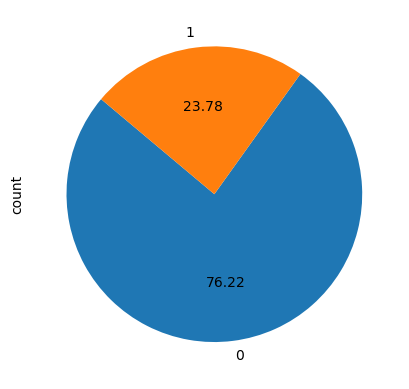

In [ ]:
y.value_counts().plot.pie(autopct='%.2f', startangle=140)

Accuracy: 0.51


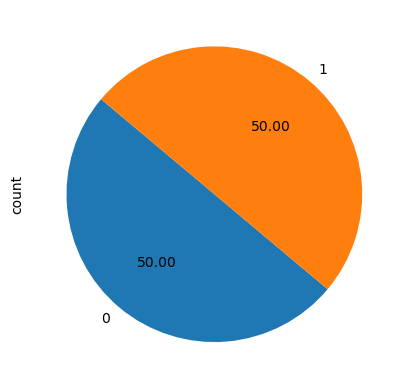

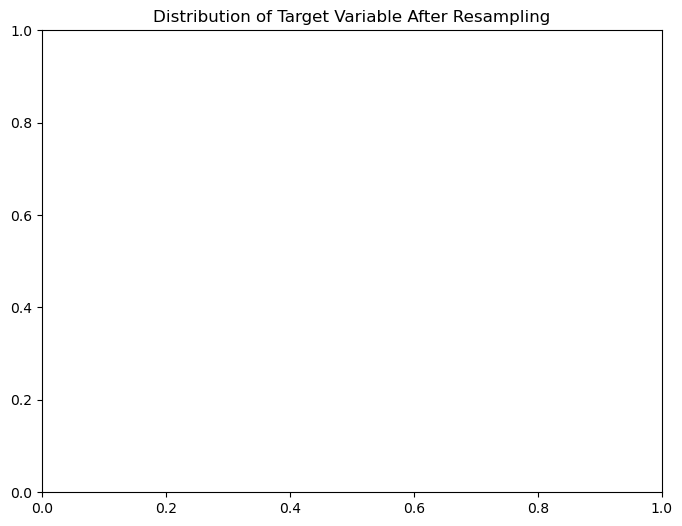

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Initialize the undersampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rus.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct='%.2f', startangle=140)
# save the data X_res,y_res to a file
X_res.to_csv('X_res.csv', index=False)
y_res.to_csv('y_res.csv', index=False)
import matplotlib.pyplot as plt
# Plot the distribution of the target variable after resampling
plt.figure(figsize=(8, 6))
plt.title('Distribution of Target Variable After Resampling')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# apply model to the data
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Evaluate the model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Original training set class distribution:", Counter(y_train))
print("Original test set class distribution:", Counter(y_test))

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training set class distribution:", Counter(y_train_resampled))
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'SVM (Poly)': SVC(kernel='poly', degree=3, probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    # 
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- {name} ---")
    clf.fit(X_train_scaled, y_train_resampled)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # For multi-class ROC AUC, use 'ovr' (one-vs-rest) strategy
    try:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except ValueError:
        roc_auc = 'ROC AUC cannot be computed for this classifier.'

    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Macro Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print(f"ROC AUC Score: {roc_auc}")


Original training set class distribution: Counter({0: 461, 1: 144})
Original test set class distribution: Counter({0: 116, 1: 36})
Resampled training set class distribution: Counter({0: 461, 1: 461})

--- Logistic Regression ---
Accuracy: 0.6250
Balanced Accuracy: 0.4765
F1 Macro Score: 0.4763
Confusion Matrix:
[[88 28]
 [29  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       116
           1       0.20      0.19      0.20        36

    accuracy                           0.62       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.62      0.62       152

ROC AUC Score: ROC AUC cannot be computed for this classifier.

--- SVM (Linear) ---
Accuracy: 0.6382
Balanced Accuracy: 0.4756
F1 Macro Score: 0.4735
Confusion Matrix:
[[91 25]
 [30  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       11

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.6645
Balanced Accuracy: 0.5216
F1 Macro Score: 0.5219
Confusion Matrix:
[[92 24]
 [27  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.27      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.66       152

ROC AUC Score: ROC AUC cannot be computed for this classifier.


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data BEFORE applying SMOTEENN
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 2: Apply SMOTEENN **only on the training set**
smote_enn = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote_enn.fit_resample(X_train, y_train)

# Then train and evaluate models on the correct sets:

# Logistic Regression
logreg = LogisticRegression(class_weight='balanced',penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_bal, y_train_bal)
y_pred_logreg = logreg.predict(X_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# SVM (linear)
svm_linear = SVC(kernel='linear',class_weight='balanced', random_state=42)
svm_linear.fit(X_train_bal, y_train_bal)
y_pred_svm = svm_linear.predict(X_test)
print("SVM Linear Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# SVM (RBF)
svm_rbf = SVC(kernel='rbf',class_weight='balanced', random_state=42)
svm_rbf.fit(X_train_bal, y_train_bal)
y_pred_rbf = svm_rbf.predict(X_test)
print("SVM RBF Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# SVM (Poly)
svm_poly = SVC(kernel='poly',class_weight='balanced', random_state=42)
svm_poly.fit(X_train_bal, y_train_bal)
y_pred_poly = svm_poly.predict(X_test)
print("SVM Poly Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# MLP
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_bal, y_train_bal)
y_pred_mlp = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


LogReg Accuracy: 0.5614035087719298
              precision    recall  f1-score   support

           0       0.77      0.60      0.68       174
           1       0.25      0.43      0.32        54

    accuracy                           0.56       228
   macro avg       0.51      0.51      0.50       228
weighted avg       0.65      0.56      0.59       228

SVM Linear Accuracy: 0.5877192982456141
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       174
           1       0.26      0.41      0.32        54

    accuracy                           0.59       228
   macro avg       0.52      0.53      0.51       228
weighted avg       0.66      0.59      0.61       228

SVM RBF Accuracy: 0.5526315789473685
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       174
           1       0.24      0.41      0.30        54

    accuracy                           0.55       228
   macro avg   

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

MLP Accuracy: 0.42543859649122806
              precision    recall  f1-score   support

           0       0.76      0.36      0.49       174
           1       0.23      0.63      0.34        54

    accuracy                           0.43       228
   macro avg       0.50      0.50      0.42       228
weighted avg       0.63      0.43      0.46       228



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score
)

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)  # X, y must be pre-defined

# === 2. Train-test split === #
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
# why
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# see data balance
print("Class distribution in training set:", pd.Series(y_train).value_counts())
print("Class distribution in test set:", pd.Series(y_test).value_counts())
# === 4. Define and train models === #
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2', solver='liblinear', random_state=42
    ),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf',  probability=True, random_state=42),
    "SVM (Poly)": SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=500),
    # add another model of deep learning
    "Deep Neural Net": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42),
    # add another model of deep learning
    "slow Deeper Neural Net ": MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', max_iter=3000, random_state=42),
    }

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # test with auroc
    from sklearn.metrics import roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        # Handle multiclass ROC AUC
        if len(set(y_test)) > 2:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba)")


Class distribution in training set: DX
1    412
0    147
Name: count, dtype: int64
Class distribution in test set: DX
1    103
0     37
Name: count, dtype: int64

--- Logistic Regression ---
Accuracy: 0.7643
Balanced Accuracy: 0.658
F1 Macro Score: 0.6694
Confusion Matrix:
 [[16 21]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        37
           1       0.81      0.88      0.85       103

    accuracy                           0.76       140
   macro avg       0.69      0.66      0.67       140
weighted avg       0.75      0.76      0.75       140

ROC AUC Score: 0.788

--- SVM (Linear) ---
Accuracy: 0.75
Balanced Accuracy: 0.6656
F1 Macro Score: 0.6698
Confusion Matrix:
 [[18 19]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        37
           1       0.82      0.84      0.83       103

    accuracy          

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score
)
import pandas as pd

# === 1. Split BEFORE SMOTE === #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2. Apply SMOTE only on the training data === #
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# === 3. Standardize === #
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# === 4. See class balance === #
print("Class distribution in training set after SMOTE:", pd.Series(y_train_res).value_counts())
print("Class distribution in test set (unchanged):", pd.Series(y_test).value_counts())

# === 5. Define models === #
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "SVM (Poly)": SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=500),
    "Deep Neural Net": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42),
    "Slow Deeper Neural Net": MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', max_iter=3000, random_state=42),
}

# === 6. Train & Evaluate === #
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # AUROC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if len(set(y_test)) > 2:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available (no predict_proba)")


Class distribution in training set after SMOTE: DX
0    461
1    461
Name: count, dtype: int64
Class distribution in test set (unchanged): DX
0    116
1     36
Name: count, dtype: int64

--- Logistic Regression ---
Accuracy: 0.625
Balanced Accuracy: 0.4765
F1 Macro Score: 0.4763
Confusion Matrix:
 [[88 28]
 [29  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76       116
           1       0.20      0.19      0.20        36

    accuracy                           0.62       152
   macro avg       0.48      0.48      0.48       152
weighted avg       0.62      0.62      0.62       152

ROC AUC Score: 0.5505

--- SVM (Linear) ---
Accuracy: 0.6382
Balanced Accuracy: 0.4756
F1 Macro Score: 0.4735
Confusion Matrix:
 [[91 25]
 [30  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       116
           1       0.19      0.17      0.18       

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.6645
Balanced Accuracy: 0.5216
F1 Macro Score: 0.5219
Confusion Matrix:
 [[92 24]
 [27  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       116
           1       0.27      0.25      0.26        36

    accuracy                           0.66       152
   macro avg       0.52      0.52      0.52       152
weighted avg       0.65      0.66      0.66       152

ROC AUC Score: 0.5553

--- Deep Neural Net ---
Accuracy: 0.6579
Balanced Accuracy: 0.4981
F1 Macro Score: 0.4968
Confusion Matrix:
 [[93 23]
 [29  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       116
           1       0.23      0.19      0.21        36

    accuracy                           0.66       152
   macro avg       0.50      0.50      0.50       152
weighted avg       0.64      0.66      0.65       152

ROC AUC Score: 0.5077

--- Slow Deeper Neur

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score
)

undersampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
# === 2. Train-test split === #
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
# why
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# see data balance
print("Class distribution in training set:", pd.Series(y_train).value_counts())
print("Class distribution in test set:", pd.Series(y_test).value_counts())
# === 4. Define and train models === #
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2', solver='liblinear', random_state=42
    ),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf',  probability=True, random_state=42),
    "SVM (Poly)": SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=500),
    # add another model of deep learning
    "Deep Neural Net": MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42),
    # add another model of deep learning
    "slow Deeper Neural Net ": MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', solver='adam', max_iter=3000, random_state=42),
    }

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # test with auroc
    from sklearn.metrics import roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        # Handle multiclass ROC AUC
        if len(set(y_test)) > 2:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba)")


Class distribution in training set: DX
1    462
0    461
Name: count, dtype: int64
Class distribution in test set: DX
0    116
1    115
Name: count, dtype: int64

--- Logistic Regression ---
Accuracy: 0.6494
Balanced Accuracy: 0.6492
F1 Macro Score: 0.6489
Confusion Matrix:
 [[79 37]
 [44 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       116
           1       0.66      0.62      0.64       115

    accuracy                           0.65       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.65      0.65      0.65       231

ROC AUC Score: 0.6607

--- SVM (Linear) ---
Accuracy: 0.632
Balanced Accuracy: 0.632
F1 Macro Score: 0.632
Confusion Matrix:
 [[73 43]
 [42 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       116
           1       0.63      0.63      0.63       115

    accuracy         

/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Accuracy: 0.8398
Balanced Accuracy: 0.8403
F1 Macro Score: 0.8381
Confusion Matrix:
 [[ 85  31]
 [  6 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       116
           1       0.78      0.95      0.85       115

    accuracy                           0.84       231
   macro avg       0.86      0.84      0.84       231
weighted avg       0.86      0.84      0.84       231

ROC AUC Score: 0.8995

--- Deep Neural Net ---
Accuracy: 0.8571
Balanced Accuracy: 0.8575
F1 Macro Score: 0.8565
Confusion Matrix:
 [[ 91  25]
 [  8 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       116
           1       0.81      0.93      0.87       115

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.86      0.86       231

ROC AUC Score: 0.9083

--- slow Dee

In [ ]:
import pandas as pd

# Combine features and target
resampled_df = pd.DataFrame(X_resampled, columns=[f'feature_{i}' for i in range(X_resampled.shape[1])])
resampled_df['label'] = y_resampled

# Save to CSV
resampled_df.to_csv("resampled_data.csv", index=False)
print("✅ Resampled dataset saved to resampled_data.csv")


✅ Resampled dataset saved to resampled_data.csv


In [ ]:
# read the resampled data
resampled_data = pd.read_csv("resampled_data.csv")

In [ ]:
print("Class distribution AFTER SMOTEENN:")
print(pd.Series(y_resampled).value_counts())

Class distribution AFTER SMOTEENN:
DX
0    577
1    577
Name: count, dtype: int64


In [ ]:
# Show the class distribution after SMOTEENN balancing
print("Class distribution AFTER SMOTEENN:")
print(pd.Series(y_resampled).value_counts())

# Show a preview of the balanced dataset
print("Preview of the balanced dataset:")
print(X_resampled[:5], y_resampled[:5])
# Save the balanced dataset to a CSV file


Class distribution AFTER SMOTEENN:
DX
0    577
1    577
Name: count, dtype: int64
Preview of the balanced dataset:
   rs4255357_G  rs2970989_T  rs1552244_A  rs17022021_T  rs9832461_A  \
0            0            2            2             2            2   
1            1            1            2             2            1   
2            1            1            2             0            2   
3            1            2            2             1            2   
4            1            2            1             2            2   

   rs17785248_A  rs4974424_A  rs1923775_T  rs1448284_T  rs10012882_T  ...  \
0             2            2            2            2             2  ...   
1             2            1            2            1             2  ...   
2             0            2            2            2             2  ...   
3             2            2            1            2             2  ...   
4             0            2            2            2             2  ...

In [ ]:
import pandas as pd

# Assuming X_resampled is a NumPy array or DataFrame and y_resampled is a 1D array or Series
# If X_resampled is not already a DataFrame, convert it
if not isinstance(X_resampled, pd.DataFrame):
    X_resampled = pd.DataFrame(X_resampled)

# Add the target column to the resampled feature set
X_resampled['target'] = y_resampled

# Preview the class distribution
print("Class distribution AFTER SMOTEENN:")
print(X_resampled['target'].value_counts())

# Show a preview of the balanced dataset
print("Preview of the balanced dataset:")
print(X_resampled.head())

# Save the balanced dataset to CSV
X_resampled.to_csv("balanced_dataset.csv", index=False)
print("Balanced dataset saved to 'balanced_dataset.csv'")


Class distribution AFTER SMOTEENN:
target
0    577
1    577
Name: count, dtype: int64
Preview of the balanced dataset:
   rs4255357_G  rs2970989_T  rs1552244_A  rs17022021_T  rs9832461_A  \
0            0            2            2             2            2   
1            1            1            2             2            1   
2            1            1            2             0            2   
3            1            2            2             1            2   
4            1            2            1             2            2   

   rs17785248_A  rs4974424_A  rs1923775_T  rs1448284_T  rs10012882_T  ...  \
0             2            2            2            2             2  ...   
1             2            1            2            1             2  ...   
2             0            2            2            2             2  ...   
3             2            2            1            2             2  ...   
4             0            2            2            2             2 

In [ ]:
# read the balanced data
balanced_data = pd.read_csv('balanced_dataset.csv')

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score
)

# Resample with SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Class distribution in training set:", pd.Series(y_train).value_counts())
print("Class distribution in test set:", pd.Series(y_test).value_counts())

# Define models
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2', solver='liblinear', random_state=42
    ),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "SVM (Poly)": SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(random_state=42, max_iter=1000),
    # add anot
}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(roc_auc, 4))
    elif hasattr(model, "decision_function"):
        y_pred_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_score)
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model")


Class distribution in training set: DX
1    412
0    147
Name: count, dtype: int64
Class distribution in test set: DX
1    103
0     37
Name: count, dtype: int64

--- Logistic Regression ---
Accuracy: 0.7643
Balanced Accuracy: 0.658
F1 Macro Score: 0.6694
Confusion Matrix:
 [[16 21]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        37
           1       0.81      0.88      0.85       103

    accuracy                           0.76       140
   macro avg       0.69      0.66      0.67       140
weighted avg       0.75      0.76      0.75       140

ROC AUC Score: 0.788

--- SVM (Linear) ---
Accuracy: 0.75
Balanced Accuracy: 0.6656
F1 Macro Score: 0.6698
Confusion Matrix:
 [[18 19]
 [16 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        37
           1       0.82      0.84      0.83       103

    accuracy          


--- Logistic Regression ---
Accuracy: 0.7643
Balanced Accuracy: 0.658
F1 Macro Score: 0.6694


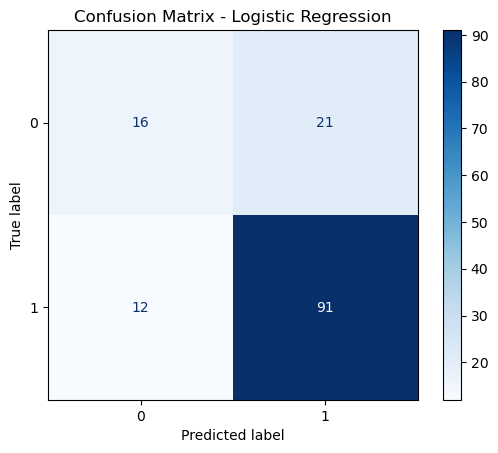

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        37
           1       0.81      0.88      0.85       103

    accuracy                           0.76       140
   macro avg       0.69      0.66      0.67       140
weighted avg       0.75      0.76      0.75       140

ROC AUC Score: 0.788

--- SVM (Linear) ---
Accuracy: 0.75
Balanced Accuracy: 0.6656
F1 Macro Score: 0.6698


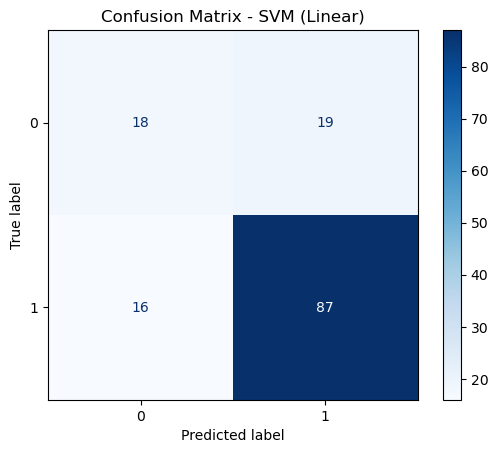

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        37
           1       0.82      0.84      0.83       103

    accuracy                           0.75       140
   macro avg       0.68      0.67      0.67       140
weighted avg       0.74      0.75      0.75       140

ROC AUC Score: 0.7801

--- SVM (RBF) ---
Accuracy: 0.8571
Balanced Accuracy: 0.7557
F1 Macro Score: 0.7879


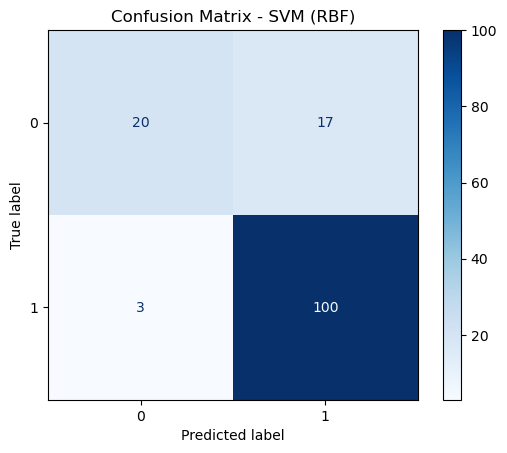

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67        37
           1       0.85      0.97      0.91       103

    accuracy                           0.86       140
   macro avg       0.86      0.76      0.79       140
weighted avg       0.86      0.86      0.85       140

ROC AUC Score: 0.939

--- SVM (Poly) ---
Accuracy: 0.9214
Balanced Accuracy: 0.9033
F1 Macro Score: 0.8998


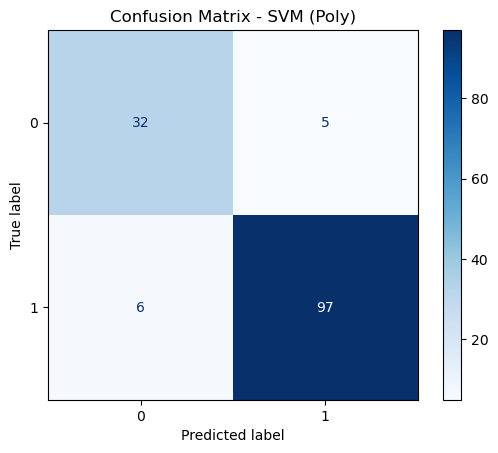

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.95      0.94      0.95       103

    accuracy                           0.92       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.92      0.92      0.92       140

ROC AUC Score: 0.9625

--- Naive Bayes ---
Accuracy: 0.7357
Balanced Accuracy: 0.7425
F1 Macro Score: 0.7021


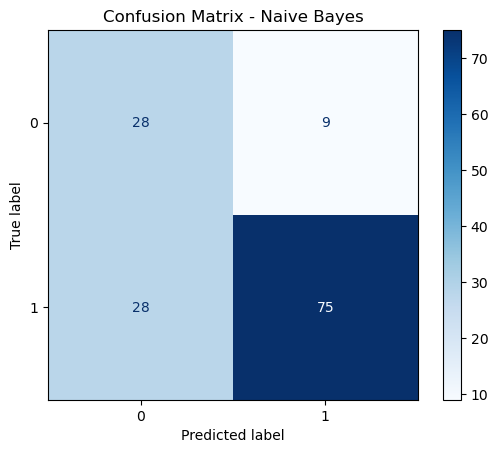

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.76      0.60        37
           1       0.89      0.73      0.80       103

    accuracy                           0.74       140
   macro avg       0.70      0.74      0.70       140
weighted avg       0.79      0.74      0.75       140

ROC AUC Score: 0.7623

--- MLP (Neural Net) ---
Accuracy: 0.85
Balanced Accuracy: 0.7595
F1 Macro Score: 0.7849


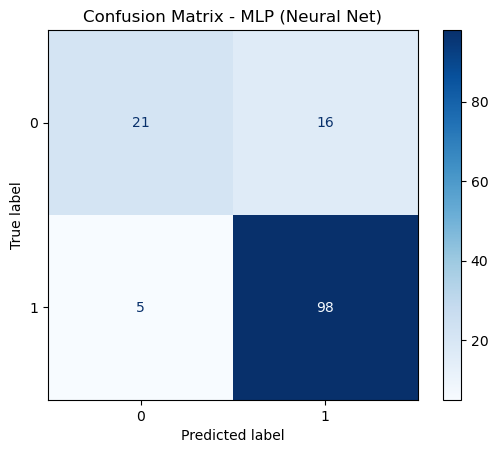

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67        37
           1       0.86      0.95      0.90       103

    accuracy                           0.85       140
   macro avg       0.83      0.76      0.78       140
weighted avg       0.85      0.85      0.84       140

ROC AUC Score: 0.9242


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ROC AUC Score
    from sklearn.metrics import roc_auc_score
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(roc_auc, 4))
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba)")



--- Logistic Regression ---
Accuracy: 0.7643
Balanced Accuracy: 0.658
F1 Macro Score: 0.6694


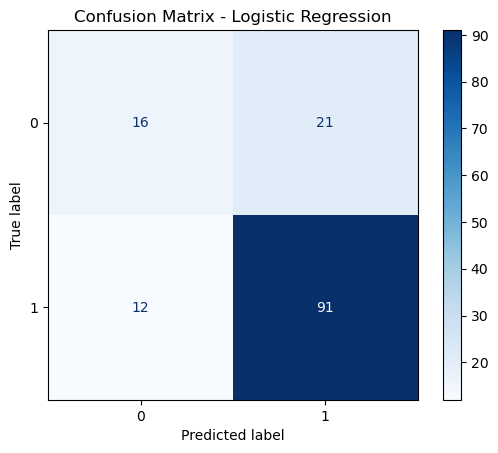

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        37
           1       0.81      0.88      0.85       103

    accuracy                           0.76       140
   macro avg       0.69      0.66      0.67       140
weighted avg       0.75      0.76      0.75       140

ROC AUC Score: 0.788


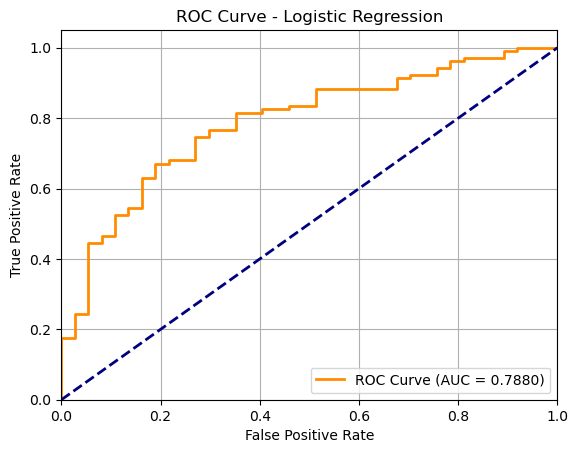


--- SVM (Linear) ---
Accuracy: 0.75
Balanced Accuracy: 0.6656
F1 Macro Score: 0.6698


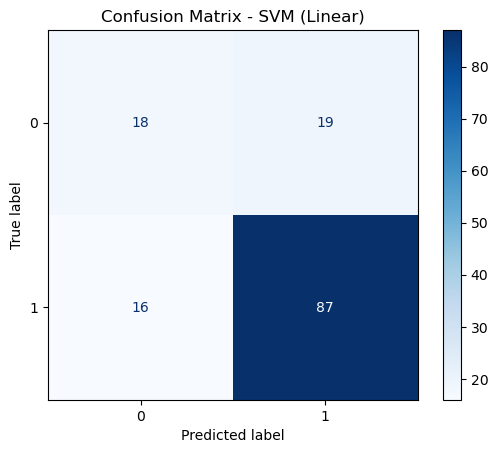

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        37
           1       0.82      0.84      0.83       103

    accuracy                           0.75       140
   macro avg       0.68      0.67      0.67       140
weighted avg       0.74      0.75      0.75       140

ROC AUC Score: 0.7801


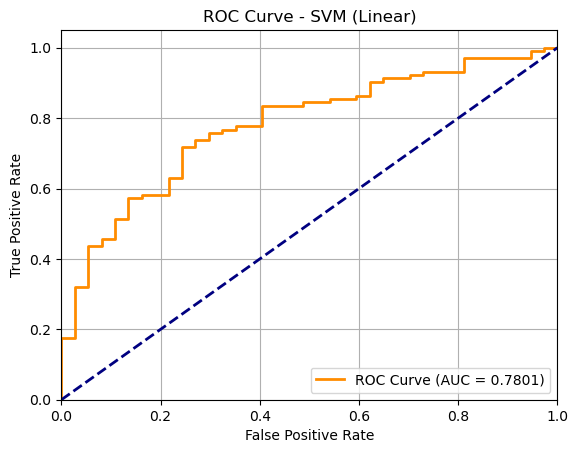


--- SVM (RBF) ---
Accuracy: 0.8571
Balanced Accuracy: 0.7557
F1 Macro Score: 0.7879


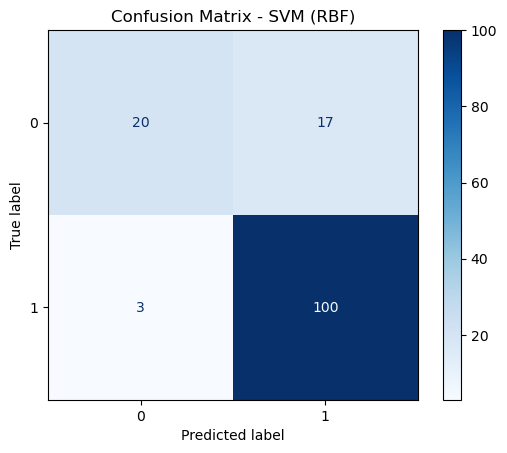

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67        37
           1       0.85      0.97      0.91       103

    accuracy                           0.86       140
   macro avg       0.86      0.76      0.79       140
weighted avg       0.86      0.86      0.85       140

ROC AUC Score: 0.939


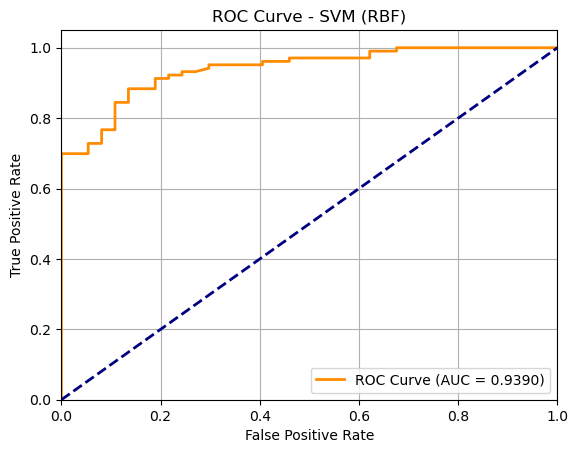


--- SVM (Poly) ---
Accuracy: 0.9214
Balanced Accuracy: 0.9033
F1 Macro Score: 0.8998


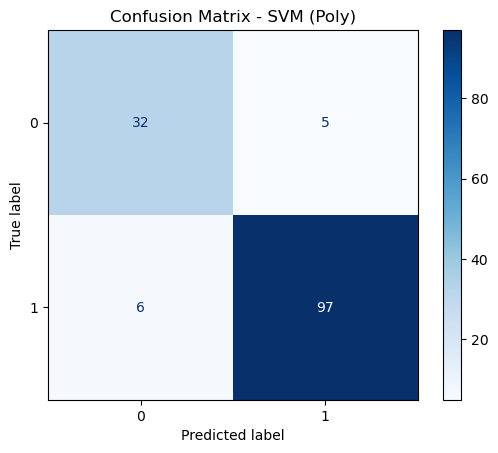

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.95      0.94      0.95       103

    accuracy                           0.92       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.92      0.92      0.92       140

ROC AUC Score: 0.9625


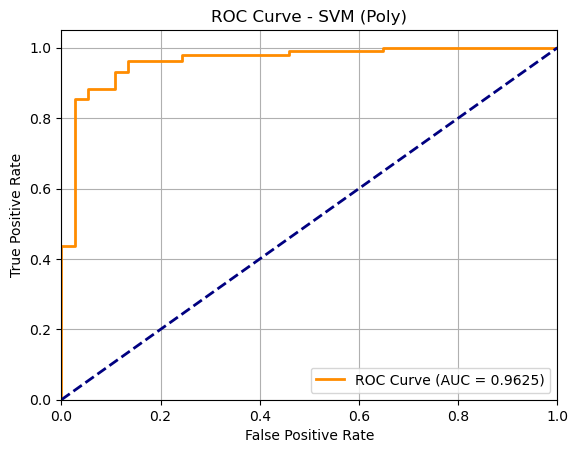


--- Naive Bayes ---
Accuracy: 0.7357
Balanced Accuracy: 0.7425
F1 Macro Score: 0.7021


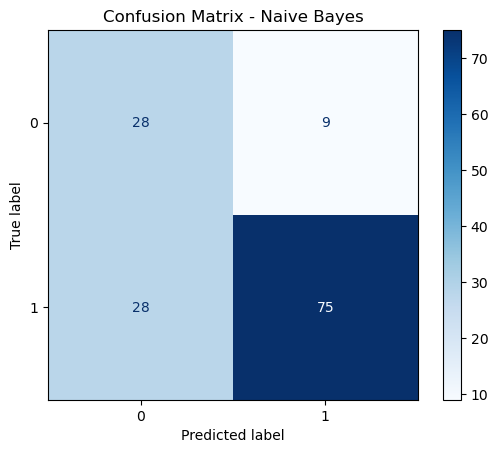

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.76      0.60        37
           1       0.89      0.73      0.80       103

    accuracy                           0.74       140
   macro avg       0.70      0.74      0.70       140
weighted avg       0.79      0.74      0.75       140

ROC AUC Score: 0.7623


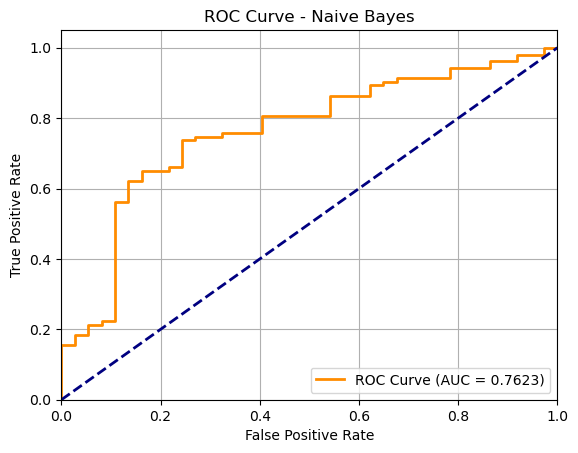


--- MLP (Neural Net) ---
Accuracy: 0.85
Balanced Accuracy: 0.7595
F1 Macro Score: 0.7849


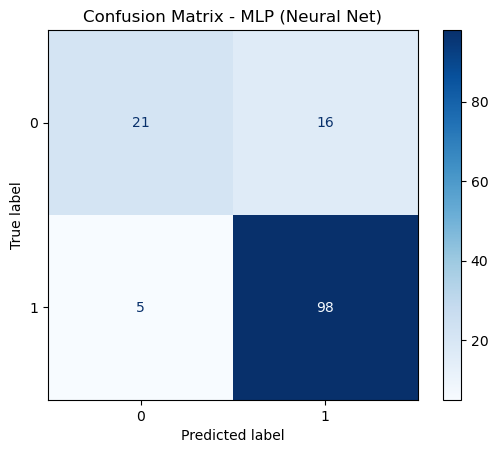

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67        37
           1       0.86      0.95      0.90       103

    accuracy                           0.85       140
   macro avg       0.83      0.76      0.78       140
weighted avg       0.85      0.85      0.84       140

ROC AUC Score: 0.9242


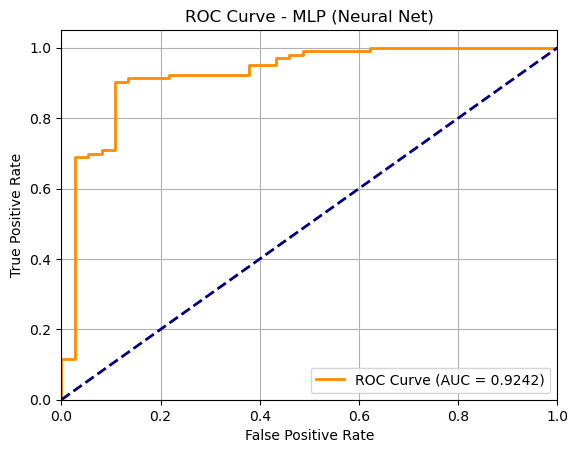

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Balanced Accuracy:", round(bal_acc, 4))
    print("F1 Macro Score:", round(f1, 4))

    # === Plot Confusion Matrix === #
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))

    # === Plot ROC Curve with AUC === #
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = None

    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print("ROC AUC Score:", round(roc_auc, 4))

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
    else:
        print("ROC AUC Score: Not available for this model (no predict_proba or decision_function)")



--- Logistic Regression ---
ROC AUC Score: 0.788

--- SVM (Linear) ---
ROC AUC Score: 0.7801

--- SVM (RBF) ---
ROC AUC Score: 0.939

--- SVM (Poly) ---
ROC AUC Score: 0.9625

--- Naive Bayes ---
ROC AUC Score: 0.7623

--- MLP (Neural Net) ---
ROC AUC Score: 0.9242


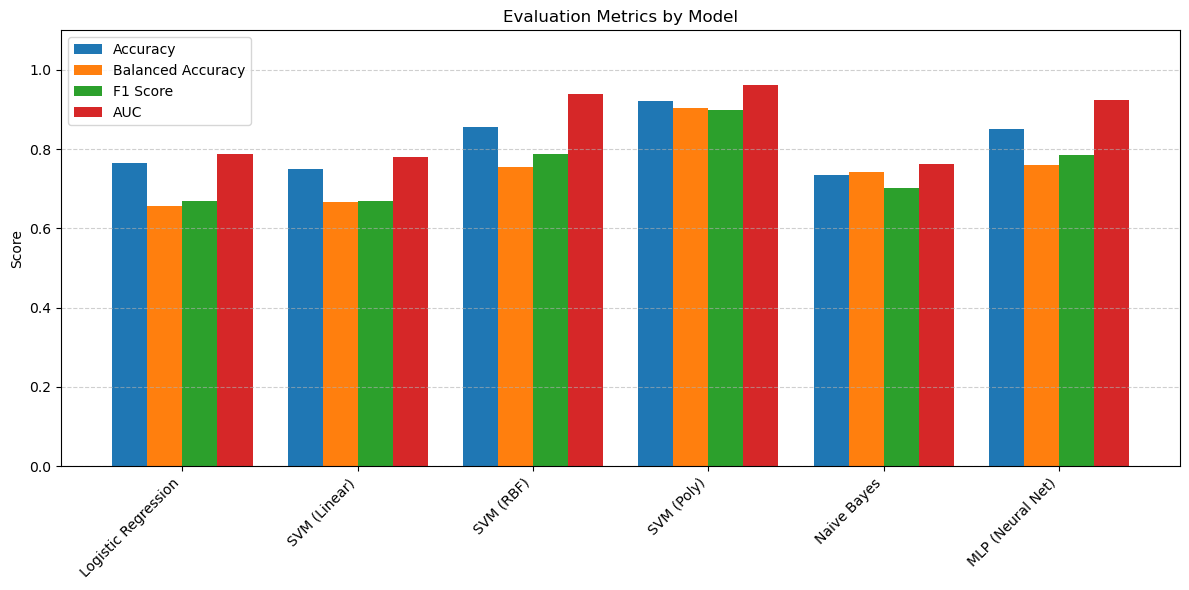

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score
)

# To store metrics for the bar chart
results = {
    "Model": [],
    "Accuracy": [],
    "Balanced Accuracy": [],
    "F1 Score": [],
    "AUC": []
}

# === Evaluate each model and collect metrics === #
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = None

    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("ROC AUC Score:", round(auc, 4))
    else:
        auc = 0.0
        print("ROC AUC Score: Not available")

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Balanced Accuracy"].append(bal_acc)
    results["F1 Score"].append(f1)
    results["AUC"].append(auc)

# === Create bar chart of metrics === #
df_results = pd.DataFrame(results)

metrics = ["Accuracy", "Balanced Accuracy", "F1 Score", "AUC"]
x = range(len(df_results["Model"]))
bar_width = 0.2

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        df_results[metric],
        width=bar_width,
        label=metric
    )

plt.xticks([p + 1.5 * bar_width for p in x], df_results["Model"], rotation=45, ha='right')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Evaluation Metrics by Model")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



--- Logistic Regression ---
Average Precision (PR AUC): 0.9115


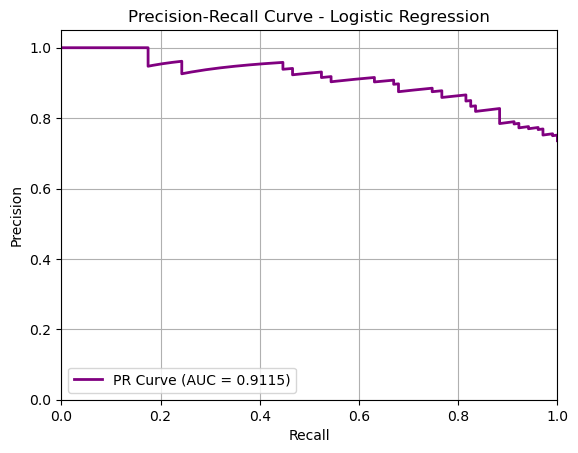


--- SVM (Linear) ---
Average Precision (PR AUC): 0.9103


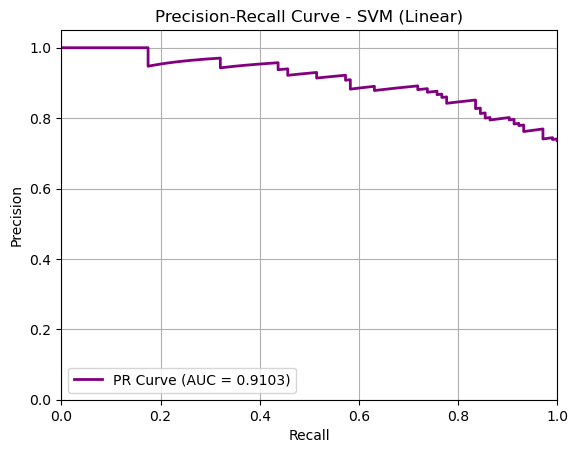


--- SVM (RBF) ---
Average Precision (PR AUC): 0.9784


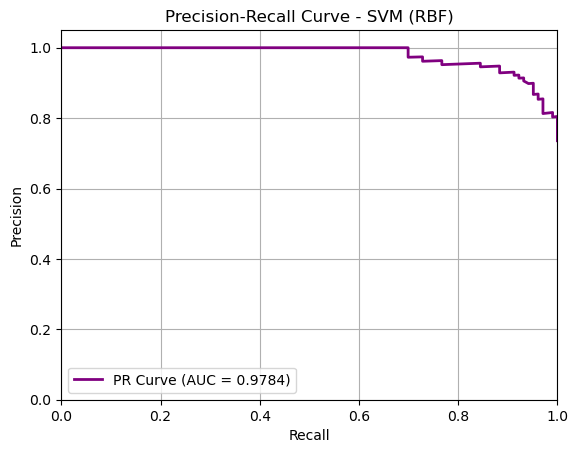


--- SVM (Poly) ---
Average Precision (PR AUC): 0.9848


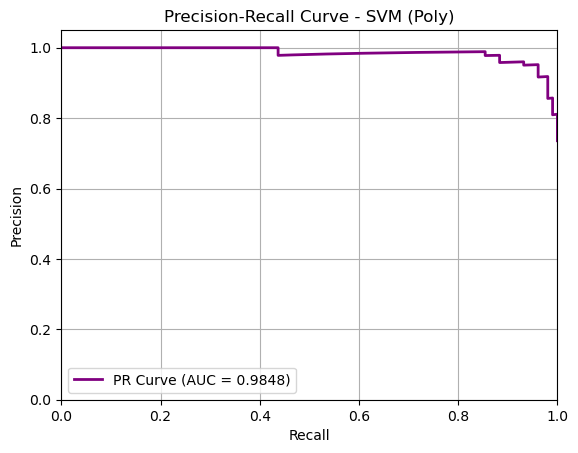


--- Naive Bayes ---
Average Precision (PR AUC): 0.8943


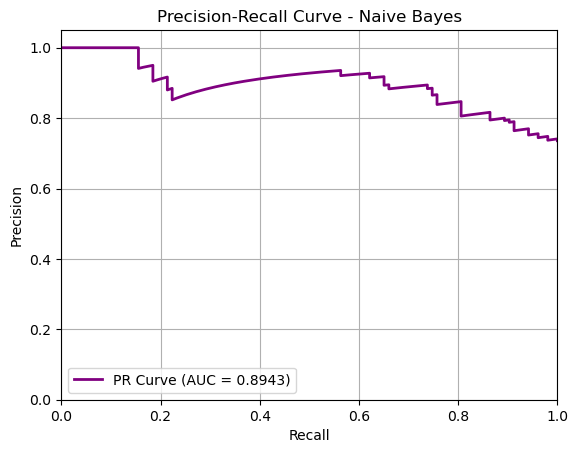


--- MLP (Neural Net) ---
Average Precision (PR AUC): 0.9619


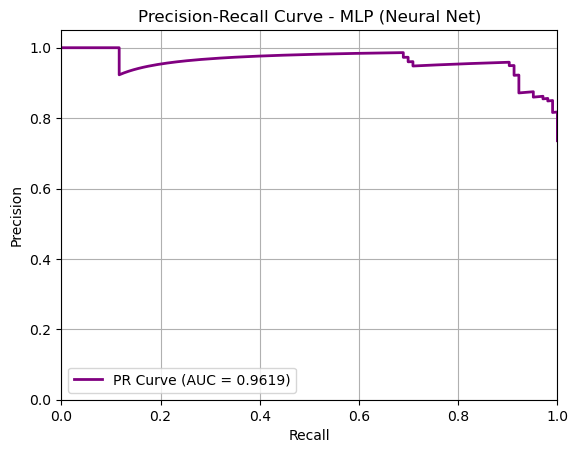

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score
)

# === Plot Precision-Recall Curve per model === #
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)

    # Predict probabilities or decision function scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = None

    if y_scores is not None:
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = average_precision_score(y_test, y_scores)

        print("Average Precision (PR AUC):", round(pr_auc, 4))

        # Plot PR Curve
        plt.figure()
        plt.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.legend(loc="lower left")
        plt.grid(True)
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.show()
    else:
        print("PR Curve: Not available for this model (no predict_proba or decision_function)")


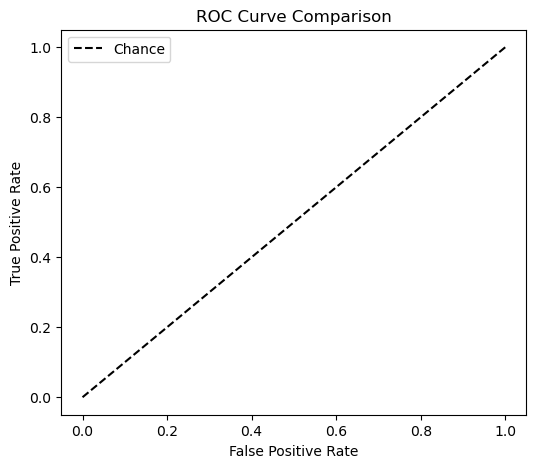

/tmp/ipykernel_4819/2508847177.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


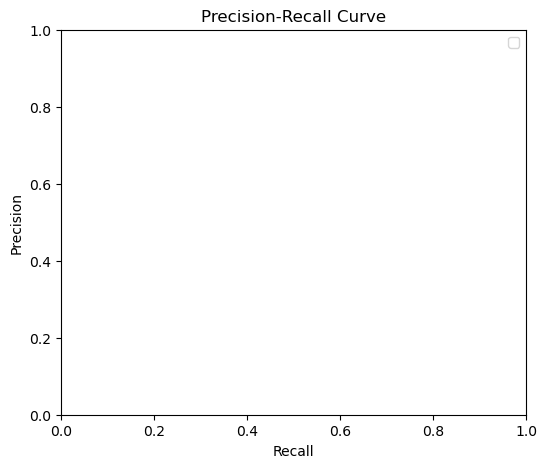

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

# Assume y_test and model predictions/probabilities are available for each model
# Example: y_pred_logreg, y_pred_svm, y_pred_rf, y_pred_proba_logreg, etc.

# 1. Confusion Matrix (for each model)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 2. ROC Curve (with AUC score)
def plot_roc_curve(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(6, 5))
# Example usage for logistic regression:
# plot_roc_curve(y_test, y_pred_proba_logreg, 'Logistic Regression')
# plot_roc_curve(y_test, y_pred_proba_svm, 'SVM')
# plot_roc_curve(y_test, y_pred_proba_rf, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 3. Bar Chart of Evaluation Metrics
def plot_metrics_bar(metrics_dict):
    # metrics_dict: {'Model': {'Accuracy': ..., 'F1': ..., 'Balanced Acc': ..., 'AUC': ...}, ...}
    df_metrics = pd.DataFrame(metrics_dict).T
    df_metrics.plot(kind='bar', figsize=(8, 5))
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# 4. Precision-Recall Curve (optional)
def plot_precision_recall(y_true, y_score, label):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.plot(recall, precision, label=f'{label} (AP = {ap:.2f})')

plt.figure(figsize=(6, 5))
# plot_precision_recall(y_test, y_pred_proba_logreg, 'Logistic Regression')
# plot_precision_recall(y_test, y_pred_proba_svm, 'SVM')
# plot_precision_recall(y_test, y_pred_proba_rf, 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = data_cleaned_with_just_dx_and_snp.drop(columns=['DX'])
y = data_cleaned_with_just_dx_and_snp['DX']

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM models with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train and evaluate each model
svm_models = {'Linear': svm_linear, 'Polynomial': svm_poly, 'RBF': svm_rbf}
for name, model in svm_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} SVM Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} SVM Classification Report:\n{classification_report(y_test, y_pred)}")
    # evaluate with ROC AUC
    from sklearn.metrics import roc_auc_score
    y_pred_proba = model.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name} SVM ROC AUC Score: {roc_auc}")

Linear SVM Accuracy: 0.75
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152

Linear SVM ROC AUC Score: 0.5186980609418281
Polynomial SVM Accuracy: 0.6381578947368421


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Polynomial SVM Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       114
           1       0.29      0.32      0.30        38

    accuracy                           0.64       152
   macro avg       0.53      0.53      0.53       152
weighted avg       0.65      0.64      0.64       152

Polynomial SVM ROC AUC Score: 0.548938134810711
RBF SVM Accuracy: 0.75
RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152

RBF SVM ROC AUC Score: 0.49653739612188363


/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.756578947368421
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       1.00      0.03      0.05        38

    accuracy                           0.76       152
   macro avg       0.88      0.51      0.46       152
weighted avg       0.82      0.76      0.66       152



In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# X_train, X_test, y_train, y_test are already defined

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

XGBoost Accuracy: 0.7039473684210527
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       114
           1       0.27      0.11      0.15        38

    accuracy                           0.70       152
   macro avg       0.51      0.50      0.49       152
weighted avg       0.63      0.70      0.65       152



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:42:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Gradient Boosting Accuracy: 0.7302631578947368
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84       114
           1       0.20      0.03      0.05        38

    accuracy                           0.73       152
   macro avg       0.47      0.50      0.44       152
weighted avg       0.61      0.73      0.64       152



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7236842105263158
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.96      0.84       114
           1       0.00      0.00      0.00        38

    accuracy                           0.72       152
   macro avg       0.37      0.48      0.42       152
weighted avg       0.56      0.72      0.63       152



In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report

# Lasso Regression
lasso_model = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Predict using Lasso
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso_rounded = [round(pred) for pred in y_pred_lasso]  # Round predictions to nearest integer

# Evaluate Lasso
lasso_accuracy = accuracy_score(y_test, y_pred_lasso_rounded)
print(f"Lasso Regression Accuracy: {lasso_accuracy}")

# Logistic Regression
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Lasso Regression Accuracy: 0.75
Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       114
           1       0.00      0.00      0.00        38

    accuracy                           0.75       152
   macro avg       0.38      0.50      0.43       152
weighted avg       0.56      0.75      0.64       152



/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mohamed-megdoud/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",